In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import random
import copy
import warnings
warnings.filterwarnings('ignore')

# FedAvg

In [2]:
acc0 = [[0.0957999974489212, 0.567300021648407, 0.611299991607666, 0.5196999907493591, 0.16580000519752502, 0.5299000144004822, 0.6146000027656555, 0.7264999747276306, 0.48080000281333923, 0.6974999904632568, 0.46369999647140503, 0.6377999782562256, 0.311599999666214, 0.5483999848365784, 0.5986999869346619, 0.33570000529289246, 0.520799994468689, 0.32749998569488525, 0.5407999753952026, 0.2768000066280365, 0.6414999961853027, 0.3190000057220459, 0.6577000021934509, 0.0957999974489212, 0.5275999903678894, 0.54830002784729, 0.3476000130176544, 0.6712999939918518, 0.6079999804496765, 0.5860000252723694], [0.5496000051498413, 0.6471999883651733, 0.18359999358654022, 0.0957999974489212, 0.6743000149726868, 0.26840001344680786, 0.5157999992370605, 0.19709999859333038, 0.6413000226020813, 0.6317999958992004, 0.647599995136261, 0.19009999930858612, 0.7027999758720398, 0.0957999974489212, 0.6363999843597412, 0.3873000144958496, 0.671999990940094, 0.46779999136924744, 0.6565999984741211, 0.3799000084400177, 0.7342000007629395, 0.602400004863739, 0.350600004196167, 0.5315999984741211, 0.5296000242233276, 0.0957999974489212, 0.4316999912261963, 0.6703000068664551, 0.0957999974489212, 0.18809999525547028], [0.3880000114440918, 0.6470999717712402, 0.3573000133037567, 0.6843000054359436, 0.1890999972820282, 0.7455000281333923, 0.7307999730110168, 0.6104999780654907, 0.7549999952316284, 0.6166999936103821, 0.588699996471405, 0.27149999141693115, 0.490200012922287, 0.44130000472068787, 0.5989000201225281, 0.2831999957561493, 0.7296000123023987, 0.5327000021934509, 0.13040000200271606, 0.670199990272522, 0.26840001344680786, 0.5324000120162964, 0.26809999346733093, 0.6998000144958496, 0.690500020980835, 0.3621000051498413, 0.27959999442100525, 0.0957999974489212, 0.46720001101493835, 0.6486999988555908], [0.6481000185012817, 0.7696999907493591, 0.708299994468689, 0.25929999351501465, 0.4948999881744385, 0.35280001163482666, 0.18940000236034393, 0.7789000272750854, 0.7753999829292297, 0.25920000672340393, 0.36160001158714294, 0.17919999361038208, 0.49630001187324524, 0.5552999973297119, 0.4196999967098236, 0.31949999928474426, 0.4893999993801117, 0.42160001397132874, 0.6805999875068665, 0.7580999732017517, 0.5019999742507935, 0.7106000185012817, 0.6550999879837036, 0.640500009059906, 0.22200000286102295, 0.7085000276565552, 0.7929999828338623, 0.6966000199317932, 0.19110000133514404, 0.6266000270843506], [0.6140000224113464, 0.4902999997138977, 0.3555000126361847, 0.16529999673366547, 0.4510999917984009, 0.7324000000953674, 0.5349000096321106, 0.40560001134872437, 0.23520000278949738, 0.6367999911308289, 0.4131999909877777, 0.7329000234603882, 0.7253999710083008, 0.38190001249313354, 0.4187000095844269, 0.654699981212616, 0.5503000020980835, 0.7817999720573425, 0.3203999996185303, 0.21559999883174896, 0.40880000591278076, 0.732699990272522, 0.642300009727478, 0.5572999715805054, 0.6025000214576721, 0.6198999881744385, 0.3723999857902527, 0.4399000108242035, 0.7107999920845032, 0.26339998841285706], [0.435699999332428, 0.7008000016212463, 0.7949000000953674, 0.6622999906539917, 0.5795000195503235, 0.5327000021934509, 0.8163999915122986, 0.22499999403953552, 0.5705000162124634, 0.2824000120162964, 0.5221999883651733, 0.4250999987125397, 0.5777999758720398, 0.7541999816894531, 0.21359999477863312, 0.3912999927997589, 0.6424000263214111, 0.6733999848365784, 0.7843000292778015, 0.8513000011444092, 0.33230000734329224, 0.32820001244544983, 0.3165000081062317, 0.7163000106811523, 0.7986999750137329, 0.22920000553131104, 0.717199981212616, 0.16030000150203705, 0.5658000111579895, 0.26350000500679016], [0.3792000114917755, 0.7907999753952026, 0.19439999759197235, 0.8233000040054321, 0.21070000529289246, 0.7982000112533569, 0.820900022983551, 0.0982000008225441, 0.26030001044273376, 0.0982000008225441, 0.5077999830245972, 0.739799976348877, 0.18119999766349792, 0.3465000092983246, 0.6384999752044678, 0.7156000137329102, 0.7907999753952026, 0.4740000069141388, 0.5059000253677368, 0.0982000008225441, 0.7775999903678894, 0.3928000032901764, 0.3458999991416931, 0.0982000008225441, 0.0982000008225441, 0.3276999890804291, 0.17090000212192535, 0.19210000336170197, 0.17149999737739563, 0.1915999948978424], [0.44279998540878296, 0.5853000283241272, 0.21230000257492065, 0.6001999974250793, 0.1768999993801117, 0.31700000166893005, 0.6593999862670898, 0.8400999903678894, 0.7759000062942505, 0.45239999890327454, 0.18649999797344208, 0.17139999568462372, 0.7031999826431274, 0.7824000120162964, 0.3758000135421753, 0.6516000032424927, 0.7285000085830688, 0.5777000188827515, 0.5976999998092651, 0.8529000282287598, 0.7778000235557556, 0.43880000710487366, 0.5900999903678894, 0.8241999745368958, 0.40400001406669617, 0.0982000008225441, 0.4050999879837036, 0.8428000211715698, 0.8044000267982483, 0.4982999861240387], [0.33880001306533813, 0.7972000241279602, 0.383899986743927, 0.614799976348877, 0.8068000078201294, 0.535099983215332, 0.7141000032424927, 0.3481000065803528, 0.4277999997138977, 0.18729999661445618, 0.7056000232696533, 0.7698000073432922, 0.6571000218391418, 0.7986999750137329, 0.7294999957084656, 0.6811000108718872, 0.2793999910354614, 0.8648999929428101, 0.8583999872207642, 0.12269999831914902, 0.21040000021457672, 0.755299985408783, 0.6875, 0.6972000002861023, 0.5418000221252441, 0.6894999742507935, 0.7064999938011169, 0.1891999989748001, 0.6740999817848206, 0.41350001096725464], [0.6035000085830688, 0.7168999910354614, 0.35569998621940613, 0.6538000106811523, 0.5943999886512756, 0.421999990940094, 0.6480000019073486, 0.43860000371932983, 0.66839998960495, 0.5672000050544739, 0.6470000147819519, 0.49799999594688416, 0.19609999656677246, 0.8888999819755554, 0.7229999899864197, 0.6403999924659729, 0.609000027179718, 0.43779999017715454, 0.7570000290870667, 0.8154000043869019, 0.10570000112056732, 0.6518999934196472, 0.19750000536441803, 0.5239999890327454, 0.5540000200271606, 0.8481000065803528, 0.788100004196167, 0.13220000267028809, 0.10719999670982361, 0.5318999886512756], [0.8959000110626221, 0.572700023651123, 0.6751999855041504, 0.777400016784668, 0.49390000104904175, 0.6384999752044678, 0.689300000667572, 0.5092999935150146, 0.12120000272989273, 0.8453999757766724, 0.5002999901771545, 0.5400000214576721, 0.4214000105857849, 0.5630000233650208, 0.1234000027179718, 0.5120999813079834, 0.8474000096321106, 0.8511000275611877, 0.3303000032901764, 0.1835000067949295, 0.6651999950408936, 0.8458999991416931, 0.6845999956130981, 0.4205000102519989, 0.6897000074386597, 0.5849000215530396, 0.6438000202178955, 0.7476999759674072, 0.7888000011444092, 0.7179999947547913], [0.32429999113082886, 0.28679999709129333, 0.490200012922287, 0.861299991607666, 0.6823999881744385, 0.7398999929428101, 0.9230999946594238, 0.8640999794006348, 0.4771000146865845, 0.9101999998092651, 0.2700999975204468, 0.8169000148773193, 0.8061000108718872, 0.8650000095367432, 0.8271999955177307, 0.7095999717712402, 0.705299973487854, 0.9053000211715698, 0.3447999954223633, 0.6657999753952026, 0.732200026512146, 0.8282999992370605, 0.6865000128746033, 0.6833999752998352, 0.48019999265670776, 0.13279999792575836, 0.7085000276565552, 0.25270000100135803, 0.656499981880188, 0.21279999613761902], [0.820900022983551, 0.6262000203132629, 0.541100025177002, 0.22499999403953552, 0.5236999988555908, 0.782800018787384, 0.6072999835014343, 0.6875, 0.5577999949455261, 0.5820000171661377, 0.8116999864578247, 0.503600001335144, 0.4007999897003174, 0.9071000218391418, 0.125, 0.8102999925613403, 0.7355999946594238, 0.9057999849319458, 0.4616999924182892, 0.8845999836921692, 0.8639000058174133, 0.38830000162124634, 0.6025000214576721, 0.10610000044107437, 0.5151000022888184, 0.7282999753952026, 0.10100000351667404, 0.3869999945163727, 0.907800018787384, 0.4799000024795532], [0.8605999946594238, 0.6983000040054321, 0.8223000168800354, 0.7067999839782715, 0.5030999779701233, 0.6633999943733215, 0.20679999887943268, 0.11509999632835388, 0.5139999985694885, 0.5623999834060669, 0.8813999891281128, 0.8501999974250793, 0.737500011920929, 0.8496000170707703, 0.7117000222206116, 0.8446999788284302, 0.6209999918937683, 0.8657000064849854, 0.9169999957084656, 0.5569999814033508, 0.758899986743927, 0.42969998717308044, 0.8744000196456909, 0.6650000214576721, 0.7961000204086304, 0.5590000152587891, 0.512499988079071, 0.11649999767541885, 0.7542999982833862, 0.4844000041484833], [0.515999972820282, 0.671999990940094, 0.30169999599456787, 0.24130000174045563, 0.6984999775886536, 0.8062000274658203, 0.3944000005722046, 0.7445999979972839, 0.9320999979972839, 0.7272999882698059, 0.7588000297546387, 0.18440000712871552, 0.9218000173568726, 0.6571000218391418, 0.41819998621940613, 0.9139999747276306, 0.7796000242233276, 0.6276999711990356, 0.7716000080108643, 0.3228999972343445, 0.760699987411499, 0.7114999890327454, 0.675599992275238, 0.742900013923645, 0.7950999736785889, 0.8101999759674072, 0.7182999849319458, 0.7529000043869019, 0.7131999731063843, 0.659600019454956], [0.5846999883651733, 0.2928999960422516, 0.14399999380111694, 0.4977000057697296, 0.5809999704360962, 0.15620000660419464, 0.6208000183105469, 0.8087000250816345, 0.6676999926567078, 0.5672000050544739, 0.7067999839782715, 0.6220999956130981, 0.23250000178813934, 0.8163999915122986, 0.810699999332428, 0.738099992275238, 0.8784000277519226, 0.5655999779701233, 0.48240000009536743, 0.8310999870300293, 0.7329000234603882, 0.36719998717308044, 0.7422000169754028, 0.5692999958992004, 0.21690000593662262, 0.6725999712944031, 0.7409999966621399, 0.8626000285148621, 0.8827999830245972, 0.72079998254776], [0.7448999881744385, 0.8614000082015991, 0.6274999976158142, 0.771399974822998, 0.8434000015258789, 0.9157999753952026, 0.5232999920845032, 0.8944000005722046, 0.8176000118255615, 0.7264000177383423, 0.6685000061988831, 0.8343999981880188, 0.8373000025749207, 0.4146000146865845, 0.5795000195503235, 0.7754999995231628, 0.8500000238418579, 0.6898000240325928, 0.7106999754905701, 0.2425999939441681, 0.6640999913215637, 0.8970000147819519, 0.7085999846458435, 0.4706000089645386, 0.1777999997138977, 0.6729999780654907, 0.22390000522136688, 0.6740999817848206, 0.5627999901771545, 0.7402999997138977], [0.8425999879837036, 0.7433000206947327, 0.7426999807357788, 0.7853999733924866, 0.8456000089645386, 0.791700005531311, 0.8809999823570251, 0.5992000102996826, 0.7235999703407288, 0.35350000858306885, 0.710099995136261, 0.7044000029563904, 0.8015999794006348, 0.7577000260353088, 0.6798999905586243, 0.8737999796867371, 0.7581999897956848, 0.6394000053405762, 0.7548999786376953, 0.744700014591217, 0.680899977684021, 0.3382999897003174, 0.5993000268936157, 0.9103000164031982, 0.86080002784729, 0.4277999997138977, 0.8348000049591064, 0.8557000160217285, 0.7465000152587891, 0.6352999806404114], [0.30790001153945923, 0.8327000141143799, 0.8449000120162964, 0.7680000066757202, 0.2976999878883362, 0.8676000237464905, 0.8790000081062317, 0.3366999924182892, 0.30250000953674316, 0.8357999920845032, 0.9194999933242798, 0.7731999754905701, 0.8337000012397766, 0.7519999742507935, 0.359499990940094, 0.7773000001907349, 0.5856000185012817, 0.48240000009536743, 0.7778000235557556, 0.7821000218391418, 0.894599974155426, 0.5649999976158142, 0.3799000084400177, 0.7598000168800354, 0.6819999814033508, 0.6116999983787537, 0.1477999985218048, 0.8409000039100647, 0.47119998931884766, 0.8519999980926514], [0.8396000266075134, 0.5939000248908997, 0.27619999647140503, 0.7894999980926514, 0.8125, 0.8708000183105469, 0.8690999746322632, 0.5838000178337097, 0.8453999757766724, 0.24169999361038208, 0.34380000829696655, 0.6675999760627747, 0.6837999820709229, 0.8180999755859375, 0.755299985408783, 0.13009999692440033, 0.34599998593330383, 0.9168000221252441, 0.6890000104904175, 0.6980000138282776, 0.859499990940094, 0.6251000165939331, 0.8489000201225281, 0.2702000141143799, 0.8687999844551086, 0.19869999587535858, 0.5527999997138977, 0.6618000268936157, 0.544700026512146, 0.910099983215332], [0.784600019454956, 0.5809000134468079, 0.34880000352859497, 0.8208000063896179, 0.6169000267982483, 0.6040999889373779, 0.4318000078201294, 0.7778000235557556, 0.6136999726295471, 0.2994000017642975, 0.6022999882698059, 0.21979999542236328, 0.736299991607666, 0.6787999868392944, 0.7408000230789185, 0.47589999437332153, 0.3125, 0.22509999573230743, 0.5656999945640564, 0.3824000060558319, 0.2134000062942505, 0.697700023651123, 0.4120999872684479, 0.7264000177383423, 0.8830999732017517, 0.7240999937057495, 0.24070000648498535, 0.4634000062942505, 0.6837999820709229, 0.6740000247955322], [0.8313000202178955, 0.1664000004529953, 0.6561999917030334, 0.7615000009536743, 0.8463000059127808, 0.8435999751091003, 0.684499979019165, 0.21930000185966492, 0.34619998931884766, 0.8133999705314636, 0.798799991607666, 0.3296999931335449, 0.24539999663829803, 0.8870000243186951, 0.8015000224113464, 0.8234000205993652, 0.7983999848365784, 0.7728000283241272, 0.8687000274658203, 0.5978000164031982, 0.14880000054836273, 0.7893999814987183, 0.7660999894142151, 0.8697999715805054, 0.9003000259399414, 0.8029000163078308, 0.7724999785423279, 0.8920000195503235, 0.9190000295639038, 0.8822000026702881], [0.6784999966621399, 0.8163999915122986, 0.9065999984741211, 0.5659999847412109, 0.598800003528595, 0.8658000230789185, 0.7461000084877014, 0.5766000151634216, 0.8242999911308289, 0.8917999863624573, 0.7039999961853027, 0.2011999934911728, 0.8039000034332275, 0.7928000092506409, 0.7260000109672546, 0.8414000272750854, 0.311599999666214, 0.5370000004768372, 0.26579999923706055, 0.8945000171661377, 0.7681000232696533, 0.4634000062942505, 0.8797000050544739, 0.633899986743927, 0.1509000062942505, 0.9230999946594238, 0.2782999873161316, 0.666100025177002, 0.8411999940872192, 0.8447999954223633], [0.8952000141143799, 0.7735999822616577, 0.8550000190734863, 0.3465999960899353, 0.8914999961853027, 0.45500001311302185, 0.76910001039505, 0.3993000090122223, 0.858299970626831, 0.718999981880188, 0.9068999886512756, 0.7949000000953674, 0.7293000221252441, 0.4099000096321106, 0.9020000100135803, 0.4000999927520752, 0.7019000053405762, 0.5171999931335449, 0.8650000095367432, 0.8980000019073486, 0.859499990940094, 0.8346999883651733, 0.9355000257492065, 0.9035999774932861, 0.8285999894142151, 0.9061999917030334, 0.2303999960422516, 0.8899999856948853, 0.8912000060081482, 0.8716999888420105], [0.6388999819755554, 0.8657000064849854, 0.7307000160217285, 0.36579999327659607, 0.904699981212616, 0.5952000021934509, 0.7376999855041504, 0.684499979019165, 0.8235999941825867, 0.48190000653266907, 0.9045000076293945, 0.890500009059906, 0.8549000024795532, 0.6473000049591064, 0.44909998774528503, 0.7789000272750854, 0.8679999709129333, 0.5629000067710876, 0.6922000050544739, 0.8970999717712402, 0.7771000266075134, 0.7818999886512756, 0.9140999913215637, 0.9437000155448914, 0.940500020980835, 0.5789999961853027, 0.5770000219345093, 0.9444000124931335, 0.8112000226974487, 0.8858000040054321], [0.6259999871253967, 0.7745000123977661, 0.7505000233650208, 0.7206000089645386, 0.7376999855041504, 0.7520999908447266, 0.7793999910354614, 0.8849999904632568, 0.6865000128746033, 0.9236000180244446, 0.8295000195503235, 0.795199990272522, 0.9257000088691711, 0.9316999912261963, 0.9222000241279602, 0.42329999804496765, 0.7727000117301941, 0.8952000141143799, 0.3278000056743622, 0.5710999965667725, 0.8360000252723694, 0.8163999915122986, 0.6456000208854675, 0.757099986076355, 0.8306999802589417, 0.9347000122070312, 0.8543999791145325, 0.8222000002861023, 0.8062999844551086, 0.7831000089645386], [0.7016000151634216, 0.8511000275611877, 0.7915999889373779, 0.8991000056266785, 0.8792999982833862, 0.7351999878883362, 0.7243000268936157, 0.7476000189781189, 0.8815000057220459, 0.8756999969482422, 0.6924999952316284, 0.8543000221252441, 0.8863000273704529, 0.7775999903678894, 0.8804000020027161, 0.8199999928474426, 0.9373000264167786, 0.8238000273704529, 0.9150000214576721, 0.8930000066757202, 0.9383000135421753, 0.8206999897956848, 0.8069999814033508, 0.8611999750137329, 0.8730000257492065, 0.925599992275238, 0.677299976348877, 0.8604999780654907, 0.7513999938964844, 0.7465999722480774], [0.8392000198364258, 0.9259999990463257, 0.8715999722480774, 0.909500002861023, 0.7562999725341797, 0.4690000116825104, 0.832099974155426, 0.6295999884605408, 0.9287999868392944, 0.8331999778747559, 0.675599992275238, 0.32499998807907104, 0.8388000130653381, 0.9409000277519226, 0.4180000126361847, 0.7785000205039978, 0.6215000152587891, 0.5896000266075134, 0.8673999905586243, 0.8495000004768372, 0.3472999930381775, 0.3018999993801117, 0.4138999879360199, 0.4187000095844269, 0.28839999437332153, 0.3619999885559082, 0.2912999987602234, 0.7979999780654907, 0.34940001368522644, 0.5827999711036682], [0.8519999980926514, 0.8636000156402588, 0.8424000144004822, 0.7143999934196472, 0.8102999925613403, 0.7865999937057495, 0.815500020980835, 0.9240000247955322, 0.7766000032424927, 0.7279000282287598, 0.44350001215934753, 0.869700014591217, 0.8086000084877014, 0.8593999743461609, 0.9146999716758728, 0.7250000238418579, 0.8540999889373779, 0.9232000112533569, 0.7616999745368958, 0.6809999942779541, 0.7991999983787537, 0.795199990272522, 0.7785000205039978, 0.5511000156402588, 0.9176999926567078, 0.842199981212616, 0.7354000210762024, 0.8668000102043152, 0.920799970626831, 0.8766999840736389], [0.7006000280380249, 0.6669999957084656, 0.8330000042915344, 0.7940999865531921, 0.9259999990463257, 0.8544999957084656, 0.48350000381469727, 0.4918000102043152, 0.6912000179290771, 0.4108000099658966, 0.8708999752998352, 0.9121000170707703, 0.839900016784668, 0.7976999878883362, 0.8999000191688538, 0.9334999918937683, 0.8684999942779541, 0.801800012588501, 0.8203999996185303, 0.8561000227928162, 0.25870001316070557, 0.8901000022888184, 0.873199999332428, 0.8784000277519226, 0.19709999859333038, 0.9150999784469604, 0.9440000057220459, 0.8741000294685364, 0.9128999710083008, 0.8190000057220459]]
loss0 = [[305.83111572265625, 5.7978410720825195, 4.894330978393555, 7.136193752288818, 12.126314163208008, 7.110791206359863, 3.071972608566284, 3.742960214614868, 9.425665855407715, 2.533802032470703, 10.14393424987793, 4.5401177406311035, 13.548290252685547, 11.043667793273926, 5.444666385650635, 17.617660522460938, 10.99004077911377, 14.950434684753418, 11.38195514678955, 17.6912899017334, 5.122518539428711, 15.00529956817627, 3.114328384399414, 302.424072265625, 11.303120613098145, 7.594017028808594, 10.850751876831055, 3.5558390617370605, 4.242253303527832, 4.398869037628174], [11.956243515014648, 5.3724212646484375, 10.276885032653809, 94.63677215576172, 3.507110834121704, 13.543891906738281, 8.41169261932373, 19.064178466796875, 5.547117710113525, 6.182257175445557, 5.618951797485352, 14.943004608154297, 1.8476849794387817, 26.971960067749023, 4.395995616912842, 9.658920288085938, 5.129812240600586, 7.817851543426514, 5.5417656898498535, 19.06157684326172, 4.212120532989502, 9.825334548950195, 17.752281188964844, 9.609624862670898, 13.71949577331543, 50.57905578613281, 12.893662452697754, 4.520576477050781, 37.80036926269531, 15.375425338745117], [3.945420265197754, 2.1397294998168945, 8.300389289855957, 2.2532143592834473, 24.175121307373047, 2.7121617794036865, 3.0236618518829346, 3.115084648132324, 2.3185551166534424, 5.601293563842773, 6.9290242195129395, 9.764123916625977, 6.316604137420654, 7.306735992431641, 4.449382781982422, 5.956494331359863, 2.0248665809631348, 4.8230791091918945, 25.148813247680664, 3.4355292320251465, 11.732739448547363, 6.638757705688477, 4.713358402252197, 3.186383008956909, 2.6323633193969727, 4.724225044250488, 10.239412307739258, 35.683570861816406, 6.557245254516602, 4.392697811126709], [2.524305582046509, 1.0638787746429443, 2.436410903930664, 3.4457168579101562, 3.4308440685272217, 5.810920715332031, 18.921123504638672, 1.5504502058029175, 1.1240931749343872, 18.281953811645508, 4.0608978271484375, 24.6558837890625, 2.504392147064209, 2.7577192783355713, 3.126525640487671, 3.2564127445220947, 5.9134745597839355, 3.9641377925872803, 3.080155611038208, 1.1818727254867554, 5.047495365142822, 2.3788063526153564, 2.9927613735198975, 3.295114755630493, 19.320323944091797, 2.8635244369506836, 1.7170147895812988, 1.7176945209503174, 10.913552284240723, 3.472135543823242], [1.9514902830123901, 2.2522974014282227, 3.528028964996338, 17.583192825317383, 3.0932679176330566, 1.9040591716766357, 4.033473491668701, 4.995173454284668, 10.895929336547852, 2.220674514770508, 3.458038330078125, 1.5635493993759155, 1.5433162450790405, 5.873308181762695, 2.4584429264068604, 3.4633948802948, 3.8077938556671143, 1.3966730833053589, 5.087701320648193, 10.943530082702637, 6.978907585144043, 1.8451027870178223, 2.6400067806243896, 2.741358995437622, 2.9824905395507812, 1.4152027368545532, 6.739250183105469, 6.271482467651367, 1.7102683782577515, 4.5725836753845215], [4.213935375213623, 1.8578174114227295, 2.0146639347076416, 3.8763351440429688, 1.9211533069610596, 5.265870094299316, 1.9282431602478027, 11.08080005645752, 4.043080806732178, 6.869174957275391, 2.389754056930542, 6.571667194366455, 3.1397705078125, 1.1904501914978027, 20.109514236450195, 6.3130669593811035, 2.1196818351745605, 2.3723158836364746, 1.32035231590271, 0.5974595546722412, 12.762857437133789, 7.273468971252441, 3.650099277496338, 2.4334628582000732, 1.7507587671279907, 18.149227142333984, 1.4717051982879639, 33.79319763183594, 2.2696280479431152, 16.00818634033203], [6.27902364730835, 1.1785286664962769, 7.485982894897461, 0.7360398769378662, 18.830345153808594, 1.592495322227478, 1.1348073482513428, 26.77419662475586, 6.557034492492676, 32.031036376953125, 2.5884013175964355, 1.6849087476730347, 17.812808990478516, 4.928058624267578, 2.605111598968506, 1.6286969184875488, 0.9850494861602783, 4.44001579284668, 2.721944808959961, 16.17902946472168, 1.3376061916351318, 4.249347686767578, 6.160347938537598, 19.52930450439453, 26.987443923950195, 6.200068950653076, 8.659013748168945, 9.729429244995117, 11.742831230163574, 8.47665786743164], [3.152252435684204, 2.414821147918701, 16.435213088989258, 1.9815422296524048, 13.79848861694336, 7.738664627075195, 3.6286377906799316, 0.8157097697257996, 0.9969165325164795, 3.79752254486084, 20.180572509765625, 16.69658851623535, 2.9434726238250732, 1.0326998233795166, 3.848931312561035, 3.2679789066314697, 1.012072205543518, 4.176676273345947, 2.4440903663635254, 0.7445065379142761, 1.283103585243225, 6.4331793785095215, 2.2966949939727783, 0.9590370059013367, 4.670242786407471, 45.3751335144043, 4.814239978790283, 0.6091243624687195, 1.2439590692520142, 6.097775936126709], [15.27391242980957, 1.6432533264160156, 7.173952579498291, 4.8166422843933105, 0.9523593783378601, 3.6629891395568848, 1.5985031127929688, 5.712860584259033, 3.7616336345672607, 18.298582077026367, 2.113903045654297, 2.2160563468933105, 2.2463505268096924, 1.5519353151321411, 2.3054869174957275, 2.296612024307251, 19.741588592529297, 0.6848346590995789, 0.8967046737670898, 21.17144012451172, 21.359811782836914, 1.4142496585845947, 1.4675742387771606, 1.4174162149429321, 2.384840726852417, 1.7064539194107056, 1.3685351610183716, 24.65586280822754, 2.3680598735809326, 2.963951826095581], [2.057323455810547, 1.1674724817276, 4.442774295806885, 1.6247626543045044, 2.0038626194000244, 4.415297985076904, 1.4666107892990112, 2.594130754470825, 1.7290418148040771, 1.7071447372436523, 1.7089859247207642, 2.275418281555176, 9.568089485168457, 0.4516361951828003, 1.513910174369812, 1.5265593528747559, 2.7696192264556885, 2.9778151512145996, 1.0612813234329224, 0.5936791896820068, 15.07800579071045, 1.9289164543151855, 10.76347827911377, 2.542556047439575, 4.70084810256958, 0.6419805884361267, 0.8809744119644165, 12.755488395690918, 12.866605758666992, 2.374912977218628], [0.40536221861839294, 5.585086822509766, 2.3861796855926514, 1.6759495735168457, 5.442160129547119, 4.089461326599121, 1.9566460847854614, 3.4115254878997803, 37.195804595947266, 0.9765037298202515, 5.418024063110352, 4.28433895111084, 10.452987670898438, 2.9350218772888184, 34.09471893310547, 5.501472473144531, 1.0025502443313599, 0.7737289667129517, 9.486200332641602, 27.504627227783203, 3.1992175579071045, 0.9206887483596802, 2.4447643756866455, 5.703242301940918, 1.8609263896942139, 3.0498950481414795, 2.588792085647583, 1.6884119510650635, 1.1490190029144287, 2.4533753395080566], [9.111474990844727, 15.812994003295898, 3.8079488277435303, 0.5712419152259827, 2.181678056716919, 1.208749532699585, 0.34944596886634827, 0.7125019431114197, 3.6896679401397705, 0.36966684460639954, 18.261131286621094, 0.9100401401519775, 0.8175624012947083, 0.6396327018737793, 1.0760940313339233, 1.5318870544433594, 1.765258550643921, 0.4509654641151428, 13.272242546081543, 1.7631125450134277, 2.0976274013519287, 0.8298635482788086, 2.612459182739258, 1.9681044816970825, 3.443486213684082, 27.75533676147461, 1.5820823907852173, 10.545536041259766, 2.55912709236145, 20.567535400390625], [0.7961245179176331, 1.900759220123291, 4.1804423332214355, 11.342201232910156, 2.2612228393554688, 0.9139512777328491, 2.741441249847412, 1.7955939769744873, 2.066049575805664, 3.2313907146453857, 1.2574621438980103, 3.554858684539795, 9.137453079223633, 0.3664560914039612, 11.436586380004883, 1.1910104751586914, 1.2523291110992432, 0.4172201156616211, 4.308720111846924, 0.4930429756641388, 0.6181658506393433, 6.447927951812744, 2.2050223350524902, 16.237398147583008, 2.36128568649292, 1.5047061443328857, 20.137676239013672, 3.139688014984131, 0.3554607629776001, 4.811672687530518], [0.7413030862808228, 2.174309492111206, 0.8503603339195251, 1.59987473487854, 3.8274805545806885, 2.225403070449829, 13.968982696533203, 30.158506393432617, 5.623081684112549, 4.886412620544434, 0.5231443643569946, 0.7227586507797241, 1.8769806623458862, 0.7463595271110535, 1.7942519187927246, 0.7130247354507446, 2.0619702339172363, 0.5844101309776306, 0.3421798050403595, 3.0369787216186523, 1.583040475845337, 6.8103156089782715, 0.7992209792137146, 1.7885349988937378, 0.9330064654350281, 4.1429548263549805, 5.376410007476807, 24.171600341796875, 1.8741265535354614, 3.8126254081726074], [2.9889230728149414, 1.7952375411987305, 7.138828754425049, 17.890613555908203, 1.5735628604888916, 0.8553006052970886, 5.518886566162109, 1.0142992734909058, 0.3414120376110077, 1.7084929943084717, 1.589262843132019, 7.377409934997559, 0.3293449580669403, 2.5464441776275635, 4.570643901824951, 0.40170955657958984, 1.702437162399292, 1.6959929466247559, 1.107378363609314, 14.543071746826172, 1.0384695529937744, 1.7209599018096924, 2.7207000255584717, 1.3094074726104736, 1.193011999130249, 1.026794672012329, 1.6934064626693726, 1.1325775384902954, 2.024156093597412, 1.9518755674362183], [3.9352734088897705, 12.522177696228027, 9.052338600158691, 7.689367294311523, 2.276264190673828, 20.88707733154297, 2.8841469287872314, 0.9444975852966309, 2.0724709033966064, 4.269039630889893, 2.1082663536071777, 3.207578420639038, 11.034255981445312, 1.738573431968689, 0.9516806602478027, 1.7047985792160034, 0.5694457292556763, 3.5873117446899414, 7.092318058013916, 1.0413424968719482, 0.9811023473739624, 3.7674479484558105, 1.464377999305725, 4.13634729385376, 15.355118751525879, 1.99751877784729, 1.7404252290725708, 0.6457700729370117, 0.500033438205719, 1.4162943363189697], [1.2658660411834717, 0.5527782440185547, 2.3285892009735107, 1.4333925247192383, 0.6933795809745789, 0.35047435760498047, 1.9974701404571533, 0.41857481002807617, 1.0491259098052979, 1.3582653999328613, 2.012326717376709, 0.7692713141441345, 0.874445915222168, 9.157909393310547, 2.872647762298584, 1.5948548316955566, 0.7193081974983215, 2.0994160175323486, 1.8530704975128174, 11.544344902038574, 3.302161693572998, 0.3845261335372925, 2.3164868354797363, 3.7402265071868896, 15.861248016357422, 3.282804012298584, 14.225881576538086, 2.0169315338134766, 4.547325134277344, 1.0520528554916382], [0.7273624539375305, 1.5739080905914307, 1.649836540222168, 1.1053199768066406, 0.7329531908035278, 1.245146632194519, 0.5521954298019409, 3.6133790016174316, 1.5753954648971558, 7.482512474060059, 1.7754517793655396, 1.7171529531478882, 0.8508226275444031, 2.0716280937194824, 1.519553780555725, 0.6413149833679199, 2.4065322875976562, 2.7717957496643066, 1.1020482778549194, 1.715361475944519, 2.7011454105377197, 10.250490188598633, 2.287292003631592, 0.447812557220459, 0.7074956297874451, 4.838868141174316, 0.8961551785469055, 0.7431771159172058, 1.595332145690918, 4.002701759338379], [7.588129043579102, 0.6417656540870667, 0.5432483553886414, 1.2829153537750244, 4.898687839508057, 0.6317227482795715, 0.6089531779289246, 4.563477993011475, 6.639338970184326, 0.8100640773773193, 0.28547433018684387, 1.3779637813568115, 0.746117115020752, 1.4022287130355835, 6.701326370239258, 0.715561032295227, 1.7482092380523682, 2.0704345703125, 0.9019266366958618, 1.067716121673584, 0.4017397165298462, 2.859812021255493, 6.89479398727417, 1.2864174842834473, 1.7222980260849, 1.5596288442611694, 7.358034610748291, 0.7169545888900757, 3.432903528213501, 0.5554038882255554], [0.7495151162147522, 2.4817495346069336, 15.226893424987793, 1.0857783555984497, 0.8381615281105042, 0.7484385967254639, 0.6861622929573059, 3.510835647583008, 1.2662807703018188, 16.116111755371094, 7.24473762512207, 2.4019997119903564, 1.5436171293258667, 1.135751485824585, 1.198044776916504, 14.800384521484375, 5.420711517333984, 0.3271910548210144, 2.556939125061035, 1.6674954891204834, 0.735813558101654, 1.6880298852920532, 0.9105418920516968, 6.728142738342285, 0.6654369831085205, 9.57729434967041, 4.322195529937744, 2.37337327003479, 2.8607840538024902, 0.4393632411956787], [0.9692983627319336, 2.991762399673462, 7.567214012145996, 1.3971314430236816, 4.797581672668457, 3.6316051483154297, 3.3453469276428223, 1.2150394916534424, 1.895888328552246, 11.171148300170898, 3.4884438514709473, 17.97782325744629, 1.1279678344726562, 1.4785172939300537, 1.7667174339294434, 4.086602687835693, 7.217750549316406, 12.8646821975708, 4.201907634735107, 7.797821044921875, 7.14259672164917, 1.5453898906707764, 4.033204078674316, 1.8001062870025635, 0.448455274105072, 1.5642887353897095, 13.052719116210938, 6.960795879364014, 1.8959072828292847, 1.548664927482605], [0.729840874671936, 4.685922145843506, 1.6588128805160522, 1.2244365215301514, 0.7041332721710205, 0.6193565130233765, 1.3232661485671997, 4.273486614227295, 4.447381019592285, 0.9582133889198303, 0.9047954082489014, 4.207010746002197, 7.578207969665527, 0.5641012191772461, 0.8328872919082642, 0.6549449563026428, 0.9995283484458923, 1.034260869026184, 0.4198821187019348, 1.7604870796203613, 6.444012641906738, 0.7657217979431152, 0.9647631645202637, 0.483585923910141, 0.38398128747940063, 0.8759897351264954, 0.9525314569473267, 0.4046410620212555, 0.3242896497249603, 0.4343329071998596], [2.8896102905273438, 1.128495454788208, 0.40857750177383423, 2.2707743644714355, 3.1060922145843506, 0.4889644384384155, 1.3297086954116821, 3.358632802963257, 0.9976107478141785, 0.4156339764595032, 2.1334333419799805, 15.205487251281738, 0.9772860407829285, 1.180242657661438, 1.8259482383728027, 0.7969634532928467, 14.413293838500977, 2.9509670734405518, 8.274456024169922, 0.6049992442131042, 1.5849299430847168, 4.2420525550842285, 0.6118301749229431, 4.944218158721924, 15.954540252685547, 0.34611883759498596, 12.217369079589844, 1.8844060897827148, 1.0629913806915283, 0.6736506819725037], [0.5072014927864075, 0.9845709204673767, 0.9950271248817444, 13.670511245727539, 0.5862818360328674, 7.214913368225098, 1.3754810094833374, 6.931241989135742, 0.8738389611244202, 1.8890695571899414, 0.5774176716804504, 1.1446887254714966, 2.1210672855377197, 6.558000564575195, 0.5451721549034119, 2.5224602222442627, 1.3624777793884277, 3.3165159225463867, 0.9236281514167786, 0.5294614434242249, 0.6192927360534668, 0.7431915998458862, 0.2570020854473114, 0.4303688108921051, 0.945731520652771, 0.49893441796302795, 11.398313522338867, 0.49493691325187683, 0.6865989565849304, 0.6711034178733826], [2.011517286300659, 0.48840752243995667, 1.3588402271270752, 6.306321620941162, 0.36912408471107483, 1.8072913885116577, 1.379707932472229, 1.3953704833984375, 0.9646976590156555, 2.95324444770813, 0.4145258665084839, 0.5356826186180115, 0.6501932144165039, 2.8683700561523438, 6.130717754364014, 1.4617438316345215, 0.6880819797515869, 3.51438045501709, 1.4549001455307007, 0.531928539276123, 0.8049407005310059, 1.6777102947235107, 0.3769868016242981, 0.2142806202173233, 0.22013632953166962, 3.2937941551208496, 2.618431329727173, 0.24278216063976288, 1.3120570182800293, 0.5005967020988464], [2.712850332260132, 2.136605739593506, 1.6418853998184204, 2.0256741046905518, 1.4216251373291016, 1.4554656744003296, 1.0308661460876465, 0.6524427533149719, 1.4232844114303589, 0.3130631446838379, 0.8710618019104004, 1.0551458597183228, 0.328984797000885, 0.4175989329814911, 0.3387468159198761, 7.714108467102051, 1.2105255126953125, 0.6928234696388245, 10.740705490112305, 4.426242351531982, 0.6862523555755615, 0.8512324094772339, 2.2819454669952393, 1.308424949645996, 0.8442416787147522, 0.23698462545871735, 0.5522265434265137, 0.7722015380859375, 0.8040392398834229, 0.8966653347015381], [2.3585352897644043, 0.6798950433731079, 1.8583234548568726, 0.46836626529693604, 0.6990820169448853, 1.8139036893844604, 2.1947665214538574, 1.9254238605499268, 0.48042431473731995, 0.6826284527778625, 2.239011287689209, 0.7658335566520691, 0.45281919836997986, 1.5425139665603638, 0.5267713069915771, 1.040539026260376, 0.4679718613624573, 1.044721245765686, 0.3538409471511841, 0.39286094903945923, 0.2853735685348511, 1.0068773031234741, 1.1614036560058594, 0.7007469534873962, 0.5554378628730774, 0.31584611535072327, 1.7267341613769531, 0.9316657185554504, 1.125186800956726, 1.92332124710083], [0.7236011028289795, 0.32509908080101013, 0.5730147361755371, 0.29708266258239746, 1.2055171728134155, 3.8099515438079834, 0.8098902106285095, 3.5520026683807373, 0.2959570288658142, 0.7882546782493591, 2.2140634059906006, 9.09892463684082, 0.8209785223007202, 0.2949672341346741, 3.4239108562469482, 1.4546369314193726, 2.012587547302246, 1.7355130910873413, 0.8365119099617004, 0.8016250729560852, 9.003561019897461, 5.330301761627197, 4.463128566741943, 6.630725860595703, 5.20335578918457, 5.490324974060059, 6.893282890319824, 1.2144078016281128, 9.136181831359863, 4.256591796875], [0.6097896695137024, 0.6410467624664307, 0.9930799603462219, 1.8723539113998413, 1.0417490005493164, 1.015265703201294, 0.8046198487281799, 0.36154884099960327, 1.3215910196304321, 1.7676386833190918, 4.02580451965332, 0.6605264544487, 0.8699808716773987, 0.6183767318725586, 0.4560904800891876, 1.755843162536621, 0.657346785068512, 0.29573291540145874, 1.3240702152252197, 1.748212456703186, 0.9963106513023376, 1.5820043087005615, 1.1481717824935913, 3.807723045349121, 0.37671276926994324, 1.0442235469818115, 1.5188103914260864, 0.6830952167510986, 0.3472575545310974, 0.5657409429550171], [1.324141263961792, 2.3929150104522705, 0.7085325121879578, 1.2489280700683594, 0.35326141119003296, 0.8218145370483398, 4.461190223693848, 4.3504838943481445, 1.9947150945663452, 7.385438442230225, 0.5623863935470581, 0.3955497443675995, 0.8619814515113831, 0.8172544240951538, 0.5951101183891296, 0.2600947916507721, 0.8801050782203674, 0.9167942404747009, 0.9290762543678284, 0.5914932489395142, 13.604796409606934, 0.5685916543006897, 0.6315795183181763, 0.6223970055580139, 11.615614891052246, 0.3398764729499817, 0.24835021793842316, 0.5724701881408691, 0.3952953517436981, 0.8491322994232178]] 

acc1 = [[0.44780001044273376, 0.2597000002861023, 0.3328000009059906, 0.10320000350475311, 0.10320000350475311, 0.39149999618530273, 0.5038999915122986, 0.18369999527931213, 0.36309999227523804, 0.33719998598098755, 0.25189998745918274, 0.3971000015735626, 0.6298999786376953, 0.5454999804496765, 0.54830002784729, 0.10320000350475311, 0.2721000015735626, 0.25839999318122864, 0.6955999732017517, 0.27959999442100525, 0.10320000350475311, 0.48019999265670776, 0.4941999912261963, 0.5764999985694885, 0.4097000062465668, 0.6563000082969666, 0.4885999858379364, 0.47429999709129333, 0.4415999948978424, 0.24410000443458557], [0.5218999981880188, 0.4749999940395355, 0.17249999940395355, 0.1964000016450882, 0.5940999984741211, 0.5777000188827515, 0.43939998745918274, 0.6281999945640564, 0.10320000350475311, 0.7840999960899353, 0.6359999775886536, 0.28839999437332153, 0.36469998955726624, 0.4424000084400177, 0.10320000350475311, 0.4291999936103821, 0.3727000057697296, 0.5879999995231628, 0.6241000294685364, 0.20810000598430634, 0.4749999940395355, 0.10320000350475311, 0.10320000350475311, 0.6342999935150146, 0.18539999425411224, 0.5376999974250793, 0.1881999969482422, 0.641700029373169, 0.623199999332428, 0.6815000176429749], [0.3228999972343445, 0.25450000166893005, 0.7681999802589417, 0.415800005197525, 0.7986000180244446, 0.10320000350475311, 0.5214999914169312, 0.48989999294281006, 0.6855999827384949, 0.4447999894618988, 0.28760001063346863, 0.5979999899864197, 0.36910000443458557, 0.6456000208854675, 0.6776999831199646, 0.10320000350475311, 0.4521999955177307, 0.33660000562667847, 0.6722000241279602, 0.2134999930858612, 0.2078000009059906, 0.2806999981403351, 0.6783000230789185, 0.6424000263214111, 0.3873000144958496, 0.446399986743927, 0.1891999989748001, 0.5144000053405762, 0.19550000131130219, 0.1907999962568283], [0.7409999966621399, 0.2833999991416931, 0.67330002784729, 0.36399999260902405, 0.19339999556541443, 0.3869999945163727, 0.7261000275611877, 0.5270000100135803, 0.6338000297546387, 0.41370001435279846, 0.650600016117096, 0.7233999967575073, 0.35339999198913574, 0.7418000102043152, 0.31439998745918274, 0.23810000717639923, 0.5414999723434448, 0.5246999859809875, 0.33660000562667847, 0.45739999413490295, 0.7145000100135803, 0.5963000059127808, 0.5029000043869019, 0.6708999872207642, 0.46709999442100525, 0.5347999930381775, 0.6362000107765198, 0.289000004529953, 0.7325000166893005, 0.09740000218153], [0.16329999268054962, 0.6500999927520752, 0.31150001287460327, 0.3671000003814697, 0.7419000267982483, 0.5493000149726868, 0.4239000082015991, 0.33739998936653137, 0.28110000491142273, 0.5986999869346619, 0.7300999760627747, 0.19110000133514404, 0.6256999969482422, 0.6859999895095825, 0.186599999666214, 0.6983000040054321, 0.23579999804496765, 0.4074000120162964, 0.4146000146865845, 0.26930001378059387, 0.5115000009536743, 0.2791999876499176, 0.26109999418258667, 0.18639999628067017, 0.5949000120162964, 0.09740000218153, 0.39169999957084656, 0.3693999946117401, 0.6929000020027161, 0.4544999897480011], [0.6998000144958496, 0.376800000667572, 0.5011000037193298, 0.34769999980926514, 0.18979999423027039, 0.29030001163482666, 0.09740000218153, 0.3612000048160553, 0.37139999866485596, 0.8087000250816345, 0.544700026512146, 0.49140000343322754, 0.7181000113487244, 0.5577999949455261, 0.1006999984383583, 0.7867000102996826, 0.7906000018119812, 0.44850000739097595, 0.669700026512146, 0.09749999642372131, 0.6434999704360962, 0.20170000195503235, 0.8205999732017517, 0.4636000096797943, 0.29580000042915344, 0.09780000150203705, 0.19869999587535858, 0.8507999777793884, 0.45719999074935913, 0.5490999817848206], [0.4180000126361847, 0.6793000102043152, 0.6424000263214111, 0.2615000009536743, 0.5843999981880188, 0.4296000003814697, 0.6571000218391418, 0.6970999836921692, 0.5217000246047974, 0.11240000277757645, 0.6061999797821045, 0.3815999925136566, 0.20270000398159027, 0.7530999779701233, 0.4034000039100647, 0.3831999897956848, 0.3093999922275543, 0.4778999984264374, 0.650600016117096, 0.18649999797344208, 0.6223000288009644, 0.5203999876976013, 0.3546999990940094, 0.6269000172615051, 0.6657999753952026, 0.1031000018119812, 0.7123000025749207, 0.6521000266075134, 0.4205000102519989, 0.5], [0.23720000684261322, 0.3718999922275543, 0.8389000296592712, 0.2214999943971634, 0.6523000001907349, 0.6262000203132629, 0.44179999828338623, 0.7835000157356262, 0.4433000087738037, 0.722100019454956, 0.8148000240325928, 0.659500002861023, 0.29280000925064087, 0.38089999556541443, 0.15029999613761902, 0.10279999673366547, 0.43639999628067017, 0.7142000198364258, 0.7124000191688538, 0.2849999964237213, 0.10279999673366547, 0.3864000141620636, 0.4498000144958496, 0.6334999799728394, 0.4447000026702881, 0.45680001378059387, 0.21469999849796295, 0.4853000044822693, 0.38940000534057617, 0.6353999972343445], [0.7347999811172485, 0.22130000591278076, 0.5478000044822693, 0.49320000410079956, 0.7752000093460083, 0.7771000266075134, 0.444599986076355, 0.6747999787330627, 0.5259000062942505, 0.487199991941452, 0.6226000189781189, 0.6294999718666077, 0.14470000565052032, 0.6600000262260437, 0.414000004529953, 0.18690000474452972, 0.758899986743927, 0.45509999990463257, 0.5205000042915344, 0.7773000001907349, 0.18639999628067017, 0.7893000245094299, 0.8050000071525574, 0.3878999948501587, 0.4634000062942505, 0.4648999869823456, 0.11999999731779099, 0.5139999985694885, 0.42669999599456787, 0.10520000010728836], [0.19200000166893005, 0.6193000078201294, 0.47920000553131104, 0.7551000118255615, 0.1193000003695488, 0.711899995803833, 0.13989999890327454, 0.7174000144004822, 0.8801000118255615, 0.8314999938011169, 0.5633999705314636, 0.715399980545044, 0.30160000920295715, 0.22779999673366547, 0.7519999742507935, 0.6754999756813049, 0.5248000025749207, 0.45899999141693115, 0.48190000653266907, 0.4657000005245209, 0.7293999791145325, 0.8228999972343445, 0.6439999938011169, 0.31439998745918274, 0.5835999846458435, 0.6026999950408936, 0.13750000298023224, 0.15399999916553497, 0.2295999974012375, 0.44339999556541443], [0.7311000227928162, 0.4839000105857849, 0.6071000099182129, 0.7024999856948853, 0.7307999730110168, 0.8122000098228455, 0.6836000084877014, 0.676800012588501, 0.4690999984741211, 0.5555999875068665, 0.8052999973297119, 0.7217000126838684, 0.7487999796867371, 0.7587000131607056, 0.820900022983551, 0.5084999799728394, 0.5781999826431274, 0.6060000061988831, 0.39910000562667847, 0.7721999883651733, 0.8384000062942505, 0.45969998836517334, 0.5327000021934509, 0.29580000042915344, 0.7870000004768372, 0.7699999809265137, 0.7275999784469604, 0.8919000029563904, 0.7436000108718872, 0.8460999727249146], [0.7991999983787537, 0.49570000171661377, 0.48809999227523804, 0.31380000710487366, 0.503600001335144, 0.5444999933242798, 0.6761999726295471, 0.4000999927520752, 0.39419999718666077, 0.7857000231742859, 0.5598999857902527, 0.891700029373169, 0.7718999981880188, 0.7584999799728394, 0.5688999891281128, 0.8511000275611877, 0.6036999821662903, 0.7569000124931335, 0.8425999879837036, 0.8062000274658203, 0.5163999795913696, 0.8537999987602234, 0.6416000127792358, 0.652400016784668, 0.6252999901771545, 0.5677000284194946, 0.4828999936580658, 0.3546000123023987, 0.6304000020027161, 0.8652999997138977], [0.751800000667572, 0.7989000082015991, 0.40540000796318054, 0.11800000071525574, 0.7390000224113464, 0.8432999849319458, 0.5174999833106995, 0.2280000001192093, 0.5891000032424927, 0.640999972820282, 0.7272999882698059, 0.30790001153945923, 0.6029000282287598, 0.6940000057220459, 0.5821999907493591, 0.5644999742507935, 0.1720999926328659, 0.7360000014305115, 0.5401999950408936, 0.40149998664855957, 0.1339000016450882, 0.6481999754905701, 0.43459999561309814, 0.19269999861717224, 0.10700000077486038, 0.8051999807357788, 0.6758999824523926, 0.7512999773025513, 0.8702999949455261, 0.24729999899864197], [0.40630000829696655, 0.7215999960899353, 0.5882999897003174, 0.7627000212669373, 0.597000002861023, 0.4578999876976013, 0.11509999632835388, 0.1348000019788742, 0.8327999711036682, 0.739300012588501, 0.7426000237464905, 0.8061000108718872, 0.33410000801086426, 0.11599999666213989, 0.1451999992132187, 0.38350000977516174, 0.5670999884605408, 0.7644000053405762, 0.8637999892234802, 0.573199987411499, 0.4487999975681305, 0.4447000026702881, 0.11180000007152557, 0.7057999968528748, 0.2856999933719635, 0.11100000143051147, 0.3840000033378601, 0.38690000772476196, 0.6909000277519226, 0.14010000228881836], [0.3874000012874603, 0.819599986076355, 0.8156999945640564, 0.4415999948978424, 0.7110999822616577, 0.6090999841690063, 0.5946000218391418, 0.6890000104904175, 0.32850000262260437, 0.8557000160217285, 0.5899999737739563, 0.52920001745224, 0.7343000173568726, 0.7139000296592712, 0.304500013589859, 0.6608999967575073, 0.8924000263214111, 0.5781999826431274, 0.4058000147342682, 0.5806000232696533, 0.15520000457763672, 0.6416000127792358, 0.6439999938011169, 0.4388999938964844, 0.7181000113487244, 0.8363000154495239, 0.683899998664856, 0.6624000072479248, 0.7645000219345093, 0.6937000155448914], [0.8403000235557556, 0.6973999738693237, 0.5889000296592712, 0.7042999863624573, 0.847599983215332, 0.8759999871253967, 0.40139999985694885, 0.7016000151634216, 0.5654000043869019, 0.47749999165534973, 0.8514999747276306, 0.4948999881744385, 0.22779999673366547, 0.7601000070571899, 0.828000009059906, 0.7085000276565552, 0.7526000142097473, 0.7663000226020813, 0.7982000112533569, 0.7914000153541565, 0.6385999917984009, 0.6802999973297119, 0.3763999938964844, 0.7315999865531921, 0.6363999843597412, 0.7527999877929688, 0.794700026512146, 0.8125, 0.5371999740600586, 0.6270999908447266], [0.8047999739646912, 0.840399980545044, 0.7142000198364258, 0.7759000062942505, 0.5062000155448914, 0.7889000177383423, 0.7368999719619751, 0.39559999108314514, 0.7820000052452087, 0.5658000111579895, 0.736299991607666, 0.8472999930381775, 0.5605999827384949, 0.5697000026702881, 0.6894999742507935, 0.35929998755455017, 0.5934000015258789, 0.7703999876976013, 0.7405999898910522, 0.8396999835968018, 0.710099995136261, 0.5424000024795532, 0.8776999711990356, 0.6384000182151794, 0.4041000008583069, 0.7968000173568726, 0.7257999777793884, 0.5109000205993652, 0.8605999946594238, 0.3716999888420105], [0.7480999827384949, 0.3012000024318695, 0.8741000294685364, 0.5656999945640564, 0.659600019454956, 0.7340999841690063, 0.7669000029563904, 0.7674000263214111, 0.7985000014305115, 0.8535000085830688, 0.6575000286102295, 0.8568000197410583, 0.8835999965667725, 0.777899980545044, 0.5723000168800354, 0.7502999901771545, 0.7245000004768372, 0.8082000017166138, 0.7160999774932861, 0.6872000098228455, 0.6381999850273132, 0.8137000203132629, 0.8260999917984009, 0.6866999864578247, 0.4733999967575073, 0.5256999731063843, 0.5285999774932861, 0.4496000111103058, 0.8684999942779541, 0.6920999884605408], [0.42559999227523804, 0.44020000100135803, 0.5357999801635742, 0.5210999846458435, 0.4178999960422516, 0.4726000130176544, 0.6807000041007996, 0.5403000116348267, 0.9301000237464905, 0.7261000275611877, 0.6506999731063843, 0.29249998927116394, 0.7540000081062317, 0.7732999920845032, 0.5784000158309937, 0.7997000217437744, 0.4697999954223633, 0.7441999912261963, 0.5856000185012817, 0.7516000270843506, 0.8984000086784363, 0.8001999855041504, 0.8578000068664551, 0.6014999747276306, 0.9150999784469604, 0.6776000261306763, 0.8227999806404114, 0.9059000015258789, 0.8334000110626221, 0.5497000217437744], [0.6948000192642212, 0.5651999711990356, 0.5333999991416931, 0.7314000129699707, 0.8138999938964844, 0.8519999980926514, 0.7059000134468079, 0.8126999735832214, 0.7991999983787537, 0.8702999949455261, 0.46779999136924744, 0.7563999891281128, 0.7297999858856201, 0.7311999797821045, 0.6850000023841858, 0.49959999322891235, 0.7084000110626221, 0.7357000112533569, 0.4332999885082245, 0.7508999705314636, 0.9125000238418579, 0.7838000059127808, 0.765500009059906, 0.7906000018119812, 0.7840999960899353, 0.7613999843597412, 0.6998999714851379, 0.4771000146865845, 0.6866000294685364, 0.8256000280380249], [0.8952000141143799, 0.7663999795913696, 0.9106000065803528, 0.896399974822998, 0.8658999800682068, 0.8726000189781189, 0.7324000000953674, 0.8562999963760376, 0.5982000231742859, 0.8805999755859375, 0.8707000017166138, 0.8335000276565552, 0.8439000248908997, 0.833299994468689, 0.6075999736785889, 0.7760999798774719, 0.8889999985694885, 0.848800003528595, 0.814300000667572, 0.7804999947547913, 0.805400013923645, 0.9107000231742859, 0.7124000191688538, 0.8299999833106995, 0.8169000148773193, 0.9194999933242798, 0.8392000198364258, 0.7229999899864197, 0.7641000151634216, 0.8130999803543091], [0.35910001397132874, 0.8547999858856201, 0.8734999895095825, 0.6327000260353088, 0.4205000102519989, 0.8427000045776367, 0.876800000667572, 0.9228000044822693, 0.7860999703407288, 0.7677000164985657, 0.7348999977111816, 0.8363999724388123, 0.8651999831199646, 0.8327000141143799, 0.8511999845504761, 0.6888999938964844, 0.7662000060081482, 0.47269999980926514, 0.382999986410141, 0.8842999935150146, 0.6718999743461609, 0.8334000110626221, 0.9210000038146973, 0.8371000289916992, 0.44200000166893005, 0.4887000024318695, 0.5737000107765198, 0.5358999967575073, 0.6255000233650208, 0.45890000462532043], [0.44130000472068787, 0.798799991607666, 0.19869999587535858, 0.3984000086784363, 0.5223000049591064, 0.7939000129699707, 0.8737999796867371, 0.6344000101089478, 0.664900004863739, 0.5748000144958496, 0.8113999962806702, 0.6419000029563904, 0.2533000111579895, 0.6869999766349792, 0.8414000272750854, 0.887499988079071, 0.6809999942779541, 0.47909998893737793, 0.8539999723434448, 0.7702999711036682, 0.8877999782562256, 0.3912000060081482, 0.8860999941825867, 0.708899974822998, 0.7476999759674072, 0.7957000136375427, 0.49869999289512634, 0.49230000376701355, 0.4708000123500824, 0.7678999900817871], [0.86080002784729, 0.7904000282287598, 0.8392000198364258, 0.618399977684021, 0.932699978351593, 0.8411999940872192, 0.7760000228881836, 0.6395000219345093, 0.8866999745368958, 0.8352000117301941, 0.7179999947547913, 0.7383999824523926, 0.7368999719619751, 0.6798999905586243, 0.448199987411499, 0.7195000052452087, 0.6290000081062317, 0.839900016784668, 0.708899974822998, 0.8356999754905701, 0.7437000274658203, 0.6193000078201294, 0.6183000206947327, 0.8668000102043152, 0.7962999939918518, 0.647599995136261, 0.8158000111579895, 0.6207000017166138, 0.4311000108718872, 0.7968999743461609], [0.3912999927997589, 0.9372000098228455, 0.7289000153541565, 0.7105000019073486, 0.7350999712944031, 0.17430000007152557, 0.7750999927520752, 0.7145000100135803, 0.6671000123023987, 0.26100000739097595, 0.5965999960899353, 0.5936999917030334, 0.19850000739097595, 0.3343999981880188, 0.8798999786376953, 0.8503000140190125, 0.6793000102043152, 0.414900004863739, 0.6797000169754028, 0.37400001287460327, 0.5789999961853027, 0.8794999718666077, 0.8733999729156494, 0.8623999953269958, 0.7978000044822693, 0.8654000163078308, 0.2800000011920929, 0.17100000381469727, 0.7786999940872192, 0.8068000078201294], [0.7580999732017517, 0.7943999767303467, 0.4916999936103821, 0.8633999824523926, 0.5460000038146973, 0.5414999723434448, 0.8529999852180481, 0.6222000122070312, 0.8184000253677368, 0.8050000071525574, 0.49219998717308044, 0.287200003862381, 0.8528000116348267, 0.1363999992609024, 0.8859000205993652, 0.736299991607666, 0.2612000107765198, 0.30140000581741333, 0.6173999905586243, 0.5227000117301941, 0.902899980545044, 0.8029000163078308, 0.5447999835014343, 0.8119000196456909, 0.9101999998092651, 0.9082000255584717, 0.8016999959945679, 0.6664999723434448, 0.35589998960494995, 0.5454000234603882], [0.8428999781608582, 0.7429999709129333, 0.7993999719619751, 0.805899977684021, 0.7314000129699707, 0.7157999873161316, 0.6086999773979187, 0.42879998683929443, 0.6628999710083008, 0.7386999726295471, 0.7982000112533569, 0.31940001249313354, 0.9235000014305115, 0.6110000014305115, 0.7829999923706055, 0.8745999932289124, 0.8697999715805054, 0.7060999870300293, 0.8873999714851379, 0.7871999740600586, 0.6567000150680542, 0.5138000249862671, 0.8934000134468079, 0.5740000009536743, 0.5397999882698059, 0.5842999815940857, 0.6287999749183655, 0.8938999772071838, 0.8194000124931335, 0.8116000294685364], [0.9017999768257141, 0.8101999759674072, 0.871999979019165, 0.3774000108242035, 0.7943000197410583, 0.7379999756813049, 0.6827999949455261, 0.5415999889373779, 0.9142000079154968, 0.9406999945640564, 0.8238999843597412, 0.8700000047683716, 0.6291999816894531, 0.8327000141143799, 0.6068999767303467, 0.7915999889373779, 0.9429000020027161, 0.6330000162124634, 0.5778999924659729, 0.6395000219345093, 0.5465999841690063, 0.450300008058548, 0.8762999773025513, 0.8269000053405762, 0.4771000146865845, 0.8535000085830688, 0.6062999963760376, 0.8051999807357788, 0.817300021648407, 0.8367999792098999], [0.39320001006126404, 0.6626999974250793, 0.8179000020027161, 0.9027000069618225, 0.8684999942779541, 0.8966000080108643, 0.4092000126838684, 0.8964999914169312, 0.6887000203132629, 0.736299991607666, 0.6948000192642212, 0.8267999887466431, 0.8080000281333923, 0.8698999881744385, 0.7479000091552734, 0.732200026512146, 0.927299976348877, 0.6762999892234802, 0.8787000179290771, 0.4357999861240387, 0.8489999771118164, 0.6837999820709229, 0.871399998664856, 0.6938999891281128, 0.6207000017166138, 0.7177000045776367, 0.7336999773979187, 0.864799976348877, 0.9114000201225281, 0.8801000118255615], [0.8109999895095825, 0.5475999712944031, 0.9323999881744385, 0.8935999870300293, 0.5195000171661377, 0.8468000292778015, 0.6904000043869019, 0.9243999719619751, 0.8414999842643738, 0.5210000276565552, 0.776199996471405, 0.8385999798774719, 0.8934000134468079, 0.9207000136375427, 0.6128000020980835, 0.8012999892234802, 0.8560000061988831, 0.9254000186920166, 0.7447999715805054, 0.7458000183105469, 0.8346999883651733, 0.9358000159263611, 0.9014000296592712, 0.8335999846458435, 0.6757000088691711, 0.5551999807357788, 0.7876999974250793, 0.8621000051498413, 0.8844000101089478, 0.8210999965667725]]
loss1 = [[9.058609008789062, 17.93458366394043, 13.233885765075684, 241.10804748535156, 238.25335693359375, 8.448837280273438, 1.8908679485321045, 21.392553329467773, 11.45588493347168, 11.84904670715332, 12.763731956481934, 9.68081283569336, 3.626791000366211, 7.264086723327637, 3.643169641494751, 220.13803100585938, 25.776744842529297, 15.121752738952637, 2.7784125804901123, 17.64096450805664, 246.32650756835938, 4.4293532371521, 8.926436424255371, 6.230041980743408, 13.230975151062012, 3.3972675800323486, 6.43100118637085, 9.872614860534668, 8.692773818969727, 15.445762634277344], [3.2975940704345703, 2.4355294704437256, 13.936712265014648, 20.58055305480957, 2.2692372798919678, 2.2161240577697754, 4.852984428405762, 2.4287331104278564, 84.77584075927734, 0.7832369804382324, 2.2338662147521973, 13.678079605102539, 7.5090789794921875, 7.556185722351074, 38.23585891723633, 8.13991928100586, 21.558815002441406, 2.681504011154175, 2.5502431392669678, 35.14286422729492, 8.084552764892578, 120.17676544189453, 50.801456451416016, 2.501512050628662, 20.31130599975586, 5.222471714019775, 22.216266632080078, 2.0604493618011475, 3.376929759979248, 2.9295976161956787], [11.665306091308594, 11.069921493530273, 1.7420333623886108, 10.237885475158691, 1.0923974514007568, 65.96117401123047, 3.589028835296631, 12.75505256652832, 3.2352564334869385, 8.949472427368164, 17.378917694091797, 11.885808944702148, 11.836185455322266, 8.439946174621582, 4.495163917541504, 60.20574188232422, 11.195524215698242, 9.79013729095459, 3.386528968811035, 12.582721710205078, 32.90620803833008, 16.56842041015625, 2.367933988571167, 5.20175313949585, 5.183708667755127, 11.042943954467773, 10.829269409179688, 5.99107027053833, 10.508016586303711, 17.823745727539062], [1.4108905792236328, 5.9342122077941895, 1.2904937267303467, 6.128105640411377, 9.49158000946045, 6.417728424072266, 1.9905014038085938, 7.153164863586426, 3.455357074737549, 5.5596089363098145, 3.4177589416503906, 1.5161820650100708, 4.793787479400635, 1.6037907600402832, 6.439969062805176, 8.317380905151367, 5.01364278793335, 2.6556549072265625, 5.52547550201416, 6.554522514343262, 1.4433294534683228, 2.4541878700256348, 6.094069480895996, 2.6102795600891113, 3.3972246646881104, 2.3854966163635254, 2.6034598350524902, 3.4792816638946533, 1.6547536849975586, 20.294166564941406], [22.669775009155273, 4.444554328918457, 7.0897016525268555, 5.093029022216797, 2.003910779953003, 7.844531059265137, 7.90602445602417, 10.392674446105957, 10.483028411865234, 5.6513166427612305, 1.6415290832519531, 7.780155658721924, 3.6243202686309814, 3.9217514991760254, 23.91205596923828, 3.4195969104766846, 10.34898853302002, 8.096600532531738, 5.162174224853516, 13.701615333557129, 4.985498905181885, 26.94513702392578, 17.996028900146484, 11.770099639892578, 6.927392959594727, 72.97222137451172, 7.761161804199219, 18.09499740600586, 1.7899833917617798, 8.508095741271973], [1.5560736656188965, 5.111645698547363, 4.480933666229248, 3.6175050735473633, 6.166029453277588, 5.082005500793457, 74.60287475585938, 6.015815734863281, 4.1730241775512695, 1.1582045555114746, 3.0808191299438477, 3.6404926776885986, 1.963146448135376, 3.047928810119629, 43.039154052734375, 0.9836317300796509, 1.4460318088531494, 6.829521656036377, 2.4055516719818115, 41.80207824707031, 2.91849684715271, 10.870351791381836, 1.4074715375900269, 4.915087699890137, 9.154437065124512, 41.81465148925781, 18.735416412353516, 0.7730359435081482, 2.5812971591949463, 3.8639543056488037], [2.969106912612915, 2.100285530090332, 1.845524787902832, 6.700855255126953, 2.6419553756713867, 4.103250503540039, 2.3436148166656494, 1.4077723026275635, 3.529672622680664, 22.365766525268555, 2.0313258171081543, 4.271030902862549, 7.821992874145508, 1.1932727098464966, 4.6118364334106445, 4.550802230834961, 4.397922992706299, 3.3163082599639893, 1.8124462366104126, 4.463749408721924, 2.6408371925354004, 2.8006880283355713, 2.4788477420806885, 2.213901996612549, 2.1842172145843506, 22.946434020996094, 1.69868004322052, 2.4891490936279297, 2.941953182220459, 2.462902545928955], [16.04249382019043, 6.317237854003906, 1.301719307899475, 6.970913887023926, 3.4299097061157227, 2.3659439086914062, 4.190683364868164, 1.9362068176269531, 4.050580024719238, 1.739013433456421, 0.8911951184272766, 3.020504951477051, 8.41657543182373, 6.88889741897583, 20.67574691772461, 24.076509475708008, 3.118197441101074, 1.9869109392166138, 2.447457790374756, 9.394286155700684, 80.30007934570312, 5.232759475708008, 5.163022994995117, 1.6137088537216187, 4.25302791595459, 3.5006930828094482, 9.492266654968262, 2.569446086883545, 5.368388652801514, 3.028590440750122], [1.5925549268722534, 15.76449203491211, 5.485904216766357, 3.761357069015503, 1.118072748184204, 1.4035155773162842, 7.2953572273254395, 2.420567035675049, 3.0807275772094727, 4.571413993835449, 2.664555788040161, 1.96354079246521, 29.313194274902344, 2.0132758617401123, 2.7196483612060547, 7.022155284881592, 1.3897483348846436, 4.236312389373779, 4.572012901306152, 1.4885263442993164, 28.546459197998047, 1.0000020265579224, 1.0702036619186401, 4.987100601196289, 2.4951987266540527, 4.98365592956543, 37.40054702758789, 2.74843692779541, 5.006901264190674, 44.117469787597656], [14.33155632019043, 1.895978331565857, 2.737738847732544, 1.1418219804763794, 32.86357879638672, 1.5634676218032837, 23.181758880615234, 1.5053349733352661, 0.46182486414909363, 0.8352288007736206, 2.008591651916504, 1.5330348014831543, 4.777860641479492, 6.640259265899658, 1.6987888813018799, 1.2870492935180664, 3.4110960960388184, 4.995306015014648, 4.46176290512085, 2.564687490463257, 1.5660066604614258, 1.1691598892211914, 1.9324519634246826, 5.360605239868164, 1.935592532157898, 2.9036147594451904, 15.703866004943848, 26.03659439086914, 7.7435173988342285, 6.6774091720581055], [1.3808919191360474, 6.357623100280762, 3.5260307788848877, 1.5064268112182617, 1.479994773864746, 0.7502460479736328, 1.8203718662261963, 1.6290100812911987, 4.361133575439453, 4.027068138122559, 0.7463884353637695, 1.5201367139816284, 1.376976490020752, 1.1745277643203735, 0.7635762095451355, 3.826528787612915, 1.8051047325134277, 3.1437323093414307, 4.566808700561523, 0.920176088809967, 0.6453344225883484, 4.5060296058654785, 2.960970163345337, 16.352340698242188, 0.865326464176178, 1.1552644968032837, 2.332057476043701, 0.3936959207057953, 1.5606659650802612, 0.7264224290847778], [1.0019558668136597, 8.014717102050781, 4.303145885467529, 10.229718208312988, 3.496995210647583, 6.191874027252197, 2.0094830989837646, 5.775106430053711, 5.844343185424805, 2.1404852867126465, 2.5605597496032715, 0.5881820321083069, 1.1045501232147217, 1.863648772239685, 2.9601187705993652, 0.6527168154716492, 4.434226036071777, 1.1271313428878784, 0.628425121307373, 0.8381353616714478, 2.9506373405456543, 0.7467191219329834, 2.8072762489318848, 4.389380931854248, 2.1958518028259277, 3.214534282684326, 3.500467300415039, 14.174993515014648, 4.2978973388671875, 0.6160624027252197], [1.2758175134658813, 1.096587061882019, 3.0987062454223633, 13.518195152282715, 1.4038752317428589, 0.8241481184959412, 2.449345350265503, 10.441035270690918, 2.981917142868042, 1.60661780834198, 1.5550390481948853, 4.7799458503723145, 2.9561774730682373, 1.6704142093658447, 2.6247377395629883, 2.237079381942749, 8.521238327026367, 1.2974653244018555, 4.314952850341797, 6.750912666320801, 14.822652816772461, 1.8739713430404663, 4.133810997009277, 13.169573783874512, 12.130996704101562, 0.7541834712028503, 1.5188533067703247, 1.1858488321304321, 0.56817626953125, 8.023104667663574], [4.520184516906738, 1.3393034934997559, 2.700836420059204, 1.7453945875167847, 4.022772312164307, 4.567604064941406, 37.109066009521484, 26.975875854492188, 1.0331968069076538, 1.5528663396835327, 1.1579071283340454, 0.912444531917572, 5.567905902862549, 30.45915985107422, 21.249391555786133, 5.936047554016113, 2.0392589569091797, 1.172506332397461, 0.5743109583854675, 3.304044485092163, 4.029552936553955, 3.966826915740967, 26.756975173950195, 2.6103434562683105, 8.50735092163086, 31.24690055847168, 5.687601566314697, 5.952059745788574, 1.8174375295639038, 27.1125431060791], [9.854126930236816, 1.0568267107009888, 0.8082766532897949, 5.735543251037598, 1.2718309164047241, 3.6162335872650146, 1.917472243309021, 2.112168550491333, 9.204216957092285, 0.5123156309127808, 1.8060345649719238, 4.976649761199951, 1.5828027725219727, 1.530918002128601, 4.213247776031494, 1.622839331626892, 0.495906263589859, 2.3461477756500244, 8.551773071289062, 3.327754020690918, 27.189952850341797, 1.711063265800476, 1.5901200771331787, 5.476978302001953, 1.0984301567077637, 0.7122551798820496, 1.6980684995651245, 1.7567306756973267, 1.1233998537063599, 1.4987958669662476], [0.710762083530426, 1.4307687282562256, 2.3138699531555176, 1.8827950954437256, 0.6608272194862366, 0.5069658756256104, 4.042858600616455, 2.075303792953491, 1.9919081926345825, 4.3763580322265625, 0.8096752166748047, 2.5936548709869385, 9.807955741882324, 1.4961156845092773, 0.8429738283157349, 1.721197247505188, 1.3533841371536255, 1.1763551235198975, 0.9558452367782593, 0.9528717994689941, 2.2112019062042236, 2.5059263706207275, 4.617778301239014, 1.3488863706588745, 2.2410664558410645, 1.0737452507019043, 0.9244281053543091, 1.3070021867752075, 4.221176624298096, 1.9516496658325195], [1.197671890258789, 0.8417511582374573, 1.9125487804412842, 1.624935507774353, 8.902731895446777, 1.0945318937301636, 1.3220410346984863, 11.7718505859375, 0.959767758846283, 2.545977830886841, 1.5109244585037231, 0.959402859210968, 3.885319948196411, 5.146970272064209, 1.7725567817687988, 9.203640937805176, 3.1805005073547363, 1.4075919389724731, 1.6096522808074951, 0.6074790954589844, 1.6864107847213745, 2.8965413570404053, 0.5197703242301941, 2.4254348278045654, 9.52660083770752, 1.0978273153305054, 1.5652023553848267, 5.113440036773682, 0.6109638214111328, 4.373049259185791], [3.376459836959839, 11.874202728271484, 0.6268916726112366, 3.682344913482666, 3.924877405166626, 1.2499390840530396, 3.988363742828369, 1.124648094177246, 1.03200101852417, 0.8138698935508728, 2.7837657928466797, 0.6301760673522949, 0.5161848068237305, 0.966780960559845, 2.7309532165527344, 1.813312292098999, 1.3348349332809448, 1.324780821800232, 1.5541563034057617, 1.8069159984588623, 2.985246181488037, 0.8187915086746216, 0.7898762822151184, 3.0049853324890137, 7.552637577056885, 5.263412952423096, 7.510875701904297, 6.731544494628906, 0.6731846928596497, 3.7284061908721924], [4.87421178817749, 6.933350086212158, 5.088846683502197, 3.187495470046997, 5.3978681564331055, 5.129245281219482, 1.3862327337265015, 3.108731269836426, 0.3088366687297821, 1.1591887474060059, 1.7089498043060303, 8.853742599487305, 1.7842750549316406, 1.1282650232315063, 1.974663257598877, 0.9454401135444641, 2.3840975761413574, 2.0766043663024902, 2.759965658187866, 1.421276569366455, 0.4032685160636902, 0.7651392221450806, 0.7374568581581116, 1.8419636487960815, 0.3120174705982208, 2.1835997104644775, 1.0879404544830322, 0.38966134190559387, 0.850558876991272, 2.8781981468200684], [1.7895159721374512, 4.549966335296631, 3.3087594509124756, 1.1482638120651245, 0.7912099361419678, 0.6109861135482788, 1.2586218118667603, 1.392189860343933, 0.8709163069725037, 0.5430827736854553, 5.6296844482421875, 2.1660709381103516, 2.9641990661621094, 1.116563320159912, 2.507807493209839, 2.3931045532226562, 1.9471386671066284, 1.2435213327407837, 5.283714771270752, 2.565157890319824, 0.35174012184143066, 1.267269492149353, 1.7622618675231934, 0.8179957270622253, 0.6919704675674438, 2.3035192489624023, 1.097371220588684, 5.7415618896484375, 4.5706000328063965, 0.8208838105201721], [0.4956732988357544, 1.046755313873291, 0.3940493166446686, 0.4212836027145386, 0.5002626180648804, 0.5245688557624817, 1.8785052299499512, 0.8214990496635437, 2.2076454162597656, 0.547996997833252, 0.6971538662910461, 0.9913106560707092, 0.5158967971801758, 1.149949073791504, 2.1892430782318115, 1.3459333181381226, 0.5809433460235596, 0.9928452372550964, 1.758012294769287, 1.0766361951828003, 1.2313743829727173, 0.47108516097068787, 2.1064655780792236, 0.8441676497459412, 0.9926092028617859, 0.3422691822052002, 0.7261742353439331, 1.53523588180542, 1.7830498218536377, 1.3729028701782227], [6.261198043823242, 0.7173603773117065, 0.7125383615493774, 4.093515396118164, 3.591613292694092, 1.0732429027557373, 0.5715486407279968, 0.3587047755718231, 0.8437373042106628, 1.453522801399231, 1.5633655786514282, 0.6753273606300354, 0.674571692943573, 0.9432660937309265, 0.7634682059288025, 2.4110260009765625, 2.0139365196228027, 6.1244306564331055, 7.289239883422852, 0.3886636197566986, 1.9112255573272705, 0.6477842926979065, 0.35859647393226624, 0.7899354696273804, 4.563745021820068, 6.4197821617126465, 2.352612018585205, 2.6445908546447754, 2.739699602127075, 5.516495227813721], [3.6749370098114014, 1.288042426109314, 15.457806587219238, 3.352112054824829, 6.394165515899658, 0.8770086765289307, 0.6893742680549622, 2.465627431869507, 1.9524033069610596, 4.952232360839844, 0.9186534285545349, 1.7846691608428955, 19.551668167114258, 2.3048086166381836, 0.7018044590950012, 0.4855216443538666, 1.7142505645751953, 9.438658714294434, 0.58774334192276, 0.9820893406867981, 0.6284995675086975, 8.974481582641602, 0.48297426104545593, 1.721498966217041, 1.6178838014602661, 1.4844313859939575, 3.6207075119018555, 4.3573689460754395, 9.872966766357422, 1.352229118347168], [0.5310167074203491, 1.2104753255844116, 0.8566291928291321, 2.7578775882720947, 0.2746846377849579, 0.7911911010742188, 2.0958669185638428, 1.9960154294967651, 0.5105963349342346, 1.0065374374389648, 1.995639443397522, 1.8354761600494385, 2.6363143920898438, 3.499241828918457, 5.750212669372559, 1.570500135421753, 2.747436761856079, 0.8324072360992432, 1.5314220190048218, 1.1163722276687622, 1.4620903730392456, 2.9067673683166504, 2.3712902069091797, 0.514514148235321, 1.278415322303772, 2.608665943145752, 0.8944969773292542, 2.595327138900757, 10.519840240478516, 1.202910304069519], [3.2451512813568115, 0.226689875125885, 1.27957284450531, 0.92704176902771, 1.1780061721801758, 7.805577278137207, 0.7583719491958618, 1.2222633361816406, 1.8515146970748901, 5.076931476593018, 1.7151423692703247, 1.6045925617218018, 7.849242210388184, 5.201540470123291, 0.5875375270843506, 0.5142738819122314, 1.5528812408447266, 5.153334617614746, 0.9798828363418579, 4.5253400802612305, 2.126601219177246, 0.4711371064186096, 0.5021523237228394, 0.620222806930542, 1.0095514059066772, 0.47283515334129333, 5.43513822555542, 10.658235549926758, 0.925407886505127, 0.8558196425437927], [1.1697477102279663, 1.120404839515686, 4.89142370223999, 0.8534687757492065, 3.142505168914795, 3.206778049468994, 1.0267612934112549, 2.82746958732605, 1.0164754390716553, 1.1174103021621704, 3.780170202255249, 8.71915054321289, 0.8918418884277344, 14.933353424072266, 0.6692052483558655, 1.7500802278518677, 15.997312545776367, 15.378436088562012, 2.5886971950531006, 5.05653715133667, 0.5473434329032898, 0.9688497185707092, 2.951387643814087, 1.3640199899673462, 0.4172770380973816, 0.43089115619659424, 1.122732400894165, 2.2794010639190674, 8.797245025634766, 2.6370508670806885], [0.7350571155548096, 1.456326961517334, 0.9162414073944092, 1.2153955698013306, 1.9487146139144897, 1.2922524213790894, 3.5717272758483887, 6.793765544891357, 1.6255083084106445, 0.9906930923461914, 0.9537677764892578, 13.945906639099121, 0.2863551676273346, 2.2258081436157227, 1.0583016872406006, 0.6047717332839966, 0.5839934349060059, 1.5900505781173706, 0.5019696950912476, 1.195886254310608, 1.8575712442398071, 5.445479393005371, 0.4289703965187073, 1.9943439960479736, 2.4911246299743652, 2.2677178382873535, 2.148207902908325, 0.4104139506816864, 0.9619316458702087, 1.0930030345916748], [0.5816023945808411, 1.0071183443069458, 0.4856385886669159, 4.092752933502197, 1.1052747964859009, 1.1862293481826782, 2.2261924743652344, 2.939591407775879, 0.35985302925109863, 0.20543889701366425, 1.1300833225250244, 0.7186141014099121, 2.118525505065918, 0.6820274591445923, 2.1407229900360107, 1.0502243041992188, 0.23295095562934875, 1.7227721214294434, 2.610642910003662, 1.8515456914901733, 2.3113038539886475, 4.237307071685791, 0.6233460903167725, 0.932975709438324, 3.990088701248169, 0.6635260581970215, 2.931551218032837, 0.7800553441047668, 0.9515885710716248, 0.6926468014717102], [7.715726375579834, 2.0689711570739746, 0.9745370149612427, 0.597760021686554, 0.48762255907058716, 0.5899739265441895, 4.557806968688965, 0.4749869108200073, 3.3735523223876953, 1.7290879487991333, 3.5378835201263428, 1.1964683532714844, 1.1752777099609375, 0.6785761117935181, 1.1063956022262573, 2.2004446983337402, 0.3386583626270294, 2.957381248474121, 0.7791087627410889, 9.256772994995117, 0.7286270260810852, 2.3621273040771484, 0.657403290271759, 1.6570591926574707, 2.5565223693847656, 2.3279316425323486, 1.8174996376037598, 0.6666222810745239, 0.4726470708847046, 0.5124540328979492], [1.1162776947021484, 7.775261878967285, 0.37213557958602905, 0.49324852228164673, 4.943625450134277, 0.9974478483200073, 2.0254580974578857, 0.3477753698825836, 0.9694339632987976, 4.598079204559326, 1.7718183994293213, 0.7060713171958923, 0.513154149055481, 0.38023826479911804, 6.377836227416992, 0.893764853477478, 0.5306039452552795, 0.3168371617794037, 4.422966480255127, 1.1186747550964355, 0.8730517625808716, 0.26452985405921936, 0.4547310173511505, 0.9005795121192932, 1.586613655090332, 9.017054557800293, 1.173127293586731, 0.6683840155601501, 0.5285436511039734, 0.8779640793800354]] 

acc2 = [[0.487199991941452, 0.5522000193595886, 0.08919999748468399, 0.5568000078201294, 0.25609999895095825, 0.7001000046730042, 0.186599999666214, 0.5949000120162964, 0.35670000314712524, 0.17839999496936798, 0.31940001249313354, 0.46639999747276306, 0.45260000228881836, 0.6836000084877014, 0.4936999976634979, 0.08919999748468399, 0.15360000729560852, 0.23000000417232513, 0.570900022983551, 0.23399999737739563, 0.4036000072956085, 0.08919999748468399, 0.16099999845027924, 0.6230999827384949, 0.5264999866485596, 0.1858000010251999, 0.16509999334812164, 0.08919999748468399, 0.2992999851703644, 0.478300005197525], [0.44830000400543213, 0.5026999711990356, 0.21389999985694885, 0.5759999752044678, 0.2671999931335449, 0.2750000059604645, 0.27390000224113464, 0.3312999904155731, 0.5116000175476074, 0.25119999051094055, 0.689300000667572, 0.5085999965667725, 0.36500000953674316, 0.6194000244140625, 0.5232999920845032, 0.6297000050544739, 0.5651999711990356, 0.5910999774932861, 0.23280000686645508, 0.5346999764442444, 0.6399999856948853, 0.5268999934196472, 0.31610000133514404, 0.6029000282287598, 0.15839999914169312, 0.555899977684021, 0.24580000340938568, 0.6079999804496765, 0.49239999055862427, 0.52920001745224], [0.33980000019073486, 0.6751999855041504, 0.7232999801635742, 0.6244000196456909, 0.29750001430511475, 0.7423999905586243, 0.42890000343322754, 0.3582000136375427, 0.33180001378059387, 0.8245999813079834, 0.25459998846054077, 0.7282999753952026, 0.5859000086784363, 0.3955000042915344, 0.08919999748468399, 0.08919999748468399, 0.3562999963760376, 0.4618000090122223, 0.4853000044822693, 0.18770000338554382, 0.08919999748468399, 0.6830999851226807, 0.6029999852180481, 0.08919999748468399, 0.3610999882221222, 0.08919999748468399, 0.08919999748468399, 0.19509999454021454, 0.5284000039100647, 0.6227999925613403], [0.5407999753952026, 0.258899986743927, 0.7523000240325928, 0.745199978351593, 0.09799999743700027, 0.6585000157356262, 0.5878000259399414, 0.41269999742507935, 0.09799999743700027, 0.6664999723434448, 0.6082000136375427, 0.5072000026702881, 0.4253000020980835, 0.1972000002861023, 0.4636000096797943, 0.2524000108242035, 0.09799999743700027, 0.5164999961853027, 0.09799999743700027, 0.1882999986410141, 0.6669999957084656, 0.7088000178337097, 0.7202000021934509, 0.6044999957084656, 0.7382000088691711, 0.5881999731063843, 0.4878000020980835, 0.7432000041007996, 0.5195000171661377, 0.4205999970436096], [0.4494999945163727, 0.6470999717712402, 0.7908999919891357, 0.6952000260353088, 0.6478000283241272, 0.18770000338554382, 0.7612000107765198, 0.3601999878883362, 0.5113000273704529, 0.5702999830245972, 0.4603999853134155, 0.1835000067949295, 0.7989000082015991, 0.7125999927520752, 0.5557000041007996, 0.09799999743700027, 0.6230000257492065, 0.5644000172615051, 0.09799999743700027, 0.7836999893188477, 0.847000002861023, 0.616599977016449, 0.7886999845504761, 0.31520000100135803, 0.5543000102043152, 0.4489000141620636, 0.2818000018596649, 0.28119999170303345, 0.5430999994277954, 0.483599990606308], [0.7558000087738037, 0.5375000238418579, 0.5180000066757202, 0.8464000225067139, 0.23340000212192535, 0.4747999906539917, 0.44130000472068787, 0.147599995136261, 0.6151000261306763, 0.5552999973297119, 0.6531999707221985, 0.24799999594688416, 0.5683000087738037, 0.7113999724388123, 0.7935000061988831, 0.4474000036716461, 0.31060001254081726, 0.3443000018596649, 0.5799999833106995, 0.5491999983787537, 0.6556000113487244, 0.8003000020980835, 0.7080000042915344, 0.6704000234603882, 0.5442000031471252, 0.6089000105857849, 0.5899999737739563, 0.847100019454956, 0.4106000065803528, 0.5674999952316284], [0.3628999888896942, 0.3467000126838684, 0.7972999811172485, 0.10289999842643738, 0.32839998602867126, 0.361299991607666, 0.10279999673366547, 0.7127000093460083, 0.38109999895095825, 0.7028999924659729, 0.8009999990463257, 0.6984999775886536, 0.6173999905586243, 0.10289999842643738, 0.1882999986410141, 0.8004999756813049, 0.26989999413490295, 0.39590001106262207, 0.24330000579357147, 0.8134999871253967, 0.35120001435279846, 0.10279999673366547, 0.6901999711990356, 0.10279999673366547, 0.682200014591217, 0.6779999732971191, 0.7620999813079834, 0.310699999332428, 0.6502000093460083, 0.3140000104904175], [0.5791000127792358, 0.5950000286102295, 0.3086000084877014, 0.6352999806404114, 0.5216000080108643, 0.6682000160217285, 0.57669997215271, 0.6276999711990356, 0.10279999673366547, 0.4749999940395355, 0.8309999704360962, 0.8068000078201294, 0.5335000157356262, 0.1031000018119812, 0.10279999673366547, 0.5385000109672546, 0.7085999846458435, 0.8292999863624573, 0.43380001187324524, 0.7156000137329102, 0.901199996471405, 0.4869999885559082, 0.5497999787330627, 0.47049999237060547, 0.4982999861240387, 0.47999998927116394, 0.628000020980835, 0.8054999709129333, 0.2273000031709671, 0.566100001335144], [0.5105000138282776, 0.7168999910354614, 0.3700999915599823, 0.6891999840736389, 0.3573000133037567, 0.6437000036239624, 0.24560000002384186, 0.5163999795913696, 0.6370000243186951, 0.2515000104904175, 0.5608999729156494, 0.6924999952316284, 0.2549999952316284, 0.29120001196861267, 0.4690999984741211, 0.5760999917984009, 0.22450000047683716, 0.42570000886917114, 0.7351999878883362, 0.7369999885559082, 0.7057999968528748, 0.8654999732971191, 0.5479999780654907, 0.7635999917984009, 0.628000020980835, 0.8388000130653381, 0.5982000231742859, 0.6014999747276306, 0.7487999796867371, 0.45559999346733093], [0.7314000129699707, 0.7164000272750854, 0.11890000104904175, 0.7692999839782715, 0.6807000041007996, 0.6491000056266785, 0.18050000071525574, 0.5435000061988831, 0.37209999561309814, 0.4641000032424927, 0.47029998898506165, 0.5034999847412109, 0.8546000123023987, 0.1931000053882599, 0.7935000061988831, 0.5263000130653381, 0.5336999893188477, 0.6485999822616577, 0.5202999711036682, 0.7541999816894531, 0.6403999924659729, 0.6053000092506409, 0.8238999843597412, 0.7293000221252441, 0.7267000079154968, 0.13359999656677246, 0.6162999868392944, 0.632099986076355, 0.8266000151634216, 0.8202000260353088], [0.878000020980835, 0.5640000104904175, 0.4187999963760376, 0.5954999923706055, 0.8707000017166138, 0.48539999127388, 0.7996000051498413, 0.34610000252723694, 0.6622999906539917, 0.6383000016212463, 0.7577999830245972, 0.6751000285148621, 0.3151000142097473, 0.1436000019311905, 0.7279999852180481, 0.3249000012874603, 0.359499990940094, 0.6183000206947327, 0.8580999970436096, 0.2849000096321106, 0.8575999736785889, 0.6930000185966492, 0.664900004863739, 0.5275999903678894, 0.5361999869346619, 0.8052999973297119, 0.6802999973297119, 0.5496000051498413, 0.6847000122070312, 0.8126999735832214], [0.8309000134468079, 0.8151000142097473, 0.842199981212616, 0.7802000045776367, 0.4018000066280365, 0.633400022983551, 0.649399995803833, 0.8306999802589417, 0.9063000082969666, 0.7217000126838684, 0.6539999842643738, 0.8069999814033508, 0.5139999985694885, 0.8281000256538391, 0.5857999920845032, 0.583299994468689, 0.9014999866485596, 0.7275000214576721, 0.49729999899864197, 0.5220000147819519, 0.8616999983787537, 0.8725000023841858, 0.5666000247001648, 0.49399998784065247, 0.6669999957084656, 0.6608999967575073, 0.4722000062465668, 0.8535000085830688, 0.7511000037193298, 0.5558000206947327], [0.5860000252723694, 0.682200014591217, 0.5637000203132629, 0.6650999784469604, 0.6477000117301941, 0.4090999960899353, 0.7777000069618225, 0.13339999318122864, 0.26919999718666077, 0.5249000191688538, 0.5720000267028809, 0.6043000221252441, 0.6549999713897705, 0.5389999747276306, 0.35429999232292175, 0.6152999997138977, 0.6671000123023987, 0.7032999992370605, 0.8686000108718872, 0.8774999976158142, 0.6064000129699707, 0.8543999791145325, 0.5536999702453613, 0.887499988079071, 0.819599986076355, 0.7166000008583069, 0.5393000245094299, 0.9286999702453613, 0.7303000092506409, 0.5935999751091003], [0.7263000011444092, 0.6263999938964844, 0.8066999912261963, 0.6564000248908997, 0.7875000238418579, 0.8378000259399414, 0.8888000249862671, 0.9132999777793884, 0.4733000099658966, 0.9196000099182129, 0.692799985408783, 0.6419000029563904, 0.5598000288009644, 0.36230000853538513, 0.5562000274658203, 0.8230999708175659, 0.7947999835014343, 0.8557999730110168, 0.6154000163078308, 0.6118999719619751, 0.4235000014305115, 0.5835000276565552, 0.8590999841690063, 0.7335000038146973, 0.4650999903678894, 0.8188999891281128, 0.6880000233650208, 0.7384999990463257, 0.7854999899864197, 0.5863999724388123], [0.6809999942779541, 0.6277999877929688, 0.8223999738693237, 0.737500011920929, 0.7516000270843506, 0.8111000061035156, 0.21459999680519104, 0.8220999836921692, 0.8194000124931335, 0.7455000281333923, 0.2635999917984009, 0.7785999774932861, 0.859000027179718, 0.781499981880188, 0.25940001010894775, 0.9125000238418579, 0.7032999992370605, 0.4796999990940094, 0.7157999873161316, 0.5532000064849854, 0.9071000218391418, 0.6618000268936157, 0.7200000286102295, 0.41679999232292175, 0.7900999784469604, 0.6844000220298767, 0.6126999855041504, 0.78329998254776, 0.6796000003814697, 0.5435000061988831], [0.5662999749183655, 0.2786000072956085, 0.35019999742507935, 0.8177000284194946, 0.6243000030517578, 0.807699978351593, 0.7240999937057495, 0.8472999930381775, 0.48069998621940613, 0.1046999990940094, 0.6754000186920166, 0.16519999504089355, 0.7513999938964844, 0.7498000264167786, 0.7307999730110168, 0.4004000127315521, 0.8532000184059143, 0.8838000297546387, 0.5228999853134155, 0.5117999911308289, 0.35760000348091125, 0.8812000155448914, 0.5437999963760376, 0.7387999892234802, 0.8492000102996826, 0.6858000159263611, 0.6808000206947327, 0.20550000667572021, 0.8353999853134155, 0.6345999836921692], [0.7311999797821045, 0.8791999816894531, 0.5656999945640564, 0.7247999906539917, 0.7142999768257141, 0.7538999915122986, 0.44760000705718994, 0.525600016117096, 0.48249998688697815, 0.6660000085830688, 0.9126999974250793, 0.6953999996185303, 0.7057999968528748, 0.6930999755859375, 0.6520000100135803, 0.6333000063896179, 0.24699999392032623, 0.8847000002861023, 0.6151000261306763, 0.784500002861023, 0.17170000076293945, 0.5979999899864197, 0.8001000285148621, 0.8784000277519226, 0.6563000082969666, 0.4828000068664551, 0.5914999842643738, 0.7714999914169312, 0.9207000136375427, 0.7968000173568726], [0.7685999870300293, 0.7742000222206116, 0.2635999917984009, 0.875, 0.6917999982833862, 0.6543999910354614, 0.8666999936103821, 0.4034999907016754, 0.8596000075340271, 0.45879998803138733, 0.3508000075817108, 0.8129000067710876, 0.6394000053405762, 0.6308000087738037, 0.8421000242233276, 0.8238000273704529, 0.6129999756813049, 0.7562000155448914, 0.492900013923645, 0.8313999772071838, 0.9369999766349792, 0.8529000282287598, 0.5954999923706055, 0.6510000228881836, 0.9056000113487244, 0.3944999873638153, 0.6107000112533569, 0.6341000199317932, 0.5516999959945679, 0.6212000250816345], [0.475600004196167, 0.8543000221252441, 0.7706999778747559, 0.7659000158309937, 0.7177000045776367, 0.734499990940094, 0.10350000113248825, 0.6007000207901001, 0.9283000230789185, 0.7232000231742859, 0.8374999761581421, 0.3714999854564667, 0.3776000142097473, 0.5482000112533569, 0.6973999738693237, 0.8607000112533569, 0.6870999932289124, 0.8781999945640564, 0.25870001316070557, 0.7633000016212463, 0.8381999731063843, 0.7560999989509583, 0.6079999804496765, 0.450300008058548, 0.27149999141693115, 0.5719000101089478, 0.12999999523162842, 0.39809998869895935, 0.30250000953674316, 0.33410000801086426], [0.929099977016449, 0.8364999890327454, 0.6503000259399414, 0.3411000072956085, 0.15139999985694885, 0.5613999962806702, 0.8349999785423279, 0.10400000214576721, 0.8766000270843506, 0.8043000102043152, 0.10239999741315842, 0.11270000040531158, 0.6826000213623047, 0.5960999727249146, 0.9405999779701233, 0.6377000212669373, 0.6395000219345093, 0.6596999764442444, 0.48969998955726624, 0.49709999561309814, 0.8003000020980835, 0.6269000172615051, 0.5751000046730042, 0.9150000214576721, 0.7537000179290771, 0.5407000184059143, 0.6215000152587891, 0.7192999720573425, 0.815500020980835, 0.5683000087738037], [0.7756999731063843, 0.625, 0.654699981212616, 0.8802000284194946, 0.6962000131607056, 0.8381999731063843, 0.46299999952316284, 0.8808000087738037, 0.8514999747276306, 0.742900013923645, 0.8611999750137329, 0.6313999891281128, 0.8241000175476074, 0.920199990272522, 0.6333000063896179, 0.5648999810218811, 0.7580000162124634, 0.6399000287055969, 0.6312999725341797, 0.22439999878406525, 0.5799999833106995, 0.6837000250816345, 0.8208000063896179, 0.3806000053882599, 0.12929999828338623, 0.7124999761581421, 0.5789999961853027, 0.7437000274658203, 0.6818000078201294, 0.3714999854564667], [0.6090999841690063, 0.5827999711036682, 0.7890999913215637, 0.8289999961853027, 0.7210999727249146, 0.722599983215332, 0.6567000150680542, 0.892300009727478, 0.7638000249862671, 0.6412000060081482, 0.5652999877929688, 0.646399974822998, 0.5939000248908997, 0.8495000004768372, 0.8820000290870667, 0.8400999903678894, 0.7623000144958496, 0.9218999743461609, 0.5820000171661377, 0.6290000081062317, 0.7918000221252441, 0.8528000116348267, 0.8302000164985657, 0.423799991607666, 0.7581999897956848, 0.8792999982833862, 0.7519000172615051, 0.7851999998092651, 0.7710000276565552, 0.6654999852180481], [0.7709000110626221, 0.9140999913215637, 0.2386000007390976, 0.7985000014305115, 0.8180999755859375, 0.3944000005722046, 0.4690000116825104, 0.3449999988079071, 0.802299976348877, 0.8751000165939331, 0.7795000076293945, 0.5942000150680542, 0.8043000102043152, 0.6162999868392944, 0.5648999810218811, 0.743399977684021, 0.2078000009059906, 0.7322999835014343, 0.9333999752998352, 0.7835999727249146, 0.7949000000953674, 0.5188000202178955, 0.7886999845504761, 0.9275000095367432, 0.7749999761581421, 0.6506999731063843, 0.5651999711990356, 0.6370999813079834, 0.8154000043869019, 0.3246999979019165], [0.24369999766349792, 0.7092000246047974, 0.873199999332428, 0.8216000199317932, 0.7897999882698059, 0.8819000124931335, 0.6728000044822693, 0.6137999892234802, 0.9052000045776367, 0.7294999957084656, 0.6685000061988831, 0.8720999956130981, 0.8428000211715698, 0.925000011920929, 0.5940999984741211, 0.8981000185012817, 0.9236000180244446, 0.8952000141143799, 0.5964999794960022, 0.6057000160217285, 0.8779000043869019, 0.25290000438690186, 0.6679999828338623, 0.828499972820282, 0.8046000003814697, 0.9136999845504761, 0.6116999983787537, 0.8481000065803528, 0.8154000043869019, 0.8845999836921692], [0.7817000150680542, 0.5209000110626221, 0.9434000253677368, 0.4571000039577484, 0.6230000257492065, 0.8414000272750854, 0.883899986743927, 0.7864999771118164, 0.7001000046730042, 0.6485000252723694, 0.8777999877929688, 0.9243999719619751, 0.9176999926567078, 0.8371000289916992, 0.9243000149726868, 0.5547000169754028, 0.8177000284194946, 0.8644000291824341, 0.854200005531311, 0.8079000115394592, 0.8967999815940857, 0.6741999983787537, 0.36000001430511475, 0.34459999203681946, 0.9344000220298767, 0.8797000050544739, 0.8828999996185303, 0.7667999863624573, 0.8693000078201294, 0.8970000147819519], [0.8810999989509583, 0.7821999788284302, 0.7754999995231628, 0.8784000277519226, 0.9049999713897705, 0.7843000292778015, 0.7024000287055969, 0.8410999774932861, 0.8349999785423279, 0.7736999988555908, 0.7745000123977661, 0.9017999768257141, 0.9343000054359436, 0.8921999931335449, 0.923799991607666, 0.9057000279426575, 0.9290000200271606, 0.8421000242233276, 0.48080000281333923, 0.9104999899864197, 0.5824999809265137, 0.842199981212616, 0.8366000056266785, 0.859499990940094, 0.9318000078201294, 0.8741999864578247, 0.792900025844574, 0.9089000225067139, 0.8669000267982483, 0.8770999908447266], [0.7731000185012817, 0.9341999888420105, 0.7228000164031982, 0.84579998254776, 0.862500011920929, 0.6826000213623047, 0.7279000282287598, 0.7652999758720398, 0.6715999841690063, 0.5166000127792358, 0.8023999929428101, 0.5942999720573425, 0.46160000562667847, 0.5896999835968018, 0.7552000284194946, 0.8748000264167786, 0.823199987411499, 0.730400025844574, 0.6952999830245972, 0.7233999967575073, 0.9016000032424927, 0.7944999933242798, 0.9136999845504761, 0.8127999901771545, 0.9169999957084656, 0.8913000226020813, 0.6962000131607056, 0.8730999827384949, 0.8884999752044678, 0.8181999921798706], [0.1363999992609024, 0.6007000207901001, 0.13490000367164612, 0.9325000047683716, 0.2337999939918518, 0.6833000183105469, 0.16130000352859497, 0.8513000011444092, 0.8859999775886536, 0.9027000069618225, 0.89410001039505, 0.3075000047683716, 0.5479999780654907, 0.5569999814033508, 0.367900013923645, 0.8880000114440918, 0.5860000252723694, 0.7954000234603882, 0.7085999846458435, 0.3702999949455261, 0.8913000226020813, 0.5126000046730042, 0.13490000367164612, 0.913100004196167, 0.6880999803543091, 0.892799973487854, 0.7459999918937683, 0.7167999744415283, 0.8942999839782715, 0.864799976348877], [0.4474000036716461, 0.7555000185966492, 0.7907999753952026, 0.8593999743461609, 0.8111000061035156, 0.4869000017642975, 0.7519999742507935, 0.28139999508857727, 0.8622999787330627, 0.9078999757766724, 0.7487000226974487, 0.8565999865531921, 0.3862999975681305, 0.7480999827384949, 0.7229999899864197, 0.7775999903678894, 0.7937999963760376, 0.9132999777793884, 0.5127999782562256, 0.7767000198364258, 0.47679999470710754, 0.8533999919891357, 0.9271000027656555, 0.5336999893188477, 0.7265999913215637, 0.8331999778747559, 0.8011999726295471, 0.7997000217437744, 0.8536999821662903, 0.7422000169754028], [0.8684999942779541, 0.733299970626831, 0.5694000124931335, 0.7217000126838684, 0.8745999932289124, 0.6599000096321106, 0.7670000195503235, 0.6679999828338623, 0.7522000074386597, 0.6692000031471252, 0.8827000260353088, 0.9009000062942505, 0.6197999715805054, 0.2459000051021576, 0.853600025177002, 0.435699999332428, 0.48980000615119934, 0.38449999690055847, 0.26440000534057617, 0.6272000074386597, 0.8888999819755554, 0.7379999756813049, 0.8827000260353088, 0.8158000111579895, 0.7373999953269958, 0.4242999851703644, 0.7099999785423279, 0.8291000127792358, 0.8971999883651733, 0.8884999752044678]]
loss2 = [[7.332149028778076, 6.5828070640563965, 262.40203857421875, 6.553369998931885, 9.987279891967773, 2.5197904109954834, 24.434921264648438, 4.380990982055664, 15.95061206817627, 44.74650573730469, 9.710166931152344, 5.837833404541016, 8.911558151245117, 4.425531387329102, 15.72498893737793, 295.2413024902344, 37.64992141723633, 14.288379669189453, 4.968904495239258, 9.74474811553955, 11.334209442138672, 271.3594970703125, 13.04943561553955, 3.3964030742645264, 6.87595796585083, 11.42441463470459, 25.13340950012207, 266.6482849121094, 6.172564506530762, 7.196138858795166], [7.1858015060424805, 5.440694808959961, 13.748740196228027, 2.416334629058838, 14.471087455749512, 15.933870315551758, 7.751781940460205, 9.955732345581055, 4.749477863311768, 20.612770080566406, 0.9757742881774902, 7.229047775268555, 10.541770935058594, 1.1090197563171387, 3.9049179553985596, 4.732373237609863, 2.699150323867798, 2.9358580112457275, 11.166216850280762, 3.3398656845092773, 1.883925199508667, 7.864053249359131, 6.192122936248779, 2.380086660385132, 10.898336410522461, 5.768432140350342, 10.188326835632324, 3.888978958129883, 7.394723415374756, 1.973822832107544], [17.372678756713867, 2.7336299419403076, 7.394406318664551, 3.3743526935577393, 24.813922882080078, 3.5293219089508057, 13.114640235900879, 6.022945880889893, 12.034170150756836, 0.9866464734077454, 8.568405151367188, 2.4217777252197266, 6.731503009796143, 6.336532115936279, 140.8001251220703, 97.0906753540039, 9.862459182739258, 10.163285255432129, 5.301267147064209, 18.157564163208008, 79.57901000976562, 3.465575695037842, 4.561820030212402, 83.06940460205078, 21.765188217163086, 80.22035217285156, 91.30017852783203, 20.085060119628906, 7.32428503036499, 3.2386491298675537], [2.2199978828430176, 4.433605670928955, 1.8428385257720947, 1.174560308456421, 10.20349407196045, 1.4758810997009277, 2.284099578857422, 2.410883665084839, 11.218713760375977, 2.2156260013580322, 3.7792510986328125, 3.036176919937134, 4.241857051849365, 5.978456974029541, 4.600006580352783, 2.596322536468506, 9.3395414352417, 3.340514898300171, 10.212297439575195, 6.31425666809082, 2.3351597785949707, 2.1540446281433105, 0.978905975818634, 2.391770839691162, 1.3830677270889282, 2.251919746398926, 2.9968438148498535, 1.5734012126922607, 2.3001625537872314, 2.8143980503082275], [7.312371730804443, 4.47623872756958, 1.478745460510254, 4.756195545196533, 3.99554443359375, 10.884862899780273, 2.0712461471557617, 8.180542945861816, 3.3236336708068848, 4.972286701202393, 8.376059532165527, 15.411084175109863, 1.0247513055801392, 2.0980288982391357, 10.425257682800293, 53.573299407958984, 2.3469908237457275, 5.859420299530029, 41.424461364746094, 1.8157093524932861, 0.7526925802230835, 3.754422664642334, 1.6065882444381714, 7.919821739196777, 6.6500959396362305, 8.735671997070312, 9.159425735473633, 13.91878604888916, 3.326169490814209, 6.635860919952393], [2.094838857650757, 3.480726957321167, 2.216980218887329, 0.6013320088386536, 15.681326866149902, 3.404102325439453, 3.6640312671661377, 33.59064865112305, 2.9861843585968018, 4.262465476989746, 1.6477808952331543, 20.733169555664062, 2.4712610244750977, 1.9167624711990356, 0.9525902271270752, 3.688838005065918, 5.762195587158203, 2.467106342315674, 1.641819953918457, 5.325155735015869, 2.8519227504730225, 1.1858010292053223, 1.5679105520248413, 2.223552942276001, 2.675687789916992, 1.8850963115692139, 2.0254178047180176, 0.6631230711936951, 3.3648605346679688, 2.283473014831543], [3.9562227725982666, 5.262028217315674, 1.0335063934326172, 15.588549613952637, 4.664163112640381, 6.701844692230225, 18.462160110473633, 1.3809192180633545, 4.713367938995361, 1.628272533416748, 1.0394480228424072, 2.243875503540039, 2.6828131675720215, 16.133621215820312, 18.00002098083496, 1.1149564981460571, 8.72108268737793, 4.375716209411621, 7.0442352294921875, 1.1561530828475952, 10.43161678314209, 26.660127639770508, 2.038808584213257, 21.337709426879883, 2.1479156017303467, 1.9906305074691772, 1.2721129655838013, 3.25476336479187, 2.009244680404663, 3.5681450366973877], [2.1379692554473877, 2.7585790157318115, 6.561923980712891, 2.449155569076538, 3.778984308242798, 1.867896318435669, 3.0628764629364014, 2.3841652870178223, 46.050079345703125, 3.6006264686584473, 1.1773900985717773, 1.3082507848739624, 3.218029022216797, 48.92142868041992, 74.18592834472656, 2.1595253944396973, 1.2653917074203491, 0.939153790473938, 4.502484321594238, 1.923103928565979, 0.5626640915870667, 3.3062851428985596, 1.9247196912765503, 4.300556659698486, 3.625321865081787, 2.733039140701294, 2.018889904022217, 1.0464253425598145, 16.698078155517578, 2.734246015548706], [3.139531135559082, 1.6158055067062378, 4.105301380157471, 1.7570286989212036, 7.643956184387207, 2.0590357780456543, 17.690780639648438, 5.007266998291016, 1.728411078453064, 9.280177116394043, 2.6003005504608154, 1.7746318578720093, 17.862354278564453, 5.020140171051025, 6.764215469360352, 2.8910021781921387, 19.75773048400879, 5.724644184112549, 1.8931334018707275, 1.4854896068572998, 1.4957759380340576, 0.5272402167320251, 3.695871114730835, 1.3657041788101196, 2.6122026443481445, 0.6906380653381348, 2.124495506286621, 3.9058120250701904, 1.4132694005966187, 4.532200813293457], [1.8055349588394165, 1.4421006441116333, 18.96602439880371, 1.5239406824111938, 2.082110643386841, 1.906186580657959, 14.338640213012695, 4.09991979598999, 6.900649070739746, 3.8875069618225098, 4.750160217285156, 2.790907859802246, 0.757563054561615, 12.983037948608398, 1.4246381521224976, 2.9323174953460693, 4.015614986419678, 1.7357242107391357, 5.737239837646484, 1.5482078790664673, 2.784179210662842, 2.094980001449585, 0.9898169636726379, 1.6668548583984375, 2.2308712005615234, 18.35580062866211, 2.978320360183716, 2.3580992221832275, 0.9661429524421692, 0.9519668221473694], [0.5227317214012146, 3.1407852172851562, 5.849047660827637, 3.3443496227264404, 0.5903227925300598, 6.411890029907227, 1.207519292831421, 6.989533424377441, 2.33203387260437, 4.119414806365967, 1.3703118562698364, 1.535244107246399, 17.227962493896484, 31.722782135009766, 1.680984377861023, 3.5525765419006348, 9.720705032348633, 2.076371669769287, 0.7255898714065552, 12.430042266845703, 0.6563376188278198, 2.3106415271759033, 2.7337329387664795, 4.237029552459717, 3.8254270553588867, 0.9273608326911926, 2.1624534130096436, 3.62225079536438, 2.0276100635528564, 1.8696621656417847], [0.8671301007270813, 1.4314130544662476, 0.7683992981910706, 0.9134406447410583, 13.347428321838379, 3.611955165863037, 2.123516798019409, 0.934328019618988, 0.490450918674469, 1.5228350162506104, 2.0226690769195557, 0.9235549569129944, 3.743591785430908, 1.066330909729004, 1.9922374486923218, 3.0575668811798096, 0.40551966428756714, 1.9907563924789429, 4.1970906257629395, 2.5396780967712402, 0.6826375126838684, 0.5693211555480957, 5.91086483001709, 4.020847797393799, 2.7495484352111816, 2.291163682937622, 2.6728343963623047, 0.5777446627616882, 1.1287487745285034, 5.590632438659668], [3.3719637393951416, 1.5758723020553589, 4.469498634338379, 1.8838062286376953, 1.550535798072815, 11.503355979919434, 1.170253038406372, 25.63175392150879, 4.633752822875977, 4.689512729644775, 7.042865753173828, 2.7743101119995117, 2.4907143115997314, 3.179258108139038, 4.288423538208008, 2.091679334640503, 1.8478431701660156, 3.4280643463134766, 0.6203101873397827, 0.5299155712127686, 2.8057942390441895, 0.634270429611206, 3.202293872833252, 0.45368707180023193, 1.006178855895996, 1.9603209495544434, 2.3250298500061035, 0.2820834815502167, 2.2597737312316895, 3.526381731033325], [1.3460744619369507, 2.0468952655792236, 0.9708039164543152, 2.8420045375823975, 1.237038254737854, 0.7850240468978882, 0.5397377014160156, 0.39155739545822144, 4.975420951843262, 0.32109034061431885, 2.0840206146240234, 2.3302195072174072, 3.3299155235290527, 11.774009704589844, 6.003003120422363, 1.2928626537322998, 1.2469935417175293, 0.6437726020812988, 2.6005237102508545, 4.6010565757751465, 8.894070625305176, 5.30584192276001, 0.6851646900177002, 1.6161339282989502, 3.350842237472534, 1.2432348728179932, 1.8632738590240479, 1.61635160446167, 1.1629021167755127, 2.0850749015808105], [2.3730883598327637, 3.0988612174987793, 0.877891480922699, 1.6241830587387085, 1.367224097251892, 0.7931957244873047, 25.023216247558594, 0.6592442989349365, 0.9805326461791992, 1.672602891921997, 13.930204391479492, 1.0871193408966064, 0.5662632584571838, 1.7722197771072388, 14.190272331237793, 0.3646424114704132, 1.505018711090088, 9.063072204589844, 1.6468394994735718, 4.966226100921631, 0.4248197376728058, 1.7527986764907837, 1.8048564195632935, 6.416744709014893, 0.8070906400680542, 2.056398868560791, 2.771557092666626, 0.8754475712776184, 1.1231484413146973, 2.9451253414154053], [2.8862805366516113, 6.696450233459473, 4.326155662536621, 0.9345696568489075, 1.8266267776489258, 1.121535301208496, 1.1281229257583618, 0.6778431534767151, 1.9004597663879395, 14.42125129699707, 2.1163086891174316, 9.881306648254395, 1.957611083984375, 1.2137073278427124, 1.533841848373413, 4.314976692199707, 0.6717391014099121, 0.48570653796195984, 4.906479835510254, 2.357686996459961, 6.397197723388672, 0.6335254907608032, 4.6364264488220215, 1.5058612823486328, 0.6005714535713196, 1.1816587448120117, 1.8747888803482056, 6.186295509338379, 0.8362132906913757, 2.1601579189300537], [1.3339890241622925, 0.7565158605575562, 3.733103036880493, 1.421585202217102, 3.937361240386963, 1.3165419101715088, 4.672001361846924, 3.0991594791412354, 5.920928478240967, 1.8427152633666992, 0.4542558491230011, 2.0736029148101807, 1.5866494178771973, 2.490018844604492, 2.45174503326416, 4.965005397796631, 20.545331954956055, 0.4550321400165558, 2.4138998985290527, 1.0448745489120483, 13.60783863067627, 2.6271770000457764, 1.3096439838409424, 0.7345482707023621, 1.8930201530456543, 4.0253119468688965, 3.1439969539642334, 1.5575894117355347, 0.4383915662765503, 1.4434401988983154], [1.0345386266708374, 1.285728931427002, 12.470614433288574, 0.5368745923042297, 4.329923629760742, 2.0544333457946777, 0.7627107501029968, 6.775352954864502, 0.6813382506370544, 14.4798002243042, 8.742793083190918, 1.4323760271072388, 2.1760079860687256, 5.740790843963623, 0.7983296513557434, 0.830988883972168, 3.90201997756958, 1.212436318397522, 4.67939567565918, 0.8381327986717224, 0.24743075668811798, 0.5888156294822693, 2.8996946811676025, 2.9942328929901123, 0.3764679729938507, 5.8682637214660645, 2.420020341873169, 7.02617883682251, 2.110013008117676, 3.0125198364257812], [3.070542097091675, 0.6188677549362183, 1.3178151845932007, 0.8742847442626953, 0.8795822262763977, 1.4151946306228638, 13.170354843139648, 2.5497069358825684, 0.2503454089164734, 1.2689876556396484, 0.6251989006996155, 5.160343647003174, 3.447685480117798, 2.0923216342926025, 1.6249877214431763, 0.5679638981819153, 1.7905150651931763, 0.5573372840881348, 6.8052897453308105, 1.4396941661834717, 0.837393581867218, 1.380852222442627, 1.8214701414108276, 3.0836563110351562, 11.970203399658203, 2.7215332984924316, 10.794058799743652, 4.514708518981934, 4.378498077392578, 7.550837516784668], [0.2588295042514801, 1.029242992401123, 3.495251178741455, 5.756497383117676, 18.71755599975586, 3.719320297241211, 0.6988629102706909, 25.542097091674805, 0.4556903839111328, 0.8316785097122192, 27.124265670776367, 23.739818572998047, 1.379041075706482, 2.225975275039673, 0.22730351984500885, 2.86942982673645, 2.3649778366088867, 1.9452874660491943, 4.132328510284424, 3.5890655517578125, 1.2520328760147095, 2.200847625732422, 3.95595121383667, 0.3468210995197296, 2.120806932449341, 2.6859006881713867, 1.8581053018569946, 1.7303773164749146, 0.834679365158081, 4.0180463790893555], [1.641107201576233, 2.0476038455963135, 1.9336824417114258, 0.5497888922691345, 2.737469434738159, 0.8293894529342651, 11.505773544311523, 0.5755658745765686, 0.7017069458961487, 1.4875351190567017, 0.603695273399353, 4.024075984954834, 0.7017442584037781, 0.35038113594055176, 2.5701394081115723, 3.0442962646484375, 1.1874897480010986, 5.163125038146973, 1.8225953578948975, 12.871726989746094, 4.176136493682861, 3.265411853790283, 0.8510305881500244, 5.957597255706787, 15.234565734863281, 2.2854695320129395, 5.113856792449951, 1.2856650352478027, 1.7819132804870605, 4.612416744232178], [3.512765645980835, 2.6949284076690674, 1.070858359336853, 0.7338136434555054, 2.1665778160095215, 1.8648213148117065, 2.1448581218719482, 0.5353502035140991, 1.2036432027816772, 2.398872137069702, 3.9142563343048096, 2.9307100772857666, 2.9780447483062744, 0.538550078868866, 0.5786092281341553, 0.9775761961936951, 1.3647187948226929, 0.35910001397132874, 2.1442551612854004, 2.3545026779174805, 0.8871212005615234, 1.0690945386886597, 0.6691728830337524, 8.055553436279297, 1.5226118564605713, 0.457716166973114, 1.4472838640213013, 1.0878946781158447, 1.5320028066635132, 2.4464023113250732], [1.165893793106079, 0.3734387457370758, 9.585951805114746, 0.7916994690895081, 0.8718945384025574, 2.975374937057495, 3.2736833095550537, 9.372166633605957, 1.0723695755004883, 0.6525474786758423, 1.4182645082473755, 3.193199872970581, 0.8185064196586609, 2.363593578338623, 3.7141432762145996, 1.5504144430160522, 11.18712043762207, 0.9917889833450317, 0.3034607172012329, 1.1593283414840698, 1.2652703523635864, 2.7690978050231934, 0.863797664642334, 0.41573065519332886, 1.0127370357513428, 1.77812659740448, 4.827999114990234, 1.8679531812667847, 1.1417244672775269, 9.676881790161133], [16.119434356689453, 1.3759366273880005, 0.6352127194404602, 0.8079394102096558, 1.0250989198684692, 0.4807066023349762, 1.6298387050628662, 2.987374782562256, 0.49572446942329407, 1.5627012252807617, 2.3741884231567383, 0.6347276568412781, 0.8590107560157776, 0.3094702363014221, 3.0831661224365234, 0.4394027888774872, 0.32660919427871704, 0.4497133195400238, 2.5558652877807617, 4.332639217376709, 0.7505132555961609, 12.934347152709961, 1.9947402477264404, 0.6701528429985046, 1.0925235748291016, 0.36807486414909363, 2.424205780029297, 0.6879922151565552, 1.229494333267212, 0.5474595427513123], [1.2212510108947754, 3.2313730716705322, 0.21019494533538818, 5.844928741455078, 4.3467206954956055, 0.6615928411483765, 0.6412133574485779, 0.7847760319709778, 1.6028186082839966, 1.8576234579086304, 0.5382932424545288, 0.2961878478527069, 0.36547550559043884, 0.7260192036628723, 0.33289122581481934, 6.43678617477417, 0.8417473435401917, 0.4887113869190216, 0.6169746518135071, 0.9405342936515808, 0.43236255645751953, 2.467787742614746, 9.417086601257324, 12.314775466918945, 0.2856452465057373, 0.49643343687057495, 0.5332022309303284, 1.0362625122070312, 0.4692063331604004, 0.40157845616340637], [0.6567168235778809, 0.8437293171882629, 1.0434951782226562, 0.7207422256469727, 0.37381529808044434, 1.3528847694396973, 1.4278230667114258, 0.6685476303100586, 1.1920098066329956, 1.1177514791488647, 0.9199187755584717, 0.4470691978931427, 0.2625201642513275, 0.5487351417541504, 0.30297547578811646, 0.5499368906021118, 0.2908547818660736, 0.6077104210853577, 6.995736598968506, 0.38372641801834106, 5.09333610534668, 0.7482784390449524, 0.858345627784729, 0.8919109106063843, 0.3123547434806824, 0.5250208377838135, 0.7453303933143616, 0.39666011929512024, 0.5426947474479675, 0.4844624996185303], [1.4581278562545776, 0.41365596652030945, 2.9259016513824463, 0.9634625911712646, 0.6559750437736511, 2.376498222351074, 2.032711982727051, 1.249574065208435, 1.9374667406082153, 6.841087341308594, 0.9948184490203857, 2.6440961360931396, 5.149215221405029, 2.1145272254943848, 2.2685258388519287, 0.6525862812995911, 1.525713324546814, 1.764116644859314, 2.7648818492889404, 1.9906877279281616, 0.662057638168335, 1.232210397720337, 0.4332789480686188, 1.8862857818603516, 0.334896445274353, 0.9518529176712036, 3.2627835273742676, 0.6323666572570801, 0.4658738374710083, 0.603050708770752], [7.628617763519287, 1.873306393623352, 9.783072471618652, 0.28236517310142517, 14.642230033874512, 1.75844144821167, 10.830568313598633, 0.6718440055847168, 0.45429039001464844, 0.4222829043865204, 0.4828025996685028, 7.863336563110352, 2.106584072113037, 3.0488197803497314, 4.819150924682617, 0.42778104543685913, 2.5104880332946777, 0.7821561694145203, 1.3172310590744019, 7.034268856048584, 0.5329461097717285, 3.173949718475342, 12.377907752990723, 0.4127596616744995, 1.9763935804367065, 0.4773293435573578, 1.1356419324874878, 1.5943986177444458, 0.45975926518440247, 0.5838720202445984], [4.419626712799072, 1.1083565950393677, 0.8333143591880798, 0.5572219491004944, 0.8705071210861206, 2.5052103996276855, 1.3684327602386475, 13.309815406799316, 1.0178627967834473, 0.41630634665489197, 1.4377102851867676, 0.7549405097961426, 7.678317070007324, 1.3814785480499268, 2.5199105739593506, 0.9253645539283752, 1.0323619842529297, 0.36339977383613586, 3.909271001815796, 1.1132782697677612, 4.946419715881348, 0.7075310349464417, 0.39310383796691895, 4.166403770446777, 1.4357620477676392, 0.9014299511909485, 0.7910712361335754, 0.9999489188194275, 0.64681476354599, 0.9855267405509949], [0.60598224401474, 1.500641942024231, 3.306431293487549, 1.921792984008789, 0.6807760000228882, 3.162046432495117, 1.2028673887252808, 1.8500767946243286, 1.2380422353744507, 2.4505834579467773, 0.5622746348381042, 0.48085248470306396, 3.5455503463745117, 9.73571491241455, 1.209281086921692, 3.7687535285949707, 8.196792602539062, 12.505383491516113, 16.05473518371582, 3.7868640422821045, 0.5237698554992676, 1.3461494445800781, 0.6054790019989014, 1.4180786609649658, 1.8140003681182861, 8.337204933166504, 2.3486666679382324, 0.864561140537262, 0.3865487277507782, 0.44952392578125]] 

acc3 = [[0.29089999198913574, 0.11349999904632568, 0.49309998750686646, 0.6302000284194946, 0.3889999985694885, 0.19779999554157257, 0.5339000225067139, 0.499099999666214, 0.11349999904632568, 0.6690999865531921, 0.29339998960494995, 0.2987000048160553, 0.20589999854564667, 0.11349999904632568, 0.20489999651908875, 0.5828999876976013, 0.361299991607666, 0.4708999991416931, 0.3813000023365021, 0.659600019454956, 0.6359000205993652, 0.33660000562667847, 0.5855000019073486, 0.27619999647140503, 0.4262999892234802, 0.46880000829696655, 0.597000002861023, 0.358599990606308, 0.11349999904632568, 0.11349999904632568], [0.20999999344348907, 0.20419999957084656, 0.5460000038146973, 0.4072999954223633, 0.6398000121116638, 0.5278000235557556, 0.6028000116348267, 0.2078000009059906, 0.32030001282691956, 0.11890000104904175, 0.20550000667572021, 0.25929999351501465, 0.5271999835968018, 0.34549999237060547, 0.11779999732971191, 0.5784000158309937, 0.35530000925064087, 0.2815000116825104, 0.47450000047683716, 0.11349999904632568, 0.39899998903274536, 0.461899995803833, 0.33250001072883606, 0.6636999845504761, 0.19370000064373016, 0.43779999017715454, 0.6615999937057495, 0.2092999964952469, 0.12449999898672104, 0.492900013923645], [0.37209999561309814, 0.6879000067710876, 0.6707000136375427, 0.5752000212669373, 0.5622000098228455, 0.25380000472068787, 0.5888000130653381, 0.11349999904632568, 0.614300012588501, 0.11349999904632568, 0.6642000079154968, 0.357699990272522, 0.21040000021457672, 0.2872999906539917, 0.4729999899864197, 0.5260000228881836, 0.6358000040054321, 0.7391999959945679, 0.4553999900817871, 0.6115999817848206, 0.5393000245094299, 0.5174999833106995, 0.29409998655319214, 0.4562999904155731, 0.6403999924659729, 0.2134999930858612, 0.289000004529953, 0.450300008058548, 0.7050999999046326, 0.5105000138282776], [0.43529999256134033, 0.7052000164985657, 0.4650000035762787, 0.2003999948501587, 0.4318999946117401, 0.5113999843597412, 0.6672000288963318, 0.6025000214576721, 0.5015000104904175, 0.20000000298023224, 0.3555999994277954, 0.6434999704360962, 0.6072999835014343, 0.1979999989271164, 0.2703999876976013, 0.682699978351593, 0.7675999999046326, 0.5023000240325928, 0.15459999442100525, 0.4415999948978424, 0.7559000253677368, 0.5694000124931335, 0.42289999127388, 0.6796000003814697, 0.5630999803543091, 0.6902999877929688, 0.6105999946594238, 0.2962000072002411, 0.49000000953674316, 0.5393999814987183], [0.5927000045776367, 0.3871999979019165, 0.6728000044822693, 0.6355000138282776, 0.5084999799728394, 0.33980000019073486, 0.4535999894142151, 0.5651000142097473, 0.5530999898910522, 0.7699000239372253, 0.7249000072479248, 0.31200000643730164, 0.7627999782562256, 0.44830000400543213, 0.4596000015735626, 0.36809998750686646, 0.7580999732017517, 0.6718000173568726, 0.5429999828338623, 0.6342999935150146, 0.4129999876022339, 0.5223000049591064, 0.10849999636411667, 0.21850000321865082, 0.6344000101089478, 0.3215000033378601, 0.37950000166893005, 0.5555999875068665, 0.6165000200271606, 0.5313000082969666], [0.4350000023841858, 0.7888000011444092, 0.5357000231742859, 0.375, 0.4255000054836273, 0.5527999997138977, 0.544700026512146, 0.7146000266075134, 0.7233999967575073, 0.18119999766349792, 0.3752000033855438, 0.5187000036239624, 0.2955000102519989, 0.7813000082969666, 0.42829999327659607, 0.4862000048160553, 0.30820000171661377, 0.7057999968528748, 0.2962000072002411, 0.5267000198364258, 0.6194000244140625, 0.8021000027656555, 0.24690000712871552, 0.3018999993801117, 0.6315000057220459, 0.7807999849319458, 0.4293999969959259, 0.41290000081062317, 0.5848000049591064, 0.7531999945640564], [0.6617000102996826, 0.775600016117096, 0.7037000060081482, 0.7835000157356262, 0.15119999647140503, 0.6194999814033508, 0.6283000111579895, 0.23499999940395355, 0.7002999782562256, 0.18790000677108765, 0.7689999938011169, 0.34599998593330383, 0.5170999765396118, 0.7577999830245972, 0.7243000268936157, 0.6028000116348267, 0.7904000282287598, 0.8295000195503235, 0.43619999289512634, 0.4659000039100647, 0.3034999966621399, 0.7329000234603882, 0.38420000672340393, 0.2777000069618225, 0.5788000226020813, 0.620199978351593, 0.614300012588501, 0.8080000281333923, 0.6013000011444092, 0.5361999869346619], [0.5995000004768372, 0.6482999920845032, 0.644599974155426, 0.579200029373169, 0.6565999984741211, 0.19599999487400055, 0.722100019454956, 0.47940000891685486, 0.4546999931335449, 0.2648000121116638, 0.7551000118255615, 0.2919999957084656, 0.7001000046730042, 0.6629999876022339, 0.7882999777793884, 0.7542999982833862, 0.4415999948978424, 0.6700000166893005, 0.3467999994754791, 0.8037999868392944, 0.3384000062942505, 0.8133999705314636, 0.20100000500679016, 0.6474000215530396, 0.08919999748468399, 0.4641999900341034, 0.8664000034332275, 0.5975000262260437, 0.6894999742507935, 0.0892999991774559], [0.3474000096321106, 0.6140999794006348, 0.24130000174045563, 0.7024000287055969, 0.6827999949455261, 0.8269000053405762, 0.4900999963283539, 0.5217000246047974, 0.7243000268936157, 0.573199987411499, 0.5789999961853027, 0.60589998960495, 0.1200999990105629, 0.8831999897956848, 0.8289999961853027, 0.29339998960494995, 0.7903000116348267, 0.6880999803543091, 0.8001000285148621, 0.2313999980688095, 0.670199990272522, 0.4968999922275543, 0.566100001335144, 0.7706999778747559, 0.4620000123977661, 0.5491999983787537, 0.8310999870300293, 0.7699999809265137, 0.49729999899864197, 0.1273999959230423], [0.696399986743927, 0.47760000824928284, 0.2685999870300293, 0.2736999988555908, 0.8126999735832214, 0.6359999775886536, 0.6635000109672546, 0.23180000483989716, 0.7430999875068665, 0.3158999979496002, 0.5440999865531921, 0.6805999875068665, 0.6771000027656555, 0.5720000267028809, 0.7092000246047974, 0.8507000207901001, 0.25519999861717224, 0.7742000222206116, 0.8309999704360962, 0.09759999811649323, 0.17440000176429749, 0.5559999942779541, 0.28029999136924744, 0.39480000734329224, 0.7937999963760376, 0.186599999666214, 0.32749998569488525, 0.8500999808311462, 0.824999988079071, 0.09740000218153], [0.09860000014305115, 0.10249999910593033, 0.8587999939918518, 0.1949000060558319, 0.461899995803833, 0.3125, 0.4146000146865845, 0.7523999810218811, 0.34040001034736633, 0.5978000164031982, 0.19920000433921814, 0.6392999887466431, 0.8055999875068665, 0.7882999777793884, 0.823199987411499, 0.7716000080108643, 0.25290000438690186, 0.09740000218153, 0.5005999803543091, 0.6166999936103821, 0.743399977684021, 0.2727999985218048, 0.8133000135421753, 0.1728000044822693, 0.7235000133514404, 0.09759999811649323, 0.7077000141143799, 0.10459999740123749, 0.6549999713897705, 0.7573000192642212], [0.6388999819755554, 0.6618000268936157, 0.6478999853134155, 0.42649999260902405, 0.6650999784469604, 0.7177000045776367, 0.25940001010894775, 0.3352999985218048, 0.7670999765396118, 0.3154999911785126, 0.7746000289916992, 0.7853999733924866, 0.5001999735832214, 0.11159999668598175, 0.5810999870300293, 0.7106999754905701, 0.6255000233650208, 0.5482000112533569, 0.4966000020503998, 0.12600000202655792, 0.19210000336170197, 0.4828000068664551, 0.7458999752998352, 0.267300009727478, 0.7843999862670898, 0.09809999912977219, 0.3849000036716461, 0.628600001335144, 0.5188000202178955, 0.438400000333786], [0.6941999793052673, 0.4844000041484833, 0.19629999995231628, 0.3594000041484833, 0.6342999935150146, 0.6466000080108643, 0.8363000154495239, 0.1703999936580658, 0.36070001125335693, 0.6912999749183655, 0.8393999934196472, 0.4672999978065491, 0.5785999894142151, 0.5428000092506409, 0.7382000088691711, 0.5769000053405762, 0.36640000343322754, 0.24539999663829803, 0.4490000009536743, 0.6859999895095825, 0.6399000287055969, 0.7569000124931335, 0.3068999946117401, 0.7817000150680542, 0.12129999697208405, 0.8600999712944031, 0.6869000196456909, 0.33730000257492065, 0.21150000393390656, 0.22540000081062317], [0.429500013589859, 0.6765999794006348, 0.6345999836921692, 0.8105999827384949, 0.6269000172615051, 0.5310999751091003, 0.5715000033378601, 0.7214999794960022, 0.8001999855041504, 0.8651000261306763, 0.5324000120162964, 0.7281000018119812, 0.7465000152587891, 0.8357999920845032, 0.4717000126838684, 0.5494999885559082, 0.616100013256073, 0.8327000141143799, 0.7627999782562256, 0.8377000093460083, 0.8737999796867371, 0.27900001406669617, 0.6243000030517578, 0.7160999774932861, 0.644599974155426, 0.7617999911308289, 0.38499999046325684, 0.4214000105857849, 0.4462999999523163, 0.6330000162124634], [0.6301000118255615, 0.7429999709129333, 0.7369999885559082, 0.6807000041007996, 0.5001000165939331, 0.7346000075340271, 0.8165000081062317, 0.4740999937057495, 0.5504000186920166, 0.32409998774528503, 0.7121999859809875, 0.6471999883651733, 0.7792999744415283, 0.8529999852180481, 0.38530001044273376, 0.6485000252723694, 0.43630000948905945, 0.4880000054836273, 0.8065000176429749, 0.83160001039505, 0.8560000061988831, 0.781000018119812, 0.8202000260353088, 0.7271999716758728, 0.8439000248908997, 0.9261000156402588, 0.6809999942779541, 0.659600019454956, 0.8001000285148621, 0.5644000172615051], [0.8495000004768372, 0.6704999804496765, 0.7749000191688538, 0.7746999859809875, 0.6865000128746033, 0.7371000051498413, 0.8860999941825867, 0.7749999761581421, 0.8101000189781189, 0.7894999980926514, 0.5666000247001648, 0.7692999839782715, 0.6468999981880188, 0.6420999765396118, 0.8241999745368958, 0.460099995136261, 0.49639999866485596, 0.8353999853134155, 0.1550000011920929, 0.8694999814033508, 0.4932999908924103, 0.9168000221252441, 0.8346999883651733, 0.5831000208854675, 0.8557999730110168, 0.8047999739646912, 0.6435999870300293, 0.4034000039100647, 0.5716000199317932, 0.539900004863739], [0.7806000113487244, 0.6327000260353088, 0.8841999769210815, 0.8414999842643738, 0.5537999868392944, 0.8445000052452087, 0.8059999942779541, 0.7501000165939331, 0.7731000185012817, 0.7908999919891357, 0.546999990940094, 0.9053999781608582, 0.9054999947547913, 0.612500011920929, 0.5662999749183655, 0.7360000014305115, 0.531499981880188, 0.6977999806404114, 0.8478000164031982, 0.6453999876976013, 0.4781999886035919, 0.85589998960495, 0.7961999773979187, 0.6144000291824341, 0.7426999807357788, 0.906000018119812, 0.8095999956130981, 0.5626000165939331, 0.916700005531311, 0.8615999817848206], [0.6255999803543091, 0.6256999969482422, 0.8288000226020813, 0.8593000173568726, 0.7961999773979187, 0.8321999907493591, 0.8921999931335449, 0.8504999876022339, 0.8050000071525574, 0.661300003528595, 0.8738999962806702, 0.7195000052452087, 0.8447999954223633, 0.6931999921798706, 0.9319999814033508, 0.8823999762535095, 0.7631000280380249, 0.8751000165939331, 0.682699978351593, 0.7135999798774719, 0.816100001335144, 0.8065000176429749, 0.6887999773025513, 0.866100013256073, 0.9085000157356262, 0.9101999998092651, 0.5849000215530396, 0.8421000242233276, 0.8676000237464905, 0.8147000074386597], [0.3253999948501587, 0.7197999954223633, 0.30959999561309814, 0.7764000296592712, 0.777400016784668, 0.7426999807357788, 0.26179999113082886, 0.8949999809265137, 0.5687000155448914, 0.6819000244140625, 0.9042999744415283, 0.8543999791145325, 0.7791000008583069, 0.49320000410079956, 0.19609999656677246, 0.771399974822998, 0.28790000081062317, 0.9210000038146973, 0.9204000234603882, 0.8666999936103821, 0.44690001010894775, 0.6789000034332275, 0.8996999859809875, 0.24809999763965607, 0.5734999775886536, 0.16539999842643738, 0.8671000003814697, 0.5034999847412109, 0.7084000110626221, 0.23389999568462372], [0.5497999787330627, 0.9279999732971191, 0.8320000171661377, 0.7978000044822693, 0.810699999332428, 0.8120999932289124, 0.25459998846054077, 0.32919999957084656, 0.28209999203681946, 0.9312999844551086, 0.7663999795913696, 0.7773000001907349, 0.6144999861717224, 0.5425999760627747, 0.7616000175476074, 0.8881999850273132, 0.929099977016449, 0.6675999760627747, 0.4936999976634979, 0.8830999732017517, 0.614799976348877, 0.2662999927997589, 0.8589000105857849, 0.8381999731063843, 0.7724999785423279, 0.717199981212616, 0.6068999767303467, 0.6252999901771545, 0.6754999756813049, 0.6578999757766724], [0.46369999647140503, 0.866100013256073, 0.5338000059127808, 0.6628000140190125, 0.5095000267028809, 0.7125999927520752, 0.6656000018119812, 0.8260999917984009, 0.6845999956130981, 0.5379999876022339, 0.8210999965667725, 0.7534999847412109, 0.8586999773979187, 0.8708999752998352, 0.8120999932289124, 0.5325999855995178, 0.8486999869346619, 0.7361000180244446, 0.5825999975204468, 0.5231999754905701, 0.7224000096321106, 0.7605999708175659, 0.7366999983787537, 0.6965000033378601, 0.7555000185966492, 0.7731000185012817, 0.8188999891281128, 0.6952999830245972, 0.7074999809265137, 0.9143000245094299], [0.9269000291824341, 0.7182999849319458, 0.7742999792098999, 0.7541000247001648, 0.8867999911308289, 0.7821999788284302, 0.8238000273704529, 0.9038000106811523, 0.830299973487854, 0.8848999738693237, 0.6164000034332275, 0.8500000238418579, 0.3659999966621399, 0.7738000154495239, 0.633899986743927, 0.19290000200271606, 0.7854999899864197, 0.6155999898910522, 0.6844000220298767, 0.8910999894142151, 0.5776000022888184, 0.6604999899864197, 0.8446999788284302, 0.9415000081062317, 0.6640999913215637, 0.7433000206947327, 0.8155999779701233, 0.8550999760627747, 0.6488999724388123, 0.3874000012874603], [0.6011999845504761, 0.4677000045776367, 0.58160001039505, 0.8720999956130981, 0.2700999975204468, 0.6055999994277954, 0.8981999754905701, 0.9327999949455261, 0.7414000034332275, 0.8478999733924866, 0.2151000052690506, 0.7706999778747559, 0.7328000068664551, 0.4025999903678894, 0.4462999999523163, 0.65829998254776, 0.8411999940872192, 0.6147000193595886, 0.7692000269889832, 0.8815000057220459, 0.6521999835968018, 0.7681999802589417, 0.9197999835014343, 0.9251999855041504, 0.9214000105857849, 0.75, 0.5597000122070312, 0.8324999809265137, 0.892300009727478, 0.32019999623298645], [0.6680999994277954, 0.7336999773979187, 0.7103999853134155, 0.8691999912261963, 0.5884000062942505, 0.7117999792098999, 0.9358000159263611, 0.822700023651123, 0.7669000029563904, 0.6675999760627747, 0.8598999977111816, 0.3450999855995178, 0.7617999911308289, 0.5368000268936157, 0.8403000235557556, 0.45969998836517334, 0.8540999889373779, 0.5354999899864197, 0.7519000172615051, 0.7993999719619751, 0.9186000227928162, 0.8019999861717224, 0.6772000193595886, 0.8098999857902527, 0.9261999726295471, 0.7031999826431274, 0.7534999847412109, 0.8644999861717224, 0.9362999796867371, 0.619700014591217], [0.5297999978065491, 0.6269999742507935, 0.6204000115394592, 0.7854999899864197, 0.7989000082015991, 0.7982000112533569, 0.8097000122070312, 0.8817999958992004, 0.7243000268936157, 0.7199000120162964, 0.7724000215530396, 0.9114000201225281, 0.8723999857902527, 0.880299985408783, 0.7024000287055969, 0.7908999919891357, 0.8925999999046326, 0.8762999773025513, 0.8276000022888184, 0.6406999826431274, 0.7505999803543091, 0.8309000134468079, 0.7495999932289124, 0.795199990272522, 0.930899977684021, 0.868399977684021, 0.7930999994277954, 0.6341999769210815, 0.666700005531311, 0.5580999851226807], [0.9246000051498413, 0.7135999798774719, 0.8025000095367432, 0.8030999898910522, 0.8011999726295471, 0.6419000029563904, 0.8603000044822693, 0.8424000144004822, 0.9049999713897705, 0.8970999717712402, 0.9258999824523926, 0.8009999990463257, 0.8866000175476074, 0.7547000050544739, 0.9128999710083008, 0.8859000205993652, 0.8328999876976013, 0.8751999735832214, 0.8981999754905701, 0.9164000153541565, 0.9063000082969666, 0.6995999813079834, 0.6628999710083008, 0.9154999852180481, 0.8662999868392944, 0.7809000015258789, 0.9257000088691711, 0.8853999972343445, 0.8827000260353088, 0.9221000075340271], [0.7376999855041504, 0.824999988079071, 0.7669000029563904, 0.7936999797821045, 0.8985999822616577, 0.8352000117301941, 0.934499979019165, 0.8855000138282776, 0.785099983215332, 0.8725000023841858, 0.9363999962806702, 0.9211999773979187, 0.8802000284194946, 0.916700005531311, 0.8460000157356262, 0.620199978351593, 0.8305000066757202, 0.921500027179718, 0.8087999820709229, 0.8949999809265137, 0.921999990940094, 0.7929999828338623, 0.7351999878883362, 0.8087000250816345, 0.8343999981880188, 0.9359999895095825, 0.8865000009536743, 0.8973000049591064, 0.8847000002861023, 0.9315999746322632], [0.6306999921798706, 0.8672999739646912, 0.36469998955726624, 0.5049999952316284, 0.41600000858306885, 0.519599974155426, 0.8726999759674072, 0.605400025844574, 0.7591000199317932, 0.5726000070571899, 0.8984000086784363, 0.7580999732017517, 0.8766000270843506, 0.5763999819755554, 0.6536999940872192, 0.868399977684021, 0.828499972820282, 0.7016000151634216, 0.7321000099182129, 0.9057999849319458, 0.33340001106262207, 0.565500020980835, 0.8657000064849854, 0.8374999761581421, 0.6585000157356262, 0.5056999921798706, 0.8658999800682068, 0.9259999990463257, 0.9233999848365784, 0.9397000074386597], [0.9111999869346619, 0.59170001745224, 0.7498999834060669, 0.7006000280380249, 0.8582000136375427, 0.8747000098228455, 0.8646000027656555, 0.850600004196167, 0.7168999910354614, 0.7534999847412109, 0.7329000234603882, 0.6962000131607056, 0.65420001745224, 0.7768999934196472, 0.886900007724762, 0.2402999997138977, 0.5903000235557556, 0.891700029373169, 0.7383000254631042, 0.9192000031471252, 0.9004999995231628, 0.7347999811172485, 0.8773000240325928, 0.734499990940094, 0.8654999732971191, 0.7063999772071838, 0.6632000207901001, 0.8515999913215637, 0.6477000117301941, 0.6600000262260437], [0.9041000008583069, 0.7893000245094299, 0.8838000297546387, 0.7612000107765198, 0.7939000129699707, 0.7990999817848206, 0.6902999877929688, 0.9251000285148621, 0.8708000183105469, 0.6010000109672546, 0.9372000098228455, 0.8679999709129333, 0.6538000106811523, 0.6822999715805054, 0.5992000102996826, 0.7864000201225281, 0.6972000002861023, 0.7874000072479248, 0.5942000150680542, 0.6008999943733215, 0.7940999865531921, 0.6176000237464905, 0.807200014591217, 0.8327999711036682, 0.8743000030517578, 0.8600000143051147, 0.8571000099182129, 0.711899995803833, 0.5415999889373779, 0.6633999943733215]]
loss3 = [[16.507461547851562, 393.0673828125, 6.659526348114014, 3.293569803237915, 11.240572929382324, 19.58293342590332, 7.535366535186768, 7.3049116134643555, 365.95111083984375, 2.466398239135742, 9.900436401367188, 20.3747615814209, 27.154708862304688, 382.57391357421875, 44.8599853515625, 5.912136554718018, 22.437530517578125, 5.939472675323486, 3.981663703918457, 2.8647749423980713, 2.789109468460083, 9.301021575927734, 5.371181964874268, 17.70626449584961, 8.243633270263672, 7.783904075622559, 3.3538002967834473, 7.431852340698242, 383.09991455078125, 367.99591064453125], [13.819580078125, 25.219417572021484, 4.7010908126831055, 7.8078460693359375, 2.7961647510528564, 4.7409820556640625, 3.1648008823394775, 17.813560485839844, 17.48026466369629, 14.80456256866455, 16.45650863647461, 17.252641677856445, 5.221231937408447, 7.777823448181152, 15.612128257751465, 4.648033618927002, 8.21611213684082, 22.57536506652832, 12.233589172363281, 91.65873718261719, 12.204371452331543, 6.737079620361328, 11.024127006530762, 2.498459815979004, 19.621841430664062, 4.171919822692871, 1.8894785642623901, 43.640750885009766, 11.822216033935547, 6.223827362060547], [13.433385848999023, 5.169121265411377, 3.2472341060638428, 4.63668155670166, 8.355424880981445, 10.085836410522461, 6.9748077392578125, 102.44648742675781, 10.720181465148926, 131.97512817382812, 6.133321285247803, 9.055434226989746, 32.08449172973633, 7.44115686416626, 7.288409233093262, 6.785115718841553, 3.220489501953125, 2.4464972019195557, 7.010564804077148, 7.674832820892334, 3.8970019817352295, 6.2227559089660645, 12.33838939666748, 7.868701457977295, 5.496086597442627, 5.120730876922607, 12.828275680541992, 8.155318260192871, 2.6194112300872803, 7.1189751625061035], [8.280729293823242, 1.6130622625350952, 4.632147789001465, 33.69384002685547, 11.422667503356934, 10.137005805969238, 4.118191242218018, 4.1567254066467285, 7.68598747253418, 29.880733489990234, 4.960683822631836, 4.0858073234558105, 3.075136184692383, 25.69881248474121, 17.85497283935547, 4.197035789489746, 1.772154450416565, 6.448596000671387, 21.222747802734375, 6.748263359069824, 1.547902226448059, 4.949039936065674, 7.668199062347412, 3.0996201038360596, 4.280080795288086, 2.571669578552246, 6.272030353546143, 10.399535179138184, 7.223114013671875, 6.711338043212891], [4.982673645019531, 7.8782758712768555, 2.860508680343628, 4.786840915679932, 4.64558219909668, 6.519095420837402, 7.315202236175537, 4.775116443634033, 4.22788667678833, 2.0063114166259766, 2.0008976459503174, 5.99293851852417, 1.7155609130859375, 5.537619113922119, 4.254765033721924, 6.275229454040527, 1.4376860857009888, 2.960158109664917, 3.481407403945923, 2.43896746635437, 4.456124782562256, 3.739032506942749, 47.89144515991211, 20.005050659179688, 3.864755392074585, 11.122101783752441, 8.052478790283203, 4.117057800292969, 2.887410879135132, 4.054181098937988], [5.070103168487549, 1.7684540748596191, 4.304512977600098, 5.281950950622559, 4.407950401306152, 6.239711284637451, 4.052486419677734, 1.7068073749542236, 2.6612324714660645, 58.4208984375, 5.307428359985352, 2.6905415058135986, 18.879928588867188, 1.5193294286727905, 3.6735777854919434, 4.633702754974365, 20.368642807006836, 2.3459134101867676, 21.493349075317383, 2.950216293334961, 2.311506748199463, 1.1547526121139526, 16.852188110351562, 12.540236473083496, 3.336967945098877, 1.5970332622528076, 4.110462188720703, 4.053225517272949, 3.847987413406372, 1.4594838619232178], [2.0003483295440674, 0.917687177658081, 2.206773519515991, 0.9281004071235657, 7.069178104400635, 4.250901699066162, 1.947589635848999, 5.3126749992370605, 1.7671818733215332, 4.646146774291992, 1.524545431137085, 3.516068458557129, 4.106684684753418, 1.7349193096160889, 2.2941670417785645, 2.7622129917144775, 1.5931611061096191, 1.1375571489334106, 2.7991786003112793, 2.648688793182373, 8.494709014892578, 1.3609899282455444, 4.536874771118164, 7.185135364532471, 2.9944677352905273, 3.128946304321289, 2.4835033416748047, 0.9073784947395325, 3.015038251876831, 5.579438209533691], [3.9532065391540527, 2.3998212814331055, 2.0496482849121094, 2.4224672317504883, 2.308598279953003, 7.902848243713379, 2.9670567512512207, 3.2757680416107178, 4.462340831756592, 7.091385364532471, 1.9839537143707275, 21.263952255249023, 3.2277441024780273, 2.581784725189209, 1.025232195854187, 1.7719687223434448, 5.770533561706543, 1.4369590282440186, 4.815162658691406, 1.3841140270233154, 4.627214431762695, 0.7085925936698914, 39.275814056396484, 2.5712344646453857, 80.95572662353516, 5.048038005828857, 0.6689342856407166, 3.819126605987549, 3.8395462036132812, 43.30632019042969], [3.0228912830352783, 1.6444593667984009, 16.077781677246094, 2.5589098930358887, 1.3003325462341309, 0.8819621205329895, 2.5643932819366455, 2.4813008308410645, 1.1107796430587769, 2.8121962547302246, 2.4677371978759766, 1.9785468578338623, 22.02644920349121, 0.4852004945278168, 0.8388463854789734, 11.50388240814209, 1.1390351057052612, 1.8589478731155396, 1.129060983657837, 22.434101104736328, 2.290053367614746, 2.8268113136291504, 2.1488864421844482, 1.2855780124664307, 2.6967363357543945, 2.4865329265594482, 0.7249369025230408, 1.0594968795776367, 3.0314555168151855, 34.79783248901367], [2.29512357711792, 4.1138129234313965, 3.906496524810791, 10.20641803741455, 0.7967132925987244, 1.9090417623519897, 1.924956202507019, 11.326723098754883, 1.440961241722107, 7.935200214385986, 3.044717311859131, 1.3257806301116943, 1.6001769304275513, 2.8742823600769043, 2.5092084407806396, 0.7891116142272949, 5.111635684967041, 1.2349531650543213, 0.6189212203025818, 21.824050903320312, 9.651966094970703, 4.422202110290527, 5.712656021118164, 4.794954299926758, 1.2734606266021729, 21.155031204223633, 5.586117267608643, 0.6141347885131836, 0.834298312664032, 25.06440544128418], [42.38842010498047, 38.24373245239258, 0.5278596878051758, 8.57757568359375, 5.712926387786865, 6.86370325088501, 5.631908893585205, 1.0631169080734253, 9.782499313354492, 2.268882989883423, 9.243829727172852, 2.838569164276123, 1.199723482131958, 1.0130099058151245, 0.7563894391059875, 1.6350200176239014, 9.491625785827637, 80.53194427490234, 3.12322998046875, 3.9419543743133545, 2.2475287914276123, 8.668486595153809, 1.3708434104919434, 12.832850456237793, 1.5442837476730347, 25.6979923248291, 2.0620336532592773, 32.7043571472168, 2.2676804065704346, 1.484364628791809], [1.8156579732894897, 1.9502304792404175, 2.8161673545837402, 3.4613475799560547, 3.0856168270111084, 1.633285641670227, 6.8957600593566895, 6.250619888305664, 1.2360334396362305, 8.210412979125977, 1.0982688665390015, 1.9122213125228882, 3.780446767807007, 25.712135314941406, 1.823238730430603, 1.3730899095535278, 2.4110262393951416, 2.2481138706207275, 3.783304214477539, 20.191312789916992, 16.04366683959961, 3.5072855949401855, 1.5159865617752075, 9.59446907043457, 1.181802749633789, 22.949357986450195, 6.80557107925415, 2.678056001663208, 2.8620080947875977, 3.144845724105835], [1.7310693264007568, 4.090528964996338, 7.19506311416626, 6.622241497039795, 1.6497347354888916, 1.568008542060852, 0.6440823674201965, 9.664112091064453, 9.152580261230469, 1.6062970161437988, 0.6649133563041687, 2.5873770713806152, 2.057823896408081, 2.1034650802612305, 1.7630113363265991, 1.920291543006897, 4.465979099273682, 8.335046768188477, 3.536816120147705, 1.4906444549560547, 1.8370957374572754, 0.9468376040458679, 7.105178356170654, 0.876234769821167, 12.507244110107422, 0.638393759727478, 1.1036231517791748, 5.401808261871338, 11.857725143432617, 7.463566303253174], [6.715925216674805, 2.955925941467285, 2.2220187187194824, 0.9609116315841675, 2.6480212211608887, 3.396962881088257, 2.2347936630249023, 1.7276277542114258, 0.9054495096206665, 0.5859048962593079, 3.8041796684265137, 1.90169095993042, 1.3107330799102783, 0.976691484451294, 4.655972480773926, 2.4646823406219482, 3.205674648284912, 0.8186725378036499, 1.198032021522522, 0.7278260588645935, 0.5236777663230896, 12.49614429473877, 3.2846662998199463, 2.001106023788452, 1.5685622692108154, 0.9562214016914368, 4.304957866668701, 6.14853572845459, 4.4557976722717285, 3.6167073249816895], [2.5759167671203613, 3.716294050216675, 4.376537322998047, 1.3592078685760498, 9.151507377624512, 1.8951683044433594, 1.1148009300231934, 3.428215742111206, 5.202026844024658, 9.452899932861328, 2.0982980728149414, 2.188403367996216, 1.1398961544036865, 0.6220234632492065, 8.701861381530762, 3.9047608375549316, 7.387045383453369, 4.597756862640381, 0.8688839673995972, 0.8499401211738586, 0.8981415033340454, 1.3094322681427002, 0.9666658043861389, 3.0645062923431396, 0.9119138717651367, 0.3505314588546753, 2.269083023071289, 1.7554675340652466, 1.0212409496307373, 6.69619083404541], [0.6634936332702637, 1.3943369388580322, 1.05410897731781, 0.805868923664093, 1.1250840425491333, 1.3499500751495361, 0.36122334003448486, 0.8943532109260559, 0.8842742443084717, 1.6817339658737183, 2.1076674461364746, 0.7951145768165588, 1.2797414064407349, 1.8459699153900146, 0.7533515691757202, 2.481842279434204, 4.796663761138916, 0.7480994462966919, 10.695831298828125, 0.48809701204299927, 3.1871135234832764, 0.32694506645202637, 0.8435307741165161, 1.7574334144592285, 0.6339684724807739, 0.8852543830871582, 2.632563591003418, 4.153126239776611, 2.4720053672790527, 2.9542441368103027], [0.9095211625099182, 2.1846115589141846, 0.5954934358596802, 0.9671072959899902, 5.0273823738098145, 0.6541410088539124, 1.2138679027557373, 1.3145084381103516, 1.6272355318069458, 1.1987870931625366, 3.0960264205932617, 0.4559248983860016, 0.5300465226173401, 3.18384051322937, 2.1489596366882324, 1.748631238937378, 3.635955572128296, 1.5903557538986206, 0.7552635669708252, 1.6097171306610107, 5.127636432647705, 0.7088439464569092, 1.2371671199798584, 3.2036709785461426, 1.3725776672363281, 0.37211841344833374, 0.6525587439537048, 5.559010028839111, 0.3521682322025299, 0.5999506711959839], [2.8072428703308105, 5.519144058227539, 0.8881040811538696, 0.6886050701141357, 1.7343177795410156, 0.7012841701507568, 0.6491719484329224, 1.0055625438690186, 1.4804365634918213, 1.666452169418335, 0.603064775466919, 1.724670171737671, 0.7733672261238098, 4.0138630867004395, 0.27291005849838257, 0.586614727973938, 1.2757298946380615, 0.7319323420524597, 4.441921710968018, 1.8485816717147827, 1.4046471118927002, 1.1347079277038574, 3.9632184505462646, 0.8005361557006836, 0.38952893018722534, 0.3748359680175781, 2.1415553092956543, 0.8175442218780518, 0.8236798048019409, 0.9163394570350647], [5.792442798614502, 1.8088246583938599, 4.023597240447998, 1.3674094676971436, 0.8459547758102417, 1.1329556703567505, 10.34764575958252, 0.49282217025756836, 1.6835203170776367, 1.5768500566482544, 0.4150272011756897, 0.7020167112350464, 1.02278733253479, 6.149578094482422, 9.259478569030762, 0.8931497931480408, 5.62785005569458, 0.27727240324020386, 0.2940073311328888, 0.653454601764679, 5.901196002960205, 1.4275420904159546, 0.47799527645111084, 10.509132385253906, 2.445054054260254, 13.824705123901367, 0.5737110376358032, 3.2430741786956787, 1.0839303731918335, 12.469694137573242], [4.107125759124756, 0.29877445101737976, 0.9386284351348877, 0.9007663130760193, 0.7892022728919983, 0.8427622318267822, 14.745007514953613, 9.532792091369629, 11.804353713989258, 0.2523989677429199, 1.1380866765975952, 1.050271987915039, 2.648385524749756, 3.793783187866211, 1.195631504058838, 0.47811058163642883, 0.32352250814437866, 1.9496777057647705, 4.930635929107666, 0.485002726316452, 1.6080402135849, 6.4927568435668945, 0.5859659910202026, 1.027151107788086, 1.4649640321731567, 1.9146459102630615, 2.207270622253418, 2.5366508960723877, 2.1252553462982178, 2.04244327545166], [7.005864143371582, 0.5993797183036804, 2.520829916000366, 3.3163678646087646, 3.2796473503112793, 1.3563324213027954, 1.6208795309066772, 1.0279113054275513, 2.167552947998047, 6.856868743896484, 0.939516007900238, 1.9703656435012817, 0.843483030796051, 0.8334713578224182, 0.8596287369728088, 4.179755687713623, 0.8706504106521606, 1.8446053266525269, 3.392512798309326, 5.643677711486816, 1.7156935930252075, 1.7965703010559082, 2.1767265796661377, 1.3024927377700806, 1.6564041376113892, 0.8664504885673523, 1.2474726438522339, 1.5561306476593018, 2.7708661556243896, 0.40580183267593384], [0.28484416007995605, 1.3899421691894531, 0.8251706957817078, 0.9453904032707214, 0.5772679448127747, 0.8047420978546143, 0.7584800720214844, 0.3556833863258362, 0.867881178855896, 0.5953305959701538, 1.8680545091629028, 0.658786952495575, 3.773423910140991, 1.2786517143249512, 2.413174867630005, 6.514902591705322, 0.8522094488143921, 2.276668071746826, 1.1370673179626465, 0.4703824818134308, 3.0863749980926514, 1.5140302181243896, 0.7516911625862122, 0.30413851141929626, 1.3235745429992676, 1.0904293060302734, 0.9056760668754578, 0.7071972489356995, 1.5419412851333618, 5.637923240661621], [2.7666895389556885, 5.545662879943848, 2.453700304031372, 0.5738335251808167, 10.093937873840332, 2.3179843425750732, 0.5291221737861633, 0.3276437819004059, 1.3096189498901367, 0.7296611070632935, 16.584341049194336, 1.1514235734939575, 1.890215277671814, 8.400753021240234, 5.13339900970459, 2.3968241214752197, 0.5771236419677734, 3.948881149291992, 1.1964707374572754, 0.5670327544212341, 1.9830423593521118, 1.2489655017852783, 0.3150785267353058, 0.4325129985809326, 0.3248523473739624, 1.5200735330581665, 5.3941545486450195, 0.840127170085907, 0.5158182382583618, 9.855679512023926], [2.2646799087524414, 1.2192461490631104, 1.4707181453704834, 0.5294733643531799, 2.860840320587158, 1.7490845918655396, 0.2820371687412262, 0.7038010954856873, 1.017575740814209, 2.15885853767395, 0.7050215005874634, 7.740234375, 1.2523603439331055, 2.6082661151885986, 0.7917468547821045, 6.226933479309082, 0.635047435760498, 6.424308776855469, 1.883524775505066, 1.7602728605270386, 0.39495301246643066, 1.575727105140686, 1.6532573699951172, 0.7765111923217773, 0.3289199769496918, 2.2109906673431396, 1.020555019378662, 0.733087956905365, 0.2861512303352356, 2.4981276988983154], [7.137394428253174, 3.5560383796691895, 5.370016574859619, 1.1930584907531738, 1.2042911052703857, 1.404534101486206, 1.4713644981384277, 0.7593579292297363, 1.6842572689056396, 2.0799005031585693, 0.9409612417221069, 0.4351480007171631, 0.43742212653160095, 0.5617539882659912, 1.631476879119873, 0.9147698283195496, 0.41479867696762085, 0.5980775952339172, 0.5882540345191956, 3.4944331645965576, 1.736818790435791, 0.8391656279563904, 1.6689103841781616, 1.017838954925537, 0.2808939814567566, 0.45484688878059387, 1.0390211343765259, 3.759634256362915, 2.4227941036224365, 4.067805767059326], [0.309505820274353, 1.8399089574813843, 0.9436838030815125, 1.1092514991760254, 1.0143769979476929, 4.011385440826416, 0.7064999938011169, 0.9750162363052368, 0.3378726840019226, 0.5374640226364136, 0.4405083954334259, 1.4015979766845703, 0.474331259727478, 2.6740479469299316, 0.425564706325531, 0.4739161729812622, 1.2995493412017822, 0.6597404479980469, 0.40285229682922363, 0.32139676809310913, 0.5180143117904663, 3.3638477325439453, 3.3255562782287598, 0.40964600443840027, 0.5254272222518921, 1.3735783100128174, 0.40989813208580017, 0.5820932388305664, 0.5154754519462585, 0.34099650382995605], [1.282173752784729, 0.9675536155700684, 1.9190579652786255, 1.307363510131836, 0.5071722269058228, 1.707305908203125, 0.32786187529563904, 0.9050861597061157, 2.149064540863037, 0.598800778388977, 0.36533042788505554, 0.39953309297561646, 0.4979427754878998, 0.44333627820014954, 0.5808861255645752, 2.5495285987854004, 1.1950513124465942, 0.2728112041950226, 1.394470453262329, 0.40272068977355957, 0.4315125048160553, 2.344265937805176, 1.035453200340271, 1.6886976957321167, 1.1652408838272095, 0.2350742667913437, 0.7998632788658142, 0.44498780369758606, 0.8024051785469055, 0.40376073122024536], [2.4160733222961426, 0.48927947878837585, 6.572870254516602, 2.4880547523498535, 5.471347808837891, 3.281435966491699, 0.6345256567001343, 4.393750190734863, 1.1775826215744019, 3.380009651184082, 0.39275485277175903, 1.0904954671859741, 0.8398507833480835, 2.674679756164551, 1.3309367895126343, 0.649483859539032, 0.694868266582489, 2.1644980907440186, 1.736202359199524, 0.356719046831131, 5.548870086669922, 3.4563984870910645, 0.5594266653060913, 0.6875434517860413, 2.7581892013549805, 3.998650312423706, 0.7314561605453491, 0.30204540491104126, 0.31646549701690674, 0.27950894832611084], [0.5340940356254578, 3.397693634033203, 1.5070854425430298, 2.014478921890259, 0.6074419021606445, 0.7528870105743408, 0.5517354011535645, 0.6511794924736023, 2.746790647506714, 1.9153320789337158, 1.8627185821533203, 1.7502212524414062, 3.489407539367676, 1.6963735818862915, 0.5601924061775208, 11.455474853515625, 3.567641496658325, 0.6880087852478027, 1.3994842767715454, 0.3969433009624481, 0.5042558908462524, 1.8223748207092285, 0.5782023668289185, 1.7777328491210938, 0.7179480791091919, 1.8524041175842285, 1.8969361782073975, 0.9826571345329285, 1.8107542991638184, 1.7965449094772339], [0.44497016072273254, 0.7779605984687805, 0.4998946785926819, 1.3846595287322998, 1.4406423568725586, 0.8139153122901917, 1.7747962474822998, 0.40418824553489685, 0.5513876676559448, 6.2040629386901855, 0.26242196559906006, 0.5243731737136841, 5.138185977935791, 3.493785858154297, 6.167760372161865, 1.1196718215942383, 1.5317115783691406, 1.3773471117019653, 2.0983102321624756, 5.425577163696289, 1.5365883111953735, 4.572012424468994, 0.7067471742630005, 1.1015498638153076, 0.4998340308666229, 0.7228235006332397, 0.5236866474151611, 1.612648844718933, 6.193388938903809, 3.4297468662261963]] 

acc4 = [[0.6317999958992004, 0.38499999046325684, 0.1785999983549118, 0.6233000159263611, 0.23829999566078186, 0.09740000218153, 0.1664000004529953, 0.35580000281333923, 0.5291000008583069, 0.4278999865055084, 0.5866000056266785, 0.19329999387264252, 0.2964000105857849, 0.532800018787384, 0.250900000333786, 0.46140000224113464, 0.1808999925851822, 0.5940999984741211, 0.38830000162124634, 0.24969999492168427, 0.1664000004529953, 0.6826000213623047, 0.3303999900817871, 0.23729999363422394, 0.376800000667572, 0.5954999923706055, 0.555899977684021, 0.4036000072956085, 0.5910000205039978, 0.5982000231742859], [0.6384999752044678, 0.6646999716758728, 0.49810001254081726, 0.5562999844551086, 0.6510999798774719, 0.7139000296592712, 0.4643999934196472, 0.18160000443458557, 0.5709999799728394, 0.43779999017715454, 0.6215000152587891, 0.5016000270843506, 0.5275999903678894, 0.44940000772476196, 0.2653000056743622, 0.4828000068664551, 0.18129999935626984, 0.5745000243186951, 0.19059999287128448, 0.34310001134872437, 0.14380000531673431, 0.4560999870300293, 0.6201000213623047, 0.4999000132083893, 0.30570000410079956, 0.18809999525547028, 0.6251999735832214, 0.34529998898506165, 0.5892000198364258, 0.09740000218153], [0.7394999861717224, 0.41690000891685486, 0.19120000302791595, 0.18940000236034393, 0.2572999894618988, 0.3544999957084656, 0.46959999203681946, 0.3986999988555908, 0.7005000114440918, 0.6093000173568726, 0.4072999954223633, 0.5698000192642212, 0.09740000218153, 0.6098999977111816, 0.18559999763965607, 0.16249999403953552, 0.6725999712944031, 0.47699999809265137, 0.7476999759674072, 0.24199999868869781, 0.3571999967098236, 0.4553999900817871, 0.5112000107765198, 0.09740000218153, 0.6638000011444092, 0.6395000219345093, 0.5069000124931335, 0.5238000154495239, 0.2712000012397766, 0.5494999885559082], [0.0957999974489212, 0.0957999974489212, 0.490200012922287, 0.4090999960899353, 0.6935999989509583, 0.7674999833106995, 0.0957999974489212, 0.5623999834060669, 0.3555000126361847, 0.4235999882221222, 0.3337000012397766, 0.36730000376701355, 0.3785000145435333, 0.4368000030517578, 0.13609999418258667, 0.6189000010490417, 0.28839999437332153, 0.16940000653266907, 0.2660999894142151, 0.5206999778747559, 0.48030000925064087, 0.32280001044273376, 0.0957999974489212, 0.7588000297546387, 0.1687999963760376, 0.6097999811172485, 0.26989999413490295, 0.42250001430511475, 0.6798999905586243, 0.3634999990463257], [0.6974999904632568, 0.5644000172615051, 0.3221000134944916, 0.19470000267028809, 0.3125999867916107, 0.5116999745368958, 0.1177000030875206, 0.12120000272989273, 0.29899999499320984, 0.7979999780654907, 0.5530999898910522, 0.25920000672340393, 0.6104000210762024, 0.09830000251531601, 0.3813000023365021, 0.36309999227523804, 0.2962999939918518, 0.42989999055862427, 0.6553999781608582, 0.6978999972343445, 0.09870000183582306, 0.557200014591217, 0.3025999963283539, 0.4230000078678131, 0.5841000080108643, 0.2827000021934509, 0.45840001106262207, 0.5475000143051147, 0.3052000105381012, 0.7628999948501587], [0.44830000400543213, 0.28360000252723694, 0.2822999954223633, 0.3249000012874603, 0.7164999842643738, 0.6003000140190125, 0.6140000224113464, 0.21050000190734863, 0.7161999940872192, 0.8202000260353088, 0.25429999828338623, 0.3027999997138977, 0.6324999928474426, 0.8224999904632568, 0.7325000166893005, 0.5238000154495239, 0.2680000066757202, 0.6037999987602234, 0.7444999814033508, 0.4641000032424927, 0.44510000944137573, 0.36489999294281006, 0.777999997138977, 0.6281999945640564, 0.6697999835014343, 0.5720999836921692, 0.7918000221252441, 0.43950000405311584, 0.6553000211715698, 0.24369999766349792], [0.2703999876976013, 0.5773000121116638, 0.6179999709129333, 0.4948999881744385, 0.5041000247001648, 0.7348999977111816, 0.7419999837875366, 0.6122000217437744, 0.7110999822616577, 0.6467000246047974, 0.7077000141143799, 0.4562000036239624, 0.3285999894142151, 0.25369998812675476, 0.0982000008225441, 0.4293999969959259, 0.5655999779701233, 0.7652999758720398, 0.3140000104904175, 0.7695000171661377, 0.19920000433921814, 0.0982000008225441, 0.5849000215530396, 0.30660000443458557, 0.8073999881744385, 0.0982000008225441, 0.0982000008225441, 0.7944999933242798, 0.0982000008225441, 0.3878999948501587], [0.6096000075340271, 0.29580000042915344, 0.7444999814033508, 0.3702000081539154, 0.8169999718666077, 0.19789999723434448, 0.8299000263214111, 0.37279999256134033, 0.4072999954223633, 0.7803999781608582, 0.16459999978542328, 0.29789999127388, 0.3499999940395355, 0.2849999964237213, 0.3292999863624573, 0.550599992275238, 0.40470001101493835, 0.4422000050544739, 0.23690000176429749, 0.11289999634027481, 0.7710999846458435, 0.33820000290870667, 0.11779999732971191, 0.4927999973297119, 0.8266000151634216, 0.4805000126361847, 0.25780001282691956, 0.4699000120162964, 0.28110000491142273, 0.6721000075340271], [0.7954000234603882, 0.21809999644756317, 0.34929999709129333, 0.6514000296592712, 0.4458000063896179, 0.7450000047683716, 0.36250001192092896, 0.7958999872207642, 0.5309000015258789, 0.44510000944137573, 0.414900004863739, 0.35530000925064087, 0.3977000117301941, 0.2824000120162964, 0.8015000224113464, 0.6474000215530396, 0.26179999113082886, 0.3562999963760376, 0.41119998693466187, 0.5950999855995178, 0.8361999988555908, 0.8278999924659729, 0.5022000074386597, 0.4977000057697296, 0.5206000208854675, 0.7102000117301941, 0.8960999846458435, 0.603600025177002, 0.5752000212669373, 0.6269000172615051], [0.2240000069141388, 0.7419999837875366, 0.7199000120162964, 0.7480999827384949, 0.7390000224113464, 0.8051000237464905, 0.7778000235557556, 0.7973999977111816, 0.22930000722408295, 0.09120000153779984, 0.40049999952316284, 0.7103999853134155, 0.6273999810218811, 0.12939999997615814, 0.6245999932289124, 0.8585000038146973, 0.5910000205039978, 0.17550000548362732, 0.26570001244544983, 0.6177999973297119, 0.5256999731063843, 0.6775000095367432, 0.6050999760627747, 0.6944000124931335, 0.6040999889373779, 0.609000027179718, 0.48260000348091125, 0.8428999781608582, 0.5546000003814697, 0.7035999894142151], [0.5763999819755554, 0.6881999969482422, 0.09570000320672989, 0.5493000149726868, 0.1518000066280365, 0.6653000116348267, 0.45339998602867126, 0.49959999322891235, 0.5914000272750854, 0.4406999945640564, 0.4805000126361847, 0.8144000172615051, 0.8270999789237976, 0.722100019454956, 0.18240000307559967, 0.6133999824523926, 0.6359000205993652, 0.13529999554157257, 0.4864000082015991, 0.7922000288963318, 0.8288999795913696, 0.3614000082015991, 0.6248999834060669, 0.8167999982833862, 0.8557999730110168, 0.44040000438690186, 0.3659000098705292, 0.8827000260353088, 0.7947999835014343, 0.7483999729156494], [0.8877000212669373, 0.6843000054359436, 0.5667999982833862, 0.8863999843597412, 0.531000018119812, 0.5911999940872192, 0.4966999888420105, 0.5831000208854675, 0.6151999831199646, 0.6682000160217285, 0.49309998750686646, 0.5952000021934509, 0.4652999937534332, 0.5860999822616577, 0.910099983215332, 0.34380000829696655, 0.7724999785423279, 0.616599977016449, 0.5598000288009644, 0.7294999957084656, 0.5515999794006348, 0.697700023651123, 0.31929999589920044, 0.8324000239372253, 0.6301000118255615, 0.8398000001907349, 0.5070000290870667, 0.5388000011444092, 0.6725000143051147, 0.542900025844574], [0.8513000011444092, 0.5672000050544739, 0.7973999977111816, 0.7182000279426575, 0.7063999772071838, 0.4977000057697296, 0.6895999908447266, 0.5752000212669373, 0.8015000224113464, 0.3682999908924103, 0.8299999833106995, 0.16019999980926514, 0.8449000120162964, 0.6466000080108643, 0.5311999917030334, 0.5629000067710876, 0.6488999724388123, 0.15379999577999115, 0.25540000200271606, 0.555899977684021, 0.7253000140190125, 0.33309999108314514, 0.8256000280380249, 0.6942999958992004, 0.5787000060081482, 0.7997000217437744, 0.1728000044822693, 0.907800018787384, 0.47269999980926514, 0.8952999711036682], [0.8108000159263611, 0.39590001106262207, 0.882099986076355, 0.4763999879360199, 0.5199999809265137, 0.14429999887943268, 0.8514000177383423, 0.5903000235557556, 0.6557000279426575, 0.8348000049591064, 0.5368000268936157, 0.73580002784729, 0.5045999884605408, 0.20829999446868896, 0.7020999789237976, 0.3140000104904175, 0.45419999957084656, 0.5756999850273132, 0.6004999876022339, 0.3237999975681305, 0.4733999967575073, 0.2612000107765198, 0.5583000183105469, 0.8751000165939331, 0.8172000050544739, 0.736299991607666, 0.8716999888420105, 0.3483000099658966, 0.717199981212616, 0.6373999714851379], [0.8927000164985657, 0.5047000050544739, 0.8410999774932861, 0.7357000112533569, 0.7487000226974487, 0.7671999931335449, 0.5532000064849854, 0.34360000491142273, 0.828000009059906, 0.5633000135421753, 0.5914000272750854, 0.6010000109672546, 0.8436999917030334, 0.8252999782562256, 0.6674000024795532, 0.8324000239372253, 0.5224999785423279, 0.3691999912261963, 0.6978999972343445, 0.7616000175476074, 0.7949000000953674, 0.5842999815940857, 0.741100013256073, 0.7544000148773193, 0.6179999709129333, 0.5748000144958496, 0.9153000116348267, 0.6926000118255615, 0.8973000049591064, 0.8986999988555908], [0.2500999867916107, 0.5401999950408936, 0.4401000142097473, 0.7208999991416931, 0.28450000286102295, 0.3073999881744385, 0.28540000319480896, 0.90420001745224, 0.4108000099658966, 0.8396999835968018, 0.8486999869346619, 0.7325000166893005, 0.628000020980835, 0.3799999952316284, 0.6128000020980835, 0.6771000027656555, 0.680899977684021, 0.6384000182151794, 0.8289999961853027, 0.5322999954223633, 0.41359999775886536, 0.8374000191688538, 0.7976999878883362, 0.42289999127388, 0.40779998898506165, 0.6003000140190125, 0.6495000123977661, 0.5590999722480774, 0.7199000120162964, 0.8822000026702881], [0.8482000231742859, 0.7498999834060669, 0.7190999984741211, 0.7488999962806702, 0.9406999945640564, 0.5931000113487244, 0.38589999079704285, 0.5322999954223633, 0.8490999937057495, 0.9205999970436096, 0.8051000237464905, 0.6495000123977661, 0.8059999942779541, 0.8409000039100647, 0.8917999863624573, 0.5813999772071838, 0.8568999767303467, 0.6985999941825867, 0.807200014591217, 0.8324999809265137, 0.5522000193595886, 0.8238000273704529, 0.8069000244140625, 0.6942999958992004, 0.2750000059604645, 0.8256999850273132, 0.6521999835968018, 0.7544999718666077, 0.7552000284194946, 0.7111999988555908], [0.8396000266075134, 0.8557999730110168, 0.7419999837875366, 0.35569998621940613, 0.7964000105857849, 0.7289999723434448, 0.5600000023841858, 0.715399980545044, 0.8508999943733215, 0.6047999858856201, 0.815500020980835, 0.739799976348877, 0.7770000100135803, 0.6808000206947327, 0.8841999769210815, 0.9422000050544739, 0.3183000087738037, 0.8319000005722046, 0.48910000920295715, 0.7443000078201294, 0.8953999876976013, 0.900600016117096, 0.9239000082015991, 0.6244999766349792, 0.8029999732971191, 0.7077999711036682, 0.8870999813079834, 0.678600013256073, 0.6517000198364258, 0.6931999921798706], [0.9408000111579895, 0.6992999911308289, 0.42980000376701355, 0.4966000020503998, 0.7595999836921692, 0.7973999977111816, 0.3921000063419342, 0.3260999917984009, 0.6909999847412109, 0.8709999918937683, 0.4478999972343445, 0.6646999716758728, 0.8039000034332275, 0.7508000135421753, 0.838100016117096, 0.42809998989105225, 0.8777999877929688, 0.30979999899864197, 0.7315999865531921, 0.5260000228881836, 0.7572000026702881, 0.30390000343322754, 0.7457000017166138, 0.8317999839782715, 0.1746000051498413, 0.848800003528595, 0.7567999958992004, 0.6324999928474426, 0.8815000057220459, 0.34040001034736633], [0.92330002784729, 0.7454000115394592, 0.32499998807907104, 0.7767999768257141, 0.772599995136261, 0.8569999933242798, 0.8754000067710876, 0.8111000061035156, 0.732200026512146, 0.6676999926567078, 0.24070000648498535, 0.5428000092506409, 0.6669999957084656, 0.8876000046730042, 0.8701000213623047, 0.8489000201225281, 0.8174999952316284, 0.6809999942779541, 0.8808000087738037, 0.8783000111579895, 0.2921000123023987, 0.25870001316070557, 0.6905999779701233, 0.7166000008583069, 0.650600016117096, 0.7800999879837036, 0.4887999892234802, 0.9085000157356262, 0.7005000114440918, 0.8252999782562256], [0.652999997138977, 0.7046999931335449, 0.6876999735832214, 0.8345999717712402, 0.8992000222206116, 0.13920000195503235, 0.7109000086784363, 0.7177000045776367, 0.8841000199317932, 0.678600013256073, 0.28119999170303345, 0.7886000275611877, 0.7924000024795532, 0.7861999869346619, 0.5952000021934509, 0.5694000124931335, 0.3578000068664551, 0.9068999886512756, 0.2921999990940094, 0.43299999833106995, 0.7865999937057495, 0.6827999949455261, 0.7601000070571899, 0.4837000072002411, 0.795799970626831, 0.8626000285148621, 0.9424999952316284, 0.7857000231742859, 0.5532000064849854, 0.5256999731063843], [0.6383000016212463, 0.6786999702453613, 0.7060999870300293, 0.8966000080108643, 0.7035999894142151, 0.46959999203681946, 0.558899998664856, 0.3472000062465668, 0.8460000157356262, 0.39239999651908875, 0.8300999999046326, 0.8334000110626221, 0.85589998960495, 0.7892000079154968, 0.7799999713897705, 0.8080999851226807, 0.5738000273704529, 0.7638999819755554, 0.574999988079071, 0.7294999957084656, 0.5577999949455261, 0.3203999996185303, 0.5105999708175659, 0.6416000127792358, 0.76419997215271, 0.6894999742507935, 0.7422999739646912, 0.47920000553131104, 0.7609000205993652, 0.8791000247001648], [0.7960000038146973, 0.3596000075340271, 0.39739999175071716, 0.19439999759197235, 0.8191999793052673, 0.585099995136261, 0.5770000219345093, 0.3393000066280365, 0.9297000169754028, 0.8877999782562256, 0.7139000296592712, 0.7455999851226807, 0.852400004863739, 0.6202999949455261, 0.3732999861240387, 0.8449000120162964, 0.7458000183105469, 0.9301000237464905, 0.737500011920929, 0.8765000104904175, 0.8381999731063843, 0.7675999999046326, 0.7695000171661377, 0.7197999954223633, 0.9341999888420105, 0.8597999811172485, 0.7748000025749207, 0.9047999978065491, 0.8743000030517578, 0.9110999703407288], [0.8166999816894531, 0.6503000259399414, 0.7152000069618225, 0.8515999913215637, 0.49459999799728394, 0.9190000295639038, 0.699400007724762, 0.7332000136375427, 0.8450000286102295, 0.8610000014305115, 0.4837999939918518, 0.91839998960495, 0.6452999711036682, 0.6869000196456909, 0.6504999995231628, 0.527999997138977, 0.8996999859809875, 0.8021000027656555, 0.8996000289916992, 0.7541999816894531, 0.9010999798774719, 0.7433000206947327, 0.6640999913215637, 0.8422999978065491, 0.7203999757766724, 0.6869999766349792, 0.4778999984264374, 0.7727000117301941, 0.7685999870300293, 0.9258999824523926], [0.41929998993873596, 0.503600001335144, 0.8758999705314636, 0.9165999889373779, 0.4580000042915344, 0.838100016117096, 0.7738000154495239, 0.3343999981880188, 0.8787999749183655, 0.6520000100135803, 0.6152999997138977, 0.7610999941825867, 0.9217000007629395, 0.546500027179718, 0.5662999749183655, 0.37070000171661377, 0.8198999762535095, 0.4255000054836273, 0.42879998683929443, 0.6212000250816345, 0.830299973487854, 0.7580000162124634, 0.633899986743927, 0.43470001220703125, 0.6272000074386597, 0.8321999907493591, 0.8410999774932861, 0.7361000180244446, 0.9114000201225281, 0.7734000086784363], [0.7793999910354614, 0.703000009059906, 0.7774999737739563, 0.7682999968528748, 0.6309000253677368, 0.8837000131607056, 0.5482000112533569, 0.6517000198364258, 0.44350001215934753, 0.6169999837875366, 0.43479999899864197, 0.7735000252723694, 0.6647999882698059, 0.3124000132083893, 0.680899977684021, 0.3634999990463257, 0.9053000211715698, 0.46639999747276306, 0.6565999984741211, 0.9194999933242798, 0.8439000248908997, 0.8913000226020813, 0.39160001277923584, 0.8241999745368958, 0.6294999718666077, 0.6139000058174133, 0.8059999942779541, 0.8507000207901001, 0.7552000284194946, 0.5663999915122986], [0.784500002861023, 0.7950000166893005, 0.7121999859809875, 0.6972000002861023, 0.7858999967575073, 0.8762999773025513, 0.4941999912261963, 0.7125999927520752, 0.7391999959945679, 0.8439000248908997, 0.8510000109672546, 0.7631999850273132, 0.7918999791145325, 0.7598000168800354, 0.8284000158309937, 0.786300003528595, 0.8456000089645386, 0.9053000211715698, 0.8646000027656555, 0.4530999958515167, 0.7451000213623047, 0.9434000253677368, 0.7533000111579895, 0.5394999980926514, 0.8913999795913696, 0.8963000178337097, 0.859000027179718, 0.7141000032424927, 0.8050000071525574, 0.7419999837875366], [0.8203999996185303, 0.6847000122070312, 0.913100004196167, 0.9225999712944031, 0.8213000297546387, 0.9470000267028809, 0.8256999850273132, 0.6967999935150146, 0.7039999961853027, 0.7867000102996826, 0.796500027179718, 0.6840000152587891, 0.7006000280380249, 0.7427999973297119, 0.929099977016449, 0.8802000284194946, 0.7067999839782715, 0.8974999785423279, 0.8371000289916992, 0.7889000177383423, 0.8136000037193298, 0.8098999857902527, 0.9157000184059143, 0.9348999857902527, 0.6470000147819519, 0.5411999821662903, 0.7027000188827515, 0.8125, 0.44670000672340393, 0.43470001220703125], [0.8131999969482422, 0.9003000259399414, 0.8830999732017517, 0.8934000134468079, 0.8187999725341797, 0.9319999814033508, 0.744700014591217, 0.7810999751091003, 0.8802000284194946, 0.8295000195503235, 0.7208999991416931, 0.8490999937057495, 0.8817999958992004, 0.8740000128746033, 0.748199999332428, 0.7911999821662903, 0.8529999852180481, 0.8708000183105469, 0.7487000226974487, 0.879800021648407, 0.7789999842643738, 0.9060999751091003, 0.8130999803543091, 0.8948000073432922, 0.9111999869346619, 0.8453999757766724, 0.800000011920929, 0.9053999781608582, 0.8748000264167786, 0.7795000076293945], [0.8184999823570251, 0.7680000066757202, 0.8144000172615051, 0.8400999903678894, 0.8482999801635742, 0.7233999967575073, 0.8977000117301941, 0.7598999738693237, 0.8222000002861023, 0.8866999745368958, 0.919700026512146, 0.8684999942779541, 0.9315999746322632, 0.8791000247001648, 0.9320999979972839, 0.8560000061988831, 0.661899983882904, 0.8931999802589417, 0.894599974155426, 0.8873000144958496, 0.8155999779701233, 0.8485999703407288, 0.6912999749183655, 0.8842999935150146, 0.9325000047683716, 0.8730999827384949, 0.7660999894142151, 0.8008000254631042, 0.7263000011444092, 0.619700014591217]]
loss4 = [[3.3659207820892334, 12.789767265319824, 13.507076263427734, 3.641403913497925, 18.135005950927734, 250.55372619628906, 23.07818603515625, 13.792792320251465, 9.715126991271973, 11.79228401184082, 6.954245090484619, 11.107158660888672, 12.928739547729492, 5.376058578491211, 15.222140312194824, 7.5528693199157715, 18.71623992919922, 2.6796512603759766, 10.829277038574219, 21.3737735748291, 10.285737037658691, 2.8094844818115234, 11.070674896240234, 8.79714298248291, 10.445363998413086, 2.4188618659973145, 5.225900650024414, 9.420674324035645, 2.7595059871673584, 4.638502597808838], [4.983055114746094, 5.661635875701904, 9.853752136230469, 6.410558700561523, 3.372130870819092, 3.052356481552124, 9.159180641174316, 19.662580490112305, 5.928534507751465, 8.717843055725098, 4.825945854187012, 6.859471321105957, 5.0445170402526855, 8.64652156829834, 15.567631721496582, 4.611901760101318, 43.018348693847656, 3.6440391540527344, 25.922954559326172, 13.744762420654297, 43.53730773925781, 7.420171737670898, 6.758220195770264, 7.081186771392822, 12.970795631408691, 30.205303192138672, 8.450163841247559, 10.276512145996094, 3.0758275985717773, 94.45996856689453], [1.631273627281189, 9.561385154724121, 8.23576545715332, 22.965593338012695, 10.550056457519531, 8.897964477539062, 7.371008396148682, 7.728640556335449, 3.3255128860473633, 4.197829723358154, 11.112470626831055, 4.933314800262451, 87.3525619506836, 3.837864398956299, 15.588340759277344, 12.73673152923584, 5.190110206604004, 5.962377548217773, 2.8663456439971924, 9.356810569763184, 14.08627700805664, 8.567688941955566, 10.785499572753906, 105.19991302490234, 3.233947992324829, 2.83736252784729, 6.086908340454102, 8.190925598144531, 14.354161262512207, 5.234087944030762], [21.2114200592041, 30.140310287475586, 4.854181289672852, 4.614076137542725, 2.5904016494750977, 2.0465352535247803, 26.032934188842773, 4.256250858306885, 5.783865451812744, 4.093337059020996, 6.500370979309082, 4.334399700164795, 4.19657564163208, 6.391087055206299, 9.819284439086914, 3.054309129714966, 6.849972724914551, 4.635950565338135, 6.538430213928223, 5.52951717376709, 5.306024074554443, 6.143945217132568, 25.794326782226562, 2.370060682296753, 11.968238830566406, 3.553317070007324, 5.49907922744751, 2.910611152648926, 2.524108409881592, 4.530036926269531], [2.5268266201019287, 3.113964557647705, 4.716202735900879, 11.512687683105469, 4.793278694152832, 4.685267925262451, 40.92015075683594, 35.302188873291016, 5.20497989654541, 1.4957808256149292, 4.07502555847168, 11.25588321685791, 4.514097213745117, 50.54971694946289, 5.8647379875183105, 9.994861602783203, 19.871503829956055, 5.821845054626465, 3.696354627609253, 2.0613555908203125, 51.44561767578125, 4.6188435554504395, 11.827540397644043, 7.28053617477417, 3.4422926902770996, 7.6384077072143555, 12.609763145446777, 6.063319206237793, 16.561208724975586, 1.904781699180603], [2.874174118041992, 6.554275989532471, 4.754177570343018, 4.00514554977417, 2.1554532051086426, 2.840158462524414, 3.909677028656006, 6.498082637786865, 1.8033201694488525, 1.0199793577194214, 8.320801734924316, 7.4070000648498535, 2.2552692890167236, 0.9190053939819336, 1.5665342807769775, 3.960009813308716, 12.656501770019531, 3.2816007137298584, 1.8305872678756714, 3.210569381713867, 4.23459005355835, 5.029369354248047, 1.6583949327468872, 2.8645522594451904, 1.5100679397583008, 2.8844351768493652, 0.9506427049636841, 5.741966724395752, 2.1397063732147217, 6.52071475982666], [5.988316059112549, 3.069857358932495, 2.629561424255371, 2.4787352085113525, 2.56309175491333, 1.2987778186798096, 1.9437096118927002, 2.517590284347534, 1.8338662385940552, 3.111438035964966, 2.15091609954834, 2.765180826187134, 5.1128644943237305, 6.804450988769531, 22.555530548095703, 6.384372234344482, 4.444093704223633, 1.529907464981079, 5.476405143737793, 1.0936119556427002, 8.016048431396484, 21.99210548400879, 4.7386393547058105, 6.734867095947266, 0.7782472372055054, 27.45212745666504, 24.156877517700195, 1.1315715312957764, 24.977283477783203, 7.164117813110352], [2.6331121921539307, 5.999110698699951, 1.8162615299224854, 7.229617118835449, 0.8293649554252625, 9.514288902282715, 0.6481163501739502, 6.501740455627441, 3.318829298019409, 1.0013691186904907, 19.10137367248535, 12.154958724975586, 5.964388847351074, 6.704000949859619, 10.741134643554688, 4.06019926071167, 5.338821887969971, 3.0369770526885986, 4.76334810256958, 26.767040252685547, 1.1408624649047852, 4.555842876434326, 28.49201011657715, 3.6615984439849854, 0.7478995323181152, 2.7815675735473633, 5.258062839508057, 3.6853528022766113, 7.676443576812744, 1.227868676185608], [0.976604700088501, 5.038041591644287, 6.477604866027832, 3.2109296321868896, 6.022059917449951, 1.5457268953323364, 4.5955119132995605, 1.5002678632736206, 4.327140808105469, 3.990403413772583, 6.179483413696289, 6.026718616485596, 9.837346076965332, 4.926734924316406, 1.0243964195251465, 2.8172266483306885, 11.223199844360352, 6.907678127288818, 6.082071304321289, 2.0083842277526855, 0.7452133893966675, 0.687619686126709, 4.298497676849365, 2.9131662845611572, 2.781704902648926, 2.131702423095703, 0.5076908469200134, 2.561443328857422, 3.34033465385437, 2.9568042755126953], [3.189891815185547, 1.04903244972229, 1.0955313444137573, 1.6558159589767456, 1.235245943069458, 1.2047921419143677, 0.9163454174995422, 1.0359678268432617, 9.997262954711914, 12.593949317932129, 4.177178859710693, 1.7752532958984375, 2.4889392852783203, 6.9427289962768555, 2.2157585620880127, 0.713986337184906, 3.0159342288970947, 6.682204723358154, 7.27721643447876, 1.7819701433181763, 3.1587960720062256, 1.5915600061416626, 1.768082857131958, 1.3547325134277344, 2.1569321155548096, 1.6599711179733276, 2.4955830574035645, 0.6424207091331482, 2.8447213172912598, 2.0463829040527344], [3.402296543121338, 2.080475330352783, 36.6405143737793, 3.40179181098938, 19.413742065429688, 2.70992112159729, 2.7853362560272217, 3.3038198947906494, 2.309157371520996, 5.167285442352295, 4.015608310699463, 0.9142277240753174, 1.6245322227478027, 2.032935857772827, 9.256980895996094, 2.630620002746582, 2.5930380821228027, 20.528669357299805, 4.546440124511719, 1.159539818763733, 0.9128761887550354, 11.554762840270996, 3.0306684970855713, 0.9451081156730652, 0.7612430453300476, 8.881172180175781, 4.639679908752441, 0.4847955107688904, 1.1546447277069092, 1.394230604171753], [0.5724166631698608, 1.0563106536865234, 3.6338918209075928, 0.5355551242828369, 6.166790008544922, 3.6392340660095215, 3.1525700092315674, 3.9356307983398438, 2.7009499073028564, 1.5650995969772339, 7.15319299697876, 3.163710832595825, 3.211142063140869, 2.577279806137085, 0.36572855710983276, 4.141296863555908, 1.0468271970748901, 2.247899055480957, 2.7392029762268066, 1.4508546590805054, 2.3680107593536377, 1.7658501863479614, 5.386970043182373, 0.892326831817627, 1.6576546430587769, 0.7108921408653259, 8.745579719543457, 2.9437203407287598, 1.3952707052230835, 3.030090093612671], [0.5094494819641113, 2.9089081287384033, 0.8414656519889832, 1.3120530843734741, 1.6360070705413818, 2.520313262939453, 1.6073204278945923, 2.41405987739563, 0.8294211030006409, 4.744924545288086, 0.6100868582725525, 11.00501823425293, 0.8673011660575867, 1.579742193222046, 2.3775432109832764, 2.074390172958374, 1.415755033493042, 14.403388977050781, 7.030012607574463, 1.9080458879470825, 1.8861767053604126, 5.148938179016113, 0.959553599357605, 1.367080569267273, 2.0064985752105713, 1.2670392990112305, 6.75307559967041, 0.3478827476501465, 5.788224220275879, 0.3881171941757202], [1.1283568143844604, 4.5894975662231445, 0.5121883153915405, 3.68756103515625, 3.5079503059387207, 21.014759063720703, 0.7021756172180176, 2.605910062789917, 2.4331541061401367, 0.8088861107826233, 3.1589221954345703, 1.2413188219070435, 3.6610844135284424, 20.141935348510742, 1.7439206838607788, 8.174605369567871, 3.587554693222046, 4.009293079376221, 2.4081733226776123, 15.458879470825195, 4.8207011222839355, 12.858977317810059, 2.868983507156372, 0.6260855197906494, 1.5557172298431396, 1.1295077800750732, 0.645108163356781, 6.348250389099121, 1.8772947788238525, 2.6985509395599365], [0.4534413516521454, 5.757176399230957, 0.6869255900382996, 1.1533156633377075, 1.1783238649368286, 1.0923140048980713, 2.0231821537017822, 3.894854784011841, 0.9350872039794922, 2.6904852390289307, 1.7678090333938599, 4.668680667877197, 0.6455519199371338, 0.9306634664535522, 2.6882996559143066, 0.7861000895500183, 4.196086883544922, 8.320577621459961, 2.2526426315307617, 1.706343412399292, 1.3400533199310303, 1.6659849882125854, 1.223893642425537, 1.2083220481872559, 2.2440521717071533, 2.6092028617858887, 0.3574073314666748, 1.5698469877243042, 0.41107726097106934, 0.42250996828079224], [9.094801902770996, 3.501020669937134, 6.29224967956543, 1.0864156484603882, 11.273097038269043, 7.828085899353027, 9.137539863586426, 0.3963839113712311, 6.92335319519043, 0.6217337846755981, 0.5413088798522949, 1.1494678258895874, 1.9215916395187378, 6.382148265838623, 1.4018447399139404, 1.9278665781021118, 1.866769552230835, 1.2349051237106323, 0.5779867768287659, 2.5049092769622803, 6.86962890625, 0.5484839677810669, 0.9381731152534485, 3.242058038711548, 4.5453081130981445, 2.275796890258789, 2.5543441772460938, 2.804314613342285, 1.0681008100509644, 0.42877519130706787], [0.7282552123069763, 1.2245465517044067, 1.329315185546875, 1.022342562675476, 0.2734580636024475, 4.015625, 4.597720146179199, 3.8908944129943848, 0.8174248337745667, 0.33026400208473206, 1.034115195274353, 2.759597063064575, 0.9507212042808533, 0.9506780505180359, 0.4524823725223541, 5.4014105796813965, 0.8050248026847839, 1.891554832458496, 0.9316967725753784, 0.8438596725463867, 3.3343722820281982, 0.7044259309768677, 0.8617417812347412, 2.475883722305298, 16.68077278137207, 1.0458171367645264, 1.8237334489822388, 1.5214183330535889, 1.2921831607818604, 1.6298822164535522], [0.9793686270713806, 0.5831312537193298, 2.066776990890503, 9.07815170288086, 0.999805748462677, 2.6856062412261963, 3.7216312885284424, 2.3918397426605225, 0.7595764398574829, 3.475400686264038, 1.038063883781433, 2.045323133468628, 1.0521979331970215, 2.3233726024627686, 0.485014945268631, 0.27083754539489746, 13.934898376464844, 1.2526596784591675, 8.585097312927246, 1.1150922775268555, 0.5053913593292236, 0.41338393092155457, 0.3242260813713074, 3.756854772567749, 1.1886210441589355, 3.0744121074676514, 0.5107447504997253, 1.5980569124221802, 2.9250986576080322, 2.4117250442504883], [0.2194732129573822, 1.608300805091858, 3.968113660812378, 3.98061203956604, 1.074182152748108, 0.8985476493835449, 6.265807151794434, 4.580135345458984, 1.2218927145004272, 0.4376443326473236, 2.973233461380005, 1.5877374410629272, 0.866065502166748, 1.3090063333511353, 0.7165534496307373, 3.8072094917297363, 0.5284003019332886, 10.132975578308105, 1.4202535152435303, 3.575200080871582, 1.3099209070205688, 8.915136337280273, 1.286846399307251, 0.6729916334152222, 10.888327598571777, 0.6266401410102844, 0.97611004114151, 1.7409453392028809, 0.4511009156703949, 5.997359275817871], [0.28321385383605957, 1.3703508377075195, 8.47596549987793, 1.2413290739059448, 0.8956305384635925, 0.66172856092453, 0.5163225531578064, 0.7556660771369934, 1.4174814224243164, 2.0060904026031494, 15.456419944763184, 3.0974483489990234, 1.5290358066558838, 0.4371684491634369, 0.6773310303688049, 0.808287501335144, 1.2098740339279175, 1.7277193069458008, 0.5101271271705627, 0.44625335931777954, 9.695626258850098, 11.587154388427734, 2.296066999435425, 1.9114210605621338, 1.5107548236846924, 1.2415850162506104, 6.594211578369141, 0.3553166389465332, 2.1181960105895996, 0.9820916056632996], [1.7575156688690186, 1.6364165544509888, 1.7253810167312622, 0.7390244603157043, 0.42205795645713806, 20.8662109375, 2.490145206451416, 1.4221081733703613, 0.6061020493507385, 3.3062870502471924, 7.850689888000488, 0.8918923735618591, 1.0449652671813965, 1.4128996133804321, 4.566420078277588, 2.688101291656494, 6.017088890075684, 0.587898313999176, 10.250493049621582, 5.512720108032227, 1.2046093940734863, 2.6537954807281494, 1.8422306776046753, 4.0754523277282715, 0.8907794952392578, 0.6377303004264832, 0.2642706036567688, 1.0648846626281738, 3.2409114837646484, 3.873353958129883], [2.059537410736084, 1.8676085472106934, 1.7193827629089355, 0.42188844084739685, 2.073418617248535, 7.334034442901611, 2.8573029041290283, 9.463821411132812, 0.6437476277351379, 6.654943943023682, 0.6160323023796082, 0.7719523906707764, 0.5814288258552551, 1.3436304330825806, 1.253854751586914, 0.7661307454109192, 2.6937265396118164, 1.5545889139175415, 4.232470989227295, 1.338376760482788, 4.045900821685791, 8.076221466064453, 4.032639503479004, 1.975108027458191, 1.0579129457473755, 2.3340020179748535, 1.210501790046692, 3.189065933227539, 1.375554084777832, 0.43167391419410706], [0.8046985864639282, 13.216008186340332, 7.224977970123291, 10.256924629211426, 0.7913349270820618, 3.6975183486938477, 2.7798361778259277, 3.7831614017486572, 0.31670433282852173, 0.6617522239685059, 2.4724812507629395, 1.823639988899231, 0.5917603969573975, 1.9112390279769897, 8.41451358795166, 0.6524660587310791, 1.4946736097335815, 0.2598196566104889, 1.34861421585083, 0.5419883131980896, 0.661747395992279, 1.001777172088623, 1.0526992082595825, 1.8850082159042358, 0.3108203113079071, 0.6501315832138062, 1.2945737838745117, 0.4926247000694275, 0.5195902585983276, 0.4938753545284271], [1.216647982597351, 3.6683499813079834, 1.3441234827041626, 0.6794970035552979, 6.101042747497559, 0.39098235964775085, 2.630200147628784, 1.3278284072875977, 0.7854620814323425, 0.5690271854400635, 5.47343635559082, 0.28250306844711304, 1.4271411895751953, 2.3359878063201904, 3.92057466506958, 4.989325523376465, 0.5118288397789001, 0.8233802914619446, 0.441059947013855, 2.1855971813201904, 0.5324834585189819, 1.9271124601364136, 2.5103871822357178, 1.01726496219635, 3.2255547046661377, 3.3780717849731445, 7.486003875732422, 0.9557150602340698, 1.5789756774902344, 0.33333009481430054], [4.4031982421875, 2.999268054962158, 0.4384717643260956, 0.28106454014778137, 3.7655768394470215, 0.8573523163795471, 1.483906626701355, 4.913364887237549, 0.497371643781662, 1.8750107288360596, 3.046856164932251, 1.3152512311935425, 0.2690896987915039, 3.8290023803710938, 2.195141315460205, 5.005199909210205, 1.0469622611999512, 3.2708656787872314, 5.001227378845215, 1.8781781196594238, 0.6298930644989014, 1.5760130882263184, 2.733328342437744, 5.3794755935668945, 1.7555177211761475, 0.8396110534667969, 0.90976482629776, 1.282079815864563, 0.3388918340206146, 1.3411319255828857], [1.2017754316329956, 1.4528039693832397, 1.1855945587158203, 1.4202314615249634, 3.523172616958618, 0.5668399930000305, 1.8552736043930054, 2.368638753890991, 6.331428527832031, 4.880795478820801, 8.020999908447266, 1.2187650203704834, 2.2047204971313477, 8.323247909545898, 2.312617301940918, 8.420365333557129, 0.348530650138855, 6.7936625480651855, 2.23825740814209, 0.2979224622249603, 0.671443521976471, 0.48911410570144653, 9.429624557495117, 0.883030354976654, 4.776707649230957, 3.0275745391845703, 1.1119494438171387, 0.819246768951416, 1.7548463344573975, 3.6832523345947266], [1.1574220657348633, 1.188216209411621, 1.366682529449463, 1.616307020187378, 1.3595945835113525, 0.5620884299278259, 6.893920421600342, 2.4799976348876953, 2.278965711593628, 0.8998306393623352, 0.8156678676605225, 1.6109625101089478, 1.22627592086792, 1.4517605304718018, 0.9073802828788757, 1.0979951620101929, 0.7061495184898376, 0.38935551047325134, 0.5411532521247864, 6.402759552001953, 1.1515746116638184, 0.2685716450214386, 1.9929012060165405, 2.4468984603881836, 0.5636627674102783, 0.4084543287754059, 0.6217906475067139, 2.144257068634033, 1.455061674118042, 2.2810215950012207], [0.8378415107727051, 3.18608021736145, 0.3538656234741211, 0.3512760400772095, 0.6838008761405945, 0.20453622937202454, 0.9784038066864014, 1.1040325164794922, 0.9419627785682678, 1.205672025680542, 1.3760000467300415, 2.5732810497283936, 2.168031930923462, 1.3890395164489746, 0.274619996547699, 0.5388456583023071, 2.021578311920166, 0.4061247408390045, 0.9683582782745361, 1.2009305953979492, 0.8888799548149109, 0.8321251273155212, 0.2858005166053772, 0.27299585938453674, 2.195650100708008, 3.832340717315674, 2.753729820251465, 1.2271673679351807, 6.366590976715088, 8.299910545349121], [1.7148380279541016, 0.60247403383255, 0.6365103721618652, 0.4272522032260895, 1.4297034740447998, 0.29999521374702454, 1.360680341720581, 1.353503704071045, 0.4763087034225464, 1.310350775718689, 1.5517895221710205, 0.7746546268463135, 0.6203721165657043, 0.8704855442047119, 1.717056393623352, 1.5540530681610107, 0.6913267970085144, 0.47353458404541016, 2.6005020141601562, 0.9753808379173279, 1.1736963987350464, 0.4798835515975952, 1.0463556051254272, 0.6863587498664856, 0.4662664532661438, 0.8117029070854187, 1.233155608177185, 0.3421524167060852, 0.5032843947410583, 1.349056363105774], [0.8245820999145508, 2.32859468460083, 1.5826475620269775, 1.3623862266540527, 1.287287950515747, 3.3201043605804443, 0.6091241836547852, 2.2569289207458496, 1.3248175382614136, 0.6199288368225098, 0.39191940426826477, 0.962005078792572, 0.31405889987945557, 0.7842181921005249, 0.3533259928226471, 0.8055421710014343, 3.0218727588653564, 0.5016827583312988, 0.5246450304985046, 0.8308293223381042, 1.3022264242172241, 0.8060942888259888, 3.453524112701416, 0.468248188495636, 0.3836975395679474, 1.098633050918579, 2.061342477798462, 1.5149693489074707, 2.077040672302246, 2.95804500579834]] 

acc5 = [[0.5461999773979187, 0.5985000133514404, 0.1923000067472458, 0.3596999943256378, 0.2818000018596649, 0.19429999589920044, 0.33320000767707825, 0.3783999979496002, 0.6122999787330627, 0.42329999804496765, 0.46959999203681946, 0.5231000185012817, 0.1720000058412552, 0.517799973487854, 0.22020000219345093, 0.20479999482631683, 0.4424000084400177, 0.5235999822616577, 0.14579999446868896, 0.3626999855041504, 0.40149998664855957, 0.1712999939918518, 0.18019999563694, 0.6069999933242798, 0.5343000292778015, 0.1354999989271164, 0.6818000078201294, 0.5295000076293945, 0.31470000743865967, 0.6747000217437744], [0.508899986743927, 0.48840001225471497, 0.4187999963760376, 0.16609999537467957, 0.08919999748468399, 0.11670000106096268, 0.5429999828338623, 0.08919999748468399, 0.5710999965667725, 0.3337000012397766, 0.25040000677108765, 0.3587000072002411, 0.334199994802475, 0.3901999890804291, 0.6761999726295471, 0.28630000352859497, 0.2467000037431717, 0.16349999606609344, 0.6646000146865845, 0.7020999789237976, 0.6015999913215637, 0.474700003862381, 0.4986000061035156, 0.4487000107765198, 0.27390000224113464, 0.2930999994277954, 0.5841000080108643, 0.5291000008583069, 0.6550999879837036, 0.6322000026702881], [0.34610000252723694, 0.5153999924659729, 0.6385999917984009, 0.4507000148296356, 0.5202000141143799, 0.30000001192092896, 0.5156000256538391, 0.6640999913215637, 0.5769000053405762, 0.40959998965263367, 0.7278000116348267, 0.6122999787330627, 0.5133000016212463, 0.6855999827384949, 0.7371000051498413, 0.4851999878883362, 0.4426000118255615, 0.5321000218391418, 0.48590001463890076, 0.08919999748468399, 0.6660000085830688, 0.28130000829696655, 0.5691999793052673, 0.1738000065088272, 0.2547000050544739, 0.6718000173568726, 0.4390999972820282, 0.6452000141143799, 0.1746000051498413, 0.08919999748468399], [0.6320000290870667, 0.7581999897956848, 0.46540001034736633, 0.5958999991416931, 0.635699987411499, 0.0982000008225441, 0.5112000107765198, 0.5903000235557556, 0.0982000008225441, 0.758899986743927, 0.19339999556541443, 0.6729000210762024, 0.7245000004768372, 0.0982000008225441, 0.6832000017166138, 0.7301999926567078, 0.6554999947547913, 0.45100000500679016, 0.5419999957084656, 0.17100000381469727, 0.36250001192092896, 0.28189998865127563, 0.0982000008225441, 0.544700026512146, 0.5022000074386597, 0.7402999997138977, 0.35749998688697815, 0.0982000008225441, 0.5522000193595886, 0.4198000133037567], [0.5382999777793884, 0.7017999887466431, 0.7716000080108643, 0.40299999713897705, 0.34369999170303345, 0.0982000008225441, 0.4984000027179718, 0.7736999988555908, 0.5295000076293945, 0.5210999846458435, 0.6283000111579895, 0.19779999554157257, 0.4796999990940094, 0.0982000008225441, 0.37470000982284546, 0.7759000062942505, 0.626800000667572, 0.4851999878883362, 0.5663999915122986, 0.5641000270843506, 0.2791000008583069, 0.34470000863075256, 0.34150001406669617, 0.45660001039505005, 0.3034999966621399, 0.7840999960899353, 0.4945000112056732, 0.5325999855995178, 0.2922999858856201, 0.0982000008225441], [0.0982000008225441, 0.5609999895095825, 0.38499999046325684, 0.3303999900817871, 0.4189999997615814, 0.09860000014305115, 0.2955000102519989, 0.3522000014781952, 0.7046999931335449, 0.7756999731063843, 0.49129998683929443, 0.6502000093460083, 0.786899983882904, 0.7052000164985657, 0.397599995136261, 0.24269999563694, 0.10010000318288803, 0.09839999675750732, 0.7882999777793884, 0.8353000283241272, 0.36800000071525574, 0.2957000136375427, 0.6941999793052673, 0.5365999937057495, 0.7911999821662903, 0.10350000113248825, 0.3610999882221222, 0.21490000188350677, 0.5501000285148621, 0.7447999715805054], [0.2393999993801117, 0.39010000228881836, 0.10090000182390213, 0.60589998960495, 0.7228000164031982, 0.6740000247955322, 0.1914999932050705, 0.21289999783039093, 0.25429999828338623, 0.4219000041484833, 0.6963000297546387, 0.7705000042915344, 0.6998000144958496, 0.5443999767303467, 0.3472000062465668, 0.66839998960495, 0.17149999737739563, 0.7311000227928162, 0.7347000241279602, 0.3610999882221222, 0.42640000581741333, 0.10100000351667404, 0.10100000351667404, 0.34940001368522644, 0.10090000182390213, 0.4968000054359436, 0.274399995803833, 0.18119999766349792, 0.287200003862381, 0.695900022983551], [0.6344000101089478, 0.7269999980926514, 0.8054999709129333, 0.6503000259399414, 0.5198000073432922, 0.6615999937057495, 0.4875999987125397, 0.4607999920845032, 0.5630000233650208, 0.713100016117096, 0.4453999996185303, 0.661300003528595, 0.2168000042438507, 0.5396999716758728, 0.49900001287460327, 0.6492000222206116, 0.7150999903678894, 0.6807000041007996, 0.41909998655319214, 0.7245000004768372, 0.48010000586509705, 0.6438000202178955, 0.4002000093460083, 0.738099992275238, 0.36880001425743103, 0.5645999908447266, 0.34119999408721924, 0.840499997138977, 0.10100000351667404, 0.6240000128746033], [0.250900000333786, 0.7684000134468079, 0.10899999737739563, 0.70169997215271, 0.3278999924659729, 0.5891000032424927, 0.7240999937057495, 0.7957000136375427, 0.5112000107765198, 0.6870999932289124, 0.40059998631477356, 0.7702999711036682, 0.6646999716758728, 0.46129998564720154, 0.7271999716758728, 0.7770000100135803, 0.6523000001907349, 0.5214999914169312, 0.36070001125335693, 0.3418999910354614, 0.4544999897480011, 0.3452000021934509, 0.8133000135421753, 0.41110000014305115, 0.39239999651908875, 0.6690999865531921, 0.3540000021457672, 0.7041000127792358, 0.6284000277519226, 0.508899986743927], [0.7042999863624573, 0.4699999988079071, 0.5379999876022339, 0.3133000135421753, 0.1467999964952469, 0.34769999980926514, 0.5091000199317932, 0.6165000200271606, 0.8138999938964844, 0.6229000091552734, 0.5296000242233276, 0.7179999947547913, 0.8228999972343445, 0.4180000126361847, 0.4083000123500824, 0.840499997138977, 0.37439998984336853, 0.6079999804496765, 0.5091000199317932, 0.5856999754905701, 0.6420000195503235, 0.3880000114440918, 0.3400999903678894, 0.6478999853134155, 0.7756999731063843, 0.534600019454956, 0.24420000612735748, 0.5134000182151794, 0.30070000886917114, 0.6179999709129333], [0.7434999942779541, 0.5081999897956848, 0.29260000586509705, 0.387800008058548, 0.7930999994277954, 0.41100001335144043, 0.3752000033855438, 0.7293000221252441, 0.2581999897956848, 0.7667999863624573, 0.27250000834465027, 0.7522000074386597, 0.6604999899864197, 0.6236000061035156, 0.484499990940094, 0.48240000009536743, 0.5241000056266785, 0.4172999858856201, 0.45820000767707825, 0.21089999377727509, 0.5875999927520752, 0.5764999985694885, 0.2989000082015991, 0.8266000151634216, 0.4587000012397766, 0.6941999793052673, 0.7411999702453613, 0.09889999777078629, 0.4690999984741211, 0.39629998803138733], [0.8323000073432922, 0.7027000188827515, 0.4178999960422516, 0.4293000102043152, 0.7182999849319458, 0.8169000148773193, 0.6380000114440918, 0.5774000287055969, 0.6463000178337097, 0.47279998660087585, 0.35530000925064087, 0.448199987411499, 0.5895000100135803, 0.5009999871253967, 0.6184999942779541, 0.7968999743461609, 0.5659000277519226, 0.5794000029563904, 0.8636999726295471, 0.41190001368522644, 0.40059998631477356, 0.5884000062942505, 0.6840999722480774, 0.20260000228881836, 0.748199999332428, 0.8468000292778015, 0.8357999920845032, 0.4602999985218048, 0.5213000178337097, 0.2249000072479248], [0.6223999857902527, 0.6172999739646912, 0.845300018787384, 0.593999981880188, 0.805400013923645, 0.7447999715805054, 0.696399986743927, 0.34290000796318054, 0.6995999813079834, 0.4058000147342682, 0.5250999927520752, 0.36230000853538513, 0.890999972820282, 0.34860000014305115, 0.2872999906539917, 0.4903999865055084, 0.5946000218391418, 0.11150000244379044, 0.8999999761581421, 0.791700005531311, 0.12349999696016312, 0.5083000063896179, 0.8116000294685364, 0.19580000638961792, 0.8004999756813049, 0.8611999750137329, 0.3537999987602234, 0.6610999703407288, 0.3156000077724457, 0.4377000033855438], [0.39340001344680786, 0.4113999903202057, 0.7763000130653381, 0.1386999934911728, 0.2784000039100647, 0.10329999774694443, 0.4659000039100647, 0.4449999928474426, 0.5087000131607056, 0.8715999722480774, 0.10440000146627426, 0.4771000146865845, 0.421099990606308, 0.7754999995231628, 0.6258000135421753, 0.10580000281333923, 0.5246000289916992, 0.7705000042915344, 0.45809999108314514, 0.32899999618530273, 0.801800012588501, 0.304500013589859, 0.8971999883651733, 0.7246000170707703, 0.699999988079071, 0.4966999888420105, 0.8198000192642212, 0.20469999313354492, 0.4632999897003174, 0.8406999707221985], [0.8762000203132629, 0.20669999718666077, 0.7386000156402588, 0.5924000144004822, 0.7141000032424927, 0.503600001335144, 0.6021999716758728, 0.7222999930381775, 0.7695000171661377, 0.822700023651123, 0.6805999875068665, 0.8371999859809875, 0.8543000221252441, 0.7777000069618225, 0.3959999978542328, 0.7480000257492065, 0.560699999332428, 0.5087000131607056, 0.3815999925136566, 0.8392999768257141, 0.631600022315979, 0.8578000068664551, 0.8492000102996826, 0.6323999762535095, 0.7986000180244446, 0.31520000100135803, 0.18140000104904175, 0.2759000062942505, 0.5378000140190125, 0.7328000068664551], [0.503600001335144, 0.6272000074386597, 0.8396000266075134, 0.7179999947547913, 0.7016000151634216, 0.25519999861717224, 0.7526000142097473, 0.5996000170707703, 0.7228999733924866, 0.5562999844551086, 0.6432999968528748, 0.8587999939918518, 0.6725000143051147, 0.8296999931335449, 0.8345000147819519, 0.9169999957084656, 0.891700029373169, 0.6862999796867371, 0.7559999823570251, 0.5874000191688538, 0.8452000021934509, 0.5715000033378601, 0.862500011920929, 0.7922999858856201, 0.777400016784668, 0.17110000550746918, 0.5038999915122986, 0.9210000038146973, 0.5619999766349792, 0.25060001015663147], [0.42160001397132874, 0.31709998846054077, 0.7436000108718872, 0.6172000169754028, 0.8185999989509583, 0.39430001378059387, 0.8805000185966492, 0.5870000123977661, 0.5278000235557556, 0.14059999585151672, 0.8417999744415283, 0.70660001039505, 0.8425999879837036, 0.37950000166893005, 0.18320000171661377, 0.9222000241279602, 0.8650000095367432, 0.8740000128746033, 0.8942000269889832, 0.5763000249862671, 0.6880000233650208, 0.7250999808311462, 0.8328999876976013, 0.5522000193595886, 0.2946000099182129, 0.14820000529289246, 0.5891000032424927, 0.798799991607666, 0.25529998540878296, 0.9200999736785889], [0.7861999869346619, 0.6402999758720398, 0.814300000667572, 0.7508999705314636, 0.5648999810218811, 0.8671000003814697, 0.7361000180244446, 0.8345000147819519, 0.9309999942779541, 0.840499997138977, 0.7427999973297119, 0.5684000253677368, 0.8579000234603882, 0.8021000027656555, 0.6646999716758728, 0.45170000195503235, 0.41499999165534973, 0.7358999848365784, 0.849399983882904, 0.8600000143051147, 0.5756000280380249, 0.6097999811172485, 0.7563999891281128, 0.6572999954223633, 0.7272999882698059, 0.7088000178337097, 0.6966999769210815, 0.4016000032424927, 0.9175999760627747, 0.6521999835968018], [0.604200005531311, 0.8475000262260437, 0.5558000206947327, 0.7648000121116638, 0.6804999709129333, 0.2976999878883362, 0.7009999752044678, 0.41659998893737793, 0.8560000061988831, 0.34619998931884766, 0.9039999842643738, 0.27880001068115234, 0.6180999875068665, 0.8889999985694885, 0.45840001106262207, 0.3625999987125397, 0.3221000134944916, 0.9280999898910522, 0.7680000066757202, 0.7293000221252441, 0.8521000146865845, 0.8217999935150146, 0.8398000001907349, 0.8665000200271606, 0.5766000151634216, 0.7527999877929688, 0.9133999943733215, 0.8533999919891357, 0.5112000107765198, 0.8992999792098999], [0.894599974155426, 0.6625000238418579, 0.879800021648407, 0.8471999764442444, 0.6534000039100647, 0.8324999809265137, 0.8400999903678894, 0.21660000085830688, 0.6550999879837036, 0.2370000034570694, 0.3675000071525574, 0.8550000190734863, 0.6952000260353088, 0.2930000126361847, 0.5964999794960022, 0.8022000193595886, 0.4406999945640564, 0.8402000069618225, 0.4496000111103058, 0.7146000266075134, 0.9050999879837036, 0.8079000115394592, 0.9301999807357788, 0.9128000140190125, 0.6509000062942505, 0.5521000027656555, 0.7675999999046326, 0.8147000074386597, 0.26440000534057617, 0.7408000230789185], [0.8551999926567078, 0.677299976348877, 0.7922000288963318, 0.7562000155448914, 0.8937000036239624, 0.9171000123023987, 0.8921999931335449, 0.8378000259399414, 0.8616999983787537, 0.6420000195503235, 0.8790000081062317, 0.6718999743461609, 0.8935999870300293, 0.8080000281333923, 0.8057000041007996, 0.8303999900817871, 0.8849999904632568, 0.7807999849319458, 0.2483000010251999, 0.8001999855041504, 0.5971999764442444, 0.6139000058174133, 0.899399995803833, 0.384799987077713, 0.7867000102996826, 0.41260001063346863, 0.8083999752998352, 0.7390000224113464, 0.8208000063896179, 0.46700000762939453], [0.8727999925613403, 0.9081000089645386, 0.6844000220298767, 0.8779000043869019, 0.817300021648407, 0.6128000020980835, 0.8765000104904175, 0.728600025177002, 0.6608999967575073, 0.8723000288009644, 0.8201000094413757, 0.25609999895095825, 0.7696999907493591, 0.7853999733924866, 0.6432999968528748, 0.7368000149726868, 0.8700000047683716, 0.8813999891281128, 0.5264000296592712, 0.8537999987602234, 0.8105000257492065, 0.5996999740600586, 0.18119999766349792, 0.5354999899864197, 0.7287999987602234, 0.8974000215530396, 0.7372999787330627, 0.32829999923706055, 0.5501000285148621, 0.8910999894142151], [0.8411999940872192, 0.8838000297546387, 0.9225000143051147, 0.5519999861717224, 0.8907999992370605, 0.3901999890804291, 0.8454999923706055, 0.7113000154495239, 0.8109999895095825, 0.8668000102043152, 0.7062000036239624, 0.8733999729156494, 0.5741999745368958, 0.8873999714851379, 0.7111999988555908, 0.9036999940872192, 0.7835999727249146, 0.8547000288963318, 0.7928000092506409, 0.862500011920929, 0.5968000292778015, 0.8626000285148621, 0.8787999749183655, 0.9384999871253967, 0.6413999795913696, 0.9258999824523926, 0.8324999809265137, 0.6482999920845032, 0.8715000152587891, 0.9241999983787537], [0.8342999815940857, 0.8271999955177307, 0.9049000144004822, 0.5142999887466431, 0.9089000225067139, 0.8723000288009644, 0.7846999764442444, 0.8113999962806702, 0.499099999666214, 0.6845999956130981, 0.7554000020027161, 0.7046999931335449, 0.8833000063896179, 0.8033000230789185, 0.6444000005722046, 0.6880000233650208, 0.8468999862670898, 0.7020999789237976, 0.7714999914169312, 0.9189000129699707, 0.8421000242233276, 0.8212000131607056, 0.823199987411499, 0.8970999717712402, 0.651199996471405, 0.8019000291824341, 0.8830999732017517, 0.8029999732971191, 0.8217999935150146, 0.6297000050544739], [0.8687999844551086, 0.8884000182151794, 0.6035000085830688, 0.9135000109672546, 0.8062000274658203, 0.9097999930381775, 0.695900022983551, 0.8129000067710876, 0.8485999703407288, 0.8819000124931335, 0.7275999784469604, 0.8087000250816345, 0.8453999757766724, 0.8751000165939331, 0.5249000191688538, 0.8467000126838684, 0.9395999908447266, 0.9314000010490417, 0.8027999997138977, 0.8463000059127808, 0.9271000027656555, 0.8672999739646912, 0.6814000010490417, 0.9351999759674072, 0.8939999938011169, 0.8133999705314636, 0.9038000106811523, 0.6087999939918518, 0.7930999994277954, 0.7968999743461609], [0.8989999890327454, 0.8447999954223633, 0.9075000286102295, 0.899399995803833, 0.4713999927043915, 0.8784999847412109, 0.9225000143051147, 0.7221999764442444, 0.9146999716758728, 0.534600019454956, 0.5537999868392944, 0.8794999718666077, 0.9261999726295471, 0.8226000070571899, 0.8582000136375427, 0.9314000010490417, 0.9156000018119812, 0.9297000169754028, 0.8590999841690063, 0.6564000248908997, 0.8385999798774719, 0.8224999904632568, 0.8945000171661377, 0.8223999738693237, 0.9068999886512756, 0.8100000023841858, 0.6478000283241272, 0.8641999959945679, 0.9337999820709229, 0.9150999784469604], [0.9164000153541565, 0.7074999809265137, 0.8535000085830688, 0.8996000289916992, 0.9254999756813049, 0.5361999869346619, 0.5766000151634216, 0.9319999814033508, 0.7617999911308289, 0.8640999794006348, 0.9139000177383423, 0.6610000133514404, 0.909600019454956, 0.8497999906539917, 0.9059000015258789, 0.9104999899864197, 0.663100004196167, 0.902999997138977, 0.9354000091552734, 0.8432000279426575, 0.8500999808311462, 0.7907999753952026, 0.8456000089645386, 0.8337000012397766, 0.8381999731063843, 0.6539000272750854, 0.8483999967575073, 0.8956999778747559, 0.9018999934196472, 0.6209999918937683], [0.9334999918937683, 0.8657000064849854, 0.8152999877929688, 0.7540000081062317, 0.626800000667572, 0.9383999705314636, 0.8108999729156494, 0.8317999839782715, 0.8830999732017517, 0.9139000177383423, 0.8906999826431274, 0.6621999740600586, 0.6765000224113464, 0.8824999928474426, 0.9132000207901001, 0.736299991607666, 0.90829998254776, 0.7006000280380249, 0.8170999884605408, 0.8162000179290771, 0.6518999934196472, 0.7523000240325928, 0.9226999878883362, 0.8931999802589417, 0.879800021648407, 0.862500011920929, 0.6855000257492065, 0.738099992275238, 0.5006999969482422, 0.8745999932289124], [0.8693000078201294, 0.7696999907493591, 0.9289000034332275, 0.6118999719619751, 0.954200029373169, 0.7164999842643738, 0.7886999845504761, 0.8414999842643738, 0.8371999859809875, 0.7556999921798706, 0.9180999994277954, 0.46000000834465027, 0.6743000149726868, 0.6589000225067139, 0.8342000246047974, 0.8307999968528748, 0.8464000225067139, 0.8337000012397766, 0.8551999926567078, 0.7584999799728394, 0.8927000164985657, 0.9258000254631042, 0.850600004196167, 0.901199996471405, 0.7196000218391418, 0.614300012588501, 0.9251999855041504, 0.8955000042915344, 0.9297999739646912, 0.6560999751091003], [0.8981999754905701, 0.9186000227928162, 0.6998000144958496, 0.9000999927520752, 0.8684999942779541, 0.9140999913215637, 0.8944000005722046, 0.5026000142097473, 0.6270999908447266, 0.7251999974250793, 0.8673999905586243, 0.7721999883651733, 0.9520999789237976, 0.761900007724762, 0.8091999888420105, 0.7042999863624573, 0.9330999851226807, 0.9061999917030334, 0.703000009059906, 0.6730999946594238, 0.8478000164031982, 0.8307999968528748, 0.9117000102996826, 0.9390000104904175, 0.9279000163078308, 0.7954000234603882, 0.7670999765396118, 0.8177000284194946, 0.6769000291824341, 0.8046000003814697]]
loss5 = [[8.946640968322754, 2.7292487621307373, 10.785326957702637, 8.221467971801758, 12.547371864318848, 16.597179412841797, 9.8583402633667, 17.174835205078125, 3.133898973464966, 3.9041941165924072, 8.135476112365723, 3.922157049179077, 27.254058837890625, 5.895061016082764, 15.448201179504395, 16.15641975402832, 6.064645767211914, 3.960043430328369, 21.327302932739258, 11.965353965759277, 16.430959701538086, 15.106728553771973, 16.240140914916992, 1.7939661741256714, 5.2281365394592285, 12.481813430786133, 2.8532049655914307, 4.737284183502197, 13.864052772521973, 1.8006460666656494], [4.224201202392578, 10.859771728515625, 9.329777717590332, 19.907806396484375, 227.22866821289062, 10.790717124938965, 6.444930076599121, 217.34934997558594, 5.093871593475342, 9.053238868713379, 9.770781517028809, 31.240034103393555, 15.300518989562988, 9.158171653747559, 2.325232744216919, 45.659610748291016, 21.191301345825195, 15.674704551696777, 3.276632070541382, 2.8459174633026123, 1.9825128316879272, 8.44146728515625, 11.061064720153809, 9.726455688476562, 42.129173278808594, 12.400652885437012, 5.201590061187744, 6.354287147521973, 6.02746057510376, 4.08701229095459], [7.8915510177612305, 4.793330669403076, 5.366246700286865, 6.409738063812256, 6.963385105133057, 6.430192947387695, 5.634040355682373, 3.133005142211914, 6.064807891845703, 7.487150192260742, 2.258671760559082, 6.721774101257324, 13.2841157913208, 3.1809377670288086, 1.7439372539520264, 5.630929470062256, 9.743345260620117, 5.424056053161621, 6.64478063583374, 98.11468505859375, 3.4518864154815674, 11.026092529296875, 4.047199249267578, 19.626598358154297, 11.656078338623047, 3.0412938594818115, 7.45542573928833, 4.630324840545654, 7.674935340881348, 68.22614288330078], [3.5185160636901855, 1.8986278772354126, 6.05580997467041, 4.099425315856934, 3.068983554840088, 26.63650894165039, 3.089923858642578, 3.367603063583374, 30.548965454101562, 1.5141479969024658, 7.361739158630371, 2.373159885406494, 2.3871631622314453, 29.991683959960938, 3.6210262775421143, 1.6618940830230713, 4.524719715118408, 4.69439697265625, 3.3522729873657227, 8.34963321685791, 5.310822010040283, 7.488831043243408, 38.075706481933594, 5.09276008605957, 5.014316082000732, 1.6655168533325195, 5.710453510284424, 29.12214469909668, 5.320683002471924, 7.189540863037109], [3.9810163974761963, 2.564239740371704, 1.1666147708892822, 4.770541191101074, 5.138721942901611, 60.529300689697266, 2.7158706188201904, 1.8154267072677612, 4.368508815765381, 5.0271711349487305, 2.8078105449676514, 5.585446357727051, 6.1167311668396, 83.31069946289062, 6.301161289215088, 1.7701969146728516, 2.8761425018310547, 6.1686530113220215, 4.00254487991333, 3.322826623916626, 5.2908782958984375, 5.113587856292725, 5.129780292510986, 4.347035884857178, 5.968848705291748, 1.053027868270874, 3.754711627960205, 4.828320503234863, 7.424352169036865, 65.87431335449219], [45.61650466918945, 2.837360143661499, 6.347395896911621, 4.534374237060547, 4.083258628845215, 34.52787399291992, 3.2597551345825195, 6.807727336883545, 3.063321590423584, 1.7116656303405762, 6.054723262786865, 3.307572364807129, 1.7820863723754883, 2.0400452613830566, 6.340376377105713, 32.85561752319336, 27.515586853027344, 31.04439353942871, 1.1328505277633667, 0.8507335782051086, 9.375865936279297, 4.674972057342529, 3.0199785232543945, 4.648685455322266, 0.9353067278862, 42.3997917175293, 5.224535942077637, 11.451411247253418, 3.539837121963501, 1.227148413658142], [6.732780456542969, 12.807934761047363, 19.886531829833984, 2.9296040534973145, 1.5826618671417236, 1.7830837965011597, 17.840341567993164, 17.822582244873047, 10.918476104736328, 4.792665958404541, 2.295315742492676, 1.2557684183120728, 1.48006272315979, 2.0728020668029785, 2.594874858856201, 3.0062432289123535, 15.424163818359375, 0.9775460958480835, 0.7979347109794617, 9.355021476745605, 5.89661979675293, 20.168886184692383, 18.40191650390625, 9.350092887878418, 20.86659812927246, 2.6846745014190674, 14.62956428527832, 9.399433135986328, 2.67170786857605, 1.9307135343551636], [3.471947193145752, 2.3777916431427, 1.473648190498352, 3.2198715209960938, 3.50421142578125, 2.864475965499878, 5.564270973205566, 4.664427280426025, 4.93818998336792, 2.383289337158203, 6.137543201446533, 2.7111270427703857, 9.519511222839355, 4.967015266418457, 5.567130088806152, 3.1213016510009766, 3.044295072555542, 3.4045708179473877, 4.4363274574279785, 1.9133129119873047, 5.685114860534668, 3.409801483154297, 7.27077579498291, 1.8299113512039185, 7.190417766571045, 4.084292411804199, 8.046640396118164, 0.6980871558189392, 55.310935974121094, 2.794835329055786], [9.636249542236328, 1.2912144660949707, 22.3004093170166, 1.6889877319335938, 4.7571821212768555, 2.3115639686584473, 2.6780834197998047, 1.2052013874053955, 3.4162840843200684, 2.0687997341156006, 3.4724061489105225, 1.6397805213928223, 2.3554177284240723, 3.0873947143554688, 2.32788348197937, 1.4875783920288086, 1.6568068265914917, 4.189064025878906, 5.2641401290893555, 6.1217451095581055, 3.751077651977539, 13.64759349822998, 0.9330297708511353, 3.585944175720215, 4.706002235412598, 2.087459087371826, 4.581984043121338, 2.6492226123809814, 2.192640542984009, 3.556091070175171], [1.4425534009933472, 2.0454819202423096, 1.9467445611953735, 6.005953788757324, 6.684667110443115, 3.4872019290924072, 2.360046625137329, 1.4402730464935303, 1.4013475179672241, 2.628110647201538, 3.398707866668701, 1.8782570362091064, 0.5870210528373718, 1.9542982578277588, 3.917776584625244, 0.7730894684791565, 5.41011905670166, 2.383296251296997, 3.9987409114837646, 2.7012100219726562, 1.8126492500305176, 4.4733076095581055, 5.357686996459961, 2.444134473800659, 1.0624445676803589, 2.479454755783081, 4.972393989562988, 2.1572117805480957, 4.9590654373168945, 1.6519875526428223], [1.6727216243743896, 2.960576057434082, 6.338753700256348, 3.7976937294006348, 1.2555317878723145, 4.27755069732666, 8.026328086853027, 1.8808051347732544, 10.502610206604004, 1.292452096939087, 13.215024948120117, 2.141334295272827, 2.646578073501587, 3.363490343093872, 2.835872173309326, 3.1546437740325928, 2.452033758163452, 4.631887912750244, 3.9096457958221436, 7.149728298187256, 2.4157373905181885, 3.097076177597046, 10.87655258178711, 1.0407443046569824, 3.5368192195892334, 1.5850181579589844, 1.9965587854385376, 21.545907974243164, 2.949765920639038, 5.033041954040527], [0.7896490097045898, 1.873279094696045, 6.892545223236084, 6.782489776611328, 1.4014867544174194, 0.8436359167098999, 3.3618979454040527, 1.8776378631591797, 2.4489541053771973, 5.920894622802734, 3.957592487335205, 4.655218601226807, 3.5848469734191895, 2.977034091949463, 1.957973837852478, 1.0587576627731323, 3.136044979095459, 2.5802652835845947, 0.6753580570220947, 8.552435874938965, 6.1627044677734375, 1.7880938053131104, 1.9477630853652954, 15.326468467712402, 1.5547071695327759, 0.8406285047531128, 0.7522523999214172, 2.678124189376831, 2.259957790374756, 16.770280838012695], [2.0267951488494873, 1.9331884384155273, 0.7693812847137451, 2.4634249210357666, 1.175168514251709, 1.5957224369049072, 1.7470835447311401, 3.993572235107422, 1.5772267580032349, 2.6923136711120605, 2.7518982887268066, 2.991227626800537, 0.5970816016197205, 4.030830383300781, 4.493115425109863, 3.32673978805542, 1.9125988483428955, 17.0069580078125, 0.41274648904800415, 0.9536052942276001, 10.128684043884277, 3.0686216354370117, 0.8992476463317871, 8.846014976501465, 0.8170169591903687, 0.5788366794586182, 3.1245226860046387, 1.4980863332748413, 4.52839469909668, 2.74947190284729], [4.761101722717285, 3.6224827766418457, 0.9162101745605469, 15.029729843139648, 5.963593482971191, 42.654762268066406, 3.32910418510437, 4.770002841949463, 4.921482086181641, 0.5081541538238525, 34.44301986694336, 4.014224052429199, 6.738117218017578, 1.0728092193603516, 2.1245901584625244, 27.084144592285156, 3.3510680198669434, 1.3419005870819092, 3.477254629135132, 6.28175687789917, 1.2060548067092896, 7.101491451263428, 0.40952929854393005, 2.40030574798584, 1.4234062433242798, 2.7478885650634766, 1.0598645210266113, 10.18654727935791, 3.7935187816619873, 0.8583657145500183], [0.5561981201171875, 8.52196216583252, 1.6549433469772339, 2.7521913051605225, 2.1634936332702637, 2.9893321990966797, 2.014101266860962, 1.339282512664795, 1.067271113395691, 0.7134843468666077, 1.6164486408233643, 0.7534248232841492, 0.5673671960830688, 0.929263174533844, 5.823178291320801, 1.1630454063415527, 3.7273290157318115, 4.801379680633545, 2.976469039916992, 0.8018246293067932, 1.4874975681304932, 0.7259520292282104, 0.47160574793815613, 1.726404070854187, 1.0810139179229736, 6.6925482749938965, 16.133663177490234, 12.137739181518555, 2.0704891681671143, 1.6237744092941284], [3.232492685317993, 2.6717476844787598, 0.6193453073501587, 1.0419765710830688, 1.5677040815353394, 6.643504619598389, 1.0147489309310913, 2.184583902359009, 1.2454497814178467, 2.2651381492614746, 1.6002638339996338, 0.5118327140808105, 1.756067156791687, 0.8560304641723633, 0.9140539169311523, 0.3096708655357361, 0.4979701042175293, 1.7042691707611084, 0.9334732294082642, 2.1110010147094727, 0.6376339793205261, 2.1315813064575195, 0.5165009498596191, 0.866270124912262, 0.7120330333709717, 6.253514766693115, 1.8616334199905396, 0.3159290552139282, 1.7098385095596313, 6.726321697235107], [5.670234680175781, 7.763106822967529, 2.1726603507995605, 2.906712055206299, 1.0523643493652344, 10.625922203063965, 0.442249059677124, 1.9492160081863403, 5.945680141448975, 12.482075691223145, 1.4951913356781006, 3.119211435317993, 0.5958588123321533, 4.994592189788818, 15.53490161895752, 0.37748196721076965, 0.6280945539474487, 0.5625752210617065, 0.49532338976860046, 7.205306053161621, 4.146109104156494, 1.770717978477478, 0.6765982508659363, 5.199272632598877, 8.80795669555664, 19.76080894470215, 3.667430877685547, 1.179044246673584, 11.211213111877441, 0.29174163937568665], [1.682303547859192, 1.57805597782135, 0.7416604161262512, 1.154684066772461, 6.471969127655029, 0.5638039708137512, 2.5675368309020996, 0.6802420616149902, 0.24917855858802795, 0.6894299983978271, 2.0774996280670166, 4.310788631439209, 0.6621609330177307, 1.1765578985214233, 1.8750568628311157, 6.943856239318848, 4.094789505004883, 1.8691329956054688, 0.6595392227172852, 0.4812067747116089, 4.8534464836120605, 4.6540069580078125, 1.5172392129898071, 1.8604326248168945, 1.3372734785079956, 1.8262722492218018, 1.3535555601119995, 5.730186939239502, 0.3565007448196411, 1.7258961200714111], [1.872076392173767, 0.6402372121810913, 2.626936435699463, 1.472715139389038, 1.5933500528335571, 9.051267623901367, 1.3492679595947266, 6.265872955322266, 0.6454702019691467, 7.241842746734619, 0.3434302806854248, 5.799530029296875, 1.6828417778015137, 0.4694996476173401, 5.243070125579834, 4.515066623687744, 9.43311595916748, 0.268410325050354, 1.1735835075378418, 1.1872977018356323, 0.5130730867385864, 0.8557855486869812, 0.6031084060668945, 0.456990122795105, 3.611046552658081, 1.0015662908554077, 0.3080116808414459, 0.7447027564048767, 2.733064889907837, 0.4047587513923645], [0.5057382583618164, 1.7220427989959717, 0.7127920389175415, 0.7824499011039734, 1.843451738357544, 0.9901326894760132, 1.1098556518554688, 15.952820777893066, 3.365041732788086, 12.1831636428833, 4.907713890075684, 0.8062478303909302, 1.9427027702331543, 6.6954216957092285, 2.836146593093872, 0.9607948064804077, 8.239570617675781, 1.1835540533065796, 3.0866880416870117, 1.5391936302185059, 0.40465858578681946, 1.0078105926513672, 0.3600814938545227, 0.47214555740356445, 2.0184526443481445, 2.9121546745300293, 1.3353657722473145, 0.9476980566978455, 6.530440330505371, 1.151015043258667], [0.6335852742195129, 1.7627599239349365, 0.784150242805481, 1.0709983110427856, 0.46620532870292664, 0.37279999256134033, 0.46827325224876404, 0.7958159446716309, 0.5725505352020264, 1.9005378484725952, 0.46683260798454285, 2.288715362548828, 0.5469331741333008, 0.6209769248962402, 0.9037487506866455, 0.6693438291549683, 0.606274425983429, 1.529535174369812, 13.161455154418945, 0.8949762582778931, 1.2045341730117798, 3.846956729888916, 0.4252675771713257, 6.860320091247559, 1.2362785339355469, 9.228793144226074, 1.727090835571289, 1.113959789276123, 1.2904133796691895, 5.301576137542725], [0.44341129064559937, 0.4127725660800934, 1.4129128456115723, 0.48123735189437866, 0.7270622253417969, 3.264341115951538, 0.6212674379348755, 1.279374122619629, 1.6527200937271118, 0.5685814619064331, 0.9317729473114014, 17.870319366455078, 0.8496124148368835, 1.3557575941085815, 2.072638750076294, 1.938309907913208, 0.6077635288238525, 0.41692405939102173, 5.918272018432617, 0.7270850539207458, 0.8552284240722656, 3.8701250553131104, 27.502927780151367, 2.8327252864837646, 1.4502428770065308, 0.46615394949913025, 1.9360792636871338, 6.186460971832275, 3.0176167488098145, 0.4301806092262268], [0.7353684902191162, 0.43924617767333984, 0.31543856859207153, 2.878828763961792, 0.5808783769607544, 13.22058391571045, 1.1117345094680786, 2.2655532360076904, 1.0855467319488525, 0.4947083592414856, 1.4509226083755493, 0.6718655824661255, 5.263720512390137, 0.6316169500350952, 1.6777141094207764, 0.3582715392112732, 1.1869356632232666, 0.7838535308837891, 1.0535694360733032, 0.6456438302993774, 5.039605617523193, 0.5868430137634277, 0.7047865390777588, 0.2579135596752167, 2.7279469966888428, 0.31068819761276245, 0.7263928055763245, 1.8847990036010742, 0.6850488185882568, 0.3281378448009491], [0.672123908996582, 0.9988256096839905, 0.3169894516468048, 6.088104248046875, 0.3515796661376953, 0.6992549896240234, 1.5047941207885742, 0.9192105531692505, 6.9308624267578125, 4.4308271408081055, 2.155956983566284, 1.7546775341033936, 0.787071943283081, 1.0111173391342163, 3.3996453285217285, 3.445394992828369, 0.6288477778434753, 3.3557772636413574, 1.1838476657867432, 0.38439327478408813, 1.045060634613037, 0.9003744125366211, 0.8622056841850281, 0.4809718132019043, 1.8829476833343506, 0.9485731720924377, 0.6768838167190552, 1.7017804384231567, 0.8300216794013977, 2.779721975326538], [0.6901421546936035, 0.43833622336387634, 3.3638288974761963, 0.28276610374450684, 1.1374515295028687, 0.31873276829719543, 1.177047848701477, 0.9404849410057068, 0.7308075428009033, 0.6144149899482727, 1.2019364833831787, 0.7270076870918274, 0.5942762494087219, 0.5383783578872681, 5.289516925811768, 0.6181673407554626, 0.24821196496486664, 0.2992689609527588, 0.7411548495292664, 0.5436515212059021, 0.24885573983192444, 0.628267228603363, 1.895933985710144, 0.20486244559288025, 0.47310107946395874, 1.1662832498550415, 0.4252447187900543, 1.9444197416305542, 0.9715756773948669, 1.1350295543670654], [0.37507015466690063, 0.8884682655334473, 0.39925259351730347, 0.48690804839134216, 7.14487361907959, 0.5801665186882019, 0.2965710461139679, 2.6582977771759033, 0.3998139798641205, 5.025205135345459, 5.168799877166748, 0.6049671173095703, 0.30578377842903137, 0.7468860745429993, 0.787254273891449, 0.27684757113456726, 0.37189429998397827, 0.41490423679351807, 0.5484998822212219, 1.3579280376434326, 0.8638931512832642, 1.0333292484283447, 0.4516492187976837, 0.8738060593605042, 0.40085241198539734, 1.2921823263168335, 2.7919774055480957, 0.5047755241394043, 0.24716860055923462, 0.3449691832065582], [0.40254244208335876, 3.0860490798950195, 0.7690379619598389, 0.450164258480072, 0.33509063720703125, 7.251924991607666, 3.21182918548584, 0.2932772636413574, 0.9831730723381042, 0.6328339576721191, 0.37968090176582336, 2.7011642456054688, 0.3925897479057312, 1.0593856573104858, 0.45024803280830383, 0.569911777973175, 3.055053472518921, 0.4889218807220459, 0.2733634412288666, 0.5797569155693054, 0.8439638614654541, 1.7649072408676147, 0.820670485496521, 0.7540107369422913, 1.0496996641159058, 3.087613582611084, 0.6216241121292114, 0.4559860825538635, 0.41721898317337036, 2.968667507171631], [0.25350141525268555, 0.585952877998352, 0.8009850382804871, 2.600835084915161, 3.3254387378692627, 0.2280227094888687, 0.9549753665924072, 1.3938169479370117, 0.6768295764923096, 0.34348979592323303, 0.647817850112915, 3.675105094909668, 2.615750312805176, 0.7485488057136536, 0.34459415078163147, 1.3921256065368652, 0.4766428768634796, 5.100338935852051, 0.9034592509269714, 1.4031403064727783, 2.8828303813934326, 1.2644511461257935, 0.5207247138023376, 0.5859681367874146, 0.6497642993927002, 0.7299133539199829, 3.512831211090088, 2.2809877395629883, 5.445857048034668, 0.5789864659309387], [0.533231794834137, 0.9722477793693542, 0.2655787467956543, 2.9043447971343994, 0.2074754685163498, 1.721211314201355, 2.307849645614624, 0.9642067551612854, 0.7229664325714111, 1.9479166269302368, 0.4389372169971466, 7.022969722747803, 3.002174139022827, 3.706711769104004, 1.1539757251739502, 0.7808170318603516, 0.8674978613853455, 1.1444449424743652, 0.7365462183952332, 2.0424697399139404, 0.6464741826057434, 0.33562538027763367, 0.6805040240287781, 0.45321640372276306, 2.2907230854034424, 2.4488883018493652, 0.4385983943939209, 0.4050056040287018, 0.3915601968765259, 5.2771897315979], [0.54497891664505, 0.6128222346305847, 2.0609030723571777, 0.5838420391082764, 0.6220801472663879, 0.4023542106151581, 0.6830049157142639, 4.581844329833984, 4.823875904083252, 1.835935115814209, 0.6261261701583862, 2.4955060482025146, 0.2035299390554428, 2.8212015628814697, 1.4368940591812134, 2.1168463230133057, 0.27726104855537415, 0.4969370663166046, 3.299201250076294, 2.192992925643921, 0.8814646601676941, 0.9698228240013123, 0.49302104115486145, 0.22746731340885162, 0.32946258783340454, 2.4356439113616943, 1.1308315992355347, 1.573975920677185, 3.619121789932251, 1.0365301370620728]] 


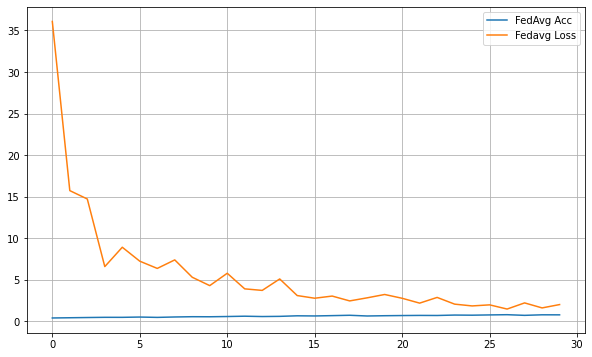

In [3]:
num = 6
average_acc_list, average_loss_list = [], []

for i in range(30):
    tmp_a, tmp_l = 0, 0
    for j in range(num):
        tmp_a = tmp_a + np.mean(globals()['acc{}'.format(j)][i])
        tmp_l = tmp_l + np.mean(globals()['loss{}'.format(j)][i])    
        
    average_acc_list.append(tmp_a/num)
    average_loss_list.append(tmp_l/num)   
    
plt.figure(figsize=(10,6))
plt.plot(average_acc_list, label='FedAvg Acc')
plt.plot(average_loss_list, label='Fedavg Loss')

plt.grid(True)
plt.legend()
plt.show()

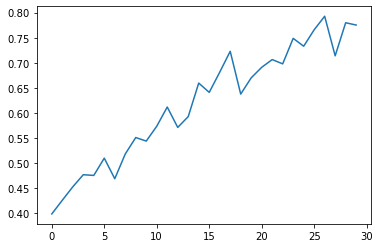

In [4]:
plt.plot(average_acc_list, label='FedAvg Acc')
plt.show()

In [5]:
print(average_acc_list,'\n') 
print(average_loss_list)

[0.3981972216318051, 0.42541722179287, 0.4522983342409134, 0.47646111225088433, 0.4750322221881813, 0.5095461124761237, 0.4684355564001533, 0.517817223444581, 0.5507127775914139, 0.5435949992388486, 0.5732211110078625, 0.6115894451323483, 0.570878332398004, 0.5925038891947932, 0.6594161139594185, 0.6408372219238017, 0.6811255551046794, 0.7228383325868183, 0.6374361112299892, 0.6698761106779179, 0.6908666666183206, 0.7063077778451973, 0.6977516645358669, 0.7486688882112503, 0.7329805563721393, 0.7658094440069464, 0.7928311097953055, 0.713822776493099, 0.7798411109381251, 0.7752650005122027] 

[36.08274331291516, 15.725255615843666, 14.717571021782028, 6.581008171041806, 8.910722621281941, 7.23288128806485, 6.362759530875418, 7.387487282355626, 5.297652735478348, 4.29220399144623, 5.779528839389482, 3.902223882079124, 3.717013152771526, 5.094078063964844, 3.0959828063845634, 2.7747408992714355, 3.03459704104397, 2.451661008348068, 2.822894239591228, 3.2247266132798464, 2.768637977374924,

# Labelwise Clustering

In [6]:
acc0 = [[0.6333000063896179, 0.651199996471405, 0.679099977016449, 0.7369999885559082, 0.6633999943733215, 0.6644999980926514, 0.6152999997138977, 0.7019000053405762, 0.664900004863739, 0.6385999917984009, 0.6564000248908997, 0.6947000026702881, 0.5893999934196472, 0.5917999744415283, 0.6697999835014343, 0.6079999804496765, 0.5697000026702881, 0.6043000221252441, 0.6348999738693237, 0.5827000141143799, 0.5859000086784363, 0.5508999824523926, 0.6129000186920166, 0.6327000260353088, 0.5534999966621399, 0.5267000198364258, 0.5974000096321106, 0.5401999950408936, 0.5360999703407288, 0.5313000082969666], [0.7213000059127808, 0.7254999876022339, 0.6883000135421753, 0.6966000199317932, 0.6917999982833862, 0.6431999802589417, 0.7271999716758728, 0.6409000158309937, 0.6601999998092651, 0.6230000257492065, 0.6410999894142151, 0.6933000087738037, 0.6499000191688538, 0.631600022315979, 0.6431000232696533, 0.7246000170707703, 0.6388999819755554, 0.5996000170707703, 0.576200008392334, 0.6563000082969666, 0.6137999892234802, 0.5024999976158142, 0.6150000095367432, 0.4925999939441681, 0.5411999821662903, 0.5511000156402588, 0.47130000591278076, 0.5662999749183655, 0.6055999994277954, 0.453900009393692], [0.7577999830245972, 0.7419999837875366, 0.7394999861717224, 0.7720999717712402, 0.7674000263214111, 0.7807000279426575, 0.7339000105857849, 0.6934999823570251, 0.7143999934196472, 0.7911999821662903, 0.7416999936103821, 0.7055000066757202, 0.7954999804496765, 0.6693000197410583, 0.6754000186920166, 0.5932000279426575, 0.6341999769210815, 0.6590999960899353, 0.7035999894142151, 0.6895999908447266, 0.6122999787330627, 0.6394000053405762, 0.5996000170707703, 0.631600022315979, 0.6157000064849854, 0.6205000281333923, 0.5741999745368958, 0.6366999745368958, 0.5691999793052673, 0.6118000149726868], [0.7572000026702881, 0.7024000287055969, 0.8148999810218811, 0.7623999714851379, 0.7674000263214111, 0.7684999704360962, 0.7202000021934509, 0.756600022315979, 0.8069000244140625, 0.6743999719619751, 0.7631000280380249, 0.7353000044822693, 0.7817999720573425, 0.7089999914169312, 0.7433000206947327, 0.7077000141143799, 0.6509000062942505, 0.7893999814987183, 0.7572000026702881, 0.7139000296592712, 0.6735000014305115, 0.6801999807357788, 0.5855000019073486, 0.6644999980926514, 0.569599986076355, 0.59579998254776, 0.6553999781608582, 0.6503000259399414, 0.6269000172615051, 0.6085000038146973], [0.7301999926567078, 0.7922000288963318, 0.760200023651123, 0.7544999718666077, 0.8090000152587891, 0.728600025177002, 0.6887000203132629, 0.8098999857902527, 0.7688000202178955, 0.7767999768257141, 0.7336999773979187, 0.7085999846458435, 0.7710999846458435, 0.8330000042915344, 0.7565000057220459, 0.7922999858856201, 0.6919999718666077, 0.7181000113487244, 0.5985999703407288, 0.628600001335144, 0.6905999779701233, 0.7200000286102295, 0.7031999826431274, 0.6396999955177307, 0.6901999711990356, 0.5328999757766724, 0.6830999851226807, 0.5364999771118164, 0.6539999842643738, 0.618399977684021], [0.7781999707221985, 0.832099974155426, 0.8331999778747559, 0.824999988079071, 0.7894999980926514, 0.8356000185012817, 0.8500000238418579, 0.7872999906539917, 0.7875999808311462, 0.8363000154495239, 0.7299000024795532, 0.7475000023841858, 0.7965999841690063, 0.7849000096321106, 0.7531999945640564, 0.8015999794006348, 0.7578999996185303, 0.732699990272522, 0.7226999998092651, 0.7017999887466431, 0.7750999927520752, 0.6987000107765198, 0.739799976348877, 0.7128999829292297, 0.7623000144958496, 0.6754000186920166, 0.7494999766349792, 0.6424999833106995, 0.7081000208854675, 0.7728999853134155], [0.8392000198364258, 0.7789000272750854, 0.8876000046730042, 0.8468999862670898, 0.8932999968528748, 0.8873000144958496, 0.8202000260353088, 0.7694000005722046, 0.8428000211715698, 0.8284000158309937, 0.7570000290870667, 0.8708999752998352, 0.8187000155448914, 0.77920001745224, 0.8137999773025513, 0.8137000203132629, 0.8258000016212463, 0.8457000255584717, 0.7748000025749207, 0.805899977684021, 0.71670001745224, 0.8658999800682068, 0.8062999844551086, 0.8363999724388123, 0.7149999737739563, 0.7498000264167786, 0.8317000269889832, 0.7224000096321106, 0.6507999897003174, 0.6625000238418579], [0.8641999959945679, 0.8158000111579895, 0.854200005531311, 0.8877000212669373, 0.7401000261306763, 0.8773000240325928, 0.802299976348877, 0.8389000296592712, 0.8192999958992004, 0.746399998664856, 0.7475000023841858, 0.7997000217437744, 0.9063000082969666, 0.7512000203132629, 0.8341000080108643, 0.8873999714851379, 0.8741000294685364, 0.7092999815940857, 0.810699999332428, 0.8166000247001648, 0.8011000156402588, 0.7821999788284302, 0.7605000138282776, 0.7081000208854675, 0.8065999746322632, 0.7710999846458435, 0.7937999963760376, 0.7488999962806702, 0.7836999893188477, 0.7235999703407288], [0.8495000004768372, 0.817300021648407, 0.8496000170707703, 0.8623999953269958, 0.8445000052452087, 0.8208000063896179, 0.904699981212616, 0.8421000242233276, 0.8737999796867371, 0.8748999834060669, 0.8396999835968018, 0.8847000002861023, 0.8313000202178955, 0.8457000255584717, 0.7271999716758728, 0.8948000073432922, 0.8323000073432922, 0.8472999930381775, 0.7702000141143799, 0.852400004863739, 0.859000027179718, 0.7656999826431274, 0.7368000149726868, 0.8438000082969666, 0.6603999733924866, 0.7782999873161316, 0.7457000017166138, 0.6987000107765198, 0.7049000263214111, 0.7616999745368958], [0.8981000185012817, 0.9132000207901001, 0.8880000114440918, 0.8991000056266785, 0.8141999840736389, 0.8686000108718872, 0.8495000004768372, 0.8600000143051147, 0.8370000123977661, 0.807699978351593, 0.8094000220298767, 0.8027999997138977, 0.8409000039100647, 0.8809000253677368, 0.8679999709129333, 0.8622000217437744, 0.7904000282287598, 0.8633000254631042, 0.8686000108718872, 0.8792999982833862, 0.777400016784668, 0.76910001039505, 0.7775999903678894, 0.6680999994277954, 0.8422999978065491, 0.7002000212669373, 0.6870999932289124, 0.7009000182151794, 0.680899977684021, 0.8303999900817871], [0.9185000061988831, 0.8337000012397766, 0.9108999967575073, 0.8669999837875366, 0.8794000148773193, 0.871399998664856, 0.8902999758720398, 0.892799973487854, 0.8694999814033508, 0.8140000104904175, 0.8733000159263611, 0.7910000085830688, 0.8011999726295471, 0.8676000237464905, 0.7940000295639038, 0.8378000259399414, 0.8194000124931335, 0.8485999703407288, 0.855400025844574, 0.8287000060081482, 0.7789999842643738, 0.8328999876976013, 0.8684999942779541, 0.7814000248908997, 0.8705999851226807, 0.8730000257492065, 0.8195000290870667, 0.7623999714851379, 0.8095999956130981, 0.8044000267982483], [0.8744999766349792, 0.9200999736785889, 0.8934000134468079, 0.8618000149726868, 0.9100000262260437, 0.8988999724388123, 0.8827000260353088, 0.8539000153541565, 0.886900007724762, 0.835099995136261, 0.8743000030517578, 0.8080000281333923, 0.7875000238418579, 0.8892999887466431, 0.9228000044822693, 0.8263999819755554, 0.7675999999046326, 0.8694999814033508, 0.8733999729156494, 0.8712000250816345, 0.78329998254776, 0.8356999754905701, 0.8733999729156494, 0.8366000056266785, 0.7555999755859375, 0.8633999824523926, 0.8238999843597412, 0.8108999729156494, 0.7735000252723694, 0.7208999991416931], [0.9041000008583069, 0.8956999778747559, 0.8892999887466431, 0.8930000066757202, 0.8711000084877014, 0.8396000266075134, 0.9154999852180481, 0.8526999950408936, 0.8978000283241272, 0.8898000121116638, 0.8554999828338623, 0.8777999877929688, 0.876800000667572, 0.8938000202178955, 0.8317000269889832, 0.8689000010490417, 0.8848000168800354, 0.8761000037193298, 0.9054999947547913, 0.8787999749183655, 0.7802000045776367, 0.8276000022888184, 0.7685999870300293, 0.8345000147819519, 0.8518999814987183, 0.7734000086784363, 0.8564000129699707, 0.7657999992370605, 0.8434000015258789, 0.7940000295639038], [0.9017999768257141, 0.8303999900817871, 0.9128999710083008, 0.8925999999046326, 0.9236000180244446, 0.8482999801635742, 0.9136000275611877, 0.8948000073432922, 0.9067999720573425, 0.919700026512146, 0.9154999852180481, 0.848800003528595, 0.8847000002861023, 0.8023999929428101, 0.8363999724388123, 0.8726000189781189, 0.9014999866485596, 0.8478000164031982, 0.7835000157356262, 0.9017999768257141, 0.8166000247001648, 0.8551999926567078, 0.8598999977111816, 0.9185000061988831, 0.8145999908447266, 0.8051000237464905, 0.744700014591217, 0.8008999824523926, 0.7419000267982483, 0.8119000196456909], [0.8817999958992004, 0.9111999869346619, 0.8787999749183655, 0.8574000000953674, 0.9174000024795532, 0.8931000232696533, 0.9122999906539917, 0.8934999704360962, 0.8870000243186951, 0.9122999906539917, 0.9004999995231628, 0.9056000113487244, 0.9208999872207642, 0.8722000122070312, 0.8791000247001648, 0.847100019454956, 0.9369999766349792, 0.8370000123977661, 0.8539000153541565, 0.847100019454956, 0.8418999910354614, 0.7906000018119812, 0.7883999943733215, 0.857699990272522, 0.8970999717712402, 0.840399980545044, 0.8263999819755554, 0.8158000111579895, 0.8331000208854675, 0.696399986743927], [0.928600013256073, 0.8325999975204468, 0.8571000099182129, 0.8777999877929688, 0.9194999933242798, 0.8937000036239624, 0.8982999920845032, 0.9132000207901001, 0.9205999970436096, 0.8830000162124634, 0.8770999908447266, 0.9193000197410583, 0.8482000231742859, 0.9304999709129333, 0.9158999919891357, 0.9168000221252441, 0.8198000192642212, 0.8364999890327454, 0.8978000283241272, 0.8108999729156494, 0.8702999949455261, 0.8805999755859375, 0.8751999735832214, 0.8345999717712402, 0.8640999794006348, 0.7937999963760376, 0.9106000065803528, 0.819100022315979, 0.6577000021934509, 0.8517000079154968], [0.9290000200271606, 0.9074000120162964, 0.8616999983787537, 0.9139999747276306, 0.9218000173568726, 0.9259999990463257, 0.9168000221252441, 0.8788999915122986, 0.9294999837875366, 0.8733999729156494, 0.8808000087738037, 0.8597000241279602, 0.8610000014305115, 0.9101999998092651, 0.8971999883651733, 0.8646000027656555, 0.8659999966621399, 0.8654999732971191, 0.9230999946594238, 0.9057999849319458, 0.8784000277519226, 0.8999000191688538, 0.9221000075340271, 0.7236999869346619, 0.9244999885559082, 0.8899000287055969, 0.7937999963760376, 0.8533999919891357, 0.8849999904632568, 0.8813999891281128], [0.8996999859809875, 0.9107999801635742, 0.892300009727478, 0.9129999876022339, 0.9200999736785889, 0.9017999768257141, 0.9071000218391418, 0.862500011920929, 0.9192000031471252, 0.8898000121116638, 0.9272000193595886, 0.8697999715805054, 0.9229000210762024, 0.8633999824523926, 0.8149999976158142, 0.9361000061035156, 0.9059000015258789, 0.847599983215332, 0.8959000110626221, 0.888700008392334, 0.8705999851226807, 0.8461999893188477, 0.8553000092506409, 0.8773000240325928, 0.7139999866485596, 0.8438000082969666, 0.8650000095367432, 0.8823999762535095, 0.689300000667572, 0.8127999901771545], [0.9236000180244446, 0.8858000040054321, 0.9344000220298767, 0.8500000238418579, 0.9271000027656555, 0.9408000111579895, 0.8964999914169312, 0.8934000134468079, 0.9226999878883362, 0.9125999808311462, 0.9272000193595886, 0.9175000190734863, 0.910099983215332, 0.9086999893188477, 0.8743000030517578, 0.8772000074386597, 0.8313999772071838, 0.8119000196456909, 0.8672999739646912, 0.8355000019073486, 0.9182999730110168, 0.8647000193595886, 0.7347999811172485, 0.8208000063896179, 0.8675000071525574, 0.7809000015258789, 0.8574000000953674, 0.8084999918937683, 0.9093999862670898, 0.8959000110626221], [0.9534000158309937, 0.9265999794006348, 0.9307000041007996, 0.8461999893188477, 0.9068999886512756, 0.9405999779701233, 0.9282000064849854, 0.9361000061035156, 0.9174000024795532, 0.9397000074386597, 0.8773999810218811, 0.8622000217437744, 0.9265000224113464, 0.9208999872207642, 0.9484999775886536, 0.883899986743927, 0.9093000292778015, 0.885699987411499, 0.7950999736785889, 0.8371999859809875, 0.7700999975204468, 0.8722000122070312, 0.7850000262260437, 0.7710999846458435, 0.8944000005722046, 0.8370000123977661, 0.8755000233650208, 0.772599995136261, 0.9025999903678894, 0.8816999793052673], [0.8931000232696533, 0.934499979019165, 0.9214000105857849, 0.9225000143051147, 0.9244999885559082, 0.9276999831199646, 0.9190999865531921, 0.8824999928474426, 0.9039000272750854, 0.8902000188827515, 0.8895000219345093, 0.9049000144004822, 0.8637999892234802, 0.9404000043869019, 0.8842999935150146, 0.920199990272522, 0.8518000245094299, 0.8956000208854675, 0.902400016784668, 0.9086999893188477, 0.9099000096321106, 0.9463000297546387, 0.9229000210762024, 0.8220999836921692, 0.9036999940872192, 0.9254999756813049, 0.875, 0.8454999923706055, 0.8650000095367432, 0.9225000143051147], [0.9462000131607056, 0.9488000273704529, 0.957099974155426, 0.9236000180244446, 0.9584000110626221, 0.9075000286102295, 0.9264000058174133, 0.9366999864578247, 0.9006999731063843, 0.867900013923645, 0.9273999929428101, 0.9404000043869019, 0.9115999937057495, 0.9492999911308289, 0.8615999817848206, 0.8862000107765198, 0.8154000043869019, 0.7623000144958496, 0.8999999761581421, 0.8950999975204468, 0.9004999995231628, 0.8715000152587891, 0.8575000166893005, 0.8515999913215637, 0.8912000060081482, 0.8859999775886536, 0.9004999995231628, 0.7739999890327454, 0.857200026512146, 0.853600025177002], [0.9361000061035156, 0.9229000210762024, 0.9509000182151794, 0.8716999888420105, 0.9526000022888184, 0.9176999926567078, 0.9524999856948853, 0.8797000050544739, 0.9352999925613403, 0.9248999953269958, 0.9343000054359436, 0.9358999729156494, 0.9391000270843506, 0.8967000246047974, 0.9283999800682068, 0.9388999938964844, 0.891700029373169, 0.800000011920929, 0.9144999980926514, 0.8464999794960022, 0.8955000042915344, 0.9318000078201294, 0.8361999988555908, 0.8867999911308289, 0.8334000110626221, 0.8956000208854675, 0.8174999952316284, 0.8216000199317932, 0.9035000205039978, 0.8870000243186951], [0.9266999959945679, 0.9246000051498413, 0.9387000203132629, 0.9384999871253967, 0.9420999884605408, 0.9233999848365784, 0.8633000254631042, 0.9462000131607056, 0.9010000228881836, 0.8590999841690063, 0.9391999840736389, 0.926800012588501, 0.9419999718666077, 0.9397000074386597, 0.9319000244140625, 0.8180000185966492, 0.8719000220298767, 0.8334000110626221, 0.91839998960495, 0.9334999918937683, 0.9248999953269958, 0.8108999729156494, 0.8715999722480774, 0.8015999794006348, 0.7810999751091003, 0.8666999936103821, 0.8414000272750854, 0.9165999889373779, 0.9027000069618225, 0.8727999925613403], [0.9142000079154968, 0.9236000180244446, 0.9501000046730042, 0.9144999980926514, 0.923799991607666, 0.9402999877929688, 0.9311000108718872, 0.9291999936103821, 0.9092000126838684, 0.916100025177002, 0.8985000252723694, 0.9307000041007996, 0.9140999913215637, 0.9395999908447266, 0.9265000224113464, 0.9265000224113464, 0.8733000159263611, 0.9358999729156494, 0.8294000029563904, 0.8463000059127808, 0.8544999957084656, 0.8482000231742859, 0.7720999717712402, 0.7512000203132629, 0.90829998254776, 0.7854999899864197, 0.8952000141143799, 0.9251000285148621, 0.840499997138977, 0.8684999942779541], [0.9304999709129333, 0.9271000027656555, 0.9466999769210815, 0.9351000189781189, 0.888700008392334, 0.9315999746322632, 0.9354000091552734, 0.9266999959945679, 0.9448999762535095, 0.9269000291824341, 0.9628000259399414, 0.9386000037193298, 0.8881999850273132, 0.9304999709129333, 0.9395999908447266, 0.9279999732971191, 0.9391999840736389, 0.9089999794960022, 0.9132999777793884, 0.9259999990463257, 0.8978000283241272, 0.9258000254631042, 0.9118000268936157, 0.8705000281333923, 0.8651999831199646, 0.9138000011444092, 0.77920001745224, 0.8791999816894531, 0.9186999797821045, 0.9434000253677368], [0.930400013923645, 0.9458000063896179, 0.9075000286102295, 0.9447000026702881, 0.9194999933242798, 0.8849999904632568, 0.9254999756813049, 0.9217000007629395, 0.9307000041007996, 0.9520000219345093, 0.9144999980926514, 0.8514000177383423, 0.8817999958992004, 0.894599974155426, 0.9146000146865845, 0.9151999950408936, 0.9401000142097473, 0.9302999973297119, 0.885699987411499, 0.957099974155426, 0.9049999713897705, 0.9021999835968018, 0.8903999924659729, 0.8762000203132629, 0.8725000023841858, 0.8719000220298767, 0.8679999709129333, 0.9246000051498413, 0.9247999787330627, 0.8569999933242798], [0.8414999842643738, 0.9376999735832214, 0.9369999766349792, 0.9531999826431274, 0.9429000020027161, 0.9304999709129333, 0.9430000185966492, 0.9496999979019165, 0.9423999786376953, 0.920199990272522, 0.9469000101089478, 0.8837000131607056, 0.9291999936103821, 0.9369000196456909, 0.9348000288009644, 0.9259999990463257, 0.916100025177002, 0.8870000243186951, 0.9027000069618225, 0.885699987411499, 0.9567000269889832, 0.92330002784729, 0.9178000092506409, 0.9085999727249146, 0.9215999841690063, 0.9358999729156494, 0.8827999830245972, 0.89410001039505, 0.8445000052452087, 0.925599992275238], [0.9208999872207642, 0.9480000138282776, 0.9122999906539917, 0.9498000144958496, 0.9272000193595886, 0.9387999773025513, 0.9463000297546387, 0.941100001335144, 0.9354000091552734, 0.9404000043869019, 0.9061999917030334, 0.9390000104904175, 0.8741000294685364, 0.9205999970436096, 0.9381999969482422, 0.939300000667572, 0.9236000180244446, 0.9430999755859375, 0.9207000136375427, 0.8532000184059143, 0.9290000200271606, 0.9301999807357788, 0.9269999861717224, 0.9412000179290771, 0.8880000114440918, 0.8898000121116638, 0.9359999895095825, 0.920199990272522, 0.9262999892234802, 0.9495999813079834], [0.9241999983787537, 0.9114000201225281, 0.9496999979019165, 0.9495000243186951, 0.9452999830245972, 0.9526000022888184, 0.8809999823570251, 0.9624000191688538, 0.9347000122070312, 0.9470000267028809, 0.9480999708175659, 0.9409999847412109, 0.9271000027656555, 0.9280999898910522, 0.9190000295639038, 0.9322999715805054, 0.8578000068664551, 0.947700023651123, 0.954200029373169, 0.8622000217437744, 0.933899998664856, 0.9477999806404114, 0.8895000219345093, 0.9280999898910522, 0.9419000148773193, 0.9480000138282776, 0.9214000105857849, 0.9293000102043152, 0.9107999801635742, 0.9207000136375427]]
loss0 = [[3.5108683109283447, 3.2510452270507812, 2.650777578353882, 0.8703787922859192, 2.179497241973877, 2.1332521438598633, 2.6117160320281982, 2.1166841983795166, 2.7809205055236816, 3.2954261302948, 2.4856460094451904, 1.2099499702453613, 4.809047222137451, 5.396731376647949, 4.730754852294922, 3.979616403579712, 4.827693462371826, 5.945981979370117, 5.234560966491699, 4.822099685668945, 8.213486671447754, 5.888209819793701, 2.308357000350952, 4.098644733428955, 9.678995132446289, 10.216781616210938, 4.664150714874268, 5.471434593200684, 7.742247104644775, 6.874506950378418], [3.3933398723602295, 1.924752950668335, 3.432739734649658, 3.364550828933716, 2.260122537612915, 3.746931314468384, 2.15448260307312, 6.163430213928223, 2.8003294467926025, 5.764620304107666, 4.289610385894775, 2.6260087490081787, 4.128855228424072, 4.791667461395264, 2.365739107131958, 1.489671230316162, 2.8857455253601074, 3.473369836807251, 3.9289674758911133, 3.676060438156128, 6.1273193359375, 8.83792781829834, 5.567784309387207, 5.359831809997559, 10.39323616027832, 4.769820213317871, 8.386144638061523, 4.4929728507995605, 4.180992126464844, 7.426821708679199], [2.4373326301574707, 1.464579701423645, 2.43854022026062, 2.387495994567871, 1.7724957466125488, 1.7916560173034668, 2.4276785850524902, 1.7912659645080566, 2.066603422164917, 1.835349202156067, 2.245192289352417, 2.8882341384887695, 0.9379399418830872, 4.362354278564453, 3.305788993835449, 5.512682914733887, 3.372365951538086, 4.405569553375244, 3.3460047245025635, 3.5738444328308105, 4.310083389282227, 3.4433231353759766, 3.8636085987091064, 2.377143144607544, 3.7942843437194824, 4.868378639221191, 4.7291789054870605, 3.7296605110168457, 3.6248862743377686, 3.283757448196411], [1.3239986896514893, 2.1544013023376465, 0.9992844462394714, 3.0646679401397705, 1.7326149940490723, 1.7261828184127808, 3.21913743019104, 2.3919517993927, 0.86441570520401, 3.2246251106262207, 1.7228466272354126, 2.653630018234253, 2.2210536003112793, 2.9577155113220215, 1.6195061206817627, 1.3949737548828125, 3.610560894012451, 1.157021164894104, 1.781357765197754, 2.604158878326416, 3.9733171463012695, 2.356300115585327, 4.237283229827881, 2.541870594024658, 4.714792728424072, 4.6747965812683105, 3.6648378372192383, 2.1028554439544678, 3.325978994369507, 4.4662089347839355], [2.5600051879882812, 1.5987104177474976, 2.404534339904785, 1.702778935432434, 1.5129085779190063, 1.716059923171997, 2.8066465854644775, 0.9812785983085632, 1.5044775009155273, 1.5898288488388062, 1.7522156238555908, 2.4119277000427246, 1.4364701509475708, 0.765896201133728, 2.65539288520813, 1.7399868965148926, 2.931452512741089, 2.4119300842285156, 2.215331792831421, 2.3466691970825195, 2.7183315753936768, 1.8392553329467773, 3.439396381378174, 3.5826339721679688, 2.5173442363739014, 6.263915538787842, 1.9788318872451782, 3.556691884994507, 2.966055154800415, 2.6013166904449463], [1.6303308010101318, 0.8524056673049927, 0.7462602257728577, 0.990292489528656, 1.0821958780288696, 0.919106125831604, 0.6420950293540955, 1.4177647829055786, 1.0357261896133423, 0.7990755438804626, 1.8156979084014893, 1.4636930227279663, 1.2164103984832764, 1.3916547298431396, 1.361124038696289, 1.1544429063796997, 1.570885419845581, 1.5911182165145874, 1.7449954748153687, 2.2594316005706787, 1.3155850172042847, 2.316132068634033, 1.095180869102478, 2.010838747024536, 1.3587028980255127, 3.3921546936035156, 1.4030321836471558, 3.1114895343780518, 2.7160446643829346, 1.2217066287994385], [0.7525196075439453, 1.7083183526992798, 0.4767393171787262, 0.709128737449646, 0.4648037254810333, 0.4321526885032654, 0.9674228429794312, 1.9710533618927002, 0.7397878766059875, 0.9202773571014404, 1.7904003858566284, 0.5632467865943909, 0.8573992252349854, 1.1638683080673218, 1.2933119535446167, 1.1478760242462158, 0.8076310157775879, 0.9284917712211609, 1.405057668685913, 1.7814911603927612, 2.148972511291504, 0.5831011533737183, 0.823093056678772, 0.8597376942634583, 1.7162635326385498, 1.9081439971923828, 0.889580249786377, 1.1470345258712769, 2.337019681930542, 2.7926619052886963], [0.6359161138534546, 1.0970019102096558, 0.6447100043296814, 0.5101158022880554, 1.7272400856018066, 0.6157269477844238, 1.3957505226135254, 0.684399425983429, 0.9332112073898315, 1.7880072593688965, 1.332090139389038, 1.0756655931472778, 0.47361278533935547, 1.618447184562683, 0.8512387871742249, 0.5710057020187378, 0.6051808595657349, 1.680728554725647, 0.9187909364700317, 0.9426848888397217, 0.9306265711784363, 1.4797195196151733, 1.3983322381973267, 3.1232659816741943, 1.1007860898971558, 0.9659927487373352, 1.1633613109588623, 1.692609190940857, 1.3786091804504395, 2.0024001598358154], [0.6614028215408325, 1.4442962408065796, 0.5773365497589111, 0.7660719752311707, 0.9376515746116638, 1.4157540798187256, 0.44625547528266907, 0.6517316699028015, 0.5566254258155823, 0.48292306065559387, 0.7362720370292664, 0.5053631067276001, 0.7123322486877441, 0.617536187171936, 1.6078859567642212, 0.426683634519577, 0.8778732419013977, 0.8379372954368591, 1.3571276664733887, 0.5889098644256592, 0.6072629690170288, 1.597396969795227, 1.2534470558166504, 0.6637090444564819, 1.7084242105484009, 1.0230141878128052, 1.295585036277771, 1.3886302709579468, 1.9292945861816406, 1.2440966367721558], [0.44989708065986633, 0.43976250290870667, 0.49888110160827637, 0.3845854699611664, 0.9705239534378052, 0.5598310828208923, 1.0601977109909058, 0.5263176560401917, 0.9373574256896973, 0.7964280247688293, 0.8466445207595825, 1.6992636919021606, 1.0276341438293457, 0.48424381017684937, 0.6765097975730896, 0.5752089619636536, 1.4780985116958618, 0.6428732872009277, 0.6248493790626526, 0.625298261642456, 1.24503493309021, 1.4017564058303833, 1.1329565048217773, 1.7943158149719238, 0.6687279939651489, 1.8466873168945312, 2.0372061729431152, 1.369716763496399, 1.2478615045547485, 0.7218778133392334], [0.30057480931282043, 0.9604901075363159, 0.42315083742141724, 0.6751219630241394, 0.528728187084198, 0.7386344075202942, 0.458332359790802, 0.5570709705352783, 0.5716416835784912, 2.1137938499450684, 0.6841680407524109, 1.1742204427719116, 0.9613685607910156, 0.8121446371078491, 0.9877399206161499, 0.7358577847480774, 0.7486892342567444, 0.7990062832832336, 0.6436847448348999, 1.3001598119735718, 2.5844767093658447, 0.7457946538925171, 0.6145024299621582, 1.7072973251342773, 0.5301446914672852, 0.6647056341171265, 1.000125527381897, 4.277523040771484, 0.9616494178771973, 0.8926720023155212], [0.5888389945030212, 0.5087775588035583, 0.40199416875839233, 0.5915365219116211, 0.43601641058921814, 0.4224805533885956, 0.5842950940132141, 0.8328981399536133, 0.5196454524993896, 1.1517612934112549, 0.6239041686058044, 1.0815995931625366, 1.5064467191696167, 0.41609683632850647, 0.327121376991272, 1.0681442022323608, 1.2935739755630493, 0.9087507724761963, 0.5452492833137512, 0.6237351894378662, 1.4627416133880615, 0.7999780178070068, 0.6797976493835449, 1.0915783643722534, 2.0448036193847656, 0.7017329335212708, 0.8575403094291687, 1.3978933095932007, 1.2834194898605347, 2.7998151779174805], [0.41812652349472046, 0.4609715938568115, 0.490065336227417, 0.7016618847846985, 0.5230380296707153, 0.7655631303787231, 0.34490442276000977, 0.6684315800666809, 0.6155617237091064, 0.4360315501689911, 0.7980245351791382, 0.5336971879005432, 0.609503984451294, 0.6914716362953186, 0.751569390296936, 0.4934806525707245, 0.7776586413383484, 0.48595213890075684, 0.44669291377067566, 0.5952973365783691, 1.3080917596817017, 0.8034383654594421, 1.4632598161697388, 0.8163026571273804, 0.7768030166625977, 1.8190122842788696, 0.6413970589637756, 1.1604863405227661, 1.1555689573287964, 1.0943785905838013], [0.450899213552475, 1.0313124656677246, 0.377516508102417, 0.631140410900116, 0.3276969790458679, 0.7951338291168213, 0.38295185565948486, 0.47101593017578125, 0.3984392285346985, 0.33345064520835876, 0.42226138710975647, 0.7089369893074036, 0.6446769833564758, 1.3244699239730835, 1.1150625944137573, 0.9285928010940552, 0.4961149990558624, 0.6766931414604187, 1.5189616680145264, 0.4366227090358734, 1.1055315732955933, 0.7709301710128784, 0.5743547081947327, 0.4367970824241638, 0.9583406448364258, 1.2499229907989502, 1.6367645263671875, 1.2975542545318604, 1.3679462671279907, 0.9609335660934448], [0.6017037630081177, 0.4768334925174713, 0.5497766733169556, 0.6257847547531128, 0.3892551064491272, 0.7450373768806458, 0.531535804271698, 0.5717650055885315, 0.6808673739433289, 0.37993472814559937, 0.6063783168792725, 0.43156734108924866, 0.29159486293792725, 0.5441842079162598, 0.4880358874797821, 0.8961746096611023, 0.24500682950019836, 0.8497818112373352, 0.7757512331008911, 0.9524447321891785, 0.7913395166397095, 1.11177396774292, 1.2279314994812012, 0.6480929851531982, 0.5108511447906494, 0.9131573438644409, 1.0350244045257568, 0.7735521197319031, 0.9695495367050171, 1.8655009269714355], [0.29298582673072815, 1.0648736953735352, 0.7362444400787354, 0.5797058343887329, 0.35983404517173767, 0.4152272939682007, 0.5718255639076233, 0.5141181945800781, 0.3538976311683655, 0.4928376078605652, 0.5773492455482483, 0.34511592984199524, 0.8930091857910156, 0.3416946232318878, 0.4130679666996002, 0.4480031132698059, 0.9985809326171875, 1.1255689859390259, 0.44545650482177734, 0.8160303235054016, 0.5670043230056763, 0.708399772644043, 0.5020160675048828, 0.8015031814575195, 0.6182966828346252, 1.1763144731521606, 0.35623037815093994, 0.9472290873527527, 2.722177267074585, 0.814957320690155], [0.38308998942375183, 0.5460144281387329, 0.6447764039039612, 0.39889809489250183, 0.412632018327713, 0.4221244752407074, 0.4195587933063507, 0.6320500373840332, 0.3643677532672882, 0.6591595411300659, 0.5966758728027344, 0.7210614085197449, 0.6232760548591614, 0.4838199317455292, 0.6274170279502869, 0.6277095675468445, 0.6129916310310364, 0.6838507056236267, 0.2805269956588745, 0.49923941493034363, 0.614995539188385, 0.4957982301712036, 0.3588123917579651, 2.1992435455322266, 0.4389832019805908, 0.5389226675033569, 1.2045745849609375, 1.3672946691513062, 0.7525323033332825, 0.6692647337913513], [0.5402405858039856, 0.3743317723274231, 0.637781023979187, 0.4883849620819092, 0.3790487051010132, 0.476436048746109, 0.4128553569316864, 0.896945595741272, 0.31154605746269226, 0.5918626189231873, 0.25500550866127014, 0.5182420015335083, 0.4796062111854553, 0.8122243881225586, 1.1726312637329102, 0.4142780900001526, 0.483659565448761, 0.9435451030731201, 0.7735154032707214, 0.602961003780365, 0.7563491463661194, 0.5838813781738281, 0.5327984690666199, 0.6514776349067688, 2.5800442695617676, 1.45608389377594, 0.5925478935241699, 0.6456138491630554, 1.3324661254882812, 1.0170931816101074], [0.26734820008277893, 0.5913681983947754, 0.28882458806037903, 0.9644439220428467, 0.3441673219203949, 0.23892667889595032, 0.35184580087661743, 0.38274848461151123, 0.24255883693695068, 0.47582143545150757, 0.25662559270858765, 0.3859183192253113, 0.43281805515289307, 0.46415868401527405, 0.6505177021026611, 0.5002656579017639, 1.2435007095336914, 0.8880671858787537, 0.5563034415245056, 0.8172997832298279, 0.3620569705963135, 0.9710503220558167, 1.1442320346832275, 0.7878080010414124, 0.7542650103569031, 1.227935791015625, 0.9497008919715881, 1.1214009523391724, 0.47109711170196533, 0.536812424659729], [0.2035706490278244, 0.34539932012557983, 0.3866467773914337, 0.684317409992218, 0.6448368430137634, 0.24718381464481354, 0.29742231965065, 0.26726076006889343, 0.4798424243927002, 0.24087963998317719, 0.5560275912284851, 0.6922522783279419, 0.3870275020599365, 0.3297109007835388, 0.18517540395259857, 0.6178244352340698, 0.6662158966064453, 0.6485932469367981, 1.3572264909744263, 0.906180202960968, 1.2301654815673828, 0.7967535853385925, 1.2404625415802002, 1.7968205213546753, 0.5143760442733765, 0.8787052631378174, 0.8205631971359253, 0.9526469707489014, 0.6271744966506958, 0.4786951541900635], [0.404448926448822, 0.2744946777820587, 0.46661338210105896, 0.3749768137931824, 0.32535046339035034, 0.34739530086517334, 0.3700661063194275, 0.6083129644393921, 0.4403562545776367, 0.6278282999992371, 0.6713683009147644, 0.44371822476387024, 0.7655386328697205, 0.2684950530529022, 0.9574187397956848, 0.4252782166004181, 0.6944462656974792, 0.5672881603240967, 0.5970463156700134, 0.4162288010120392, 0.4674433469772339, 0.19927260279655457, 0.2966814339160919, 1.1642955541610718, 0.41382211446762085, 0.3923270106315613, 0.6326962113380432, 0.9644597768783569, 0.6749244332313538, 0.4012317359447479], [0.17997096478939056, 0.17796872556209564, 0.1720695197582245, 0.3613892197608948, 0.2170189470052719, 0.489107221364975, 0.42504116892814636, 0.2694198787212372, 0.3435989320278168, 0.8342130780220032, 0.32033613324165344, 0.3342897295951843, 0.44689926505088806, 0.2162836641073227, 1.163756012916565, 0.5406969785690308, 1.3193212747573853, 1.4851661920547485, 0.43718457221984863, 0.6575212478637695, 0.5673131346702576, 0.6834401488304138, 0.6838528513908386, 0.9278119206428528, 0.8162474036216736, 0.7745996713638306, 0.5993030071258545, 1.569114089012146, 0.5332530736923218, 0.7264177203178406], [0.2731514573097229, 0.4093797504901886, 0.2505473494529724, 0.7245137691497803, 0.18372757732868195, 0.3107486963272095, 0.2083704173564911, 0.5628174543380737, 0.4250682592391968, 0.3514946699142456, 0.2803480327129364, 0.2649918794631958, 0.288991242647171, 0.5360586047172546, 0.3655546009540558, 0.24264934659004211, 0.6580522656440735, 1.338720440864563, 0.4677891135215759, 0.8302050828933716, 0.44220736622810364, 0.3296741843223572, 1.3242411613464355, 0.4829854965209961, 0.969188392162323, 0.7111718058586121, 1.2219107151031494, 0.8705728650093079, 0.4536702036857605, 0.533902108669281], [0.4664662480354309, 0.32212933897972107, 0.24093784391880035, 0.36856192350387573, 0.21970553696155548, 0.3392491340637207, 0.5075028538703918, 0.28147414326667786, 0.615309476852417, 1.0066720247268677, 0.3108814060688019, 0.43034112453460693, 0.23021723330020905, 0.23043543100357056, 0.26511046290397644, 1.333608865737915, 0.779914915561676, 1.2098215818405151, 0.5244536399841309, 0.3757730722427368, 0.546123206615448, 1.731183409690857, 0.5527614951133728, 1.3172318935394287, 1.0160456895828247, 1.118638277053833, 0.5879528522491455, 0.41910868883132935, 0.4406382441520691, 0.8997290730476379], [0.46929678320884705, 0.3727251887321472, 0.22616581618785858, 0.3643873929977417, 0.3898875415325165, 0.24823656678199768, 0.3091306686401367, 0.3286702036857605, 0.4810212254524231, 0.5067023038864136, 0.5466991662979126, 0.31454429030418396, 0.4137655794620514, 0.31065937876701355, 0.36128222942352295, 0.33875131607055664, 1.2384800910949707, 0.31249329447746277, 1.0044240951538086, 0.7045747637748718, 0.6179874539375305, 0.6896933317184448, 1.1074384450912476, 1.6243629455566406, 0.43372461199760437, 1.5120340585708618, 0.5621176958084106, 0.2692622244358063, 1.160882592201233, 1.1986716985702515], [0.5007010698318481, 0.30239954590797424, 0.23763346672058105, 0.27574029564857483, 0.6324891448020935, 0.31963905692100525, 0.2943715453147888, 0.3169228136539459, 0.2586621642112732, 0.28690460324287415, 0.14756160974502563, 0.22876596450805664, 0.8868260979652405, 0.3291384279727936, 0.23271530866622925, 0.3857518136501312, 0.43664512038230896, 0.5884798169136047, 0.3603609800338745, 0.31778988242149353, 0.6278349161148071, 0.5247607231140137, 0.400669127702713, 0.8376409411430359, 0.5003117322921753, 0.3756851851940155, 1.0410451889038086, 0.566098153591156, 0.6547029614448547, 0.24569086730480194], [0.32372725009918213, 0.21359272301197052, 0.42536914348602295, 0.257614403963089, 0.4475143551826477, 0.6793578267097473, 0.3511320948600769, 0.32172635197639465, 0.27191755175590515, 0.26793450117111206, 0.6002078056335449, 0.9950136542320251, 0.8603246212005615, 0.5102105736732483, 0.5327433943748474, 0.35476282238960266, 0.2944642901420593, 0.3921774923801422, 0.6993761658668518, 0.18643617630004883, 0.3435351252555847, 0.38483506441116333, 0.44769370555877686, 0.7537907361984253, 0.8346267342567444, 0.8235663175582886, 0.7467865943908691, 0.684765636920929, 0.4154142141342163, 0.8489725589752197], [1.474618673324585, 0.32109037041664124, 0.28097036480903625, 0.21711952984333038, 0.23076754808425903, 0.3451893627643585, 0.2417033165693283, 0.1947653591632843, 0.26249444484710693, 0.3432398736476898, 0.29513469338417053, 0.6095215678215027, 0.26751407980918884, 0.38016995787620544, 0.219261035323143, 0.3375783860683441, 0.3213947117328644, 0.5368157029151917, 0.43182459473609924, 0.4421786665916443, 0.15764087438583374, 0.3173103928565979, 0.3476822078227997, 0.8758513927459717, 0.3712950348854065, 0.3956812620162964, 0.6199818849563599, 0.39366939663887024, 0.9267914891242981, 0.4747787117958069], [0.45382338762283325, 0.22921615839004517, 0.39682629704475403, 0.22211110591888428, 0.4072083532810211, 0.3032000660896301, 0.2343498319387436, 0.30666056275367737, 0.30758771300315857, 0.34382349252700806, 0.7083425521850586, 0.27787142992019653, 0.6888675093650818, 0.36694735288619995, 0.5571456551551819, 0.31155699491500854, 0.40964439511299133, 0.24016588926315308, 0.34280672669410706, 0.579505205154419, 0.3791709244251251, 0.30944547057151794, 0.4279991686344147, 0.3104438781738281, 0.6415804028511047, 0.7983410358428955, 0.47322413325309753, 0.81083744764328, 0.6437112092971802, 0.2762615382671356], [0.36965057253837585, 0.6321366429328918, 0.2525913119316101, 0.307919442653656, 0.3588602542877197, 0.21891100704669952, 0.8286311626434326, 0.2429361641407013, 0.29354655742645264, 0.2803771197795868, 0.24908098578453064, 0.3416764736175537, 0.4076290428638458, 0.4781956076622009, 0.4807175397872925, 0.2832792103290558, 0.6750279664993286, 0.24334777891635895, 0.2638210356235504, 0.9801331758499146, 0.3761238753795624, 0.31866300106048584, 0.5681806206703186, 0.36307281255722046, 0.38971784710884094, 0.36462733149528503, 0.303822785615921, 0.5467892289161682, 0.4479060471057892, 0.6028456091880798]] 

acc1 = [[0.6035000085830688, 0.6653000116348267, 0.6287000179290771, 0.7542999982833862, 0.6234999895095825, 0.661899983882904, 0.6597999930381775, 0.6251999735832214, 0.656000018119812, 0.6819999814033508, 0.6559000015258789, 0.6751000285148621, 0.6579999923706055, 0.621399998664856, 0.5455999970436096, 0.5005999803543091, 0.6064000129699707, 0.6801999807357788, 0.6552000045776367, 0.5965999960899353, 0.4876999855041504, 0.6322000026702881, 0.5044000148773193, 0.41620001196861267, 0.484499990940094, 0.5098000168800354, 0.5315999984741211, 0.37950000166893005, 0.5060999989509583, 0.4918999969959259], [0.7633000016212463, 0.7358999848365784, 0.7480000257492065, 0.7378000020980835, 0.7300999760627747, 0.7371000051498413, 0.7488999962806702, 0.6815999746322632, 0.6711000204086304, 0.6787999868392944, 0.7038999795913696, 0.744700014591217, 0.7031000256538391, 0.7310000061988831, 0.6625999808311462, 0.7020000219345093, 0.7206000089645386, 0.6532999873161316, 0.6412000060081482, 0.6776999831199646, 0.6517000198364258, 0.630299985408783, 0.5985000133514404, 0.5623000264167786, 0.5742999911308289, 0.5799999833106995, 0.597100019454956, 0.6207000017166138, 0.573199987411499, 0.5120999813079834], [0.7574999928474426, 0.7177000045776367, 0.7770000100135803, 0.7946000099182129, 0.8651999831199646, 0.7709000110626221, 0.7958999872207642, 0.6523000001907349, 0.6866000294685364, 0.6523000001907349, 0.6769000291824341, 0.7143999934196472, 0.6729000210762024, 0.6658999919891357, 0.6190999746322632, 0.6067000031471252, 0.5813999772071838, 0.6862999796867371, 0.595300018787384, 0.6543999910354614, 0.5077000260353088, 0.6248000264167786, 0.5073000192642212, 0.6071000099182129, 0.585099995136261, 0.5512999892234802, 0.5246000289916992, 0.5640000104904175, 0.5914000272750854, 0.628000020980835], [0.7766000032424927, 0.8259999752044678, 0.7283999919891357, 0.7475000023841858, 0.7994999885559082, 0.6858999729156494, 0.7882999777793884, 0.7803000211715698, 0.7961999773979187, 0.7052000164985657, 0.6690999865531921, 0.6794999837875366, 0.7182999849319458, 0.6643000245094299, 0.7379000186920166, 0.7148000001907349, 0.7038000226020813, 0.7001000046730042, 0.6333000063896179, 0.6363000273704529, 0.6238999962806702, 0.7301999926567078, 0.7261999845504761, 0.5986999869346619, 0.7057999968528748, 0.6861000061035156, 0.7020999789237976, 0.6614999771118164, 0.598800003528595, 0.6330000162124634], [0.7962999939918518, 0.8661999702453613, 0.8044000267982483, 0.8234999775886536, 0.767799973487854, 0.7602999806404114, 0.805400013923645, 0.7832000255584717, 0.8083000183105469, 0.784500002861023, 0.8682000041007996, 0.7139000296592712, 0.8108999729156494, 0.7307999730110168, 0.7214000225067139, 0.7346000075340271, 0.7813000082969666, 0.8310999870300293, 0.7275999784469604, 0.7526000142097473, 0.7211999893188477, 0.6103000044822693, 0.7856000065803528, 0.6751000285148621, 0.7469000220298767, 0.669700026512146, 0.6696000099182129, 0.7153000235557556, 0.5967000126838684, 0.6061999797821045], [0.7939000129699707, 0.8956000208854675, 0.796999990940094, 0.7781999707221985, 0.8034999966621399, 0.7903000116348267, 0.8547000288963318, 0.8651999831199646, 0.8256999850273132, 0.8435999751091003, 0.765500009059906, 0.7601000070571899, 0.7526000142097473, 0.7376999855041504, 0.7185999751091003, 0.7745000123977661, 0.723800003528595, 0.8240000009536743, 0.7581999897956848, 0.8449000120162964, 0.7552000284194946, 0.6693999767303467, 0.7156999707221985, 0.7350999712944031, 0.6917999982833862, 0.7019000053405762, 0.6696000099182129, 0.6402000188827515, 0.829200029373169, 0.7605000138282776], [0.774399995803833, 0.8133999705314636, 0.8123000264167786, 0.8282999992370605, 0.8370000123977661, 0.8317000269889832, 0.775600016117096, 0.8633999824523926, 0.8525000214576721, 0.8235999941825867, 0.817300021648407, 0.7462000250816345, 0.789900004863739, 0.7397000193595886, 0.7551000118255615, 0.692300021648407, 0.7562000155448914, 0.8021000027656555, 0.7411999702453613, 0.7534999847412109, 0.694599986076355, 0.7538999915122986, 0.6714000105857849, 0.7991999983787537, 0.7307000160217285, 0.7922000288963318, 0.6571000218391418, 0.8299999833106995, 0.692300021648407, 0.6571999788284302], [0.8549000024795532, 0.8431000113487244, 0.866599977016449, 0.8240000009536743, 0.8777999877929688, 0.8425999879837036, 0.8112000226974487, 0.8640999794006348, 0.8384000062942505, 0.9178000092506409, 0.8528000116348267, 0.8823999762535095, 0.8471999764442444, 0.8458999991416931, 0.8102999925613403, 0.8805000185966492, 0.8632000088691711, 0.8945000171661377, 0.8748999834060669, 0.8177000284194946, 0.824999988079071, 0.8001000285148621, 0.8353000283241272, 0.8705999851226807, 0.8356000185012817, 0.8361999988555908, 0.7626000046730042, 0.880299985408783, 0.7353000044822693, 0.8278999924659729], [0.869700014591217, 0.8741999864578247, 0.909500002861023, 0.8600000143051147, 0.8914999961853027, 0.8256000280380249, 0.8205000162124634, 0.8921999931335449, 0.9075000286102295, 0.9074000120162964, 0.8884000182151794, 0.8737000226974487, 0.8219000101089478, 0.8147000074386597, 0.823199987411499, 0.8237000107765198, 0.8413000106811523, 0.8884000182151794, 0.8371000289916992, 0.8859000205993652, 0.8734999895095825, 0.8507999777793884, 0.7919999957084656, 0.7770000100135803, 0.8716999888420105, 0.7628999948501587, 0.7957000136375427, 0.7354000210762024, 0.6895999908447266, 0.7401000261306763], [0.8409000039100647, 0.9092000126838684, 0.8314999938011169, 0.8515999913215637, 0.8698999881744385, 0.8169999718666077, 0.8766999840736389, 0.9139000177383423, 0.8629000186920166, 0.8622999787330627, 0.8569999933242798, 0.880299985408783, 0.9161999821662903, 0.8787000179290771, 0.7818999886512756, 0.8773000240325928, 0.8474000096321106, 0.8287000060081482, 0.8716999888420105, 0.8690000176429749, 0.8960000276565552, 0.9156000018119812, 0.7671999931335449, 0.8366000056266785, 0.8100000023841858, 0.7764999866485596, 0.8729000091552734, 0.7949000000953674, 0.7745000123977661, 0.7343000173568726], [0.9103000164031982, 0.9056000113487244, 0.8773000240325928, 0.8600999712944031, 0.8932999968528748, 0.8725000023841858, 0.9196000099182129, 0.8266000151634216, 0.885200023651123, 0.7878000140190125, 0.7991999983787537, 0.8395000100135803, 0.848800003528595, 0.8234000205993652, 0.7465000152587891, 0.7911999821662903, 0.8251000046730042, 0.6948000192642212, 0.849399983882904, 0.8274999856948853, 0.850600004196167, 0.7141000032424927, 0.7836999893188477, 0.8166000247001648, 0.7458999752998352, 0.6746000051498413, 0.8208000063896179, 0.7455999851226807, 0.7983999848365784, 0.7505000233650208], [0.907800018787384, 0.8586000204086304, 0.864799976348877, 0.906499981880188, 0.8992000222206116, 0.8844000101089478, 0.90420001745224, 0.8410999774932861, 0.9187999963760376, 0.8953999876976013, 0.8899000287055969, 0.9162999987602234, 0.8001999855041504, 0.8664000034332275, 0.8687000274658203, 0.8925999999046326, 0.8723000288009644, 0.8389999866485596, 0.8490999937057495, 0.7475000023841858, 0.7634999752044678, 0.7922000288963318, 0.7675999999046326, 0.7925999760627747, 0.8389000296592712, 0.8172000050544739, 0.8432000279426575, 0.8105999827384949, 0.8755999803543091, 0.9093999862670898], [0.9024999737739563, 0.8715000152587891, 0.9034000039100647, 0.855400025844574, 0.9253000020980835, 0.8938999772071838, 0.9253000020980835, 0.9099000096321106, 0.8371000289916992, 0.8561000227928162, 0.8921999931335449, 0.9258000254631042, 0.9264000058174133, 0.9021999835968018, 0.9251000285148621, 0.9251999855041504, 0.774399995803833, 0.8148999810218811, 0.8759999871253967, 0.8450999855995178, 0.8579999804496765, 0.8151000142097473, 0.79339998960495, 0.8515999913215637, 0.8924000263214111, 0.9341999888420105, 0.8529000282287598, 0.8396999835968018, 0.8569999933242798, 0.7639999985694885], [0.9215999841690063, 0.9158999919891357, 0.8883000016212463, 0.902899980545044, 0.9351000189781189, 0.9334999918937683, 0.8251000046730042, 0.8604000210762024, 0.8112999796867371, 0.8729000091552734, 0.8199999928474426, 0.8920999765396118, 0.8899000287055969, 0.9125000238418579, 0.8021000027656555, 0.8924999833106995, 0.8515999913215637, 0.8691999912261963, 0.8554999828338623, 0.8424999713897705, 0.8858000040054321, 0.8295000195503235, 0.7148000001907349, 0.8389000296592712, 0.8513000011444092, 0.8495000004768372, 0.6747000217437744, 0.8361999988555908, 0.7926999926567078, 0.8585000038146973], [0.8902000188827515, 0.9042999744415283, 0.9169999957084656, 0.9422000050544739, 0.8855999708175659, 0.8651000261306763, 0.8586999773979187, 0.8669999837875366, 0.8561000227928162, 0.866100013256073, 0.8077999949455261, 0.9254000186920166, 0.9050999879837036, 0.8978000283241272, 0.9035000205039978, 0.8691999912261963, 0.8672000169754028, 0.8980000019073486, 0.847000002861023, 0.8737000226974487, 0.8054999709129333, 0.7791000008583069, 0.8647000193595886, 0.7996000051498413, 0.7635999917984009, 0.840499997138977, 0.7807999849319458, 0.7789999842643738, 0.8669000267982483, 0.8773999810218811], [0.9135000109672546, 0.9009000062942505, 0.9332000017166138, 0.9140999913215637, 0.890999972820282, 0.8986999988555908, 0.8953999876976013, 0.8398000001907349, 0.8842999935150146, 0.8819000124931335, 0.8948000073432922, 0.850600004196167, 0.9319999814033508, 0.9049999713897705, 0.8544999957084656, 0.859499990940094, 0.8784999847412109, 0.8409000039100647, 0.8190000057220459, 0.8216000199317932, 0.8373000025749207, 0.9318000078201294, 0.8949000239372253, 0.784600019454956, 0.788100004196167, 0.8281000256538391, 0.8550999760627747, 0.8985999822616577, 0.8413000106811523, 0.815500020980835], [0.9229000210762024, 0.8740000128746033, 0.9330000281333923, 0.8769000172615051, 0.9259999990463257, 0.9034000039100647, 0.895799994468689, 0.9340000152587891, 0.9376000165939331, 0.9376000165939331, 0.9474999904632568, 0.8438000082969666, 0.862500011920929, 0.9376000165939331, 0.9179999828338623, 0.7638999819755554, 0.8626000285148621, 0.8551999926567078, 0.9485999941825867, 0.8550999760627747, 0.9153000116348267, 0.8396000266075134, 0.8967000246047974, 0.9108999967575073, 0.8773000240325928, 0.8475000262260437, 0.7660999894142151, 0.8456000089645386, 0.8815000057220459, 0.7437000274658203], [0.9434000253677368, 0.9050999879837036, 0.9423999786376953, 0.9447000026702881, 0.9246000051498413, 0.9254999756813049, 0.9282000064849854, 0.8756999969482422, 0.913100004196167, 0.8901000022888184, 0.894599974155426, 0.9128999710083008, 0.9312999844551086, 0.9243999719619751, 0.9380999803543091, 0.8499000072479248, 0.9508000016212463, 0.8615000247955322, 0.9391000270843506, 0.8863999843597412, 0.9014000296592712, 0.8858000040054321, 0.8960000276565552, 0.88919997215271, 0.9104999899864197, 0.902899980545044, 0.8324999809265137, 0.8716999888420105, 0.8650000095367432, 0.9312999844551086], [0.9208999872207642, 0.9369000196456909, 0.9452999830245972, 0.8611000180244446, 0.9240000247955322, 0.9125000238418579, 0.9545999765396118, 0.8849999904632568, 0.919700026512146, 0.9075999855995178, 0.9261000156402588, 0.9322999715805054, 0.9472000002861023, 0.8895999789237976, 0.9000999927520752, 0.7993000149726868, 0.9114000201225281, 0.9174000024795532, 0.9264000058174133, 0.8773999810218811, 0.8671000003814697, 0.8938999772071838, 0.9412000179290771, 0.9059000015258789, 0.9221000075340271, 0.8844000101089478, 0.8389000296592712, 0.8611999750137329, 0.8490999937057495, 0.8964999914169312], [0.9476000070571899, 0.949400007724762, 0.91839998960495, 0.9319999814033508, 0.923799991607666, 0.9244999885559082, 0.9099000096321106, 0.8608999848365784, 0.8892999887466431, 0.9039000272750854, 0.949400007724762, 0.930400013923645, 0.9143999814987183, 0.8515999913215637, 0.8971999883651733, 0.9128999710083008, 0.913100004196167, 0.8445000052452087, 0.8338000178337097, 0.8733999729156494, 0.9257000088691711, 0.8371999859809875, 0.8561999797821045, 0.7979000210762024, 0.8428000211715698, 0.8507000207901001, 0.8313999772071838, 0.8687999844551086, 0.7652999758720398, 0.9247000217437744], [0.9370999932289124, 0.9373999834060669, 0.9542999863624573, 0.9060999751091003, 0.960099995136261, 0.9271000027656555, 0.8550000190734863, 0.9010000228881836, 0.9101999998092651, 0.9164999723434448, 0.8730999827384949, 0.9307000041007996, 0.8348000049591064, 0.8754000067710876, 0.9401999711990356, 0.8526999950408936, 0.8561999797821045, 0.8855000138282776, 0.9146000146865845, 0.8693000078201294, 0.8411999940872192, 0.8762999773025513, 0.9129999876022339, 0.808899998664856, 0.9247999787330627, 0.8601999878883362, 0.878600001335144, 0.7641000151634216, 0.8180999755859375, 0.8180000185966492], [0.9089000225067139, 0.9222999811172485, 0.9537000060081482, 0.9343000054359436, 0.9524000287055969, 0.9419000148773193, 0.9484999775886536, 0.899399995803833, 0.9351000189781189, 0.9327999949455261, 0.9379000067710876, 0.9168000221252441, 0.9104999899864197, 0.9388999938964844, 0.9041000008583069, 0.9395999908447266, 0.8658999800682068, 0.9362000226974487, 0.9465000033378601, 0.9363999962806702, 0.89410001039505, 0.8906000256538391, 0.9214000105857849, 0.9168999791145325, 0.90829998254776, 0.9111999869346619, 0.9063000082969666, 0.9430999755859375, 0.8977000117301941, 0.8842999935150146], [0.9478999972343445, 0.9397000074386597, 0.9340999722480774, 0.9204000234603882, 0.9023000001907349, 0.9326000213623047, 0.9437000155448914, 0.9162999987602234, 0.944599986076355, 0.9196000099182129, 0.9325000047683716, 0.9090999960899353, 0.8659999966621399, 0.9254000186920166, 0.9531000256538391, 0.9373000264167786, 0.8822000026702881, 0.9264000058174133, 0.9477999806404114, 0.8626999855041504, 0.9247000217437744, 0.8798999786376953, 0.9057999849319458, 0.927299976348877, 0.940500020980835, 0.8848000168800354, 0.9169999957084656, 0.9284999966621399, 0.9276999831199646, 0.9103999733924866], [0.9375, 0.9434000253677368, 0.8899000287055969, 0.9373000264167786, 0.9526000022888184, 0.9386000037193298, 0.9017999768257141, 0.90420001745224, 0.9142000079154968, 0.9063000082969666, 0.8529999852180481, 0.8637999892234802, 0.8241000175476074, 0.9053000211715698, 0.8837000131607056, 0.892300009727478, 0.869700014591217, 0.9397000074386597, 0.8335000276565552, 0.8557000160217285, 0.9193000197410583, 0.8847000002861023, 0.8812000155448914, 0.8245999813079834, 0.8230000138282776, 0.8913000226020813, 0.9398999810218811, 0.8166999816894531, 0.8513000011444092, 0.8783000111579895], [0.9524000287055969, 0.939300000667572, 0.9207000136375427, 0.9437999725341797, 0.9269000291824341, 0.9251000285148621, 0.9387000203132629, 0.9431999921798706, 0.9550999999046326, 0.9380000233650208, 0.9309999942779541, 0.949400007724762, 0.9470999836921692, 0.9488000273704529, 0.953499972820282, 0.9538999795913696, 0.9585999846458435, 0.9394000172615051, 0.9272000193595886, 0.8948000073432922, 0.8521999716758728, 0.9470000267028809, 0.9370999932289124, 0.8776000142097473, 0.9165999889373779, 0.7433000206947327, 0.9160000085830688, 0.9006999731063843, 0.8855000138282776, 0.8598999977111816], [0.9470999836921692, 0.9498999714851379, 0.9629999995231628, 0.9402999877929688, 0.9038000106811523, 0.9602000117301941, 0.9071999788284302, 0.9370999932289124, 0.9387000203132629, 0.9085000157356262, 0.9387999773025513, 0.9217000007629395, 0.9315000176429749, 0.9545999765396118, 0.9222000241279602, 0.9006999731063843, 0.8335000276565552, 0.9350000023841858, 0.951200008392334, 0.9157000184059143, 0.9126999974250793, 0.9056000113487244, 0.9207000136375427, 0.9003999829292297, 0.9261999726295471, 0.9013000130653381, 0.8960999846458435, 0.8712999820709229, 0.8468999862670898, 0.845300018787384], [0.9417999982833862, 0.9225999712944031, 0.9215999841690063, 0.9120000004768372, 0.9139000177383423, 0.9380999803543091, 0.9262999892234802, 0.944599986076355, 0.9283999800682068, 0.9287999868392944, 0.9466000199317932, 0.9329000115394592, 0.9074000120162964, 0.8919000029563904, 0.9164999723434448, 0.9463000297546387, 0.8615999817848206, 0.9200999736785889, 0.9537000060081482, 0.8937000036239624, 0.8248000144958496, 0.9254000186920166, 0.8319000005722046, 0.9132000207901001, 0.9236999750137329, 0.9192000031471252, 0.8636999726295471, 0.9591000080108643, 0.8438000082969666, 0.9314000010490417], [0.941100001335144, 0.939300000667572, 0.9341999888420105, 0.9631999731063843, 0.892300009727478, 0.9456999897956848, 0.9627000093460083, 0.9301000237464905, 0.9508000016212463, 0.9589999914169312, 0.9381999969482422, 0.958299994468689, 0.8751000165939331, 0.9559000134468079, 0.9545999765396118, 0.9279999732971191, 0.9444000124931335, 0.948199987411499, 0.9047999978065491, 0.9574999809265137, 0.9178000092506409, 0.8453999757766724, 0.9380999803543091, 0.9341999888420105, 0.7784000039100647, 0.9269000291824341, 0.9057999849319458, 0.8296999931335449, 0.8851000070571899, 0.8518000245094299], [0.9567000269889832, 0.9369999766349792, 0.9157999753952026, 0.9569000005722046, 0.941100001335144, 0.9133999943733215, 0.9538999795913696, 0.942300021648407, 0.9225999712944031, 0.9261000156402588, 0.9248999953269958, 0.9320999979972839, 0.9552000164985657, 0.8982999920845032, 0.9176999926567078, 0.9438999891281128, 0.9556000232696533, 0.9502000212669373, 0.8912000060081482, 0.9251000285148621, 0.9503999948501587, 0.9121999740600586, 0.9203000068664551, 0.9377999901771545, 0.8838000297546387, 0.8452000021934509, 0.9217000007629395, 0.9377999901771545, 0.9409000277519226, 0.8841999769210815], [0.9376999735832214, 0.9473999738693237, 0.9488999843597412, 0.9501000046730042, 0.8568000197410583, 0.9490000009536743, 0.9501000046730042, 0.9514999985694885, 0.9187999963760376, 0.8830000162124634, 0.9352999925613403, 0.9289000034332275, 0.9398999810218811, 0.9452000260353088, 0.8971999883651733, 0.9358000159263611, 0.9480999708175659, 0.9394999742507935, 0.9345999956130981, 0.9121999740600586, 0.9315999746322632, 0.9140999913215637, 0.954200029373169, 0.9506000280380249, 0.9395999908447266, 0.8411999940872192, 0.8529000282287598, 0.8847000002861023, 0.9071999788284302, 0.9430999755859375]]
loss1 = [[2.974008083343506, 2.9956061840057373, 3.322108268737793, 1.015336513519287, 3.0524332523345947, 2.500225067138672, 3.2532975673675537, 3.8356895446777344, 3.6946969032287598, 2.596566677093506, 2.8582494258880615, 1.7111951112747192, 3.4771335124969482, 3.3681981563568115, 5.0858964920043945, 7.991178035736084, 5.6783881187438965, 2.547530174255371, 3.304439067840576, 4.45508337020874, 6.292857646942139, 7.835687637329102, 7.235445976257324, 6.198680400848389, 6.222250461578369, 11.902432441711426, 13.131339073181152, 12.170696258544922, 13.022555351257324, 9.71873950958252], [1.327681064605713, 2.1273746490478516, 1.2447134256362915, 2.687934160232544, 4.576123237609863, 2.664402484893799, 2.574572801589966, 3.4272260665893555, 3.9986472129821777, 3.7943050861358643, 1.9005261659622192, 1.7606185674667358, 3.792977809906006, 2.5799248218536377, 4.537310600280762, 2.104031562805176, 2.1108407974243164, 4.112026214599609, 4.738576412200928, 3.6480343341827393, 4.936590671539307, 5.53151273727417, 6.6849470138549805, 4.595017910003662, 3.9662249088287354, 5.586458683013916, 3.9540820121765137, 2.7654337882995605, 7.5032501220703125, 9.116878509521484], [1.9040331840515137, 1.7905699014663696, 1.9999326467514038, 1.900412917137146, 0.7040037512779236, 1.687638282775879, 1.1330639123916626, 4.127790927886963, 1.6625714302062988, 3.3640239238739014, 4.005000591278076, 1.9446039199829102, 3.866093397140503, 2.4191713333129883, 5.403576374053955, 4.5372161865234375, 3.90287184715271, 3.643040657043457, 4.011678218841553, 4.052199363708496, 4.536965847015381, 3.6053476333618164, 3.9936788082122803, 5.606453895568848, 2.250500440597534, 4.18247127532959, 2.5406877994537354, 5.323766708374023, 4.60157585144043, 4.225849628448486], [1.9114418029785156, 0.9773322343826294, 2.8174991607666016, 2.096433162689209, 1.2479833364486694, 2.6235146522521973, 1.372497320175171, 1.542604684829712, 2.0610737800598145, 2.9991016387939453, 2.08499813079834, 2.7107419967651367, 2.08154559135437, 2.100478410720825, 1.314592719078064, 2.5761940479278564, 3.4546866416931152, 2.4141829013824463, 3.620457410812378, 3.392515182495117, 3.21777606010437, 1.6494197845458984, 2.61566162109375, 3.2139556407928467, 2.452209949493408, 1.877459168434143, 2.3320252895355225, 2.537811279296875, 4.114426136016846, 3.370349168777466], [1.4510352611541748, 0.6104584336280823, 0.8105126619338989, 1.133210301399231, 1.5262993574142456, 1.5068480968475342, 1.4485929012298584, 1.7207205295562744, 1.1077327728271484, 1.15811288356781, 0.6621876358985901, 2.576164484024048, 1.023217797279358, 1.5745199918746948, 1.503169298171997, 1.6797548532485962, 1.8761448860168457, 0.9555180668830872, 1.7417151927947998, 1.9093350172042847, 2.027611494064331, 2.3392391204833984, 1.8069679737091064, 1.961518406867981, 1.1113556623458862, 2.1193697452545166, 1.8494763374328613, 1.3901374340057373, 2.1648309230804443, 2.7816829681396484], [1.458988904953003, 0.5208021998405457, 1.3676643371582031, 1.1873809099197388, 1.5856479406356812, 1.0777201652526855, 0.7282665371894836, 0.6284784078598022, 1.3861490488052368, 0.890432596206665, 1.092527985572815, 1.6037957668304443, 1.8077486753463745, 1.4307231903076172, 2.828460454940796, 1.211997389793396, 1.988048791885376, 0.8246243000030518, 1.8281455039978027, 0.6992665529251099, 1.2039045095443726, 1.9013359546661377, 2.4014768600463867, 1.7290281057357788, 2.434159278869629, 2.3153867721557617, 1.6085853576660156, 1.7637605667114258, 1.1115342378616333, 1.5541772842407227], [1.1765966415405273, 0.8780557513237, 1.2904653549194336, 1.0265816450119019, 0.6466662287712097, 1.3263590335845947, 1.4824124574661255, 0.5924322605133057, 0.6529805064201355, 0.9882208108901978, 0.8305313587188721, 1.2361992597579956, 0.8505339622497559, 1.762195110321045, 1.2488806247711182, 1.5192561149597168, 1.2956827878952026, 0.9420871138572693, 1.1521817445755005, 1.617756724357605, 2.1292612552642822, 1.1448571681976318, 1.7066974639892578, 0.7652734518051147, 2.2549872398376465, 0.9353479743003845, 2.23166561126709, 0.8125579953193665, 1.5613511800765991, 2.229461669921875], [0.8573319315910339, 0.9049162864685059, 0.6563692688941956, 1.3347963094711304, 0.7762314677238464, 0.6760827898979187, 1.8141658306121826, 0.7271276116371155, 1.1242339611053467, 0.38982605934143066, 0.798219621181488, 0.6054002046585083, 0.8896207809448242, 0.6144284009933472, 1.739608645439148, 0.5475113391876221, 0.5523545145988464, 0.44750943779945374, 0.527336061000824, 0.844794511795044, 0.869025468826294, 1.6665122509002686, 0.8298007845878601, 0.6822159290313721, 1.496598482131958, 0.7403255105018616, 1.497998833656311, 0.6770220398902893, 2.773749589920044, 0.8209396600723267], [0.6167718768119812, 0.5586015582084656, 0.3930605351924896, 0.5390216708183289, 0.4948921501636505, 0.9126269817352295, 0.8705486059188843, 0.46509554982185364, 0.3784717917442322, 0.33312276005744934, 0.4829801321029663, 0.4512062072753906, 0.9808232188224792, 0.9777783155441284, 1.04050874710083, 0.857429563999176, 0.8612645268440247, 0.4582158625125885, 0.8200044631958008, 0.4932565987110138, 0.4965921938419342, 0.7013069987297058, 1.0241063833236694, 2.7827625274658203, 0.6992923617362976, 1.5615549087524414, 1.1299171447753906, 1.5495707988739014, 1.8712140321731567, 1.1184121370315552], [0.8186459541320801, 0.45881742238998413, 1.222731113433838, 0.6955960988998413, 0.6728360056877136, 1.7205932140350342, 0.5861115455627441, 0.3785124123096466, 0.9609209895133972, 0.6361533403396606, 0.6505174040794373, 0.5245444178581238, 0.32062041759490967, 0.5152015089988708, 1.5140910148620605, 0.5140726566314697, 0.702121376991272, 0.9189601540565491, 0.4880000948905945, 0.5126952528953552, 0.44368672370910645, 0.3494851291179657, 1.1593470573425293, 0.8195008039474487, 0.7540242075920105, 1.0521314144134521, 0.7355086207389832, 0.9861935377120972, 1.0062772035598755, 1.1033862829208374], [0.5284324288368225, 0.4685889780521393, 0.5615715384483337, 0.6216647028923035, 0.6392215490341187, 0.5658143758773804, 0.44198501110076904, 0.7107693552970886, 0.4233279228210449, 0.9734991192817688, 1.1735795736312866, 0.726462185382843, 0.7026616334915161, 0.7508512139320374, 2.00831937789917, 1.2113550901412964, 0.7797664403915405, 2.862783670425415, 0.782478392124176, 0.7368676662445068, 0.6473109126091003, 2.2653610706329346, 1.7330793142318726, 1.0190173387527466, 1.696092128753662, 3.394536018371582, 1.066847562789917, 1.488498568534851, 1.2072060108184814, 1.7410567998886108], [0.3414999544620514, 0.6330105662345886, 0.9049395322799683, 0.4885886609554291, 0.4746860861778259, 0.4762117564678192, 0.5675085186958313, 1.0097901821136475, 0.4105885326862335, 0.4978733956813812, 0.5114622116088867, 0.6325336694717407, 1.2487643957138062, 0.5629292726516724, 0.6007348299026489, 0.471575528383255, 0.521514356136322, 0.6172900795936584, 0.7582724094390869, 1.7222589254379272, 1.1064698696136475, 0.9570387601852417, 1.1895567178726196, 1.2519983053207397, 0.729708194732666, 1.4079209566116333, 0.7463845014572144, 0.8778522610664368, 0.4827195405960083, 0.5564635992050171], [0.3930265009403229, 0.49999862909317017, 0.42659178376197815, 0.6701688766479492, 0.35127636790275574, 0.39694130420684814, 0.2830122411251068, 0.4085901975631714, 0.5965704321861267, 0.6885815858840942, 0.43647509813308716, 0.33096250891685486, 0.6085241436958313, 0.36583131551742554, 0.38076701760292053, 0.293634295463562, 1.0341312885284424, 0.9079729318618774, 0.5859706401824951, 0.652162492275238, 0.83917236328125, 1.0684165954589844, 1.4755078554153442, 0.6250483989715576, 0.46024930477142334, 0.279414564371109, 0.7117192149162292, 0.7078067064285278, 0.6708880662918091, 1.0199061632156372], [0.3790527880191803, 0.4301990866661072, 0.7512518167495728, 0.39615699648857117, 0.309648334980011, 0.285158634185791, 1.293840765953064, 0.6644736528396606, 1.1412458419799805, 0.5353979468345642, 0.9590486288070679, 0.5481823086738586, 0.4780985414981842, 0.38638097047805786, 1.312123417854309, 0.5170232653617859, 0.6211162805557251, 0.6827506422996521, 0.5791366696357727, 0.8201389908790588, 0.44691601395606995, 0.7927440404891968, 2.334585428237915, 0.7846013903617859, 0.7619485855102539, 0.815177321434021, 2.1352388858795166, 1.1280044317245483, 1.2487117052078247, 0.6455425024032593], [0.5321352481842041, 0.5149653553962708, 0.3913317322731018, 0.39260411262512207, 0.42885467410087585, 0.8530637621879578, 0.7624877095222473, 0.5309888124465942, 0.5567324161529541, 0.5956612825393677, 1.7671847343444824, 0.2912503778934479, 0.49548643827438354, 0.5278416275978088, 0.378856897354126, 0.6008687615394592, 0.7867022752761841, 0.6840473413467407, 0.6950746774673462, 0.6061812043190002, 0.8947815299034119, 1.2330626249313354, 0.8168153166770935, 0.8447306752204895, 1.3209246397018433, 0.711384654045105, 0.8218631744384766, 1.1538665294647217, 0.6020878553390503, 0.4565389156341553], [0.3721049427986145, 0.5966141819953918, 0.2952709496021271, 0.37935519218444824, 0.5021172761917114, 0.4066014289855957, 0.44413164258003235, 0.7490487098693848, 0.5423510074615479, 0.5480049848556519, 0.43286341428756714, 0.7087841033935547, 0.2666279077529907, 0.460574209690094, 0.671601414680481, 0.7908713817596436, 0.49958524107933044, 1.0944775342941284, 1.2034094333648682, 0.6354039907455444, 0.867735743522644, 0.29181498289108276, 0.4636811912059784, 0.9720073938369751, 0.9447749257087708, 0.9673530459403992, 0.7955268621444702, 0.4591754376888275, 0.8045302629470825, 0.8989682793617249], [0.2638185918331146, 0.6797537207603455, 0.27530142664909363, 0.6589438319206238, 0.3624035716056824, 0.5390653610229492, 0.5181965827941895, 0.3146471679210663, 0.39362114667892456, 0.2708533704280853, 0.20980440080165863, 0.8246924877166748, 0.6252889633178711, 0.24410629272460938, 0.4597190320491791, 1.3002257347106934, 0.5763384103775024, 0.686715304851532, 0.2272002249956131, 0.9503888487815857, 0.44580650329589844, 0.7943957448005676, 0.4373166561126709, 0.4626103937625885, 0.5973513722419739, 0.863178014755249, 1.366094946861267, 0.866543173789978, 0.7080855965614319, 2.514981508255005], [0.2341076135635376, 0.4243575632572174, 0.29302647709846497, 0.285706102848053, 0.3277537226676941, 0.3060217797756195, 0.2795759439468384, 0.5969411730766296, 0.425934761762619, 0.5239894390106201, 0.6473262310028076, 0.4377550184726715, 0.26839959621429443, 0.2999294102191925, 0.4364617168903351, 0.8090062737464905, 0.28312647342681885, 0.6430726051330566, 0.2702844738960266, 0.6249440312385559, 0.530965268611908, 0.6575917601585388, 0.4138963520526886, 0.5321664810180664, 0.4818512201309204, 0.43815094232559204, 0.7452012896537781, 0.6350491642951965, 0.6709778904914856, 0.3080544173717499], [0.3301524221897125, 0.2805991470813751, 0.26320552825927734, 0.9535971879959106, 0.3790373206138611, 0.3827342987060547, 0.18149209022521973, 0.6265009045600891, 0.46082836389541626, 0.7387208938598633, 0.3833099603652954, 0.30260947346687317, 0.23029249906539917, 0.4808986186981201, 0.5028117895126343, 1.557919979095459, 0.31842371821403503, 0.33127760887145996, 0.5897733569145203, 0.6867254972457886, 0.6451073884963989, 0.38976553082466125, 0.22417818009853363, 0.4953426718711853, 0.47212398052215576, 0.5485500693321228, 0.7587739825248718, 0.48955512046813965, 0.6653990745544434, 0.6009206771850586], [0.21740813553333282, 0.2347840517759323, 0.37850460410118103, 0.26051875948905945, 0.4386531710624695, 0.4803045392036438, 0.48274633288383484, 0.6165708303451538, 0.5715713500976562, 0.39236342906951904, 0.2515871524810791, 0.3004699647426605, 0.4856198728084564, 0.724869966506958, 0.5340818166732788, 0.4470532238483429, 0.4378191828727722, 0.9153382778167725, 1.0769461393356323, 0.6106638312339783, 0.35225069522857666, 0.7969719171524048, 0.8370596766471863, 1.4240714311599731, 0.8482618927955627, 0.6761475801467896, 1.056563138961792, 1.0530472993850708, 1.199540376663208, 0.32797861099243164], [0.238286554813385, 0.4621187150478363, 0.18537116050720215, 0.3622092008590698, 0.16273684799671173, 0.3455973267555237, 0.8135385513305664, 0.44412070512771606, 0.5419034957885742, 0.38970947265625, 0.5521071553230286, 0.3047116994857788, 1.1876180171966553, 1.04667067527771, 0.32640308141708374, 0.567671537399292, 0.6929596662521362, 0.5384320616722107, 0.2965424358844757, 0.6898735761642456, 1.2562448978424072, 0.6778082251548767, 0.4750685691833496, 1.1004047393798828, 0.3320171535015106, 0.9277945160865784, 0.6073932647705078, 1.3758982419967651, 1.0194957256317139, 1.3479558229446411], [0.410707950592041, 0.3512910008430481, 0.17991185188293457, 0.37902313470840454, 0.2240029275417328, 0.2402004599571228, 0.22323879599571228, 0.43294912576675415, 0.2865571975708008, 0.23280979692935944, 0.2275063693523407, 0.34246277809143066, 0.38202181458473206, 0.2522963881492615, 0.40953004360198975, 0.26565611362457275, 0.9272263646125793, 0.2670098543167114, 0.23148971796035767, 0.2702864408493042, 0.4888651371002197, 0.6200867891311646, 0.34613367915153503, 0.4254356026649475, 0.35956713557243347, 0.4075082838535309, 0.4839075803756714, 0.2733665406703949, 0.5156847238540649, 0.5552781820297241], [0.20094941556453705, 0.24102428555488586, 0.36586111783981323, 0.36715447902679443, 0.47595521807670593, 0.34350138902664185, 0.2921445965766907, 0.40828657150268555, 0.23042921721935272, 0.47077158093452454, 0.29281920194625854, 0.46634554862976074, 0.6859275102615356, 0.3406388461589813, 0.2143218219280243, 0.2832029163837433, 0.4607264995574951, 0.3342854678630829, 0.2140539288520813, 0.715142011642456, 0.34955430030822754, 0.7495707273483276, 0.47091421484947205, 0.31216126680374146, 0.20792295038700104, 0.6047039031982422, 0.599027156829834, 0.24661821126937866, 0.3230842351913452, 0.33837977051734924], [0.34065988659858704, 0.26153668761253357, 0.7202768921852112, 0.3425995111465454, 0.2363973706960678, 0.26205500960350037, 0.6756020188331604, 0.36890801787376404, 0.5365664958953857, 0.43876245617866516, 1.1338272094726562, 0.5257387161254883, 1.2083873748779297, 0.46687987446784973, 0.8588060736656189, 0.37390685081481934, 0.8179835081100464, 0.2602425813674927, 0.9472411274909973, 0.7544084191322327, 0.4361589848995209, 0.522606611251831, 0.6989247798919678, 1.2902051210403442, 1.6068955659866333, 0.4760233759880066, 0.3225366473197937, 1.0587172508239746, 0.751861572265625, 0.7113754153251648], [0.19249458611011505, 0.3189445436000824, 0.3891368508338928, 0.23418191075325012, 0.3623911142349243, 0.3426368236541748, 0.3326418995857239, 0.20408736169338226, 0.2243403047323227, 0.2495453804731369, 0.2750695049762726, 0.24425847828388214, 0.22636042535305023, 0.24105402827262878, 0.24448178708553314, 0.18095527589321136, 0.19578686356544495, 0.43695521354675293, 0.367509126663208, 0.4366353154182434, 0.7479659914970398, 0.3095341920852661, 0.28466054797172546, 0.926278829574585, 0.36801275610923767, 1.6320466995239258, 0.4890824854373932, 0.44502007961273193, 0.5381036400794983, 0.8993175029754639], [0.24877730011940002, 0.28602173924446106, 0.18786293268203735, 0.3656828999519348, 0.5547861456871033, 0.1766214817762375, 0.45283862948417664, 0.2507002055644989, 0.6398208737373352, 0.3825388550758362, 0.2638814151287079, 0.40067604184150696, 0.29712074995040894, 0.19310742616653442, 0.31686797738075256, 0.493527889251709, 1.0613919496536255, 0.32779937982559204, 0.36025547981262207, 0.5211118459701538, 0.49903085827827454, 0.5095775127410889, 0.41659653186798096, 0.907440721988678, 0.3309953212738037, 0.47457337379455566, 0.4600204527378082, 0.6514272689819336, 0.7938722968101501, 0.7549523115158081], [0.2523939907550812, 0.5592427253723145, 0.3721742331981659, 0.40581199526786804, 0.45634838938713074, 0.31119322776794434, 0.5316270589828491, 0.207107812166214, 0.2513425648212433, 0.2533879280090332, 0.34025049209594727, 0.2960668206214905, 0.6121845245361328, 0.6719455122947693, 0.3774234652519226, 0.30284443497657776, 0.6543105840682983, 0.3526259660720825, 0.2631337344646454, 0.7575693726539612, 1.0666033029556274, 0.31287816166877747, 1.684997797012329, 0.49028822779655457, 0.5022239089012146, 0.31253334879875183, 0.8901113271713257, 0.16273753345012665, 0.7391979694366455, 0.4242388606071472], [0.31053492426872253, 0.3098023235797882, 0.304008811712265, 0.14683981239795685, 0.5332548022270203, 0.19492965936660767, 0.16935047507286072, 0.3125368356704712, 0.20285183191299438, 0.28622058033943176, 0.2648460268974304, 0.2229297161102295, 0.7070184350013733, 0.21192584931850433, 0.23019255697727203, 0.3283956050872803, 0.2215619832277298, 0.1847171038389206, 0.4597487449645996, 0.2144051343202591, 0.39520716667175293, 1.2830623388290405, 0.27605363726615906, 0.2916007936000824, 1.4944688081741333, 0.3474951982498169, 0.5492657423019409, 1.6469194889068604, 0.945792555809021, 0.7533038854598999], [0.21932046115398407, 0.3032071590423584, 0.3543996810913086, 0.19902190566062927, 0.24593906104564667, 0.41384056210517883, 0.20998437702655792, 0.22187869250774384, 0.44923433661460876, 0.39754366874694824, 0.3816903531551361, 0.2952440083026886, 0.15213191509246826, 0.5131605267524719, 0.4263593852519989, 0.27943652868270874, 0.33994001150131226, 0.24523064494132996, 0.6953798532485962, 0.3319609463214874, 0.3723166882991791, 0.4687747061252594, 0.306792289018631, 0.3352290391921997, 0.47622382640838623, 0.9888169765472412, 0.47100621461868286, 0.22785957157611847, 0.2405671626329422, 0.7319848537445068], [0.37117519974708557, 0.2782791256904602, 0.2886201739311218, 0.309958815574646, 0.8583537936210632, 0.2567998170852661, 0.2246939241886139, 0.19679780304431915, 0.3396979570388794, 0.5930853486061096, 0.2849384546279907, 0.42724937200546265, 0.30453288555145264, 0.270877480506897, 0.3808225989341736, 0.24305009841918945, 0.1909751445055008, 0.22440768778324127, 0.4073006212711334, 0.2996769845485687, 0.35257208347320557, 0.5020142197608948, 0.21167907118797302, 0.2004011869430542, 0.29545509815216064, 0.9622166156768799, 1.525957465171814, 0.4961720108985901, 0.4415690302848816, 0.29251953959465027]] 

acc2 = [[0.6341000199317932, 0.6955999732017517, 0.6955999732017517, 0.6865000128746033, 0.6396999955177307, 0.7093999981880188, 0.7213000059127808, 0.7190999984741211, 0.6003000140190125, 0.6226000189781189, 0.6219000220298767, 0.6394000053405762, 0.6011000275611877, 0.5698999762535095, 0.5906000137329102, 0.6305999755859375, 0.5875999927520752, 0.6611999869346619, 0.6513000130653381, 0.5655999779701233, 0.5839999914169312, 0.6169000267982483, 0.44780001044273376, 0.4860999882221222, 0.5289999842643738, 0.5504999756813049, 0.5293999910354614, 0.557699978351593, 0.51419997215271, 0.5317000150680542], [0.6891000270843506, 0.7422999739646912, 0.7412999868392944, 0.7146999835968018, 0.7347999811172485, 0.7098000049591064, 0.6978999972343445, 0.7534000277519226, 0.7366999983787537, 0.7973999977111816, 0.7110000252723694, 0.6589999794960022, 0.6334999799728394, 0.6650999784469604, 0.654699981212616, 0.6958000063896179, 0.6470999717712402, 0.6195999979972839, 0.6549999713897705, 0.70169997215271, 0.7225000262260437, 0.6947000026702881, 0.66839998960495, 0.6980000138282776, 0.550599992275238, 0.6801999807357788, 0.6604999899864197, 0.6435999870300293, 0.5453000068664551, 0.5800999999046326], [0.7675999999046326, 0.7773000001907349, 0.7487000226974487, 0.8479999899864197, 0.7519999742507935, 0.7347999811172485, 0.7146999835968018, 0.7847999930381775, 0.77920001745224, 0.7487000226974487, 0.7777000069618225, 0.7555999755859375, 0.757099986076355, 0.6931999921798706, 0.7767000198364258, 0.694599986076355, 0.7314000129699707, 0.7117000222206116, 0.6690000295639038, 0.7278000116348267, 0.7807000279426575, 0.6804999709129333, 0.6953999996185303, 0.6700999736785889, 0.70169997215271, 0.7329999804496765, 0.7337999939918518, 0.6244000196456909, 0.6234999895095825, 0.616100013256073], [0.7996000051498413, 0.7918000221252441, 0.7872999906539917, 0.7554000020027161, 0.8066999912261963, 0.795199990272522, 0.794700026512146, 0.788100004196167, 0.7644000053405762, 0.7865999937057495, 0.7476999759674072, 0.8629999756813049, 0.8173999786376953, 0.6657999753952026, 0.6873000264167786, 0.70169997215271, 0.7229999899864197, 0.6523000001907349, 0.6883000135421753, 0.7026000022888184, 0.7631000280380249, 0.7188000082969666, 0.708899974822998, 0.7339000105857849, 0.593999981880188, 0.5914999842643738, 0.6087999939918518, 0.6980000138282776, 0.613099992275238, 0.6561999917030334], [0.8840000033378601, 0.7850000262260437, 0.8382999897003174, 0.805400013923645, 0.8701000213623047, 0.8292999863624573, 0.7979999780654907, 0.758400022983551, 0.7918000221252441, 0.8447999954223633, 0.7746000289916992, 0.7678999900817871, 0.8108000159263611, 0.7452999949455261, 0.7218999862670898, 0.7540000081062317, 0.715499997138977, 0.8015999794006348, 0.7141000032424927, 0.6687999963760376, 0.6906999945640564, 0.6230999827384949, 0.6215999722480774, 0.6401000022888184, 0.661300003528595, 0.6255000233650208, 0.6676999926567078, 0.6252999901771545, 0.6312000155448914, 0.49959999322891235], [0.8436999917030334, 0.8112999796867371, 0.7829999923706055, 0.796999990940094, 0.8008000254631042, 0.7833999991416931, 0.8598999977111816, 0.8256999850273132, 0.7914000153541565, 0.8773999810218811, 0.8482000231742859, 0.8237000107765198, 0.8278999924659729, 0.8414000272750854, 0.8159000277519226, 0.8087999820709229, 0.8601999878883362, 0.7835000157356262, 0.7687000036239624, 0.8197000026702881, 0.763700008392334, 0.8270999789237976, 0.7791000008583069, 0.7566999793052673, 0.7045999765396118, 0.7795000076293945, 0.6725000143051147, 0.7669000029563904, 0.652899980545044, 0.7128000259399414], [0.8970999717712402, 0.8452000021934509, 0.8712999820709229, 0.8395000100135803, 0.8910999894142151, 0.8835999965667725, 0.8420000076293945, 0.7950999736785889, 0.7612000107765198, 0.8449000120162964, 0.819100022315979, 0.8478000164031982, 0.7512999773025513, 0.7487999796867371, 0.7692000269889832, 0.8726999759674072, 0.6714000105857849, 0.6725000143051147, 0.8245000243186951, 0.7307000160217285, 0.7778000235557556, 0.8173999786376953, 0.7874000072479248, 0.8136000037193298, 0.7840999960899353, 0.6845999956130981, 0.7552000284194946, 0.6801999807357788, 0.7002000212669373, 0.5954999923706055], [0.8389999866485596, 0.8458999991416931, 0.902999997138977, 0.857200026512146, 0.8521999716758728, 0.8317000269889832, 0.8352000117301941, 0.8281000256538391, 0.8992999792098999, 0.8417999744415283, 0.8360999822616577, 0.8637999892234802, 0.8162999749183655, 0.8967000246047974, 0.8129000067710876, 0.8510000109672546, 0.835099995136261, 0.8762999773025513, 0.8858000040054321, 0.883899986743927, 0.8666999936103821, 0.7382000088691711, 0.8950999975204468, 0.843500018119812, 0.8197000026702881, 0.8044999837875366, 0.7146999835968018, 0.7264999747276306, 0.7856000065803528, 0.7870000004768372], [0.8734999895095825, 0.909500002861023, 0.8330000042915344, 0.8664000034332275, 0.8328999876976013, 0.8409000039100647, 0.9305999875068665, 0.8860999941825867, 0.8626000285148621, 0.8970999717712402, 0.8409000039100647, 0.8662999868392944, 0.8407999873161316, 0.8087999820709229, 0.7886000275611877, 0.8294000029563904, 0.829800009727478, 0.7980999946594238, 0.8147000074386597, 0.8113999962806702, 0.7893999814987183, 0.8468000292778015, 0.8082000017166138, 0.8458999991416931, 0.8503999710083008, 0.8513000011444092, 0.8375999927520752, 0.8258000016212463, 0.8615999817848206, 0.7522000074386597], [0.9070000052452087, 0.8091999888420105, 0.8973000049591064, 0.8702999949455261, 0.8931000232696533, 0.875, 0.8658999800682068, 0.8550000190734863, 0.8528000116348267, 0.8373000025749207, 0.8561999797821045, 0.890999972820282, 0.8769000172615051, 0.8345999717712402, 0.7753999829292297, 0.7534999847412109, 0.713100016117096, 0.8452000021934509, 0.8172000050544739, 0.7757999897003174, 0.8454999923706055, 0.6694999933242798, 0.7914999723434448, 0.7942000031471252, 0.7278000116348267, 0.8310999870300293, 0.8029999732971191, 0.8406999707221985, 0.6583999991416931, 0.8529999852180481], [0.8359000086784363, 0.8880000114440918, 0.8472999930381775, 0.8531000018119812, 0.866100013256073, 0.8363000154495239, 0.8417999744415283, 0.92330002784729, 0.8762999773025513, 0.8335999846458435, 0.89410001039505, 0.9174000024795532, 0.8370000123977661, 0.8050000071525574, 0.8489000201225281, 0.8999000191688538, 0.743399977684021, 0.8367999792098999, 0.8284000158309937, 0.8636000156402588, 0.8385000228881836, 0.8781999945640564, 0.7450000047683716, 0.7961000204086304, 0.8593000173568726, 0.6520000100135803, 0.796500027179718, 0.7817000150680542, 0.7651000022888184, 0.7429999709129333], [0.9318000078201294, 0.8320000171661377, 0.9103000164031982, 0.8654999732971191, 0.826200008392334, 0.8529000282287598, 0.8988999724388123, 0.8292999863624573, 0.8170999884605408, 0.7577000260353088, 0.8892999887466431, 0.8571000099182129, 0.8240000009536743, 0.8598999977111816, 0.8611000180244446, 0.7684999704360962, 0.8614000082015991, 0.810699999332428, 0.8116999864578247, 0.7906000018119812, 0.7450000047683716, 0.6686999797821045, 0.7935000061988831, 0.866100013256073, 0.8504999876022339, 0.7978000044822693, 0.7694000005722046, 0.8482000231742859, 0.7336000204086304, 0.8511999845504761], [0.8822000026702881, 0.8720999956130981, 0.9344000220298767, 0.9358000159263611, 0.8966000080108643, 0.9430000185966492, 0.9330999851226807, 0.8820000290870667, 0.9233999848365784, 0.9322999715805054, 0.9297000169754028, 0.9272000193595886, 0.8841000199317932, 0.8331000208854675, 0.9140999913215637, 0.8634999990463257, 0.8744999766349792, 0.9193000197410583, 0.8248000144958496, 0.8076000213623047, 0.8519999980926514, 0.8586000204086304, 0.8587999939918518, 0.8252999782562256, 0.8727999925613403, 0.7411999702453613, 0.8960000276565552, 0.6942999958992004, 0.73089998960495, 0.7942000031471252], [0.9210000038146973, 0.90829998254776, 0.9228000044822693, 0.9179999828338623, 0.9172000288963318, 0.9139000177383423, 0.9355000257492065, 0.9139999747276306, 0.8458999991416931, 0.8596000075340271, 0.8525999784469604, 0.9229999780654907, 0.9036999940872192, 0.8950999975204468, 0.888700008392334, 0.9024999737739563, 0.9010000228881836, 0.8528000116348267, 0.8822000026702881, 0.8472999930381775, 0.880299985408783, 0.8676999807357788, 0.9185000061988831, 0.8964999914169312, 0.8299999833106995, 0.8424999713897705, 0.9194999933242798, 0.8174999952316284, 0.8180000185966492, 0.8763999938964844], [0.9052000045776367, 0.9097999930381775, 0.9114999771118164, 0.9085000157356262, 0.9010999798774719, 0.9293000102043152, 0.9132999777793884, 0.8751000165939331, 0.9164999723434448, 0.8844000101089478, 0.9180999994277954, 0.9211999773979187, 0.8655999898910522, 0.8895000219345093, 0.9014000296592712, 0.9222999811172485, 0.9067000150680542, 0.9243000149726868, 0.8921999931335449, 0.928600013256073, 0.9247999787330627, 0.8816999793052673, 0.8597999811172485, 0.7296000123023987, 0.8392000198364258, 0.9156000018119812, 0.8945000171661377, 0.8080999851226807, 0.8248999714851379, 0.8755000233650208], [0.9050999879837036, 0.9300000071525574, 0.9305999875068665, 0.9236000180244446, 0.9039000272750854, 0.8511999845504761, 0.9075000286102295, 0.8694999814033508, 0.9075999855995178, 0.921999990940094, 0.9275000095367432, 0.8924999833106995, 0.9189000129699707, 0.9000999927520752, 0.9088000059127808, 0.8804000020027161, 0.8147000074386597, 0.8996000289916992, 0.7922999858856201, 0.9045000076293945, 0.8267999887466431, 0.8723999857902527, 0.8479999899864197, 0.8034999966621399, 0.7538999915122986, 0.8242999911308289, 0.8345000147819519, 0.8496000170707703, 0.8185999989509583, 0.8407999873161316], [0.9111999869346619, 0.9469000101089478, 0.9258000254631042, 0.90829998254776, 0.9165999889373779, 0.9405999779701233, 0.9189000129699707, 0.9315999746322632, 0.8461999893188477, 0.9072999954223633, 0.9212999939918518, 0.9524999856948853, 0.926800012588501, 0.8891000151634216, 0.9370999932289124, 0.9287999868392944, 0.901199996471405, 0.8363000154495239, 0.9004999995231628, 0.8705000281333923, 0.79830002784729, 0.8471999764442444, 0.89410001039505, 0.8895999789237976, 0.8697999715805054, 0.8392999768257141, 0.916100025177002, 0.784600019454956, 0.7918999791145325, 0.8950999975204468], [0.8838000297546387, 0.945900022983551, 0.9524999856948853, 0.9064000248908997, 0.8431000113487244, 0.8837000131607056, 0.8802000284194946, 0.8849999904632568, 0.9330999851226807, 0.9409999847412109, 0.8813999891281128, 0.9370999932289124, 0.8935999870300293, 0.8593999743461609, 0.9107000231742859, 0.9097999930381775, 0.878600001335144, 0.8544999957084656, 0.940500020980835, 0.8245999813079834, 0.9175000190734863, 0.8919000029563904, 0.9132000207901001, 0.9035000205039978, 0.9072999954223633, 0.9027000069618225, 0.8295999765396118, 0.8468000292778015, 0.9057999849319458, 0.8208000063896179], [0.888700008392334, 0.8446000218391418, 0.8945000171661377, 0.8884999752044678, 0.9003000259399414, 0.919700026512146, 0.920799970626831, 0.942300021648407, 0.9053999781608582, 0.9021999835968018, 0.9438999891281128, 0.9419000148773193, 0.8995000123977661, 0.9358000159263611, 0.8443999886512756, 0.9305999875068665, 0.945900022983551, 0.953499972820282, 0.8986999988555908, 0.8877999782562256, 0.8697999715805054, 0.9289000034332275, 0.8949999809265137, 0.8637999892234802, 0.8870999813079834, 0.8057000041007996, 0.9337999820709229, 0.9211000204086304, 0.8912000060081482, 0.8698999881744385], [0.8809999823570251, 0.930400013923645, 0.9297999739646912, 0.9150999784469604, 0.9334999918937683, 0.9516000151634216, 0.9384999871253967, 0.8700000047683716, 0.9185000061988831, 0.895799994468689, 0.8634999990463257, 0.9552000164985657, 0.864300012588501, 0.9125999808311462, 0.8618999719619751, 0.8745999932289124, 0.8892999887466431, 0.8442999720573425, 0.9126999974250793, 0.8367999792098999, 0.7983999848365784, 0.9034000039100647, 0.9157000184059143, 0.8425999879837036, 0.7994999885559082, 0.885699987411499, 0.9117000102996826, 0.8489999771118164, 0.8578000068664551, 0.8848000168800354], [0.9323999881744385, 0.9390000104904175, 0.911300003528595, 0.9462000131607056, 0.8902999758720398, 0.946399986743927, 0.9042999744415283, 0.9562000036239624, 0.902400016784668, 0.9452000260353088, 0.9125000238418579, 0.9333000183105469, 0.8565999865531921, 0.9182999730110168, 0.9347000122070312, 0.9168999791145325, 0.9388999938964844, 0.9437000155448914, 0.9366000294685364, 0.917900025844574, 0.8598999977111816, 0.9014999866485596, 0.9017999768257141, 0.9050999879837036, 0.9258000254631042, 0.8120999932289124, 0.8959000110626221, 0.8651999831199646, 0.9020000100135803, 0.9003999829292297], [0.9000999927520752, 0.9074000120162964, 0.9466000199317932, 0.9233999848365784, 0.886900007724762, 0.920199990272522, 0.9308000206947327, 0.953000009059906, 0.939300000667572, 0.9312000274658203, 0.9391999840736389, 0.9258999824523926, 0.9007999897003174, 0.9449999928474426, 0.9154999852180481, 0.9380999803543091, 0.8743000030517578, 0.9426000118255615, 0.919700026512146, 0.9484000205993652, 0.9376999735832214, 0.9308000206947327, 0.920199990272522, 0.916100025177002, 0.9289000034332275, 0.8237000107765198, 0.824999988079071, 0.925599992275238, 0.8955000042915344, 0.8672000169754028], [0.9455999732017517, 0.9485999941825867, 0.9179999828338623, 0.9180999994277954, 0.9290000200271606, 0.9355000257492065, 0.9495000243186951, 0.921999990940094, 0.9103000164031982, 0.9164000153541565, 0.9315999746322632, 0.9337000250816345, 0.906499981880188, 0.8248999714851379, 0.8873000144958496, 0.8517000079154968, 0.9150000214576721, 0.8914999961853027, 0.8597999811172485, 0.8845999836921692, 0.8966000080108643, 0.9229000210762024, 0.8240000009536743, 0.8871999979019165, 0.9301000237464905, 0.7656000256538391, 0.8716999888420105, 0.8154000043869019, 0.8126999735832214, 0.9236000180244446], [0.8859999775886536, 0.9420999884605408, 0.9243999719619751, 0.9366999864578247, 0.9431999921798706, 0.9455999732017517, 0.9603999853134155, 0.9422000050544739, 0.9332000017166138, 0.9239000082015991, 0.9575999975204468, 0.9139999747276306, 0.8798999786376953, 0.9289000034332275, 0.8449000120162964, 0.9235000014305115, 0.900600016117096, 0.9052000045776367, 0.8953999876976013, 0.8888999819755554, 0.9000999927520752, 0.9180999994277954, 0.927299976348877, 0.9416000247001648, 0.7268000245094299, 0.9110000133514404, 0.8723000288009644, 0.8862000107765198, 0.8772000074386597, 0.9160000085830688], [0.9375, 0.9405999779701233, 0.9567000269889832, 0.9275000095367432, 0.9079999923706055, 0.9276000261306763, 0.916700005531311, 0.9208999872207642, 0.9240999817848206, 0.9523000121116638, 0.8705000281333923, 0.9535999894142151, 0.9545999765396118, 0.9384999871253967, 0.8716999888420105, 0.9538000226020813, 0.9348999857902527, 0.8809000253677368, 0.8827000260353088, 0.8033000230789185, 0.8877000212669373, 0.957099974155426, 0.9156000018119812, 0.8398000001907349, 0.9200999736785889, 0.8967000246047974, 0.9284999966621399, 0.9524999856948853, 0.9472000002861023, 0.9006999731063843], [0.9344000220298767, 0.9419999718666077, 0.9365000128746033, 0.9485999941825867, 0.9251999855041504, 0.9253000020980835, 0.9610999822616577, 0.906499981880188, 0.9491000175476074, 0.9266999959945679, 0.9560999870300293, 0.9235000014305115, 0.9302999973297119, 0.954800009727478, 0.9466000199317932, 0.9279999732971191, 0.8964999914169312, 0.9097999930381775, 0.942300021648407, 0.9296000003814697, 0.9578999876976013, 0.9437999725341797, 0.9225000143051147, 0.9517999887466431, 0.9305999875068665, 0.9384999871253967, 0.9496999979019165, 0.9235000014305115, 0.9075000286102295, 0.9279999732971191], [0.9438999891281128, 0.951200008392334, 0.960099995136261, 0.9301000237464905, 0.8833000063896179, 0.9470999836921692, 0.9611999988555908, 0.9445000290870667, 0.9467999935150146, 0.9240000247955322, 0.9365000128746033, 0.9460999965667725, 0.9132999777793884, 0.9519000053405762, 0.8173999786376953, 0.9341999888420105, 0.9343000054359436, 0.9315000176429749, 0.9483000040054321, 0.9169999957084656, 0.923799991607666, 0.883400022983551, 0.9437000155448914, 0.9337999820709229, 0.8920000195503235, 0.9254000186920166, 0.9121999740600586, 0.925000011920929, 0.9086999893188477, 0.8822000026702881], [0.9290000200271606, 0.9642999768257141, 0.9459999799728394, 0.933899998664856, 0.9262999892234802, 0.9460999965667725, 0.9455000162124634, 0.9550999999046326, 0.9460999965667725, 0.9352999925613403, 0.9433000087738037, 0.9491999745368958, 0.900600016117096, 0.9495999813079834, 0.8844000101089478, 0.8930000066757202, 0.9049999713897705, 0.9061999917030334, 0.9291999936103821, 0.907800018787384, 0.9483000040054321, 0.9498999714851379, 0.9010999798774719, 0.8894000053405762, 0.9280999898910522, 0.8592000007629395, 0.9456999897956848, 0.9376999735832214, 0.9157999753952026, 0.9477999806404114], [0.8845000267028809, 0.942300021648407, 0.9517999887466431, 0.9524999856948853, 0.9638000130653381, 0.910099983215332, 0.9668999910354614, 0.9632999897003174, 0.9503999948501587, 0.954200029373169, 0.9434000253677368, 0.9383999705314636, 0.8982999920845032, 0.9086999893188477, 0.9162999987602234, 0.9484000205993652, 0.875, 0.892300009727478, 0.9369999766349792, 0.9442999958992004, 0.9330000281333923, 0.9337999820709229, 0.9000999927520752, 0.900600016117096, 0.9437000155448914, 0.887499988079071, 0.9107999801635742, 0.947700023651123, 0.9340999722480774, 0.9067000150680542], [0.9538000226020813, 0.9312000274658203, 0.9114000201225281, 0.9521999955177307, 0.9556000232696533, 0.9514999985694885, 0.9472000002861023, 0.942799985408783, 0.9610999822616577, 0.9336000084877014, 0.9524999856948853, 0.8974000215530396, 0.9257000088691711, 0.9354000091552734, 0.892799973487854, 0.8949000239372253, 0.9465000033378601, 0.9369000196456909, 0.9199000000953674, 0.9581999778747559, 0.9144999980926514, 0.9304999709129333, 0.890500009059906, 0.917900025844574, 0.9441999793052673, 0.9251000285148621, 0.954800009727478, 0.8403000235557556, 0.927299976348877, 0.8640000224113464]]
loss2 = [[2.3082871437072754, 4.683665752410889, 3.765052318572998, 2.8879268169403076, 2.6419589519500732, 2.3081870079040527, 2.146068572998047, 4.027967929840088, 4.768819808959961, 2.128608465194702, 2.306154251098633, 3.2229323387145996, 2.752457618713379, 3.454979658126831, 3.777144193649292, 2.823479652404785, 4.7139739990234375, 6.551916599273682, 3.470165967941284, 4.708596229553223, 3.99664306640625, 4.497185707092285, 6.2879533767700195, 8.562560081481934, 7.8748016357421875, 4.942636489868164, 7.101349353790283, 8.2788667678833, 13.502721786499023, 7.173799991607666], [2.7288355827331543, 2.651221752166748, 2.0584609508514404, 1.9911353588104248, 2.0112714767456055, 3.0556282997131348, 2.6593527793884277, 1.5195567607879639, 2.9271433353424072, 1.2583340406417847, 2.594417095184326, 5.029956817626953, 6.746150970458984, 6.087148666381836, 4.217546463012695, 3.4208996295928955, 3.726402759552002, 3.0059165954589844, 3.748072624206543, 3.646362543106079, 2.823946475982666, 2.397555351257324, 4.240446090698242, 3.2730939388275146, 5.477790355682373, 5.60475492477417, 3.077869415283203, 5.649073123931885, 4.570176601409912, 7.67208194732666], [1.7079904079437256, 1.4504364728927612, 1.2404414415359497, 0.8253549933433533, 2.0826542377471924, 2.0308876037597656, 2.8270223140716553, 1.9381344318389893, 2.12515926361084, 1.85197114944458, 2.1126787662506104, 1.1051827669143677, 2.3222737312316895, 3.850865125656128, 2.3641600608825684, 3.391822576522827, 2.5128049850463867, 1.9694812297821045, 2.706413507461548, 2.2445554733276367, 1.2568784952163696, 2.5311124324798584, 2.617900848388672, 2.0877716541290283, 1.995970368385315, 1.987466812133789, 1.3817956447601318, 5.147922039031982, 3.401486396789551, 5.847404479980469], [1.1955434083938599, 1.8577697277069092, 1.878026008605957, 1.2033652067184448, 1.2923966646194458, 1.045907735824585, 1.944682002067566, 1.9180982112884521, 1.9451102018356323, 1.7746943235397339, 1.5434056520462036, 0.5688849687576294, 1.12398099899292, 3.6875710487365723, 1.8779224157333374, 2.645883321762085, 1.447662353515625, 3.8142755031585693, 2.3963191509246826, 1.720666766166687, 1.7972748279571533, 2.351543426513672, 2.0812480449676514, 1.9175238609313965, 3.932854652404785, 3.2840206623077393, 4.278075695037842, 2.012451171875, 3.1265194416046143, 3.2624995708465576], [0.6841624975204468, 1.2069791555404663, 0.9891141653060913, 1.5894520282745361, 0.6116686463356018, 0.8584498763084412, 1.4243977069854736, 1.991456389427185, 1.159620761871338, 0.6347513198852539, 1.2220176458358765, 1.5291270017623901, 1.0090792179107666, 2.009354591369629, 2.2342119216918945, 1.5166096687316895, 1.7235201597213745, 0.8688469529151917, 1.7942442893981934, 2.47805118560791, 2.5972177982330322, 2.3149008750915527, 2.4717729091644287, 2.7812743186950684, 1.8224234580993652, 2.671062707901001, 2.0774669647216797, 3.8609960079193115, 3.365328788757324, 4.630115032196045], [0.7605306506156921, 1.2846988439559937, 1.4928061962127686, 1.0723687410354614, 1.0279347896575928, 1.26993989944458, 0.6704773306846619, 1.249081015586853, 1.346618890762329, 0.49781498312950134, 0.8294849395751953, 0.9167912006378174, 0.79880690574646, 0.7527534365653992, 0.7912802696228027, 1.0978854894638062, 0.6309481859207153, 0.9102935791015625, 1.6405366659164429, 0.9154821038246155, 1.7058398723602295, 0.9320207834243774, 1.681138515472412, 1.404600739479065, 2.0709800720214844, 1.0520906448364258, 3.57063364982605, 1.5916037559509277, 2.1789917945861816, 2.039137601852417], [0.5177713632583618, 0.7806038856506348, 0.49856194853782654, 0.8423018455505371, 0.561018168926239, 0.5828065276145935, 0.7587517499923706, 0.8006125688552856, 0.8264464735984802, 0.705763578414917, 0.7003032565116882, 0.7113102674484253, 1.8304349184036255, 1.271974802017212, 1.4533625841140747, 0.5216740965843201, 1.9140007495880127, 1.4862005710601807, 0.7197370529174805, 1.769284725189209, 1.120303750038147, 0.9376053810119629, 0.8979656100273132, 0.8214582800865173, 0.9663055539131165, 1.8242156505584717, 1.1074649095535278, 1.8206334114074707, 1.6979485750198364, 2.118009090423584], [0.969093382358551, 0.7414215803146362, 0.4549570381641388, 0.8373333215713501, 0.7160302400588989, 1.0346719026565552, 0.8084681034088135, 0.8601850867271423, 0.5698772668838501, 0.7494019269943237, 0.7482131123542786, 0.6703084111213684, 1.0621938705444336, 0.4865558445453644, 1.0913548469543457, 0.7775313258171082, 0.903099775314331, 0.7102625966072083, 0.581948459148407, 0.6011425256729126, 0.7455695271492004, 1.360848307609558, 0.5417997241020203, 0.7852717041969299, 0.9075935482978821, 0.9276998043060303, 1.5104713439941406, 1.237215518951416, 0.9765556454658508, 0.9345561265945435], [0.581419825553894, 0.4199552834033966, 0.6978725790977478, 0.5534940361976624, 0.8149162530899048, 0.8165881633758545, 0.25723642110824585, 0.4673282206058502, 0.9193594455718994, 0.40498965978622437, 1.1485260725021362, 0.5671894550323486, 0.6145538687705994, 1.1951879262924194, 0.9594210982322693, 0.6614522933959961, 0.7453404664993286, 1.0011550188064575, 0.9307387471199036, 0.8878504037857056, 0.9777235388755798, 0.6631489396095276, 0.8422106504440308, 0.6607577800750732, 0.7063475847244263, 0.6959419846534729, 0.8252547979354858, 0.9456579089164734, 0.8129172921180725, 0.9389353394508362], [0.4747012257575989, 0.7860808968544006, 0.4211939573287964, 0.7419240474700928, 0.4894576668739319, 0.6594704985618591, 0.8600009083747864, 0.670489490032196, 0.7387065291404724, 0.8485050797462463, 0.6173691153526306, 0.41111990809440613, 0.5706389546394348, 0.8839995861053467, 1.179553747177124, 1.6409472227096558, 1.7204668521881104, 0.6994203329086304, 0.8168995380401611, 1.0585204362869263, 0.7619168162345886, 2.6348724365234375, 1.1707391738891602, 0.8463001251220703, 1.5763307809829712, 0.7008188366889954, 0.9080469012260437, 0.9663876891136169, 2.760902166366577, 0.7480939030647278], [0.9731150269508362, 0.5210728645324707, 0.7981992363929749, 0.8523895740509033, 0.5792608261108398, 1.0475276708602905, 0.8026006817817688, 0.41533926129341125, 0.6605296730995178, 0.6918414235115051, 0.4715518057346344, 0.31041812896728516, 0.7638599872589111, 0.7582317590713501, 0.6768181920051575, 0.587637186050415, 2.1604814529418945, 0.713486909866333, 0.7356534004211426, 0.702721357345581, 0.8079062700271606, 0.5759814381599426, 1.3600772619247437, 0.9096589684486389, 0.7209620475769043, 2.8586525917053223, 1.0894261598587036, 1.6251585483551025, 0.8933061361312866, 2.338582754135132], [0.39687785506248474, 0.8089479804039001, 0.48650869727134705, 0.8588981628417969, 1.243090033531189, 0.7599634528160095, 0.5012688040733337, 0.9194967746734619, 0.9386705160140991, 1.3656021356582642, 0.48921963572502136, 0.5695984959602356, 1.4864712953567505, 0.7042973041534424, 0.8665370941162109, 1.0104191303253174, 0.5910900831222534, 0.8515375256538391, 1.2708379030227661, 0.8033885359764099, 1.285609483718872, 1.6702654361724854, 0.8237267732620239, 0.6072402596473694, 0.8339080810546875, 1.1548635959625244, 1.6074446439743042, 0.7407958507537842, 1.2295747995376587, 0.6764362454414368], [0.4736669361591339, 0.5123291015625, 0.2644176185131073, 0.25654029846191406, 0.44423389434814453, 0.21691328287124634, 0.2376897931098938, 0.7284610867500305, 0.35490769147872925, 0.28838902711868286, 0.3428173065185547, 0.2919136583805084, 0.39881226420402527, 0.6053508520126343, 0.33658623695373535, 1.0298609733581543, 0.7984804511070251, 0.51759272813797, 0.8471325039863586, 0.8961753845214844, 0.6817879676818848, 0.45660585165023804, 0.5429550409317017, 0.8010514378547668, 0.4661060571670532, 0.9231572151184082, 0.38773682713508606, 1.6154013872146606, 1.3092033863067627, 1.2757701873779297], [0.329023152589798, 0.31942760944366455, 0.3064296543598175, 0.36692559719085693, 0.5403525233268738, 0.3643631339073181, 0.2733980715274811, 0.41108256578445435, 0.9062860608100891, 0.6275339722633362, 0.6883859634399414, 0.41962918639183044, 0.33401525020599365, 0.4348621070384979, 0.5423030853271484, 0.3951813578605652, 0.39271917939186096, 0.6743710041046143, 0.42961814999580383, 0.9960482716560364, 0.6370434761047363, 0.39424818754196167, 0.3935299217700958, 0.533866822719574, 1.270201325416565, 0.9161977767944336, 0.6713245511054993, 1.2742587327957153, 0.7031280994415283, 0.4601568281650543], [0.3890763521194458, 0.4035116732120514, 0.30880963802337646, 0.4101685583591461, 0.41677963733673096, 0.31505846977233887, 0.37520718574523926, 0.7275371551513672, 0.5366083979606628, 0.7502104640007019, 0.3318447470664978, 0.40084102749824524, 1.1745425462722778, 0.5978596210479736, 0.5126824975013733, 0.33275818824768066, 0.45181000232696533, 0.2843153774738312, 0.6282752752304077, 0.376621276140213, 0.37115368247032166, 0.437848299741745, 0.8296961188316345, 1.1934596300125122, 0.5709940791130066, 0.34025606513023376, 0.5211215615272522, 2.260927438735962, 0.8337509632110596, 0.7380242943763733], [0.5244613885879517, 0.38418513536453247, 0.2953343987464905, 0.37844401597976685, 0.5926288962364197, 0.7634856700897217, 0.46858882904052734, 0.5185726881027222, 0.55763840675354, 0.30491918325424194, 0.4758860766887665, 0.5109012722969055, 0.4422626495361328, 0.4453442394733429, 0.37933483719825745, 0.7295334339141846, 0.978554904460907, 0.49225786328315735, 1.4038200378417969, 0.4425572156906128, 0.8455469608306885, 0.6366493701934814, 1.2676599025726318, 1.1919556856155396, 1.6105400323867798, 0.9422385692596436, 0.8914609551429749, 1.151869297027588, 1.2177389860153198, 1.23903226852417], [0.2904353737831116, 0.20962409675121307, 0.3954254984855652, 0.4080529808998108, 0.4253350496292114, 0.22048845887184143, 0.43164530396461487, 0.3500266373157501, 0.6977820992469788, 0.5305066108703613, 0.557182788848877, 0.25090304017066956, 0.3120598793029785, 0.6098118424415588, 0.25367945432662964, 0.33176693320274353, 0.38071194291114807, 0.7120790481567383, 0.6694708466529846, 0.5893868803977966, 1.2063541412353516, 0.8279849886894226, 0.5815871357917786, 0.5128639936447144, 0.5758794546127319, 1.3702640533447266, 0.38474854826927185, 1.1590479612350464, 1.7062655687332153, 0.5164865255355835], [0.5203672647476196, 0.25966835021972656, 0.17771761119365692, 0.5128065943717957, 1.464267611503601, 0.6273689270019531, 0.5663486123085022, 0.4336250126361847, 0.26154476404190063, 0.22577670216560364, 0.7896652817726135, 0.2937147319316864, 0.5767275094985962, 0.8057600855827332, 0.46099433302879333, 0.47564783692359924, 0.7169268131256104, 0.8919010758399963, 0.2611605226993561, 0.7185459733009338, 0.366634726524353, 0.7206215858459473, 0.36801978945732117, 0.6447806358337402, 0.36943545937538147, 0.49745556712150574, 1.2830864191055298, 0.7038258910179138, 0.49187764525413513, 1.5243029594421387], [0.3689268231391907, 0.9063506722450256, 0.5202127695083618, 0.5292786955833435, 0.4381307065486908, 0.45368242263793945, 0.3508595824241638, 0.20663948357105255, 0.4186714291572571, 0.5785982608795166, 0.24632886052131653, 0.2703544497489929, 0.5285027623176575, 0.39476776123046875, 0.7399806380271912, 0.2834104597568512, 0.28442755341529846, 0.25968897342681885, 0.3377020061016083, 0.4468764662742615, 0.6885542273521423, 0.26179808378219604, 0.5506623983383179, 0.8493027091026306, 0.5403441190719604, 3.8455042839050293, 0.31456053256988525, 0.31032413244247437, 0.9154518842697144, 0.46475932002067566], [0.6118667721748352, 0.2975310683250427, 0.3852505385875702, 0.399697870016098, 0.2379380166530609, 0.201223224401474, 0.2934166193008423, 0.6374273896217346, 0.47407153248786926, 0.4294455647468567, 0.5053496360778809, 0.19554205238819122, 0.8358952403068542, 0.4022042751312256, 0.8990859389305115, 0.9143152236938477, 0.713279128074646, 1.2082695960998535, 0.45913252234458923, 0.8910083770751953, 1.4278279542922974, 0.5079312324523926, 0.5542047619819641, 0.8330093026161194, 1.3066807985305786, 0.828137218952179, 0.41537389159202576, 0.7804740071296692, 1.1141060590744019, 0.6565670967102051], [0.3257555067539215, 0.22628901898860931, 0.49159467220306396, 0.2945351004600525, 0.709308922290802, 0.19267454743385315, 0.44559594988822937, 0.19384734332561493, 0.6512178182601929, 0.2503007650375366, 0.29091060161590576, 0.31825822591781616, 1.043332815170288, 0.3938911557197571, 0.4256823658943176, 0.504946768283844, 0.21782250702381134, 0.228861004114151, 0.29193106293678284, 0.4006180465221405, 0.534700870513916, 0.49971744418144226, 0.5493977069854736, 0.7549126744270325, 0.4596189558506012, 1.344910979270935, 0.436248779296875, 0.5179448127746582, 0.6984942555427551, 0.4622703194618225], [0.4232942461967468, 0.5164961814880371, 0.25515836477279663, 0.36356669664382935, 0.5171151161193848, 0.40466639399528503, 0.3234440088272095, 0.2232372760772705, 0.3690750002861023, 0.2719002068042755, 0.2044007033109665, 0.28132274746894836, 0.41100654006004333, 0.30777302384376526, 0.5813870429992676, 0.19790317118167877, 0.5543146133422852, 0.21244646608829498, 0.3392949402332306, 0.2017679661512375, 0.22740556299686432, 0.23893898725509644, 0.27845343947410583, 0.36189988255500793, 0.34591788053512573, 1.1572812795639038, 0.616414487361908, 0.42337197065353394, 0.7234465479850769, 0.5199880003929138], [0.24940001964569092, 0.2322724610567093, 0.3380220830440521, 0.3644213378429413, 0.36503639817237854, 0.2655697166919708, 0.2617499530315399, 0.2871027886867523, 0.349020779132843, 0.4552431106567383, 0.27634143829345703, 0.3065829873085022, 0.48059844970703125, 1.1274334192276, 0.45532530546188354, 0.7258301973342896, 0.42438939213752747, 0.6290059089660645, 0.6386873722076416, 0.4929952621459961, 0.439692884683609, 0.35359448194503784, 0.744454562664032, 0.4738096594810486, 0.2626931071281433, 1.1147654056549072, 0.5973194241523743, 1.0790314674377441, 1.2895970344543457, 0.33876562118530273], [0.639714241027832, 0.25185874104499817, 0.30610236525535583, 0.281663179397583, 0.3166230022907257, 0.2982391119003296, 0.14708536863327026, 0.2136159986257553, 0.2757909297943115, 0.42817938327789307, 0.16252101957798004, 0.38624024391174316, 0.5164037346839905, 0.48718589544296265, 0.6673274636268616, 0.43734315037727356, 0.44469916820526123, 0.6451098918914795, 0.5561023354530334, 0.5536861419677734, 0.37373316287994385, 0.33058932423591614, 0.3183004856109619, 0.32768958806991577, 3.4988203048706055, 0.4811383783817291, 0.9077495336532593, 0.595422625541687, 0.8222706913948059, 0.443220317363739], [0.40588319301605225, 0.26165181398391724, 0.20003575086593628, 0.25771981477737427, 0.6779059171676636, 0.3586238622665405, 0.4509684145450592, 0.42396634817123413, 0.32174432277679443, 0.21218186616897583, 0.5236319303512573, 0.20245905220508575, 0.21697737276554108, 0.24841932952404022, 0.6311013698577881, 0.2591404318809509, 0.5293338298797607, 0.5277746319770813, 0.7379485368728638, 1.2402757406234741, 0.4719502925872803, 0.18062973022460938, 0.36311981081962585, 0.6944056749343872, 0.40486666560173035, 0.559699535369873, 0.32252198457717896, 0.1939186304807663, 0.23201508820056915, 0.6922270059585571], [0.321765661239624, 0.22533757984638214, 0.4158104360103607, 0.2602001428604126, 0.3657246232032776, 0.3435065448284149, 0.15373095870018005, 0.45354312658309937, 0.22545590996742249, 0.3025157153606415, 0.19225381314754486, 0.47346416115760803, 0.33516940474510193, 0.19543875753879547, 0.234136700630188, 0.30796191096305847, 0.5917952060699463, 0.41244935989379883, 0.41667208075523376, 0.31100982427597046, 0.18469180166721344, 0.3311578631401062, 0.379832923412323, 0.26489752531051636, 0.44546371698379517, 0.3202458322048187, 0.24122832715511322, 0.3361080586910248, 0.463775634765625, 0.26772335171699524], [0.3319849967956543, 0.18629580736160278, 0.232718363404274, 0.23718218505382538, 0.9063122868537903, 0.2587861120700836, 0.19713754951953888, 0.43823549151420593, 0.21356691420078278, 0.3632107675075531, 0.35506370663642883, 0.238114133477211, 0.3808819651603699, 0.2212619185447693, 1.014771819114685, 0.2883859872817993, 0.27132782340049744, 0.27108097076416016, 0.18954133987426758, 0.48231741786003113, 0.433043509721756, 0.606726348400116, 0.21615584194660187, 0.3397744596004486, 0.5242297649383545, 0.38532716035842896, 0.4077778160572052, 0.39458173513412476, 0.6334207057952881, 0.7393822073936462], [0.447033166885376, 0.15264776349067688, 0.2936320900917053, 0.36226266622543335, 0.3721299171447754, 0.26637381315231323, 0.22597624361515045, 0.18787136673927307, 0.33330991864204407, 0.35494959354400635, 0.2226961851119995, 0.19297929108142853, 0.4708866775035858, 0.24020051956176758, 0.4571308195590973, 0.7286661863327026, 0.43461620807647705, 0.5342958569526672, 0.46621254086494446, 0.40822726488113403, 0.3086083233356476, 0.20635975897312164, 0.5491451621055603, 0.5364433526992798, 0.4243939518928528, 1.0495425462722778, 0.23828408122062683, 0.30069342255592346, 0.4403251111507416, 0.25877824425697327], [0.5489107966423035, 0.45902833342552185, 0.2793233096599579, 0.19848692417144775, 0.15564680099487305, 0.34813934564590454, 0.1377788782119751, 0.1770416796207428, 0.2286916971206665, 0.17821937799453735, 0.2606097161769867, 0.26186302304267883, 0.5105749368667603, 0.39873817563056946, 0.6095755100250244, 0.2669946849346161, 0.7392222881317139, 0.391381174325943, 0.2933860719203949, 0.273587167263031, 0.3222793638706207, 0.3829841613769531, 0.5430619716644287, 0.4831702709197998, 0.36208489537239075, 0.512763500213623, 0.31790342926979065, 0.23545581102371216, 0.25419938564300537, 0.47061070799827576], [0.22028617560863495, 0.5241842865943909, 0.44423750042915344, 0.1834854930639267, 0.1940964013338089, 0.2893660068511963, 0.3802003562450409, 0.3809249699115753, 0.22606472671031952, 0.2805318534374237, 0.20705996453762054, 0.4375486373901367, 0.384753555059433, 0.4109126925468445, 0.5721221566200256, 0.6498987674713135, 0.17470957338809967, 0.3452644646167755, 0.4978569746017456, 0.1867850124835968, 0.5682077407836914, 0.49422720074653625, 0.487286239862442, 0.7478825449943542, 0.3114033341407776, 0.3855418860912323, 0.2448538839817047, 0.7473890781402588, 0.5625656843185425, 0.5957823395729065]] 

acc3 = [[0.5723999738693237, 0.6564000248908997, 0.6827999949455261, 0.6118999719619751, 0.7124999761581421, 0.6460000276565552, 0.5482000112533569, 0.5812000036239624, 0.6478999853134155, 0.5903000235557556, 0.5952000021934509, 0.5824999809265137, 0.6746000051498413, 0.630299985408783, 0.616100013256073, 0.5504999756813049, 0.6255999803543091, 0.6304000020027161, 0.554099977016449, 0.4700999855995178, 0.578000009059906, 0.4724000096321106, 0.5281000137329102, 0.6243000030517578, 0.6567999720573425, 0.5239999890327454, 0.5713000297546387, 0.45100000500679016, 0.5443000197410583, 0.4731000065803528], [0.8422999978065491, 0.7894999980926514, 0.7196999788284302, 0.7303000092506409, 0.7059000134468079, 0.744700014591217, 0.8187999725341797, 0.718500018119812, 0.710099995136261, 0.6855000257492065, 0.734499990940094, 0.6915000081062317, 0.736299991607666, 0.6498000025749207, 0.7303000092506409, 0.6510000228881836, 0.6704999804496765, 0.6478999853134155, 0.6499000191688538, 0.66839998960495, 0.6776999831199646, 0.5525000095367432, 0.4975000023841858, 0.4864000082015991, 0.6585999727249146, 0.6133999824523926, 0.6029999852180481, 0.5892999768257141, 0.5719000101089478, 0.5336999893188477], [0.7760999798774719, 0.7971000075340271, 0.6830000281333923, 0.7430999875068665, 0.7757999897003174, 0.7523000240325928, 0.7728999853134155, 0.7028999924659729, 0.7760999798774719, 0.6916000247001648, 0.777400016784668, 0.696399986743927, 0.7559000253677368, 0.6503000259399414, 0.697700023651123, 0.6287999749183655, 0.6883999705314636, 0.6172999739646912, 0.6708999872207642, 0.6333000063896179, 0.6212999820709229, 0.5813999772071838, 0.6136999726295471, 0.6973000168800354, 0.6175000071525574, 0.6376000046730042, 0.5806000232696533, 0.5705000162124634, 0.656000018119812, 0.6638000011444092], [0.7688999772071838, 0.7998999953269958, 0.7847999930381775, 0.8100000023841858, 0.8424999713897705, 0.8170999884605408, 0.8050000071525574, 0.7767000198364258, 0.8098000288009644, 0.7742999792098999, 0.7638999819755554, 0.7527999877929688, 0.7139000296592712, 0.7276999950408936, 0.7049000263214111, 0.7742000222206116, 0.6883999705314636, 0.6703000068664551, 0.7265999913215637, 0.7365999817848206, 0.8044000267982483, 0.705299973487854, 0.7253000140190125, 0.7039999961853027, 0.7071999907493591, 0.7166000008583069, 0.6435999870300293, 0.6072999835014343, 0.7127000093460083, 0.7052000164985657], [0.8223000168800354, 0.8105999827384949, 0.8219000101089478, 0.8030999898910522, 0.7763000130653381, 0.8126999735832214, 0.855400025844574, 0.8259999752044678, 0.7390999794006348, 0.7355999946594238, 0.7059999704360962, 0.7894999980926514, 0.7749000191688538, 0.8008999824523926, 0.7515000104904175, 0.7282999753952026, 0.7937999963760376, 0.727400004863739, 0.8191999793052673, 0.7390999794006348, 0.7520999908447266, 0.7421000003814697, 0.7081999778747559, 0.7264999747276306, 0.6571999788284302, 0.6121000051498413, 0.7340999841690063, 0.6636999845504761, 0.6866999864578247, 0.6126999855041504], [0.8065000176429749, 0.8842999935150146, 0.7924000024795532, 0.7879999876022339, 0.8138999938964844, 0.8202000260353088, 0.8033000230789185, 0.8787000179290771, 0.8755000233650208, 0.8659999966621399, 0.8145999908447266, 0.7189000248908997, 0.7556999921798706, 0.7421000003814697, 0.8622000217437744, 0.7757999897003174, 0.8003000020980835, 0.7184000015258789, 0.7695000171661377, 0.7853999733924866, 0.7228000164031982, 0.7871000170707703, 0.7538999915122986, 0.8263000249862671, 0.7369999885559082, 0.7290999889373779, 0.7299000024795532, 0.8007000088691711, 0.7390000224113464, 0.7949000000953674], [0.8363999724388123, 0.8949999809265137, 0.8460000157356262, 0.8734999895095825, 0.8468999862670898, 0.8533999919891357, 0.8133000135421753, 0.824400007724762, 0.8255000114440918, 0.8098000288009644, 0.7423999905586243, 0.7487999796867371, 0.819100022315979, 0.8087999820709229, 0.8770999908447266, 0.8536999821662903, 0.8199999928474426, 0.7857000231742859, 0.7656000256538391, 0.7441999912261963, 0.7962999939918518, 0.6662999987602234, 0.7854999899864197, 0.6748999953269958, 0.8621000051498413, 0.7053999900817871, 0.7770000100135803, 0.6608999967575073, 0.7339000105857849, 0.8187999725341797], [0.8776999711990356, 0.8399999737739563, 0.8093000054359436, 0.8289999961853027, 0.8809999823570251, 0.8590999841690063, 0.8805999755859375, 0.8356000185012817, 0.8776000142097473, 0.804099977016449, 0.7609000205993652, 0.7858999967575073, 0.8215000033378601, 0.8335999846458435, 0.7939000129699707, 0.8240000009536743, 0.8805000185966492, 0.7609000205993652, 0.84170001745224, 0.7476000189781189, 0.7371000051498413, 0.758400022983551, 0.7663000226020813, 0.7204999923706055, 0.7677000164985657, 0.7229999899864197, 0.8091999888420105, 0.7993999719619751, 0.7354000210762024, 0.723800003528595], [0.8830999732017517, 0.8258000016212463, 0.8679999709129333, 0.8761000037193298, 0.878000020980835, 0.8278999924659729, 0.8402000069618225, 0.8314999938011169, 0.7864999771118164, 0.9003000259399414, 0.8385999798774719, 0.8370000123977661, 0.7674999833106995, 0.8489000201225281, 0.7139999866485596, 0.8878999948501587, 0.8647000193595886, 0.7508000135421753, 0.713699996471405, 0.7418000102043152, 0.8203999996185303, 0.7871000170707703, 0.8281999826431274, 0.8568999767303467, 0.7157999873161316, 0.7901999950408936, 0.8733000159263611, 0.8241000175476074, 0.7786999940872192, 0.8443999886512756], [0.8586000204086304, 0.8715000152587891, 0.8896999955177307, 0.8331999778747559, 0.7648000121116638, 0.7814000248908997, 0.7268999814987183, 0.8105999827384949, 0.8528000116348267, 0.9110000133514404, 0.8352000117301941, 0.7591000199317932, 0.8596000075340271, 0.7055000066757202, 0.7218999862670898, 0.8105000257492065, 0.6987000107765198, 0.9049999713897705, 0.7900000214576721, 0.7649999856948853, 0.5946999788284302, 0.774399995803833, 0.5649999976158142, 0.654699981212616, 0.6140000224113464, 0.6876999735832214, 0.6787999868392944, 0.6018999814987183, 0.7149999737739563, 0.6409000158309937], [0.8779000043869019, 0.817300021648407, 0.885200023651123, 0.8734999895095825, 0.8842999935150146, 0.9366000294685364, 0.8877999782562256, 0.8847000002861023, 0.8163999915122986, 0.8871999979019165, 0.7817000150680542, 0.7914000153541565, 0.7613000273704529, 0.6992999911308289, 0.78329998254776, 0.8321999907493591, 0.7376000285148621, 0.8242999911308289, 0.8111000061035156, 0.8159999847412109, 0.8309000134468079, 0.7921000123023987, 0.7728999853134155, 0.6425999999046326, 0.8137999773025513, 0.8144999742507935, 0.6319000124931335, 0.7577999830245972, 0.685699999332428, 0.7017999887466431], [0.8881999850273132, 0.826200008392334, 0.8779000043869019, 0.8694999814033508, 0.8781999945640564, 0.8971999883651733, 0.9200999736785889, 0.8064000010490417, 0.7930999994277954, 0.906000018119812, 0.8709999918937683, 0.9103999733924866, 0.8745999932289124, 0.8367000222206116, 0.7864000201225281, 0.7900999784469604, 0.795199990272522, 0.7329999804496765, 0.7896999716758728, 0.8654999732971191, 0.8032000064849854, 0.8335000276565552, 0.7709000110626221, 0.8450999855995178, 0.7766000032424927, 0.8314999938011169, 0.798799991607666, 0.8356999754905701, 0.8848999738693237, 0.7896000146865845], [0.829200029373169, 0.8806999921798706, 0.8783000111579895, 0.8543000221252441, 0.8867999911308289, 0.8644000291824341, 0.9046000242233276, 0.8561000227928162, 0.873199999332428, 0.9016000032424927, 0.8973000049591064, 0.8346999883651733, 0.7534999847412109, 0.8942000269889832, 0.8208000063896179, 0.8912000060081482, 0.8274999856948853, 0.8080000281333923, 0.9129999876022339, 0.7440999746322632, 0.7979999780654907, 0.7617999911308289, 0.7815999984741211, 0.8274000287055969, 0.8022000193595886, 0.7613999843597412, 0.7996000051498413, 0.8553000092506409, 0.6832000017166138, 0.8611000180244446], [0.9140999913215637, 0.8984000086784363, 0.9470000267028809, 0.9330000281333923, 0.9118000268936157, 0.8716999888420105, 0.9444000124931335, 0.9297000169754028, 0.8791000247001648, 0.8755999803543091, 0.899399995803833, 0.8924000263214111, 0.8400999903678894, 0.9448000192642212, 0.9093999862670898, 0.8881000280380249, 0.8145999908447266, 0.7820000052452087, 0.8805000185966492, 0.7214999794960022, 0.9059000015258789, 0.8309999704360962, 0.8999999761581421, 0.8116000294685364, 0.9168000221252441, 0.8543999791145325, 0.6789000034332275, 0.8011000156402588, 0.8539999723434448, 0.8314999938011169], [0.9388999938964844, 0.9075000286102295, 0.9175000190734863, 0.8899999856948853, 0.9301999807357788, 0.8428999781608582, 0.8675000071525574, 0.8998000025749207, 0.8687999844551086, 0.8769999742507935, 0.920799970626831, 0.8496999740600586, 0.9036999940872192, 0.8675000071525574, 0.8948000073432922, 0.9018999934196472, 0.7703999876976013, 0.8772000074386597, 0.8066999912261963, 0.9071000218391418, 0.7264999747276306, 0.8330000042915344, 0.8314999938011169, 0.786899983882904, 0.863099992275238, 0.8014000058174133, 0.901199996471405, 0.9072999954223633, 0.8587999939918518, 0.8410999774932861], [0.9358000159263611, 0.910099983215332, 0.9164000153541565, 0.810699999332428, 0.9078999757766724, 0.8858000040054321, 0.8827000260353088, 0.9301000237464905, 0.9009000062942505, 0.9057000279426575, 0.9089999794960022, 0.9286999702453613, 0.9276999831199646, 0.920799970626831, 0.8632000088691711, 0.8133000135421753, 0.7687000036239624, 0.8575000166893005, 0.8468000292778015, 0.9103000164031982, 0.8493000268936157, 0.8360999822616577, 0.8503000140190125, 0.8982999920845032, 0.8341000080108643, 0.9090999960899353, 0.8458999991416931, 0.9239000082015991, 0.9154999852180481, 0.7706000208854675], [0.9017999768257141, 0.8801000118255615, 0.9269000291824341, 0.9151999950408936, 0.9186999797821045, 0.9318000078201294, 0.9261000156402588, 0.8596000075340271, 0.9147999882698059, 0.9104999899864197, 0.9279000163078308, 0.9125999808311462, 0.8863000273704529, 0.8579000234603882, 0.891700029373169, 0.9085999727249146, 0.9035999774932861, 0.9236000180244446, 0.9077000021934509, 0.9322999715805054, 0.868399977684021, 0.9376999735832214, 0.897599995136261, 0.8745999932289124, 0.8924000263214111, 0.906000018119812, 0.7900000214576721, 0.7946000099182129, 0.9028000235557556, 0.847000002861023], [0.8999999761581421, 0.9065999984741211, 0.8956000208854675, 0.9301000237464905, 0.9210000038146973, 0.9419000148773193, 0.8622999787330627, 0.8330000042915344, 0.9101999998092651, 0.9210000038146973, 0.9226999878883362, 0.9294999837875366, 0.9279999732971191, 0.8841000199317932, 0.9136999845504761, 0.9079999923706055, 0.7770000100135803, 0.9218000173568726, 0.8870999813079834, 0.8932999968528748, 0.8325999975204468, 0.8162999749183655, 0.9199000000953674, 0.8942999839782715, 0.9075000286102295, 0.878000020980835, 0.9101999998092651, 0.8758000135421753, 0.8220999836921692, 0.8896999955177307], [0.9345999956130981, 0.9419000148773193, 0.9427000284194946, 0.9297000169754028, 0.9261000156402588, 0.9182000160217285, 0.8421000242233276, 0.897599995136261, 0.9350000023841858, 0.9240999817848206, 0.9031000137329102, 0.9077000021934509, 0.9125000238418579, 0.8723000288009644, 0.8465999960899353, 0.8971999883651733, 0.8962000012397766, 0.9194999933242798, 0.9147999882698059, 0.8787999749183655, 0.8959000110626221, 0.9277999997138977, 0.9034000039100647, 0.8974999785423279, 0.8950999975204468, 0.9174000024795532, 0.873199999332428, 0.9258999824523926, 0.8554999828338623, 0.855400025844574], [0.9323999881744385, 0.9363999962806702, 0.9115999937057495, 0.9459999799728394, 0.9415000081062317, 0.9458000063896179, 0.9197999835014343, 0.9297000169754028, 0.9244999885559082, 0.9344000220298767, 0.920799970626831, 0.9070000052452087, 0.9085999727249146, 0.8799999952316284, 0.9305999875068665, 0.798799991607666, 0.928600013256073, 0.914900004863739, 0.816100001335144, 0.9369000196456909, 0.9168999791145325, 0.8077999949455261, 0.9013000130653381, 0.8805000185966492, 0.7378000020980835, 0.8876000046730042, 0.9111999869346619, 0.9031999707221985, 0.927299976348877, 0.9061999917030334], [0.8804000020027161, 0.9406999945640564, 0.9484999775886536, 0.9603999853134155, 0.9228000044822693, 0.923799991607666, 0.8845000267028809, 0.9354000091552734, 0.9527999758720398, 0.9169999957084656, 0.9391999840736389, 0.8668000102043152, 0.9194999933242798, 0.9437000155448914, 0.9355000257492065, 0.9477999806404114, 0.9132000207901001, 0.9376000165939331, 0.9448999762535095, 0.9319999814033508, 0.9466999769210815, 0.8756999969482422, 0.9298999905586243, 0.933899998664856, 0.926800012588501, 0.8865000009536743, 0.8934000134468079, 0.926800012588501, 0.9003000259399414, 0.8019000291824341], [0.9115999937057495, 0.9505000114440918, 0.8632000088691711, 0.9559000134468079, 0.9257000088691711, 0.9476000070571899, 0.9437000155448914, 0.9398000240325928, 0.9240999817848206, 0.8956000208854675, 0.9474999904632568, 0.9519000053405762, 0.9128000140190125, 0.9415000081062317, 0.9401000142097473, 0.9345999956130981, 0.9297999739646912, 0.9462000131607056, 0.930400013923645, 0.9319000244140625, 0.9348999857902527, 0.852400004863739, 0.9070000052452087, 0.933899998664856, 0.8479999899864197, 0.9542999863624573, 0.8967000246047974, 0.8956999778747559, 0.8366000056266785, 0.8919000029563904], [0.9336000084877014, 0.9291999936103821, 0.9459999799728394, 0.9343000054359436, 0.9290000200271606, 0.9315999746322632, 0.9248999953269958, 0.9236999750137329, 0.9333999752998352, 0.9300000071525574, 0.9233999848365784, 0.9264000058174133, 0.8978999853134155, 0.9287999868392944, 0.9251999855041504, 0.9462000131607056, 0.8913999795913696, 0.919700026512146, 0.8895999789237976, 0.885200023651123, 0.9365000128746033, 0.8514999747276306, 0.9024999737739563, 0.9207000136375427, 0.942300021648407, 0.9218000173568726, 0.9061999917030334, 0.8313000202178955, 0.8715000152587891, 0.8482000231742859], [0.9575999975204468, 0.9485999941825867, 0.9266999959945679, 0.9383999705314636, 0.9368000030517578, 0.9247999787330627, 0.9552000164985657, 0.933899998664856, 0.9345999956130981, 0.9478999972343445, 0.9470999836921692, 0.8877999782562256, 0.9435999989509583, 0.9419999718666077, 0.9251000285148621, 0.9200999736785889, 0.9236999750137329, 0.9340999722480774, 0.9128999710083008, 0.909600019454956, 0.9329000115394592, 0.9344000220298767, 0.9383000135421753, 0.9398000240325928, 0.8963000178337097, 0.9072999954223633, 0.9144999980926514, 0.9241999983787537, 0.7883999943733215, 0.9258000254631042], [0.942300021648407, 0.9501000046730042, 0.9175999760627747, 0.8515999913215637, 0.9142000079154968, 0.944599986076355, 0.9555000066757202, 0.9495000243186951, 0.8985000252723694, 0.9164999723434448, 0.9039000272750854, 0.9437999725341797, 0.9279000163078308, 0.9480000138282776, 0.9571999907493591, 0.9330999851226807, 0.909600019454956, 0.9510999917984009, 0.8258000016212463, 0.8756999969482422, 0.951200008392334, 0.8723999857902527, 0.9391999840736389, 0.8964999914169312, 0.8407999873161316, 0.8910999894142151, 0.9276999831199646, 0.795799970626831, 0.8356999754905701, 0.9122999906539917], [0.8942999839782715, 0.8831999897956848, 0.9391000270843506, 0.9485999941825867, 0.9523000121116638, 0.955299973487854, 0.9473000168800354, 0.9463000297546387, 0.9143000245094299, 0.9347000122070312, 0.9283000230789185, 0.9050999879837036, 0.8716999888420105, 0.9532999992370605, 0.9193999767303467, 0.9128000140190125, 0.9451000094413757, 0.929099977016449, 0.885699987411499, 0.9435999989509583, 0.8518000245094299, 0.9487000107765198, 0.9279999732971191, 0.8773999810218811, 0.8669000267982483, 0.914900004863739, 0.8295000195503235, 0.8370000123977661, 0.902400016784668, 0.8327999711036682], [0.9646999835968018, 0.9484000205993652, 0.9251000285148621, 0.9570000171661377, 0.9452000260353088, 0.9373000264167786, 0.9125000238418579, 0.9562000036239624, 0.9520999789237976, 0.886900007724762, 0.9541000127792358, 0.9128999710083008, 0.8899999856948853, 0.8357999920845032, 0.954800009727478, 0.9369999766349792, 0.8489999771118164, 0.935699999332428, 0.871399998664856, 0.9459999799728394, 0.8988999724388123, 0.9229999780654907, 0.8385000228881836, 0.939300000667572, 0.771399974822998, 0.9460999965667725, 0.8708999752998352, 0.9218000173568726, 0.928600013256073, 0.886900007724762], [0.9323999881744385, 0.8736000061035156, 0.9513999819755554, 0.9146999716758728, 0.967199981212616, 0.9717000126838684, 0.957099974155426, 0.900600016117096, 0.9358000159263611, 0.9513999819755554, 0.8949999809265137, 0.9549999833106995, 0.9035000205039978, 0.942300021648407, 0.9284999966621399, 0.9409999847412109, 0.9527999758720398, 0.9527000188827515, 0.9075000286102295, 0.9559000134468079, 0.9438999891281128, 0.9294999837875366, 0.8873000144958496, 0.9368000030517578, 0.9232000112533569, 0.8371999859809875, 0.9538999795913696, 0.9060999751091003, 0.8230999708175659, 0.9508000016212463], [0.9419999718666077, 0.9362999796867371, 0.9412000179290771, 0.9320999979972839, 0.9488999843597412, 0.9584000110626221, 0.9362999796867371, 0.9258999824523926, 0.9193999767303467, 0.9236999750137329, 0.9128999710083008, 0.8657000064849854, 0.9275000095367432, 0.9412000179290771, 0.9332000017166138, 0.9550999999046326, 0.9419000148773193, 0.8984000086784363, 0.8977000117301941, 0.8901000022888184, 0.9399999976158142, 0.8988999724388123, 0.9214000105857849, 0.9171000123023987, 0.9332000017166138, 0.9115999937057495, 0.932200014591217, 0.9340999722480774, 0.9074000120162964, 0.9212999939918518], [0.9453999996185303, 0.9387999773025513, 0.9581999778747559, 0.9235000014305115, 0.9351000189781189, 0.9553999900817871, 0.9363999962806702, 0.9447000026702881, 0.9193999767303467, 0.9380000233650208, 0.8805000185966492, 0.9258000254631042, 0.9164000153541565, 0.9300000071525574, 0.9401999711990356, 0.9146000146865845, 0.944100022315979, 0.9520000219345093, 0.95169997215271, 0.9376000165939331, 0.9444000124931335, 0.9574999809265137, 0.9165999889373779, 0.9453999996185303, 0.9491000175476074, 0.9387999773025513, 0.8827000260353088, 0.9182000160217285, 0.9441999793052673, 0.9448000192642212]]
loss3 = [[3.870809316635132, 3.1578474044799805, 3.0804054737091064, 5.459439277648926, 2.3542778491973877, 3.1577727794647217, 7.673476696014404, 7.866934299468994, 2.232980251312256, 5.032002925872803, 3.791135549545288, 3.0412771701812744, 3.7000601291656494, 4.751241207122803, 4.949061870574951, 8.307812690734863, 3.624070644378662, 5.943164825439453, 3.9671125411987305, 7.6112961769104, 4.5308990478515625, 8.584954261779785, 6.682435989379883, 3.6278655529022217, 5.426270484924316, 4.643575668334961, 6.546143531799316, 10.115303993225098, 5.423882484436035, 10.13675594329834], [0.637782871723175, 1.5643442869186401, 2.06650710105896, 2.311748504638672, 2.7722036838531494, 2.7227680683135986, 0.9297335743904114, 2.1280956268310547, 2.741605281829834, 1.9715983867645264, 2.1580116748809814, 2.451239585876465, 2.1419901847839355, 3.547142505645752, 2.0746700763702393, 3.5662472248077393, 3.329012393951416, 2.7147514820098877, 2.5442888736724854, 2.2599263191223145, 3.683164358139038, 3.958165168762207, 4.482751369476318, 7.604640007019043, 2.5311760902404785, 3.426347255706787, 6.520515441894531, 2.6872637271881104, 3.6503305435180664, 5.857362747192383], [1.5509999990463257, 1.373704195022583, 1.7642905712127686, 2.8580868244171143, 2.0604474544525146, 1.5775247812271118, 1.560793399810791, 3.2291080951690674, 1.933693528175354, 3.504049301147461, 1.5848873853683472, 1.6626077890396118, 1.7840973138809204, 3.6637535095214844, 2.2169744968414307, 3.873476982116699, 2.1707184314727783, 4.990991592407227, 2.412339925765991, 3.146383285522461, 2.790886402130127, 3.6262741088867188, 7.738513946533203, 2.2760324478149414, 3.160160541534424, 2.817697763442993, 4.485502243041992, 4.174916744232178, 3.4001073837280273, 2.503084659576416], [1.1884114742279053, 1.180922031402588, 1.767760992050171, 1.0003923177719116, 0.7341662049293518, 1.1311132907867432, 1.3683843612670898, 1.303038477897644, 0.8791750073432922, 1.5482181310653687, 2.0024101734161377, 1.6599351167678833, 1.9354829788208008, 1.6202449798583984, 2.0008907318115234, 0.9666677713394165, 2.2708280086517334, 2.2839150428771973, 1.7490729093551636, 2.3605587482452393, 1.0890371799468994, 2.5352070331573486, 1.3295414447784424, 2.037707805633545, 1.8122243881225586, 2.3248794078826904, 3.087360382080078, 3.2152962684631348, 1.6989232301712036, 2.1034862995147705], [1.0550397634506226, 0.7930846214294434, 0.7599454522132874, 1.1225974559783936, 1.698818325996399, 1.2263604402542114, 0.704133152961731, 0.7615607976913452, 1.3951294422149658, 1.3286216259002686, 1.4618281126022339, 0.9991458058357239, 1.311099886894226, 0.9523547887802124, 1.048109531402588, 1.7289365530014038, 1.2044267654418945, 1.684182047843933, 1.1154779195785522, 1.5037147998809814, 1.5759352445602417, 2.43849778175354, 1.6807669401168823, 2.5805270671844482, 3.0875349044799805, 2.5006322860717773, 1.0069776773452759, 2.041837453842163, 2.135960340499878, 1.970198631286621], [0.8787121176719666, 0.5249041318893433, 1.324888825416565, 1.5722545385360718, 1.0169936418533325, 0.9555540084838867, 1.138095736503601, 0.5261199474334717, 0.5154098868370056, 0.5809469819068909, 1.3557840585708618, 1.5234745740890503, 1.0873109102249146, 1.6713447570800781, 0.7186813354492188, 1.0759516954421997, 0.8806701898574829, 1.8650988340377808, 1.5143858194351196, 0.9934049844741821, 1.9924447536468506, 1.0531858205795288, 1.187613844871521, 0.9620595574378967, 1.676598072052002, 2.52707576751709, 1.9591162204742432, 0.8821117877960205, 1.40705144405365, 1.0301673412322998], [0.6492605209350586, 0.4646322727203369, 0.7862328886985779, 0.6056879162788391, 0.5163316130638123, 0.6637698411941528, 1.0792244672775269, 0.8747168779373169, 1.0211249589920044, 1.2007341384887695, 1.0554853677749634, 1.058257818222046, 0.9677742123603821, 0.9188739061355591, 0.5039463639259338, 0.6955645084381104, 1.1549123525619507, 1.2129205465316772, 0.9597116112709045, 1.3920645713806152, 0.7276413440704346, 2.070014238357544, 0.9382039308547974, 2.9433658123016357, 0.5462973117828369, 1.5212117433547974, 0.9956682324409485, 1.565984845161438, 0.9932426810264587, 0.713516354560852], [0.5412476658821106, 0.9482370018959045, 0.8586390614509583, 0.982512891292572, 0.6677742600440979, 0.6241555213928223, 0.6674001812934875, 0.6938607692718506, 0.4917740821838379, 0.9041776657104492, 2.6795709133148193, 0.989607036113739, 1.041805624961853, 0.7377653121948242, 0.9712114334106445, 0.8286539316177368, 0.5297554731369019, 1.3348581790924072, 0.6844589114189148, 1.4544726610183716, 1.2081891298294067, 1.85060453414917, 1.5464597940444946, 1.9326061010360718, 1.4285686016082764, 1.4170751571655273, 0.8718212842941284, 1.5231107473373413, 1.9612349271774292, 1.9289634227752686], [0.6878172159194946, 0.8536590933799744, 0.4877254366874695, 0.5529409050941467, 0.4526575803756714, 0.9357078075408936, 0.5973421335220337, 1.3866571187973022, 1.9646345376968384, 0.4915802776813507, 0.793613612651825, 1.0027813911437988, 1.0722905397415161, 0.6003481149673462, 2.860858678817749, 0.6251764893531799, 0.7250314950942993, 1.5690348148345947, 1.9563544988632202, 2.0332295894622803, 1.000512957572937, 1.2963663339614868, 0.825362503528595, 0.7274542450904846, 2.4735617637634277, 1.8764806985855103, 0.8381373882293701, 0.827565610408783, 1.3874067068099976, 0.5573399066925049], [0.8082095980644226, 0.5080525875091553, 0.49753355979919434, 0.7019298076629639, 1.321860671043396, 1.1853054761886597, 2.112703561782837, 0.9492935538291931, 0.6452834010124207, 0.3831940293312073, 0.7210964560508728, 1.1365821361541748, 0.6225001215934753, 1.5565317869186401, 1.8295791149139404, 1.2228883504867554, 1.8417974710464478, 0.4398385286331177, 0.9918789267539978, 1.144788384437561, 1.6636879444122314, 0.9601125717163086, 4.554646968841553, 2.3998446464538574, 2.7148807048797607, 1.8410568237304688, 2.2539803981781006, 2.511096239089966, 1.590026617050171, 2.5830318927764893], [0.6943951845169067, 1.4293268918991089, 0.43326064944267273, 0.7252036333084106, 0.5606858134269714, 0.32022154331207275, 0.5570085048675537, 0.5321107506752014, 1.1359137296676636, 0.5677886605262756, 1.1465181112289429, 1.5674365758895874, 1.2674696445465088, 1.5875824689865112, 1.1946921348571777, 0.7435476183891296, 1.5309035778045654, 0.9647026658058167, 0.8465743064880371, 0.8703370094299316, 0.8611027598381042, 1.2144956588745117, 1.6926952600479126, 1.9390435218811035, 0.9757777452468872, 0.9247762560844421, 1.8538886308670044, 1.5738998651504517, 1.6245732307434082, 2.2943713665008545], [0.6608175039291382, 2.2583703994750977, 0.5647519826889038, 0.5147162675857544, 0.5227527022361755, 0.5199942588806152, 0.4015968143939972, 0.8507855534553528, 1.295060396194458, 0.5848827958106995, 0.5880537629127502, 0.45612552762031555, 0.46708470582962036, 1.0562632083892822, 1.0234323740005493, 1.035834550857544, 1.0254637002944946, 1.3121941089630127, 0.927290141582489, 0.792580783367157, 1.034319281578064, 0.6471600532531738, 1.0867855548858643, 0.8105390667915344, 0.8531673550605774, 1.2529276609420776, 0.9128936529159546, 1.1040397882461548, 0.4553012251853943, 1.0802966356277466], [1.6485050916671753, 0.5327841639518738, 0.8500138521194458, 0.5720905661582947, 0.5092007517814636, 0.9054574966430664, 0.4030286967754364, 0.8483525514602661, 0.5612435340881348, 0.4453587830066681, 0.4953436553478241, 0.9168962836265564, 1.3579349517822266, 0.4396456182003021, 1.0720983743667603, 0.4101070761680603, 0.7125741243362427, 0.897696852684021, 0.3712305724620819, 1.6329905986785889, 0.764800488948822, 1.0494656562805176, 0.9173184633255005, 0.6458225250244141, 0.756285548210144, 1.437587857246399, 0.8465558886528015, 0.8197258710861206, 1.4121021032333374, 0.6684666275978088], [0.38000166416168213, 0.4832555055618286, 0.23067624866962433, 0.3969188928604126, 0.3465574085712433, 0.6453673839569092, 0.2514951229095459, 0.3080638647079468, 0.48004764318466187, 0.5506128668785095, 0.4431639015674591, 0.4966142475605011, 1.2694624662399292, 0.24423056840896606, 0.47150301933288574, 0.4425567388534546, 1.0204633474349976, 1.5381358861923218, 0.5100688338279724, 1.8861297369003296, 0.4484139680862427, 0.8539930582046509, 0.4561645984649658, 0.9318884611129761, 0.4047642946243286, 0.7978504300117493, 3.7753190994262695, 1.1985111236572266, 0.6290960311889648, 0.9767646193504333], [0.24250119924545288, 0.40021541714668274, 0.3783535957336426, 0.4948829710483551, 0.24930402636528015, 0.9469302892684937, 0.6323186755180359, 0.4395740330219269, 0.5335228443145752, 0.722007155418396, 0.3425489068031311, 1.2212181091308594, 0.48980826139450073, 0.6266926527023315, 0.5735720992088318, 0.5962736010551453, 1.9544782638549805, 0.5467482209205627, 1.344022512435913, 0.42365244030952454, 2.3838586807250977, 2.0851619243621826, 0.9680665135383606, 1.0225471258163452, 0.6703166365623474, 1.4448893070220947, 0.4867103099822998, 0.5072539448738098, 0.631271243095398, 0.5126742720603943], [0.2662481963634491, 0.34672367572784424, 0.3007875382900238, 0.7214689254760742, 0.4261753559112549, 0.4136978089809418, 0.44468262791633606, 0.2933952808380127, 0.5399006009101868, 0.41828447580337524, 0.3518732190132141, 0.3425816595554352, 0.37204647064208984, 0.30060529708862305, 0.664009153842926, 0.7796465754508972, 1.1654789447784424, 0.6481693387031555, 0.9184746146202087, 0.36552056670188904, 0.7549685835838318, 0.689583957195282, 0.7969241142272949, 0.4422353506088257, 0.7929302453994751, 0.4248303174972534, 0.9178054928779602, 0.39211800694465637, 0.43335726857185364, 1.2766344547271729], [0.37430983781814575, 0.6624547839164734, 0.3943431079387665, 0.4331865608692169, 0.3610016703605652, 0.2553519904613495, 0.43798452615737915, 0.7866061925888062, 0.37904277443885803, 0.4443480968475342, 0.3299552798271179, 0.38058286905288696, 0.49160638451576233, 0.9001801013946533, 0.44009125232696533, 0.489177405834198, 0.5092515349388123, 0.3093898296356201, 0.44309327006340027, 0.2783515751361847, 0.5336100459098816, 0.3028387129306793, 0.5471203923225403, 0.5779376029968262, 0.527816891670227, 0.43695229291915894, 1.152531385421753, 0.8960437774658203, 0.3641500771045685, 1.0443620681762695], [0.660560667514801, 0.46763578057289124, 0.5263803601264954, 0.2492428421974182, 0.43822211027145386, 0.22807319462299347, 0.9708854556083679, 0.8262200951576233, 0.3585790693759918, 0.37074828147888184, 0.3737519681453705, 0.3895832896232605, 0.2939630150794983, 0.6065009832382202, 0.3852345645427704, 0.3700259029865265, 1.5939149856567383, 0.41777732968330383, 0.4983677864074707, 0.44352903962135315, 0.9475535154342651, 0.732444167137146, 0.32296136021614075, 0.5685455203056335, 0.39493265748023987, 0.44576385617256165, 0.43406978249549866, 1.0378377437591553, 0.9588722586631775, 0.49216461181640625], [0.2670612633228302, 0.2878047227859497, 0.22341406345367432, 0.39020973443984985, 0.3411172926425934, 0.44207388162612915, 1.0729926824569702, 0.49359434843063354, 0.2890716791152954, 0.3079680800437927, 0.5619950890541077, 0.48086386919021606, 0.4949190020561218, 0.5723707675933838, 0.6398175358772278, 0.48857152462005615, 0.38414299488067627, 0.2717094421386719, 0.4698886573314667, 0.49536070227622986, 0.40742114186286926, 0.33921077847480774, 0.36042454838752747, 0.5641711354255676, 0.4161326289176941, 0.37754032015800476, 0.4973374009132385, 0.3503335416316986, 0.6960957646369934, 0.57598876953125], [0.26921960711479187, 0.24278542399406433, 0.4517058730125427, 0.30880793929100037, 0.20958948135375977, 0.1997276246547699, 0.4824985861778259, 0.3768835663795471, 0.4057849049568176, 0.2457280308008194, 0.352387934923172, 0.6022679209709167, 0.3863205909729004, 0.8121792674064636, 0.29615601897239685, 1.4722368717193604, 0.27979564666748047, 0.470685213804245, 0.8972328901290894, 0.3596946597099304, 0.4170750081539154, 2.0248172283172607, 0.4899718165397644, 0.5128609538078308, 1.520064115524292, 0.5673180222511292, 0.5759736895561218, 0.5817039012908936, 0.47273558378219604, 0.5317537784576416], [0.6352452635765076, 0.31692472100257874, 0.19501878321170807, 0.1657903492450714, 0.46704769134521484, 0.43672284483909607, 0.8278082013130188, 0.29095426201820374, 0.21631430089473724, 0.471834659576416, 0.30643367767333984, 0.6806122660636902, 0.3451259136199951, 0.34004029631614685, 0.2932957410812378, 0.19765472412109375, 0.3984113335609436, 0.26125073432922363, 0.27699217200279236, 0.2575284540653229, 0.41317757964134216, 0.7335889935493469, 0.3819323778152466, 0.39281585812568665, 0.2775266468524933, 0.5592995882034302, 0.5650538802146912, 0.3471507728099823, 0.67458176612854, 1.0685679912567139], [0.4360288977622986, 0.23574258387088776, 0.865647554397583, 0.1797483116388321, 0.4150337874889374, 0.16930723190307617, 0.3525165021419525, 0.22731323540210724, 0.33053499460220337, 0.9399381875991821, 0.2542957663536072, 0.204580157995224, 0.5644471645355225, 0.21608074009418488, 0.3804260194301605, 0.3084335923194885, 0.3052978515625, 0.23502199351787567, 0.28019025921821594, 0.2869478166103363, 0.23388078808784485, 0.7553240656852722, 0.5122655034065247, 0.7418835759162903, 0.9044831991195679, 0.16877992451190948, 0.4722399413585663, 0.4308735728263855, 1.6201438903808594, 0.730522632598877], [0.2660647928714752, 0.39450597763061523, 0.19593501091003418, 0.2899014353752136, 0.32738178968429565, 0.40799885988235474, 0.2720683813095093, 0.32070109248161316, 0.2705577313899994, 0.3027357757091522, 0.4362024962902069, 0.4612959921360016, 0.5343018770217896, 0.255826860666275, 0.3231502175331116, 0.20735451579093933, 0.8778707981109619, 0.3956867754459381, 0.6271727085113525, 0.5904315710067749, 0.26555824279785156, 0.6671181917190552, 0.40736880898475647, 0.3235725164413452, 0.3185895085334778, 0.37775158882141113, 0.46353524923324585, 0.8796333074569702, 0.7626544833183289, 1.030754566192627], [0.22431689500808716, 0.35027894377708435, 0.3991221487522125, 0.22832763195037842, 0.3085678815841675, 0.24701572954654694, 0.22367927432060242, 0.39882388710975647, 0.38652679324150085, 0.2227495312690735, 0.18047498166561127, 0.5243359208106995, 0.24269269406795502, 0.3258645236492157, 0.34293362498283386, 0.44628992676734924, 0.45282021164894104, 0.25614991784095764, 0.6525644063949585, 0.5480877161026001, 0.3193809688091278, 0.3263278901576996, 0.27826717495918274, 0.3550504148006439, 0.4899364709854126, 0.4464498460292816, 0.36736035346984863, 0.40166279673576355, 2.052487373352051, 0.3991547226905823], [0.24380214512348175, 0.17079578340053558, 0.8613593578338623, 1.2647920846939087, 0.43496155738830566, 0.2356499582529068, 0.22858162224292755, 0.2591783106327057, 0.6050055623054504, 0.33905258774757385, 0.37140682339668274, 0.23582063615322113, 0.4374425709247589, 0.21314696967601776, 0.14867904782295227, 0.2419854700565338, 0.5402954816818237, 0.1982237547636032, 1.5694636106491089, 0.6423421502113342, 0.2308005392551422, 0.7111809253692627, 0.3076757788658142, 0.3731108605861664, 0.5924167633056641, 0.4071509540081024, 0.41984981298446655, 0.7715315818786621, 0.9418229460716248, 0.4551575779914856], [0.5335429310798645, 0.9651368856430054, 0.34961315989494324, 0.3663201630115509, 0.28077220916748047, 0.21960635483264923, 0.21755410730838776, 0.22519296407699585, 0.5020971894264221, 0.29374539852142334, 0.3757849335670471, 0.6259868144989014, 0.6772629618644714, 0.2457602322101593, 0.3381056785583496, 0.4253911077976227, 0.25659194588661194, 0.5252134203910828, 0.47301483154296875, 0.25822845101356506, 0.6031163930892944, 0.2445121854543686, 0.329679936170578, 1.0919800996780396, 1.1335980892181396, 0.5873987674713135, 0.6224831342697144, 1.0303823947906494, 0.515684187412262, 1.0447584390640259], [0.18549193441867828, 0.28603747487068176, 0.41862788796424866, 0.17562133073806763, 0.3033590018749237, 0.622409462928772, 0.3900487422943115, 0.22139061987400055, 0.19795815646648407, 0.625389814376831, 0.2540966868400574, 0.5286698937416077, 0.729836106300354, 1.443923830986023, 0.29650193452835083, 0.2571589946746826, 0.6578115820884705, 0.3197357952594757, 0.4408023953437805, 0.26242539286613464, 0.533051073551178, 0.508853018283844, 1.1338591575622559, 0.41895219683647156, 2.003737449645996, 0.3277731239795685, 0.9767702221870422, 0.44024771451950073, 0.5815840363502502, 0.6317822337150574], [0.3940000832080841, 0.5324351787567139, 0.21928200125694275, 0.41073471307754517, 0.12576709687709808, 0.15406107902526855, 0.20181019604206085, 0.634828507900238, 0.29101723432540894, 0.24902385473251343, 0.6908624768257141, 0.20457319915294647, 0.3635186553001404, 0.2556392550468445, 0.4129249155521393, 0.306986540555954, 0.19930315017700195, 0.19119782745838165, 0.37394586205482483, 0.1703147143125534, 0.25900378823280334, 0.32003575563430786, 0.7807088494300842, 0.3668571412563324, 0.25263458490371704, 0.6298641562461853, 0.20159538090229034, 0.5280435085296631, 0.9111958742141724, 0.19743786752223969], [0.19451381266117096, 0.2720091938972473, 0.28799620270729065, 0.3457511067390442, 0.20319195091724396, 0.15666812658309937, 0.29147136211395264, 0.3408835232257843, 0.4110381305217743, 0.3853895962238312, 0.3038323223590851, 0.733551561832428, 0.4495578110218048, 0.27912864089012146, 0.341043621301651, 0.18284009397029877, 0.25302228331565857, 0.5365069508552551, 1.0022871494293213, 0.6126019358634949, 0.29928144812583923, 0.504500687122345, 0.5382768511772156, 0.4746414124965668, 0.2654030919075012, 0.4541316330432892, 0.29643261432647705, 0.3400725722312927, 0.398165225982666, 0.4184899926185608], [0.24751555919647217, 0.25881820917129517, 0.1535799354314804, 0.4041822850704193, 0.2912144064903259, 0.22549331188201904, 0.3523702025413513, 0.23710666596889496, 0.4497629404067993, 0.32288429141044617, 0.6151382327079773, 0.4156971573829651, 0.4227742552757263, 0.31161829829216003, 0.2969987988471985, 0.6695798635482788, 0.24336697161197662, 0.18715867400169373, 0.24676598608493805, 0.3252648711204529, 0.22789455950260162, 0.19412367045879364, 0.36234143376350403, 0.25627198815345764, 0.21560578048229218, 0.25231871008872986, 0.545997142791748, 0.33681976795196533, 0.28371626138687134, 0.2881911098957062]] 

acc4 = [[0.6068000197410583, 0.6302000284194946, 0.6597999930381775, 0.6906999945640564, 0.6327000260353088, 0.6342999935150146, 0.6378999948501587, 0.6256999969482422, 0.6243000030517578, 0.5437999963760376, 0.5462999939918518, 0.5393000245094299, 0.5947999954223633, 0.5428000092506409, 0.6552000045776367, 0.6280999779701233, 0.7093999981880188, 0.5774000287055969, 0.6189000010490417, 0.5953999757766724, 0.5324000120162964, 0.6319000124931335, 0.6186000108718872, 0.5799999833106995, 0.6582000255584717, 0.583899974822998, 0.5026999711990356, 0.4742000102996826, 0.5486000180244446, 0.5020999908447266], [0.6812000274658203, 0.7103999853134155, 0.644599974155426, 0.7597000002861023, 0.7426999807357788, 0.8278999924659729, 0.7477999925613403, 0.6818000078201294, 0.6538000106811523, 0.7175999879837036, 0.6065000295639038, 0.6890000104904175, 0.7353000044822693, 0.6662999987602234, 0.7612000107765198, 0.5734000205993652, 0.6592000126838684, 0.6184999942779541, 0.6559000015258789, 0.6589999794960022, 0.5860000252723694, 0.49140000343322754, 0.5873000025749207, 0.5767999887466431, 0.574400007724762, 0.6675999760627747, 0.5879999995231628, 0.48240000009536743, 0.5123000144958496, 0.522599995136261], [0.7799999713897705, 0.7781999707221985, 0.7930999994277954, 0.795199990272522, 0.6919000148773193, 0.8235999941825867, 0.7710999846458435, 0.7515000104904175, 0.8076000213623047, 0.7405999898910522, 0.7807000279426575, 0.7681999802589417, 0.7800999879837036, 0.7027999758720398, 0.6845999956130981, 0.7010999917984009, 0.7390999794006348, 0.7354999780654907, 0.6912999749183655, 0.666100025177002, 0.7613999843597412, 0.7089999914169312, 0.7875999808311462, 0.6068000197410583, 0.6172000169754028, 0.6830999851226807, 0.6723999977111816, 0.6276999711990356, 0.6970000267028809, 0.7042999863624573], [0.7792999744415283, 0.7846999764442444, 0.7735999822616577, 0.7928000092506409, 0.7459999918937683, 0.7591000199317932, 0.8402000069618225, 0.8816999793052673, 0.7545999884605408, 0.800599992275238, 0.7293000221252441, 0.7397000193595886, 0.6662999987602234, 0.7336999773979187, 0.6765000224113464, 0.756600022315979, 0.7741000056266785, 0.722599983215332, 0.6818000078201294, 0.6338000297546387, 0.6527000069618225, 0.6080999970436096, 0.6769999861717224, 0.6128000020980835, 0.7037000060081482, 0.6328999996185303, 0.635200023651123, 0.6399000287055969, 0.6922000050544739, 0.548799991607666], [0.7681999802589417, 0.7911999821662903, 0.89410001039505, 0.8144999742507935, 0.7901999950408936, 0.7795000076293945, 0.794700026512146, 0.7487999796867371, 0.7088000178337097, 0.729200005531311, 0.6851999759674072, 0.6272000074386597, 0.6419000029563904, 0.6761000156402588, 0.7102000117301941, 0.7278000116348267, 0.6650999784469604, 0.6360999941825867, 0.6877999901771545, 0.629800021648407, 0.6315000057220459, 0.696399986743927, 0.5735999941825867, 0.6280999779701233, 0.6740000247955322, 0.6197999715805054, 0.6761999726295471, 0.5806000232696533, 0.7032999992370605, 0.6256999969482422], [0.7878999710083008, 0.8295999765396118, 0.8432999849319458, 0.829200029373169, 0.8036999702453613, 0.7709000110626221, 0.8116999864578247, 0.8151000142097473, 0.85589998960495, 0.8008999824523926, 0.8295999765396118, 0.7781999707221985, 0.7411999702453613, 0.7820000052452087, 0.8149999976158142, 0.7307999730110168, 0.6916999816894531, 0.7883999943733215, 0.7398999929428101, 0.8659999966621399, 0.6685000061988831, 0.6636000275611877, 0.7609999775886536, 0.7161999940872192, 0.6539999842643738, 0.6786999702453613, 0.7261000275611877, 0.6897000074386597, 0.7947999835014343, 0.6414999961853027], [0.8252999782562256, 0.7924000024795532, 0.8769000172615051, 0.89410001039505, 0.808899998664856, 0.8553000092506409, 0.7717999815940857, 0.8453999757766724, 0.8173999786376953, 0.7197999954223633, 0.7688999772071838, 0.7961999773979187, 0.7803999781608582, 0.7893000245094299, 0.7483999729156494, 0.8467000126838684, 0.7562999725341797, 0.8440999984741211, 0.6491000056266785, 0.7196000218391418, 0.7710999846458435, 0.7351999878883362, 0.73089998960495, 0.6590999960899353, 0.7473999857902527, 0.676800012588501, 0.6348000168800354, 0.7052000164985657, 0.7229999899864197, 0.5358999967575073], [0.8184999823570251, 0.8224999904632568, 0.8373000025749207, 0.8671000003814697, 0.7915999889373779, 0.826200008392334, 0.8507000207901001, 0.8914999961853027, 0.9043999910354614, 0.9099000096321106, 0.8585000038146973, 0.828499972820282, 0.8486999869346619, 0.7369999885559082, 0.8112999796867371, 0.7206000089645386, 0.847599983215332, 0.8080000281333923, 0.7734000086784363, 0.8866000175476074, 0.7864999771118164, 0.777899980545044, 0.7893999814987183, 0.6236000061035156, 0.7749999761581421, 0.7224000096321106, 0.8173999786376953, 0.6007999777793884, 0.7425000071525574, 0.6819000244140625], [0.8241000175476074, 0.8626999855041504, 0.8694999814033508, 0.8531000018119812, 0.8184000253677368, 0.9251999855041504, 0.9018999934196472, 0.850600004196167, 0.8806999921798706, 0.8317999839782715, 0.8981999754905701, 0.857699990272522, 0.873199999332428, 0.7946000099182129, 0.7973999977111816, 0.8457000255584717, 0.8209999799728394, 0.807200014591217, 0.8640999794006348, 0.8097000122070312, 0.7480999827384949, 0.8335999846458435, 0.8048999905586243, 0.7972999811172485, 0.7070000171661377, 0.7670000195503235, 0.8655999898910522, 0.8224999904632568, 0.76910001039505, 0.7659000158309937], [0.9036999940872192, 0.9042999744415283, 0.890500009059906, 0.8853999972343445, 0.8809000253677368, 0.9240999817848206, 0.9004999995231628, 0.8799999952316284, 0.8690999746322632, 0.8677999973297119, 0.8137000203132629, 0.9089000225067139, 0.8544999957084656, 0.8892999887466431, 0.8708999752998352, 0.8159999847412109, 0.8640000224113464, 0.809499979019165, 0.8605999946594238, 0.8061000108718872, 0.843500018119812, 0.8676000237464905, 0.823199987411499, 0.8366000056266785, 0.8392000198364258, 0.817300021648407, 0.6819999814033508, 0.814300000667572, 0.6489999890327454, 0.7337999939918518], [0.9419999718666077, 0.9258999824523926, 0.9110999703407288, 0.9168000221252441, 0.8621000051498413, 0.9172000288963318, 0.8995000123977661, 0.9264000058174133, 0.8772000074386597, 0.848800003528595, 0.8331000208854675, 0.8112999796867371, 0.8403000235557556, 0.7958999872207642, 0.8981000185012817, 0.8371999859809875, 0.784500002861023, 0.8321999907493591, 0.6820999979972839, 0.7053999900817871, 0.8715999722480774, 0.7646999955177307, 0.8377000093460083, 0.8740000128746033, 0.8766999840736389, 0.8162000179290771, 0.859499990940094, 0.8543999791145325, 0.8680999875068665, 0.7617999911308289], [0.8827999830245972, 0.9334999918937683, 0.8737999796867371, 0.9018999934196472, 0.8988999724388123, 0.8888999819755554, 0.921999990940094, 0.8899000287055969, 0.9204999804496765, 0.8694999814033508, 0.9269999861717224, 0.8927000164985657, 0.8238999843597412, 0.800599992275238, 0.8596000075340271, 0.8651000261306763, 0.8921999931335449, 0.7742999792098999, 0.8974000215530396, 0.9258000254631042, 0.9218000173568726, 0.9248999953269958, 0.843500018119812, 0.8258000016212463, 0.8873000144958496, 0.8881000280380249, 0.8162999749183655, 0.8453999757766724, 0.8842999935150146, 0.8575000166893005], [0.8743000030517578, 0.8913999795913696, 0.9064000248908997, 0.9429000020027161, 0.8648999929428101, 0.8522999882698059, 0.8012999892234802, 0.8321999907493591, 0.9136999845504761, 0.8916000127792358, 0.8504999876022339, 0.8848000168800354, 0.9103000164031982, 0.819100022315979, 0.8833000063896179, 0.7142999768257141, 0.8130000233650208, 0.7827000021934509, 0.8493000268936157, 0.8069999814033508, 0.8125, 0.7749999761581421, 0.7387999892234802, 0.8371000289916992, 0.878600001335144, 0.7562000155448914, 0.7333999872207642, 0.8597000241279602, 0.8805999755859375, 0.6851000189781189], [0.8902999758720398, 0.9027000069618225, 0.9059000015258789, 0.8913000226020813, 0.9394999742507935, 0.9187999963760376, 0.9154999852180481, 0.8705000281333923, 0.9277999997138977, 0.8828999996185303, 0.8389999866485596, 0.9212999939918518, 0.9009000062942505, 0.917900025844574, 0.8633000254631042, 0.8209999799728394, 0.8482000231742859, 0.8952999711036682, 0.9085000157356262, 0.8831999897956848, 0.7953000068664551, 0.8575000166893005, 0.8413000106811523, 0.8446000218391418, 0.8567000031471252, 0.9193999767303467, 0.8913999795913696, 0.8070999979972839, 0.8718000054359436, 0.798799991607666], [0.8769000172615051, 0.9419000148773193, 0.9244999885559082, 0.9283999800682068, 0.8977000117301941, 0.9082000255584717, 0.8424999713897705, 0.9289000034332275, 0.9056000113487244, 0.9276000261306763, 0.9182000160217285, 0.9430000185966492, 0.8833000063896179, 0.9196000099182129, 0.8001999855041504, 0.913100004196167, 0.8183000087738037, 0.8684999942779541, 0.8999999761581421, 0.8622000217437744, 0.9240000247955322, 0.9153000116348267, 0.742900013923645, 0.8804000020027161, 0.7695000171661377, 0.8949000239372253, 0.8108000159263611, 0.7893999814987183, 0.8662999868392944, 0.79339998960495], [0.9373000264167786, 0.9161999821662903, 0.9223999977111816, 0.9077000021934509, 0.9444000124931335, 0.8589000105857849, 0.9330000281333923, 0.8787999749183655, 0.9325000047683716, 0.9147999882698059, 0.9383999705314636, 0.8709999918937683, 0.9077000021934509, 0.9021999835968018, 0.9330000281333923, 0.9312000274658203, 0.8464999794960022, 0.8716999888420105, 0.8845999836921692, 0.8640000224113464, 0.8840000033378601, 0.8335000276565552, 0.8547000288963318, 0.8126999735832214, 0.9053999781608582, 0.8797000050544739, 0.8916000127792358, 0.8432000279426575, 0.8389999866485596, 0.8467000126838684], [0.920199990272522, 0.9021000266075134, 0.880299985408783, 0.8988999724388123, 0.9413999915122986, 0.9546999931335449, 0.9488999843597412, 0.9323999881744385, 0.926800012588501, 0.9103999733924866, 0.932699978351593, 0.9345999956130981, 0.8992999792098999, 0.8169999718666077, 0.8845000267028809, 0.871399998664856, 0.9435999989509583, 0.8953999876976013, 0.9282000064849854, 0.882099986076355, 0.9316999912261963, 0.6777999997138977, 0.885200023651123, 0.8985999822616577, 0.9247000217437744, 0.8345000147819519, 0.8173999786376953, 0.8980000019073486, 0.8805000185966492, 0.8956000208854675], [0.8881000280380249, 0.9298999905586243, 0.9287999868392944, 0.9358000159263611, 0.9266999959945679, 0.8906000256538391, 0.9350000023841858, 0.9526000022888184, 0.8704000115394592, 0.8503000140190125, 0.9060999751091003, 0.8440999984741211, 0.8798999786376953, 0.8881000280380249, 0.8112000226974487, 0.9132000207901001, 0.8932999968528748, 0.8690999746322632, 0.9003999829292297, 0.9398000240325928, 0.9444000124931335, 0.876800000667572, 0.8913000226020813, 0.8895000219345093, 0.9143000245094299, 0.8392000198364258, 0.8770999908447266, 0.9261000156402588, 0.8938000202178955, 0.8826000094413757], [0.9259999990463257, 0.935699999332428, 0.9083999991416931, 0.932200014591217, 0.9157000184059143, 0.8913000226020813, 0.9147999882698059, 0.8694999814033508, 0.9452000260353088, 0.8906999826431274, 0.9200999736785889, 0.9083999991416931, 0.8953999876976013, 0.934499979019165, 0.842199981212616, 0.8792999982833862, 0.8669000267982483, 0.8622999787330627, 0.8730999827384949, 0.9078999757766724, 0.8867999911308289, 0.8711000084877014, 0.9169999957084656, 0.8777999877929688, 0.8967999815940857, 0.8299999833106995, 0.8769000172615051, 0.8486999869346619, 0.897599995136261, 0.9041000008583069], [0.8723999857902527, 0.9351000189781189, 0.8655999898910522, 0.9279000163078308, 0.8511000275611877, 0.9083999991416931, 0.9390000104904175, 0.8765000104904175, 0.9333999752998352, 0.942300021648407, 0.9322999715805054, 0.9314000010490417, 0.9448999762535095, 0.8554999828338623, 0.9448999762535095, 0.9125999808311462, 0.9451000094413757, 0.8597000241279602, 0.8992000222206116, 0.8892999887466431, 0.9097999930381775, 0.9266999959945679, 0.9264000058174133, 0.910099983215332, 0.9203000068664551, 0.867900013923645, 0.8754000067710876, 0.8014000058174133, 0.7867000102996826, 0.847100019454956], [0.9399999976158142, 0.8758000135421753, 0.9488000273704529, 0.8934000134468079, 0.9211000204086304, 0.9405999779701233, 0.921500027179718, 0.9003000259399414, 0.9103000164031982, 0.9426000118255615, 0.9014000296592712, 0.902400016784668, 0.9463000297546387, 0.8711000084877014, 0.8810999989509583, 0.9416999816894531, 0.8845999836921692, 0.8634999990463257, 0.8931000232696533, 0.8848000168800354, 0.8557000160217285, 0.8417999744415283, 0.8894000053405762, 0.9272000193595886, 0.8884000182151794, 0.7519000172615051, 0.8877999782562256, 0.8288000226020813, 0.8503999710083008, 0.8676000237464905], [0.928600013256073, 0.917900025844574, 0.8913999795913696, 0.9521999955177307, 0.925000011920929, 0.9304999709129333, 0.8946999907493591, 0.9387000203132629, 0.9114000201225281, 0.9204999804496765, 0.8992999792098999, 0.8895000219345093, 0.885699987411499, 0.8320000171661377, 0.86080002784729, 0.9448000192642212, 0.8118000030517578, 0.9211000204086304, 0.9083999991416931, 0.9143000245094299, 0.9387000203132629, 0.9144999980926514, 0.9244999885559082, 0.824999988079071, 0.8808000087738037, 0.8686000108718872, 0.7286999821662903, 0.9416000247001648, 0.8690000176429749, 0.8170999884605408], [0.9143000245094299, 0.9459999799728394, 0.9330000281333923, 0.8736000061035156, 0.9340000152587891, 0.9429000020027161, 0.9483000040054321, 0.9506000280380249, 0.9243000149726868, 0.929099977016449, 0.9444000124931335, 0.9308000206947327, 0.9160000085830688, 0.9571999907493591, 0.8859000205993652, 0.9053000211715698, 0.9229999780654907, 0.9284999966621399, 0.8906999826431274, 0.9207000136375427, 0.9002000093460083, 0.85589998960495, 0.8424000144004822, 0.8867999911308289, 0.9223999977111816, 0.8051999807357788, 0.9366999864578247, 0.9072999954223633, 0.9157000184059143, 0.902899980545044], [0.9343000054359436, 0.946399986743927, 0.9598000049591064, 0.9300000071525574, 0.9422000050544739, 0.9351999759674072, 0.9273999929428101, 0.9359999895095825, 0.9444000124931335, 0.9509999752044678, 0.9440000057220459, 0.9099000096321106, 0.9437000155448914, 0.9438999891281128, 0.8708999752998352, 0.9279999732971191, 0.9156000018119812, 0.9314000010490417, 0.9422000050544739, 0.8992000222206116, 0.910099983215332, 0.9083999991416931, 0.9164999723434448, 0.9222000241279602, 0.9146000146865845, 0.9384999871253967, 0.8999000191688538, 0.8935999870300293, 0.8601999878883362, 0.8561999797821045], [0.9524999856948853, 0.9531999826431274, 0.9445000290870667, 0.9341999888420105, 0.9199000000953674, 0.9473999738693237, 0.9488999843597412, 0.9348999857902527, 0.9452000260353088, 0.935699999332428, 0.930899977684021, 0.9093000292778015, 0.9136000275611877, 0.9519000053405762, 0.9013000130653381, 0.9433000087738037, 0.9236999750137329, 0.9221000075340271, 0.9447000026702881, 0.9467999935150146, 0.9121000170707703, 0.9460999965667725, 0.945900022983551, 0.9279000163078308, 0.8784999847412109, 0.9247000217437744, 0.9150999784469604, 0.7804999947547913, 0.920799970626831, 0.8924999833106995], [0.9375, 0.9294999837875366, 0.9550999999046326, 0.9501000046730042, 0.9398000240325928, 0.9434000253677368, 0.9480000138282776, 0.92330002784729, 0.9384999871253967, 0.9440000057220459, 0.9276999831199646, 0.921500027179718, 0.9532999992370605, 0.9168999791145325, 0.9426000118255615, 0.8669999837875366, 0.9362000226974487, 0.8632000088691711, 0.9042999744415283, 0.9079999923706055, 0.8335000276565552, 0.9271000027656555, 0.8858000040054321, 0.8137999773025513, 0.935699999332428, 0.9415000081062317, 0.9203000068664551, 0.941100001335144, 0.9266999959945679, 0.8446999788284302], [0.9419999718666077, 0.9431999921798706, 0.9207000136375427, 0.9291999936103821, 0.9506000280380249, 0.9556000232696533, 0.9462000131607056, 0.9516000151634216, 0.9235000014305115, 0.9419000148773193, 0.9006999731063843, 0.8525000214576721, 0.9503999948501587, 0.941100001335144, 0.9478999972343445, 0.8999000191688538, 0.944599986076355, 0.9017999768257141, 0.8618000149726868, 0.8906000256538391, 0.9480999708175659, 0.9025999903678894, 0.8690999746322632, 0.8906999826431274, 0.7559999823570251, 0.9315999746322632, 0.8587999939918518, 0.9520000219345093, 0.8812000155448914, 0.9060999751091003], [0.9388999938964844, 0.8866000175476074, 0.9620000123977661, 0.9485999941825867, 0.9695000052452087, 0.9412000179290771, 0.9491000175476074, 0.9128999710083008, 0.9510999917984009, 0.8999999761581421, 0.9251999855041504, 0.921500027179718, 0.925599992275238, 0.887499988079071, 0.9408000111579895, 0.9445000290870667, 0.9086999893188477, 0.914900004863739, 0.8619999885559082, 0.8324999809265137, 0.8805999755859375, 0.928600013256073, 0.8734999895095825, 0.9182999730110168, 0.9262999892234802, 0.9298999905586243, 0.9081000089645386, 0.8569999933242798, 0.8422999978065491, 0.8560000061988831], [0.9473000168800354, 0.953000009059906, 0.9451000094413757, 0.9510999917984009, 0.9592000246047974, 0.9150999784469604, 0.9498999714851379, 0.9359999895095825, 0.9491999745368958, 0.9229999780654907, 0.9180999994277954, 0.9532999992370605, 0.9631999731063843, 0.9136000275611877, 0.946399986743927, 0.8981999754905701, 0.9194999933242798, 0.9413999915122986, 0.9049999713897705, 0.8791999816894531, 0.9394000172615051, 0.9531999826431274, 0.8680999875068665, 0.8956999778747559, 0.9217000007629395, 0.9180999994277954, 0.8799999952316284, 0.9013000130653381, 0.9240000247955322, 0.9199000000953674], [0.9458000063896179, 0.9495000243186951, 0.9455999732017517, 0.957099974155426, 0.9269000291824341, 0.949999988079071, 0.930400013923645, 0.9071999788284302, 0.9505000114440918, 0.9355000257492065, 0.9309999942779541, 0.9162999987602234, 0.9420999884605408, 0.8651000261306763, 0.8439000248908997, 0.8877999782562256, 0.9368000030517578, 0.890999972820282, 0.8845999836921692, 0.9075999855995178, 0.955299973487854, 0.9609000086784363, 0.9585000276565552, 0.9241999983787537, 0.9470999836921692, 0.9068999886512756, 0.9431999921798706, 0.8988999724388123, 0.9387999773025513, 0.8813999891281128]]
loss4 = [[3.277756929397583, 2.982739210128784, 4.269087791442871, 2.2806143760681152, 2.5754501819610596, 3.858924627304077, 2.477276086807251, 2.717597246170044, 3.990813970565796, 4.167962551116943, 4.46562385559082, 4.224177837371826, 5.361947059631348, 6.553966522216797, 7.244729042053223, 6.928779125213623, 3.0608930587768555, 6.768106460571289, 6.260390281677246, 2.1793973445892334, 4.399226665496826, 5.754752159118652, 5.152247428894043, 8.264899253845215, 3.9414594173431396, 5.517463684082031, 6.51092529296875, 12.499383926391602, 8.373543739318848, 5.1714277267456055], [3.030935764312744, 2.209364652633667, 2.574784755706787, 2.028055191040039, 2.848421573638916, 0.7496744394302368, 2.1580028533935547, 4.272760391235352, 6.4276838302612305, 2.3655266761779785, 4.212587356567383, 5.802855968475342, 2.379055976867676, 5.020960330963135, 4.383889675140381, 5.021690845489502, 5.13718843460083, 3.039034843444824, 2.73995041847229, 2.5468497276306152, 7.041903972625732, 8.65981674194336, 9.36131477355957, 6.243081092834473, 3.6133790016174316, 4.338335037231445, 7.602326393127441, 9.441056251525879, 6.542372226715088, 4.370766639709473], [2.29252028465271, 1.9107050895690918, 1.8526580333709717, 1.5650750398635864, 2.296729803085327, 0.8500635623931885, 1.786895751953125, 2.2273666858673096, 0.876410722732544, 2.720001697540283, 1.6160459518432617, 2.621159791946411, 1.8134208917617798, 2.3485703468322754, 3.1247100830078125, 1.6587718725204468, 2.1620876789093018, 2.7546446323394775, 2.187767744064331, 2.9209952354431152, 1.096514344215393, 1.3986624479293823, 1.405915379524231, 3.7014687061309814, 3.004119873046875, 2.912961483001709, 1.9795118570327759, 5.241690635681152, 2.6452977657318115, 1.7419776916503906], [1.6107498407363892, 1.5236310958862305, 1.5076109170913696, 1.0579519271850586, 1.6545205116271973, 2.0588650703430176, 0.8260984420776367, 0.5882996320724487, 0.953346312046051, 1.237130045890808, 1.9231467247009277, 1.27535080909729, 3.8008508682250977, 1.345529317855835, 2.9002742767333984, 1.073453426361084, 2.207268238067627, 1.9515546560287476, 2.4724128246307373, 3.1950652599334717, 2.407601833343506, 4.779687404632568, 2.0995287895202637, 2.477226495742798, 1.896436333656311, 2.7511980533599854, 2.708160161972046, 2.3747916221618652, 1.5725780725479126, 3.6559221744537354], [1.745282769203186, 1.2374604940414429, 0.5034148097038269, 1.225518822669983, 1.3548778295516968, 1.2261160612106323, 1.447837233543396, 1.4817966222763062, 2.8077425956726074, 1.9106215238571167, 1.8228309154510498, 2.4603569507598877, 2.396838426589966, 1.9474191665649414, 2.3730390071868896, 1.4893529415130615, 2.14532470703125, 2.9592409133911133, 1.5492857694625854, 2.4949395656585693, 2.3844497203826904, 1.7740787267684937, 3.228217840194702, 3.2213592529296875, 2.6668078899383545, 2.388249397277832, 2.3733158111572266, 4.2457756996154785, 1.8662629127502441, 2.379607677459717], [1.1910274028778076, 0.928016722202301, 0.798880398273468, 0.8263383507728577, 1.8894624710083008, 1.5462610721588135, 0.8924402594566345, 1.3201359510421753, 0.7429832816123962, 1.0294973850250244, 0.7963570952415466, 1.150783658027649, 1.505758285522461, 1.17957603931427, 1.3157957792282104, 1.3433729410171509, 2.3690340518951416, 1.2225537300109863, 1.7763469219207764, 0.6221400499343872, 2.341315984725952, 2.0892176628112793, 1.8071454763412476, 1.5656594038009644, 2.659655809402466, 2.404824733734131, 2.0821921825408936, 2.7986581325531006, 0.9515965580940247, 2.524282455444336], [1.035457730293274, 1.2023534774780273, 0.5700063705444336, 0.5829665660858154, 1.2086033821105957, 0.6294556856155396, 1.966218113899231, 0.857142984867096, 1.0109235048294067, 1.7712194919586182, 1.4306328296661377, 0.9219745397567749, 1.1508266925811768, 1.0694620609283447, 1.5923951864242554, 0.8185865879058838, 1.4472789764404297, 0.77167809009552, 1.9181689023971558, 1.6575849056243896, 1.3686516284942627, 1.9847056865692139, 1.7837672233581543, 2.1167049407958984, 1.7251784801483154, 3.0651652812957764, 3.506302833557129, 1.681422233581543, 1.331071376800537, 3.27524733543396], [1.9360193014144897, 0.9683544635772705, 0.9527690410614014, 0.5523069500923157, 1.1611745357513428, 0.7133721113204956, 0.7343053221702576, 0.42865073680877686, 0.4308919906616211, 0.34786272048950195, 0.7418665885925293, 0.7877059578895569, 0.7536181211471558, 1.5613760948181152, 1.0298092365264893, 1.888123869895935, 0.7056841254234314, 0.8055267333984375, 1.0506922006607056, 0.45004287362098694, 1.5311157703399658, 1.1071871519088745, 1.0696930885314941, 2.9727518558502197, 0.9843773245811462, 2.052863359451294, 0.967980146408081, 2.8278214931488037, 1.6384761333465576, 1.7607449293136597], [0.8384843468666077, 0.7418295741081238, 0.585652232170105, 0.6236428618431091, 1.006471037864685, 0.2947797179222107, 0.479521244764328, 0.5993972420692444, 0.49938008189201355, 1.5156561136245728, 0.45825499296188354, 0.7208632230758667, 0.5565782785415649, 1.1079236268997192, 0.9996232390403748, 0.9865202903747559, 0.7942745089530945, 0.8966986536979675, 0.6603159308433533, 1.593907356262207, 1.5752125978469849, 0.9051288366317749, 1.2263067960739136, 1.1354233026504517, 2.349102735519409, 1.3003219366073608, 0.720859169960022, 1.1825735569000244, 1.1783641576766968, 1.2354599237442017], [0.4268263280391693, 0.3822104334831238, 0.5361043214797974, 0.4477875530719757, 0.656031608581543, 0.3221733272075653, 0.3736445903778076, 0.5038757920265198, 0.46591922640800476, 0.6144163608551025, 0.7859026789665222, 0.4946215748786926, 0.5941997170448303, 0.5933248996734619, 0.5438174605369568, 0.9486830234527588, 0.767922580242157, 0.8720927834510803, 0.720457911491394, 1.0614370107650757, 0.8698886632919312, 0.6580420136451721, 1.071526288986206, 0.7268018126487732, 0.7040174603462219, 1.197066307067871, 1.4585862159729004, 0.968554675579071, 1.4438176155090332, 1.5526233911514282], [0.24735908210277557, 0.31132373213768005, 0.434111088514328, 0.33522793650627136, 1.0551631450653076, 0.46039697527885437, 0.4063895642757416, 0.37627556920051575, 0.4185526371002197, 0.884122371673584, 1.0996472835540771, 1.130929708480835, 0.8971911072731018, 1.3867182731628418, 0.7400720715522766, 0.6810575127601624, 1.109329342842102, 1.0417475700378418, 3.1678543090820312, 1.5565025806427002, 0.5740249752998352, 1.8003697395324707, 1.1425166130065918, 0.6570830345153809, 0.5046855211257935, 0.9482861161231995, 0.9762393832206726, 0.6691150665283203, 0.5731512308120728, 1.047911286354065], [0.5647411942481995, 0.34999701380729675, 0.6464556455612183, 0.44613760709762573, 0.4758513569831848, 0.4112977683544159, 0.3415590226650238, 0.6774858832359314, 0.48187533020973206, 0.4554542899131775, 0.39308905601501465, 0.45083433389663696, 1.1686843633651733, 1.0215541124343872, 0.7861107587814331, 0.8211638927459717, 0.4008910357952118, 1.277804970741272, 0.4588986933231354, 0.3874821960926056, 0.40724506974220276, 0.35120996832847595, 0.7547124028205872, 0.7662565112113953, 0.524181604385376, 0.6091368198394775, 0.8519144654273987, 0.9403140544891357, 0.6492783427238464, 0.7913932204246521], [0.49998316168785095, 0.41514095664024353, 0.3552374541759491, 0.20468556880950928, 1.1303973197937012, 0.5557957291603088, 0.7939692139625549, 1.0030066967010498, 0.3408891558647156, 0.40435829758644104, 0.8851314187049866, 0.546234667301178, 0.42630553245544434, 0.9165143370628357, 0.4940934479236603, 2.366396188735962, 0.763862669467926, 0.9650557637214661, 0.6789579391479492, 1.1818162202835083, 0.9069079160690308, 1.1046695709228516, 1.6689101457595825, 0.8118093013763428, 0.4514826536178589, 1.6282556056976318, 1.841058373451233, 0.5041767954826355, 0.5076165199279785, 1.192885398864746], [0.6288993954658508, 0.548911988735199, 0.40214234590530396, 0.5201380848884583, 0.24017709493637085, 0.39804625511169434, 0.38203391432762146, 0.5322049260139465, 0.28767722845077515, 0.47644516825675964, 1.0009965896606445, 0.2937832772731781, 0.39861950278282166, 0.5212671160697937, 0.6226540803909302, 1.1337330341339111, 0.7391710877418518, 0.4996210038661957, 0.5856691598892212, 0.8470273613929749, 0.9082921147346497, 0.78623366355896, 0.760499119758606, 0.8836219906806946, 0.5342862010002136, 0.36929023265838623, 0.49151816964149475, 0.7708693146705627, 0.6803722381591797, 0.7194998264312744], [0.4960916042327881, 0.2675223648548126, 0.39949309825897217, 0.36861327290534973, 0.8500031232833862, 0.4580347239971161, 0.7341440320014954, 0.41543135046958923, 0.38246822357177734, 0.30649182200431824, 0.27322909235954285, 0.22553449869155884, 0.46962493658065796, 0.5716565847396851, 1.5346660614013672, 0.38963449001312256, 1.0766702890396118, 0.5697420835494995, 0.5070367455482483, 0.6977592706680298, 0.3596556782722473, 0.37031298875808716, 2.2719178199768066, 0.6023994088172913, 1.50710129737854, 0.42478954792022705, 1.774322271347046, 1.487046241760254, 0.6864597201347351, 1.1257026195526123], [0.23301227390766144, 0.4536952078342438, 0.3086296319961548, 0.40379589796066284, 0.2660785913467407, 0.5855423212051392, 0.31257352232933044, 0.4362264573574066, 0.26192671060562134, 0.33460113406181335, 0.23899413645267487, 1.2121481895446777, 0.5161561369895935, 0.44134989380836487, 0.2717592716217041, 0.3624188303947449, 0.7918399572372437, 0.7952616810798645, 0.6739797592163086, 0.8740772604942322, 0.5305784940719604, 0.7855661511421204, 0.8558549880981445, 0.7658531069755554, 0.44387027621269226, 0.4156706631183624, 0.3834793269634247, 0.9705527424812317, 0.6569095849990845, 1.4436194896697998], [0.3396613895893097, 0.4633471667766571, 0.7948870062828064, 0.497220903635025, 0.266735315322876, 0.18262793123722076, 0.26572147011756897, 0.2746748924255371, 0.33232253789901733, 0.6464692950248718, 0.25424227118492126, 0.24650585651397705, 0.4269752502441406, 0.8661863207817078, 0.7159005999565125, 0.4848021864891052, 0.24812404811382294, 0.4535767436027527, 0.3481500446796417, 0.6898964643478394, 0.315540611743927, 1.9276692867279053, 0.5804710388183594, 1.0293159484863281, 0.3264957070350647, 0.5426067113876343, 2.4306483268737793, 0.3928757905960083, 0.5047738552093506, 0.4343179762363434], [0.7192431688308716, 0.2921523451805115, 0.30043286085128784, 0.33818191289901733, 0.2561571002006531, 0.5479188561439514, 0.28499168157577515, 0.25717535614967346, 0.6601076126098633, 0.7641119360923767, 0.5527503490447998, 0.7532171607017517, 0.5127002000808716, 0.7026748061180115, 1.0684276819229126, 0.4245295524597168, 0.46482211351394653, 0.5887044668197632, 0.43417489528656006, 0.22322389483451843, 0.23394817113876343, 0.5564187169075012, 0.579108715057373, 0.636483371257782, 0.5032749772071838, 0.757818341255188, 0.52691251039505, 0.2926160991191864, 0.4896581470966339, 0.5106498599052429], [0.39416933059692383, 0.3309605121612549, 0.5843901038169861, 0.31819888949394226, 0.3428107798099518, 0.5862003564834595, 0.4269493520259857, 0.7239784002304077, 0.2745753824710846, 0.6105681657791138, 0.535561740398407, 0.39875364303588867, 0.5452687740325928, 0.37804290652275085, 1.4066840410232544, 0.47447651624679565, 0.6602503657341003, 0.58742356300354, 0.4274778664112091, 0.3232364356517792, 0.7490376234054565, 1.599595546722412, 0.5894880294799805, 0.4843461513519287, 0.4988071322441101, 0.9411974549293518, 0.6831135749816895, 0.6294240355491638, 0.4112529754638672, 0.42193618416786194], [0.7876566648483276, 0.3070594370365143, 0.5326041579246521, 0.38459527492523193, 1.1049681901931763, 0.44871985912323, 0.25387364625930786, 0.5809957981109619, 0.4574476480484009, 0.33634933829307556, 0.4081745147705078, 0.3561783730983734, 0.340157151222229, 0.9402496218681335, 0.20089533925056458, 0.3428564667701721, 0.24750536680221558, 1.3205890655517578, 0.8215005993843079, 0.6533900499343872, 0.4489864706993103, 0.45683252811431885, 0.3482576012611389, 0.479905366897583, 0.3453102111816406, 0.9893254041671753, 0.5790965557098389, 1.9157378673553467, 2.323253631591797, 0.6896229982376099], [0.4042852520942688, 0.7211493253707886, 0.2163964807987213, 0.48910367488861084, 0.3065589964389801, 0.23807691037654877, 0.41526368260383606, 0.6118727326393127, 0.7592761516571045, 0.2958703339099884, 0.4116780161857605, 0.4962826073169708, 0.20968413352966309, 0.8034654259681702, 0.5469063520431519, 0.28462913632392883, 0.5329331159591675, 0.6217871308326721, 0.6145880818367004, 0.5737054347991943, 0.9714472889900208, 0.8973405361175537, 0.5387281179428101, 0.40757977962493896, 0.6700845956802368, 1.3440974950790405, 0.7831926345825195, 0.879925012588501, 0.7080041766166687, 0.8729678988456726], [0.3489399552345276, 0.4576590359210968, 0.6969754099845886, 0.2332208752632141, 0.35598430037498474, 0.46667787432670593, 0.4598389267921448, 0.2581380605697632, 0.45418763160705566, 0.3833247423171997, 0.5725641846656799, 0.9722633957862854, 0.5742089748382568, 1.2742425203323364, 0.9125981330871582, 0.22578778862953186, 1.3469321727752686, 0.5245092511177063, 0.48413148522377014, 0.462069034576416, 0.3484916687011719, 0.39801502227783203, 0.49275079369544983, 1.2804454565048218, 0.5178883075714111, 0.6709049344062805, 1.053344488143921, 0.44594359397888184, 0.5714508295059204, 1.5020614862442017], [0.39572757482528687, 0.2743014395236969, 0.3596152663230896, 1.189455509185791, 0.45298290252685547, 0.18295563757419586, 0.26319459080696106, 0.30053791403770447, 0.3485356867313385, 0.514738917350769, 0.25553494691848755, 0.4321783185005188, 0.41404664516448975, 0.19346201419830322, 0.5043812394142151, 0.5623157024383545, 0.3766709864139557, 0.3484783470630646, 0.7394778728485107, 0.5424565076828003, 0.52388596534729, 0.9009886980056763, 1.449007272720337, 0.7213353514671326, 0.5573160648345947, 1.3826535940170288, 0.35566192865371704, 0.3715808689594269, 0.41849789023399353, 0.4296376407146454], [0.25389307737350464, 0.2731941342353821, 0.16333754360675812, 0.41211190819740295, 0.2836568355560303, 0.24352414906024933, 0.4643315374851227, 0.54638671875, 0.332931250333786, 0.27869629859924316, 0.28570762276649475, 0.5712288618087769, 0.29409486055374146, 0.3105238676071167, 0.6829408407211304, 0.267606258392334, 0.49453282356262207, 0.452273428440094, 0.28324493765830994, 0.9584387540817261, 0.7407090067863464, 0.49735745787620544, 0.3461012840270996, 0.4454997181892395, 0.48223432898521423, 0.26124340295791626, 0.43565043807029724, 0.538809061050415, 1.0101584196090698, 0.7203925251960754], [0.23035413026809692, 0.19943048059940338, 0.21700483560562134, 0.32224276661872864, 0.5441312789916992, 0.22414018213748932, 0.19240343570709229, 0.3021729290485382, 0.24707485735416412, 0.39175257086753845, 0.5352868437767029, 0.38678956031799316, 0.3454485833644867, 0.23892754316329956, 0.7844577431678772, 0.24053408205509186, 0.36438223719596863, 0.4803767204284668, 0.23131784796714783, 0.20686225593090057, 0.5258588790893555, 0.27349603176116943, 0.23586687445640564, 0.3322700560092926, 0.5937901139259338, 0.5637874007225037, 0.34631532430648804, 1.7095732688903809, 0.3216004967689514, 0.6860383152961731], [0.3419148027896881, 0.35046011209487915, 0.22303473949432373, 0.21837882697582245, 0.3749835193157196, 0.26836976408958435, 0.1990082859992981, 0.5999345779418945, 0.30818283557891846, 0.27750006318092346, 0.44888052344322205, 0.3279973268508911, 0.25762829184532166, 0.5000512599945068, 0.268348753452301, 0.7510813474655151, 0.3742171823978424, 0.7219040989875793, 0.4544984996318817, 0.5669021606445312, 0.9629570245742798, 0.4930499494075775, 0.6305445432662964, 1.2053413391113281, 0.4441709816455841, 0.2702447772026062, 0.49294012784957886, 0.29651114344596863, 0.4288508892059326, 0.6497886776924133], [0.2958188056945801, 0.19840295612812042, 0.5405824780464172, 0.34246140718460083, 0.2888047695159912, 0.2776486277580261, 0.23786808550357819, 0.22444014251232147, 0.49971768260002136, 0.25168558955192566, 0.7363334894180298, 0.7335350513458252, 0.26069578528404236, 0.35724279284477234, 0.2587618827819824, 0.575328528881073, 0.2643957734107971, 1.2639141082763672, 0.8546271324157715, 0.5573290586471558, 0.4108571410179138, 0.39827606081962585, 0.7254356145858765, 0.8456581830978394, 1.855893611907959, 0.48840248584747314, 0.5225635766983032, 0.16743949055671692, 0.5180378556251526, 0.7676284909248352], [0.33872613310813904, 0.6532917022705078, 0.15796513855457306, 0.28173428773880005, 0.16357006132602692, 0.2953924536705017, 0.27738600969314575, 0.4853684604167938, 0.2103121280670166, 0.5753374099731445, 0.3488701581954956, 0.33731645345687866, 0.40938329696655273, 0.5494834184646606, 0.27640923857688904, 0.2726891040802002, 0.37772852182388306, 0.4974277913570404, 0.7025201320648193, 0.864341139793396, 0.7421614527702332, 0.48667192459106445, 0.8270047903060913, 0.4783906638622284, 0.5498884916305542, 0.4561699628829956, 0.4957721531391144, 0.7928797006607056, 1.0668721199035645, 0.9239601492881775], [0.33263882994651794, 0.3070983290672302, 0.2931053042411804, 0.260843425989151, 0.1769765168428421, 0.43073418736457825, 0.2493206262588501, 0.5689682960510254, 0.24261203408241272, 0.3796139657497406, 0.5509258508682251, 0.2043069452047348, 0.1730213314294815, 0.3745432496070862, 0.2592598795890808, 0.6090573668479919, 0.552985668182373, 0.25462114810943604, 0.6788161993026733, 0.6796306371688843, 0.5415040254592896, 0.1878732591867447, 0.7445650100708008, 0.5029883980751038, 0.3686988353729248, 0.4382117688655853, 0.4604659080505371, 0.5593556761741638, 0.40512213110923767, 0.4879707098007202], [0.2132064253091812, 0.1961497664451599, 0.30551856756210327, 0.21406106650829315, 0.3826149106025696, 0.24266093969345093, 0.3805152177810669, 0.5642510056495667, 0.28415533900260925, 0.3687715232372284, 0.4791407585144043, 0.4193079173564911, 0.3294031620025635, 0.6047921776771545, 0.7163832187652588, 0.6931412220001221, 0.33615192770957947, 0.8044552803039551, 0.3758433163166046, 0.4101635813713074, 0.16692723333835602, 0.2222377210855484, 0.19821225106716156, 0.35627496242523193, 0.30930963158607483, 0.5076349377632141, 0.42165589332580566, 0.7670319080352783, 0.29941993951797485, 0.6376901865005493]] 



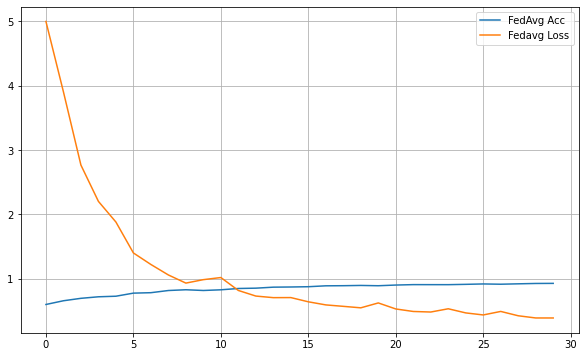

In [7]:
num = 5
average_acc_list, average_loss_list = [], []

for i in range(30):
    tmp_a, tmp_l = 0, 0
    for j in range(num):
        tmp_a = tmp_a + np.mean(globals()['acc{}'.format(j)][i])
        tmp_l = tmp_l + np.mean(globals()['loss{}'.format(j)][i])    
        
    average_acc_list.append(tmp_a/num)
    average_loss_list.append(tmp_l/num)   
    
plt.figure(figsize=(10,6))
plt.plot(average_acc_list, label='FedAvg Acc')
plt.plot(average_loss_list, label='Fedavg Loss')

plt.grid(True)
plt.legend()
plt.show()

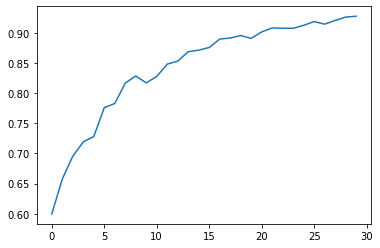

In [8]:
plt.plot(average_acc_list, label='FedAvg Acc')
plt.show()

In [9]:
print(average_acc_list,'\n') 
print(average_loss_list)

[0.5995799994468689, 0.6574839993317922, 0.6952719994386036, 0.7191046659151713, 0.7279946641127268, 0.7758793318271637, 0.7827513345082601, 0.8166459997495016, 0.8284340008099873, 0.8170580001672109, 0.8276453351974487, 0.8481233318646749, 0.853096002737681, 0.8686540003617604, 0.8713439997037252, 0.8756940011183421, 0.8896393342812855, 0.8914626673857372, 0.8955386662483216, 0.8908426642417908, 0.9015633352597554, 0.908161336183548, 0.9077000017960867, 0.907512666384379, 0.9124960009256998, 0.9187139995892843, 0.9144539992014566, 0.9206606634457906, 0.9261533323923746, 0.9275666673978169] 

[4.997573980887731, 3.9041446868578595, 2.765579304297765, 2.201739902893702, 1.8809616454442342, 1.4003205714623135, 1.2212432044744492, 1.058230997721354, 0.9318724650144576, 0.9854086116949716, 1.018323888083299, 0.8174759449561437, 0.7304273134469986, 0.7056841738025348, 0.7068349562088649, 0.6411700369914373, 0.5930092184742292, 0.5706172509988149, 0.5476196473836898, 0.623626964489619, 0.529